In [11]:
base_dir='/Users/aryanjalisrivastava/Desktop/ImageCaption/flickr8k'

In [21]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

In [3]:
img_model=VGG16()
img_model=Model(inputs=img_model.inputs,outputs=img_model.layers[-2].output)

In [4]:
img_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from tqdm import tqdm
import os
from tensorflow.keras.preprocessing.image import load_img,img_to_array
feature={}
# from tensorflow.keras.preprocessing import p
for file in tqdm(os.listdir(base_dir+'/Images')):
    img_path=base_dir+'/Images/'+file
    img=load_img(img_path,target_size=(224,224))
    img=img_to_array(img)
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)
    img_id=file.split('.')[0]
    featur=img_model.predict(img)
    feature[img_id]=featur
    
    


  0%|                                                  | 0/8091 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


  0%|                                          | 1/8091 [00:00<40:44,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  0%|                                          | 2/8091 [00:00<37:31,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  0%|                                          | 3/8091 [00:00<34:14,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  0%|                                          | 4/8091 [00:01<33:41,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  0%|                                          | 5/8091 [00:01<32:48,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  0%|                                          | 6/8091 [00:01<32:33,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  0%|                                          | 7/8091 [00:01<32:31,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  0%|                                          | 8/8091 [00:01<32:22,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|                                          | 9/8091 [00:02<32:13,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  0%|                                         | 10/8091 [00:02<32:45,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|                                         | 11/8091 [00:02<32:24,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  0%|                                         | 12/8091 [00:02<32:11,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  0%|                                         | 13/8091 [00:03<32:41,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  0%|                                         | 14/8091 [00:03<33:19,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  0%|                                         | 15/8091 [00:03<34:02,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  0%|                                         | 16/8091 [00:03<34:11,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  0%|                                         | 17/8091 [00:04<34:22,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  0%|                                         | 18/8091 [00:04<34:19,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  0%|                                         | 19/8091 [00:04<34:39,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  0%|                                         | 20/8091 [00:05<34:28,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  0%|                                         | 21/8091 [00:05<33:57,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  0%|                                         | 22/8091 [00:05<33:37,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  0%|                                         | 23/8091 [00:05<33:28,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  0%|                                         | 24/8091 [00:05<33:10,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  0%|▏                                        | 25/8091 [00:06<32:58,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  0%|▏                                        | 26/8091 [00:06<33:10,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  0%|▏                                        | 27/8091 [00:06<33:03,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  0%|▏                                        | 28/8091 [00:06<33:41,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|▏                                        | 29/8091 [00:07<33:59,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  0%|▏                                        | 30/8091 [00:07<34:38,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  0%|▏                                        | 31/8091 [00:07<34:54,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|▏                                        | 32/8091 [00:08<34:49,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  0%|▏                                        | 33/8091 [00:08<35:44,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  0%|▏                                        | 34/8091 [00:08<36:55,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  0%|▏                                        | 35/8091 [00:08<36:56,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  0%|▏                                        | 36/8091 [00:09<36:41,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|▏                                        | 37/8091 [00:09<35:22,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  0%|▏                                        | 38/8091 [00:09<34:18,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  0%|▏                                        | 39/8091 [00:09<33:32,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  0%|▏                                        | 40/8091 [00:10<33:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▏                                        | 41/8091 [00:10<32:47,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|▏                                        | 42/8091 [00:10<32:33,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|▏                                        | 43/8091 [00:10<32:23,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|▏                                        | 44/8091 [00:11<32:15,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  1%|▏                                        | 45/8091 [00:11<32:48,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  1%|▏                                        | 46/8091 [00:11<32:52,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  1%|▏                                        | 47/8091 [00:11<32:42,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  1%|▏                                        | 48/8091 [00:12<32:56,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  1%|▏                                        | 49/8091 [00:12<32:50,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|▎                                        | 50/8091 [00:12<32:33,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  1%|▎                                        | 51/8091 [00:12<32:43,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  1%|▎                                        | 52/8091 [00:13<33:14,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  1%|▎                                        | 53/8091 [00:13<33:38,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  1%|▎                                        | 54/8091 [00:13<33:21,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|▎                                        | 55/8091 [00:13<32:56,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  1%|▎                                        | 56/8091 [00:14<33:28,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  1%|▎                                        | 57/8091 [00:14<34:16,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  1%|▎                                        | 58/8091 [00:14<34:08,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|▎                                        | 59/8091 [00:14<34:12,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  1%|▎                                        | 60/8091 [00:15<34:25,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  1%|▎                                        | 61/8091 [00:15<33:35,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  1%|▎                                        | 62/8091 [00:15<33:11,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|▎                                        | 63/8091 [00:15<32:52,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▎                                        | 64/8091 [00:16<32:22,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  1%|▎                                        | 65/8091 [00:16<32:14,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  1%|▎                                        | 66/8091 [00:16<33:01,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  1%|▎                                        | 67/8091 [00:16<33:01,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|▎                                        | 68/8091 [00:17<32:39,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  1%|▎                                        | 69/8091 [00:17<33:34,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  1%|▎                                        | 70/8091 [00:17<37:55,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  1%|▎                                        | 71/8091 [00:17<36:54,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  1%|▎                                        | 72/8091 [00:18<35:39,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  1%|▎                                        | 73/8091 [00:18<34:29,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  1%|▎                                        | 74/8091 [00:18<33:50,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|▍                                        | 75/8091 [00:18<33:12,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▍                                        | 76/8091 [00:19<32:32,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  1%|▍                                        | 77/8091 [00:19<32:00,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▍                                        | 78/8091 [00:19<31:48,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|▍                                        | 79/8091 [00:19<31:50,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▍                                        | 80/8091 [00:20<31:33,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  1%|▍                                        | 81/8091 [00:20<32:24,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|▍                                        | 82/8091 [00:20<32:06,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  1%|▍                                        | 83/8091 [00:20<32:49,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|▍                                        | 84/8091 [00:21<33:42,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▍                                        | 85/8091 [00:21<32:56,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  1%|▍                                        | 86/8091 [00:21<32:58,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|▍                                        | 87/8091 [00:21<32:33,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  1%|▍                                        | 88/8091 [00:21<32:04,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  1%|▍                                        | 89/8091 [00:22<32:03,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▍                                        | 90/8091 [00:22<31:41,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  1%|▍                                        | 91/8091 [00:22<31:40,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  1%|▍                                        | 92/8091 [00:22<31:32,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▍                                        | 93/8091 [00:23<31:26,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  1%|▍                                        | 94/8091 [00:23<31:13,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  1%|▍                                        | 95/8091 [00:23<31:03,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|▍                                        | 96/8091 [00:23<31:09,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  1%|▍                                        | 97/8091 [00:24<32:30,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  1%|▍                                        | 98/8091 [00:24<33:36,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  1%|▌                                        | 99/8091 [00:24<34:38,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  1%|▍                                       | 100/8091 [00:24<34:55,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|▍                                       | 101/8091 [00:25<33:58,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  1%|▌                                       | 102/8091 [00:25<32:56,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▌                                       | 103/8091 [00:25<32:18,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▌                                       | 104/8091 [00:25<31:52,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▌                                       | 105/8091 [00:26<31:29,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  1%|▌                                       | 106/8091 [00:26<31:15,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▌                                       | 107/8091 [00:26<31:09,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  1%|▌                                       | 108/8091 [00:26<30:54,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▌                                       | 109/8091 [00:27<30:52,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  1%|▌                                       | 110/8091 [00:27<30:41,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▌                                       | 111/8091 [00:27<30:52,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▌                                       | 112/8091 [00:27<30:47,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▌                                       | 113/8091 [00:27<30:52,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▌                                       | 114/8091 [00:28<30:48,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  1%|▌                                       | 115/8091 [00:28<30:47,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▌                                       | 116/8091 [00:28<30:47,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▌                                       | 117/8091 [00:28<30:49,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▌                                       | 118/8091 [00:29<30:47,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▌                                       | 119/8091 [00:29<30:46,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  1%|▌                                       | 120/8091 [00:29<30:42,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  1%|▌                                       | 121/8091 [00:29<30:48,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  2%|▌                                       | 122/8091 [00:30<31:05,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▌                                       | 123/8091 [00:30<31:13,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▌                                       | 124/8091 [00:30<31:01,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▌                                       | 125/8091 [00:30<31:02,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▌                                       | 126/8091 [00:30<30:55,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▋                                       | 127/8091 [00:31<30:52,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  2%|▋                                       | 128/8091 [00:31<30:48,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 129/8091 [00:31<30:42,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▋                                       | 130/8091 [00:31<30:45,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 131/8091 [00:32<30:45,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 132/8091 [00:32<30:43,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 133/8091 [00:32<30:47,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▋                                       | 134/8091 [00:32<30:50,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  2%|▋                                       | 135/8091 [00:33<31:10,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 136/8091 [00:33<30:58,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▋                                       | 137/8091 [00:33<31:00,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▋                                       | 138/8091 [00:33<31:00,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  2%|▋                                       | 139/8091 [00:34<30:55,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▋                                       | 140/8091 [00:34<30:50,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▋                                       | 141/8091 [00:34<30:51,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▋                                       | 142/8091 [00:34<30:51,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▋                                       | 143/8091 [00:34<30:48,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▋                                       | 144/8091 [00:35<30:50,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 145/8091 [00:35<30:43,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 146/8091 [00:35<30:40,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▋                                       | 147/8091 [00:35<30:38,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▋                                       | 148/8091 [00:36<30:43,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▋                                       | 149/8091 [00:36<30:36,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▋                                       | 150/8091 [00:36<30:39,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▋                                       | 151/8091 [00:36<30:44,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▊                                       | 152/8091 [00:37<30:50,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▊                                       | 153/8091 [00:37<30:41,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▊                                       | 154/8091 [00:37<30:40,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▊                                       | 155/8091 [00:37<30:36,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▊                                       | 156/8091 [00:37<30:41,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  2%|▊                                       | 157/8091 [00:38<30:53,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▊                                       | 158/8091 [00:38<30:53,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▊                                       | 159/8091 [00:38<30:51,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▊                                       | 160/8091 [00:38<30:57,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▊                                       | 161/8091 [00:39<30:52,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▊                                       | 162/8091 [00:39<30:47,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▊                                       | 163/8091 [00:39<30:47,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▊                                       | 164/8091 [00:39<30:41,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  2%|▊                                       | 165/8091 [00:40<31:58,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  2%|▊                                       | 166/8091 [00:40<33:08,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


  2%|▊                                       | 167/8091 [00:40<35:19,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  2%|▊                                       | 168/8091 [00:40<36:54,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  2%|▊                                       | 169/8091 [00:41<37:10,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  2%|▊                                       | 170/8091 [00:41<35:49,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  2%|▊                                       | 171/8091 [00:41<34:44,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  2%|▊                                       | 172/8091 [00:42<34:25,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  2%|▊                                       | 173/8091 [00:42<33:36,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▊                                       | 174/8091 [00:42<32:50,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▊                                       | 175/8091 [00:42<32:12,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  2%|▊                                       | 176/8091 [00:42<31:50,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  2%|▉                                       | 177/8091 [00:43<32:04,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▉                                       | 178/8091 [00:43<31:38,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▉                                       | 179/8091 [00:43<31:20,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  2%|▉                                       | 180/8091 [00:43<31:11,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▉                                       | 181/8091 [00:44<30:57,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▉                                       | 182/8091 [00:44<30:46,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▉                                       | 183/8091 [00:44<30:44,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▉                                       | 184/8091 [00:44<30:45,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▉                                       | 185/8091 [00:45<31:44,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▉                                       | 186/8091 [00:45<32:46,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▉                                       | 187/8091 [00:45<33:16,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  2%|▉                                       | 188/8091 [00:45<33:51,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▉                                       | 189/8091 [00:46<34:20,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▉                                       | 190/8091 [00:46<34:18,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▉                                       | 191/8091 [00:46<34:22,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  2%|▉                                       | 192/8091 [00:46<33:51,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  2%|▉                                       | 193/8091 [00:47<33:13,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  2%|▉                                       | 194/8091 [00:47<33:05,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  2%|▉                                       | 195/8091 [00:47<32:56,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  2%|▉                                       | 196/8091 [00:47<32:53,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  2%|▉                                       | 197/8091 [00:48<33:20,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▉                                       | 198/8091 [00:48<33:27,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  2%|▉                                       | 199/8091 [00:48<33:19,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  2%|▉                                       | 200/8091 [00:48<33:06,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  2%|▉                                       | 201/8091 [00:49<33:54,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  2%|▉                                       | 202/8091 [00:49<34:21,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  3%|█                                       | 203/8091 [00:49<33:45,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  3%|█                                       | 204/8091 [00:49<33:49,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  3%|█                                       | 205/8091 [00:50<34:20,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  3%|█                                       | 206/8091 [00:50<34:09,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|█                                       | 207/8091 [00:50<34:20,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  3%|█                                       | 208/8091 [00:51<33:27,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  3%|█                                       | 209/8091 [00:51<32:28,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|█                                       | 210/8091 [00:51<32:13,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  3%|█                                       | 211/8091 [00:51<31:50,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  3%|█                                       | 212/8091 [00:51<32:07,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  3%|█                                       | 213/8091 [00:52<32:00,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  3%|█                                       | 214/8091 [00:52<32:22,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  3%|█                                       | 215/8091 [00:52<36:15,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  3%|█                                       | 216/8091 [00:53<35:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|█                                       | 217/8091 [00:53<35:26,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  3%|█                                       | 218/8091 [00:53<34:36,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  3%|█                                       | 219/8091 [00:53<34:08,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  3%|█                                       | 220/8091 [00:54<33:37,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  3%|█                                       | 221/8091 [00:54<33:09,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  3%|█                                       | 222/8091 [00:54<33:14,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  3%|█                                       | 223/8091 [00:54<33:05,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█                                       | 224/8091 [00:55<32:23,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█                                       | 225/8091 [00:55<31:51,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  3%|█                                       | 226/8091 [00:55<31:47,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|█                                       | 227/8091 [00:55<31:19,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|█▏                                      | 228/8091 [00:56<31:52,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  3%|█▏                                      | 229/8091 [00:56<33:06,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  3%|█▏                                      | 230/8091 [00:56<34:23,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  3%|█▏                                      | 231/8091 [00:56<34:55,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|█▏                                      | 232/8091 [00:57<34:36,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  3%|█▏                                      | 233/8091 [00:57<33:20,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▏                                      | 234/8091 [00:57<32:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  3%|█▏                                      | 235/8091 [00:57<31:48,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▏                                      | 236/8091 [00:58<31:26,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▏                                      | 237/8091 [00:58<31:13,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▏                                      | 238/8091 [00:58<30:56,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|█▏                                      | 239/8091 [00:58<30:47,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  3%|█▏                                      | 240/8091 [00:58<30:34,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▏                                      | 241/8091 [00:59<30:36,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▏                                      | 242/8091 [00:59<30:35,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  3%|█▏                                      | 243/8091 [00:59<30:34,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▏                                      | 244/8091 [00:59<30:28,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|█▏                                      | 245/8091 [01:00<30:29,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▏                                      | 246/8091 [01:00<30:32,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▏                                      | 247/8091 [01:00<30:35,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▏                                      | 248/8091 [01:00<30:30,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▏                                      | 249/8091 [01:01<30:24,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▏                                      | 250/8091 [01:01<30:26,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  3%|█▏                                      | 251/8091 [01:01<30:18,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▏                                      | 252/8091 [01:01<30:27,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▎                                      | 253/8091 [01:02<30:23,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▎                                      | 254/8091 [01:02<30:30,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|█▎                                      | 255/8091 [01:02<30:34,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  3%|█▎                                      | 256/8091 [01:02<30:23,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  3%|█▎                                      | 257/8091 [01:02<30:39,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  3%|█▎                                      | 258/8091 [01:03<30:43,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  3%|█▎                                      | 259/8091 [01:03<30:50,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▎                                      | 260/8091 [01:03<30:41,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▎                                      | 261/8091 [01:03<30:44,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  3%|█▎                                      | 262/8091 [01:04<30:49,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|█▎                                      | 263/8091 [01:04<30:41,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▎                                      | 264/8091 [01:04<30:39,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▎                                      | 265/8091 [01:04<30:33,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  3%|█▎                                      | 266/8091 [01:05<30:45,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  3%|█▎                                      | 267/8091 [01:05<30:33,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▎                                      | 268/8091 [01:05<30:37,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▎                                      | 269/8091 [01:05<30:32,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▎                                      | 270/8091 [01:05<30:34,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|█▎                                      | 271/8091 [01:06<30:30,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▎                                      | 272/8091 [01:06<30:28,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▎                                      | 273/8091 [01:06<30:32,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  3%|█▎                                      | 274/8091 [01:06<30:30,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▎                                      | 275/8091 [01:07<30:31,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▎                                      | 276/8091 [01:07<30:28,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▎                                      | 277/8091 [01:07<30:30,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|█▎                                      | 278/8091 [01:07<30:26,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▍                                      | 279/8091 [01:08<30:30,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|█▍                                      | 280/8091 [01:08<30:23,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▍                                      | 281/8091 [01:08<30:24,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|█▍                                      | 282/8091 [01:08<30:22,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|█▍                                      | 283/8091 [01:09<30:19,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▍                                      | 284/8091 [01:09<30:26,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▍                                      | 285/8091 [01:09<30:27,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▍                                      | 286/8091 [01:09<30:21,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|█▍                                      | 287/8091 [01:09<30:30,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▍                                      | 288/8091 [01:10<30:31,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  4%|█▍                                      | 289/8091 [01:10<30:35,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▍                                      | 290/8091 [01:10<30:26,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  4%|█▍                                      | 291/8091 [01:10<30:36,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▍                                      | 292/8091 [01:11<30:35,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▍                                      | 293/8091 [01:11<30:39,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▍                                      | 294/8091 [01:11<30:33,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  4%|█▍                                      | 295/8091 [01:11<30:37,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  4%|█▍                                      | 296/8091 [01:12<32:07,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|█▍                                      | 297/8091 [01:12<33:00,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  4%|█▍                                      | 298/8091 [01:12<34:09,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  4%|█▍                                      | 299/8091 [01:12<34:32,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  4%|█▍                                      | 300/8091 [01:13<33:35,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  4%|█▍                                      | 301/8091 [01:13<33:03,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▍                                      | 302/8091 [01:13<32:12,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  4%|█▍                                      | 303/8091 [01:13<31:39,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  4%|█▌                                      | 304/8091 [01:14<31:21,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  4%|█▌                                      | 305/8091 [01:14<31:04,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|█▌                                      | 306/8091 [01:14<30:48,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▌                                      | 307/8091 [01:14<30:51,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  4%|█▌                                      | 308/8091 [01:15<30:54,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▌                                      | 309/8091 [01:15<30:38,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  4%|█▌                                      | 310/8091 [01:15<30:30,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  4%|█▌                                      | 311/8091 [01:15<30:19,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|█▌                                      | 312/8091 [01:16<30:26,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▌                                      | 313/8091 [01:16<30:20,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▌                                      | 314/8091 [01:16<30:18,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|█▌                                      | 315/8091 [01:16<30:20,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|█▌                                      | 316/8091 [01:16<30:22,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▌                                      | 317/8091 [01:17<30:21,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▌                                      | 318/8091 [01:17<30:18,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▌                                      | 319/8091 [01:17<30:20,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▌                                      | 320/8091 [01:17<30:27,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▌                                      | 321/8091 [01:18<30:20,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▌                                      | 322/8091 [01:18<30:22,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▌                                      | 323/8091 [01:18<30:20,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▌                                      | 324/8091 [01:18<30:13,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|█▌                                      | 325/8091 [01:19<30:34,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  4%|█▌                                      | 326/8091 [01:19<30:20,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▌                                      | 327/8091 [01:19<30:24,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|█▌                                      | 328/8091 [01:19<30:23,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▋                                      | 329/8091 [01:20<30:21,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  4%|█▋                                      | 330/8091 [01:20<30:27,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|█▋                                      | 331/8091 [01:20<30:30,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▋                                      | 332/8091 [01:20<30:22,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▋                                      | 333/8091 [01:20<30:26,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▋                                      | 334/8091 [01:21<30:21,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▋                                      | 335/8091 [01:21<30:23,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▋                                      | 336/8091 [01:21<30:14,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▋                                      | 337/8091 [01:21<30:10,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  4%|█▋                                      | 338/8091 [01:22<30:37,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  4%|█▋                                      | 339/8091 [01:22<30:32,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▋                                      | 340/8091 [01:22<30:28,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▋                                      | 341/8091 [01:22<30:20,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|█▋                                      | 342/8091 [01:23<30:24,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  4%|█▋                                      | 343/8091 [01:23<30:30,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|█▋                                      | 344/8091 [01:23<30:45,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  4%|█▋                                      | 345/8091 [01:23<30:31,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  4%|█▋                                      | 346/8091 [01:24<30:24,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  4%|█▋                                      | 347/8091 [01:24<30:16,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▋                                      | 348/8091 [01:24<30:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▋                                      | 349/8091 [01:24<30:15,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  4%|█▋                                      | 350/8091 [01:24<30:14,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▋                                      | 351/8091 [01:25<30:19,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▋                                      | 352/8091 [01:25<30:14,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▋                                      | 353/8091 [01:25<30:17,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  4%|█▊                                      | 354/8091 [01:25<30:21,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▊                                      | 355/8091 [01:26<30:17,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  4%|█▊                                      | 356/8091 [01:26<30:14,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  4%|█▊                                      | 357/8091 [01:26<30:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|█▊                                      | 358/8091 [01:26<30:15,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  4%|█▊                                      | 359/8091 [01:27<33:29,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  4%|█▊                                      | 360/8091 [01:27<32:25,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  4%|█▊                                      | 361/8091 [01:27<31:49,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  4%|█▊                                      | 362/8091 [01:27<31:13,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  4%|█▊                                      | 363/8091 [01:28<32:37,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|█▊                                      | 364/8091 [01:28<33:13,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  5%|█▊                                      | 365/8091 [01:28<34:20,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  5%|█▊                                      | 366/8091 [01:28<34:38,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  5%|█▊                                      | 367/8091 [01:29<33:47,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  5%|█▊                                      | 368/8091 [01:29<32:35,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|█▊                                      | 369/8091 [01:29<31:48,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|█▊                                      | 370/8091 [01:29<31:19,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|█▊                                      | 371/8091 [01:30<31:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  5%|█▊                                      | 372/8091 [01:30<30:46,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|█▊                                      | 373/8091 [01:30<30:42,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|█▊                                      | 374/8091 [01:30<30:35,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|█▊                                      | 375/8091 [01:31<30:33,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|█▊                                      | 376/8091 [01:31<30:21,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|█▊                                      | 377/8091 [01:31<30:10,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|█▊                                      | 378/8091 [01:31<30:12,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|█▊                                      | 379/8091 [01:32<30:11,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|█▉                                      | 380/8091 [01:32<30:15,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|█▉                                      | 381/8091 [01:32<30:06,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  5%|█▉                                      | 382/8091 [01:32<30:00,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  5%|█▉                                      | 383/8091 [01:32<30:18,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|█▉                                      | 384/8091 [01:33<30:14,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|█▉                                      | 385/8091 [01:33<30:22,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|█▉                                      | 386/8091 [01:33<30:31,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  5%|█▉                                      | 387/8091 [01:33<30:37,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  5%|█▉                                      | 388/8091 [01:34<30:35,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  5%|█▉                                      | 389/8091 [01:34<32:09,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|█▉                                      | 390/8091 [01:34<31:21,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|█▉                                      | 391/8091 [01:34<30:54,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|█▉                                      | 392/8091 [01:35<30:49,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|█▉                                      | 393/8091 [01:35<30:38,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  5%|█▉                                      | 394/8091 [01:35<30:27,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|█▉                                      | 395/8091 [01:35<30:18,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|█▉                                      | 396/8091 [01:36<30:16,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|█▉                                      | 397/8091 [01:36<30:09,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|█▉                                      | 398/8091 [01:36<30:02,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  5%|█▉                                      | 399/8091 [01:36<30:15,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  5%|█▉                                      | 400/8091 [01:37<30:22,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  5%|█▉                                      | 401/8091 [01:37<30:17,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|█▉                                      | 402/8091 [01:37<30:08,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|█▉                                      | 403/8091 [01:37<30:12,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|█▉                                      | 404/8091 [01:37<30:05,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██                                      | 405/8091 [01:38<30:06,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██                                      | 406/8091 [01:38<30:05,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|██                                      | 407/8091 [01:38<30:06,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  5%|██                                      | 408/8091 [01:38<30:17,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██                                      | 409/8091 [01:39<30:13,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|██                                      | 410/8091 [01:39<30:03,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  5%|██                                      | 411/8091 [01:39<30:02,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|██                                      | 412/8091 [01:39<29:56,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|██                                      | 413/8091 [01:40<30:09,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|██                                      | 414/8091 [01:40<30:15,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██                                      | 415/8091 [01:40<30:09,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██                                      | 416/8091 [01:40<30:09,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██                                      | 417/8091 [01:41<30:09,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██                                      | 418/8091 [01:41<30:09,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|██                                      | 419/8091 [01:41<30:04,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██                                      | 420/8091 [01:41<29:54,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|██                                      | 421/8091 [01:41<30:01,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██                                      | 422/8091 [01:42<30:06,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██                                      | 423/8091 [01:42<30:16,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|██                                      | 424/8091 [01:42<30:05,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|██                                      | 425/8091 [01:42<30:04,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|██                                      | 426/8091 [01:43<30:07,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██                                      | 427/8091 [01:43<29:59,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  5%|██                                      | 428/8091 [01:43<30:15,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██                                      | 429/8091 [01:43<30:10,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  5%|██▏                                     | 430/8091 [01:44<31:36,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  5%|██▏                                     | 431/8091 [01:44<32:29,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  5%|██▏                                     | 432/8091 [01:44<33:29,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


  5%|██▏                                     | 433/8091 [01:44<34:45,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  5%|██▏                                     | 434/8091 [01:45<33:36,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  5%|██▏                                     | 435/8091 [01:45<33:17,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██▏                                     | 436/8091 [01:45<32:22,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██▏                                     | 437/8091 [01:45<31:34,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|██▏                                     | 438/8091 [01:46<31:12,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|██▏                                     | 439/8091 [01:46<30:45,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|██▏                                     | 440/8091 [01:46<30:29,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  5%|██▏                                     | 441/8091 [01:46<30:26,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  5%|██▏                                     | 442/8091 [01:47<30:21,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██▏                                     | 443/8091 [01:47<30:09,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|██▏                                     | 444/8091 [01:47<30:03,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|██▏                                     | 445/8091 [01:47<29:53,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▏                                     | 446/8091 [01:48<29:57,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▏                                     | 447/8091 [01:48<30:04,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|██▏                                     | 448/8091 [01:48<30:02,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▏                                     | 449/8091 [01:48<30:04,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|██▏                                     | 450/8091 [01:48<30:01,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|██▏                                     | 451/8091 [01:49<30:13,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  6%|██▏                                     | 452/8091 [01:49<30:04,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|██▏                                     | 453/8091 [01:49<30:06,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▏                                     | 454/8091 [01:49<30:04,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|██▏                                     | 455/8091 [01:50<30:08,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|██▎                                     | 456/8091 [01:50<30:00,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 457/8091 [01:50<29:59,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 458/8091 [01:50<29:54,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▎                                     | 459/8091 [01:51<30:00,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 460/8091 [01:51<29:58,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▎                                     | 461/8091 [01:51<29:53,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 462/8091 [01:51<29:49,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|██▎                                     | 463/8091 [01:52<29:55,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|██▎                                     | 464/8091 [01:52<29:52,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▎                                     | 465/8091 [01:52<29:49,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 466/8091 [01:52<29:56,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|██▎                                     | 467/8091 [01:53<29:56,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  6%|██▎                                     | 468/8091 [01:53<30:11,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▎                                     | 469/8091 [01:53<30:05,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  6%|██▎                                     | 470/8091 [01:53<30:15,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|██▎                                     | 471/8091 [01:53<30:25,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 472/8091 [01:54<30:16,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 473/8091 [01:54<30:09,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▎                                     | 474/8091 [01:54<29:59,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▎                                     | 475/8091 [01:54<29:58,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|██▎                                     | 476/8091 [01:55<30:00,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|██▎                                     | 477/8091 [01:55<29:58,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▎                                     | 478/8091 [01:55<29:59,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▎                                     | 479/8091 [01:55<29:57,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  6%|██▎                                     | 480/8091 [01:56<29:53,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|██▍                                     | 481/8091 [01:56<29:54,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  6%|██▍                                     | 482/8091 [01:56<32:55,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  6%|██▍                                     | 483/8091 [01:56<31:58,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|██▍                                     | 484/8091 [01:57<31:27,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|██▍                                     | 485/8091 [01:57<30:53,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|██▍                                     | 486/8091 [01:57<30:44,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|██▍                                     | 487/8091 [01:57<30:25,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|██▍                                     | 488/8091 [01:58<30:25,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|██▍                                     | 489/8091 [01:58<30:13,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  6%|██▍                                     | 490/8091 [01:58<29:59,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  6%|██▍                                     | 491/8091 [01:58<29:49,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|██▍                                     | 492/8091 [01:58<29:48,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|██▍                                     | 493/8091 [01:59<29:55,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▍                                     | 494/8091 [01:59<29:51,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|██▍                                     | 495/8091 [01:59<29:50,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  6%|██▍                                     | 496/8091 [01:59<30:22,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  6%|██▍                                     | 497/8091 [02:00<31:57,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  6%|██▍                                     | 498/8091 [02:00<32:48,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  6%|██▍                                     | 499/8091 [02:00<33:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  6%|██▍                                     | 500/8091 [02:01<33:57,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▍                                     | 501/8091 [02:01<32:49,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|██▍                                     | 502/8091 [02:01<31:52,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  6%|██▍                                     | 503/8091 [02:01<31:11,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▍                                     | 504/8091 [02:02<30:43,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|██▍                                     | 505/8091 [02:02<30:28,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▌                                     | 506/8091 [02:02<30:19,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▌                                     | 507/8091 [02:02<30:18,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|██▌                                     | 508/8091 [02:02<30:04,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|██▌                                     | 509/8091 [02:03<29:58,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  6%|██▌                                     | 510/8091 [02:03<29:48,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  6%|██▌                                     | 511/8091 [02:03<30:00,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|██▌                                     | 512/8091 [02:03<30:01,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  6%|██▌                                     | 513/8091 [02:04<30:17,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|██▌                                     | 514/8091 [02:04<30:05,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|██▌                                     | 515/8091 [02:04<30:03,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▌                                     | 516/8091 [02:04<29:56,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|██▌                                     | 517/8091 [02:05<29:57,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|██▌                                     | 518/8091 [02:05<30:08,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|██▌                                     | 519/8091 [02:05<30:15,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▌                                     | 520/8091 [02:05<30:05,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  6%|██▌                                     | 521/8091 [02:06<30:07,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|██▌                                     | 522/8091 [02:06<30:06,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▌                                     | 523/8091 [02:06<29:58,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▌                                     | 524/8091 [02:06<29:53,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  6%|██▌                                     | 525/8091 [02:06<29:49,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▌                                     | 526/8091 [02:07<29:49,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▌                                     | 527/8091 [02:07<29:50,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▌                                     | 528/8091 [02:07<29:53,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▌                                     | 529/8091 [02:07<29:49,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▌                                     | 530/8091 [02:08<29:55,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▋                                     | 531/8091 [02:08<29:56,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▋                                     | 532/8091 [02:08<29:48,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▋                                     | 533/8091 [02:08<29:50,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 534/8091 [02:09<29:48,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 535/8091 [02:09<29:42,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▋                                     | 536/8091 [02:09<29:47,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  7%|██▋                                     | 537/8091 [02:09<30:17,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  7%|██▋                                     | 538/8091 [02:10<30:27,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 539/8091 [02:10<30:15,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▋                                     | 540/8091 [02:10<30:15,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▋                                     | 541/8091 [02:10<30:02,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  7%|██▋                                     | 542/8091 [02:11<29:49,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 543/8091 [02:11<29:50,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 544/8091 [02:11<29:45,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 545/8091 [02:11<29:47,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  7%|██▋                                     | 546/8091 [02:11<29:54,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 547/8091 [02:12<29:49,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  7%|██▋                                     | 548/8091 [02:12<29:43,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▋                                     | 549/8091 [02:12<29:43,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 550/8091 [02:12<29:43,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 551/8091 [02:13<29:45,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 552/8091 [02:13<29:45,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 553/8091 [02:13<29:40,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▋                                     | 554/8091 [02:13<29:35,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  7%|██▋                                     | 555/8091 [02:14<30:10,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  7%|██▋                                     | 556/8091 [02:14<29:58,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▊                                     | 557/8091 [02:14<29:52,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▊                                     | 558/8091 [02:14<29:55,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  7%|██▊                                     | 559/8091 [02:15<30:07,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▊                                     | 560/8091 [02:15<29:56,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  7%|██▊                                     | 561/8091 [02:15<29:44,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▊                                     | 562/8091 [02:15<29:45,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|██▊                                     | 563/8091 [02:16<30:43,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  7%|██▊                                     | 564/8091 [02:16<31:52,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  7%|██▊                                     | 565/8091 [02:16<33:27,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  7%|██▊                                     | 566/8091 [02:16<33:38,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  7%|██▊                                     | 567/8091 [02:17<33:35,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▊                                     | 568/8091 [02:17<32:35,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▊                                     | 569/8091 [02:17<31:39,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  7%|██▊                                     | 570/8091 [02:17<30:53,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▊                                     | 571/8091 [02:18<30:32,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  7%|██▊                                     | 572/8091 [02:18<30:04,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▊                                     | 573/8091 [02:18<30:02,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  7%|██▊                                     | 574/8091 [02:18<29:45,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▊                                     | 575/8091 [02:19<29:53,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▊                                     | 576/8091 [02:19<29:52,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  7%|██▊                                     | 577/8091 [02:19<29:35,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▊                                     | 578/8091 [02:19<29:31,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▊                                     | 579/8091 [02:19<29:35,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▊                                     | 580/8091 [02:20<29:39,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▊                                     | 581/8091 [02:20<29:44,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▉                                     | 582/8091 [02:20<29:36,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▉                                     | 583/8091 [02:20<29:32,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▉                                     | 584/8091 [02:21<29:33,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▉                                     | 585/8091 [02:21<29:37,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▉                                     | 586/8091 [02:21<29:39,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  7%|██▉                                     | 587/8091 [02:21<29:39,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  7%|██▉                                     | 588/8091 [02:22<29:45,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  7%|██▉                                     | 589/8091 [02:22<29:37,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  7%|██▉                                     | 590/8091 [02:22<32:48,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  7%|██▉                                     | 591/8091 [02:22<31:51,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▉                                     | 592/8091 [02:23<31:06,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▉                                     | 593/8091 [02:23<30:38,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▉                                     | 594/8091 [02:23<30:19,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▉                                     | 595/8091 [02:23<30:07,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|██▉                                     | 596/8091 [02:24<30:03,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  7%|██▉                                     | 597/8091 [02:24<30:16,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  7%|██▉                                     | 598/8091 [02:24<29:58,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  7%|██▉                                     | 599/8091 [02:24<29:50,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|██▉                                     | 600/8091 [02:25<29:57,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▉                                     | 601/8091 [02:25<29:42,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▉                                     | 602/8091 [02:25<29:38,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|██▉                                     | 603/8091 [02:25<29:38,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▉                                     | 604/8091 [02:26<29:47,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|██▉                                     | 605/8091 [02:26<29:45,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|██▉                                     | 606/8091 [02:26<29:34,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███                                     | 607/8091 [02:26<29:32,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███                                     | 608/8091 [02:26<29:27,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███                                     | 609/8091 [02:27<29:34,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███                                     | 610/8091 [02:27<29:37,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███                                     | 611/8091 [02:27<29:30,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███                                     | 612/8091 [02:27<29:29,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███                                     | 613/8091 [02:28<29:31,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███                                     | 614/8091 [02:28<29:37,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  8%|███                                     | 615/8091 [02:28<29:27,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███                                     | 616/8091 [02:28<29:24,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███                                     | 617/8091 [02:29<29:18,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███                                     | 618/8091 [02:29<29:22,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███                                     | 619/8091 [02:29<29:19,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███                                     | 620/8091 [02:29<29:21,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  8%|███                                     | 621/8091 [02:30<29:38,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███                                     | 622/8091 [02:30<29:37,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███                                     | 623/8091 [02:30<29:40,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███                                     | 624/8091 [02:30<29:32,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███                                     | 625/8091 [02:30<29:26,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███                                     | 626/8091 [02:31<29:26,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███                                     | 627/8091 [02:31<29:25,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███                                     | 628/8091 [02:31<29:35,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  8%|███                                     | 629/8091 [02:31<30:04,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  8%|███                                     | 630/8091 [02:32<31:22,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  8%|███                                     | 631/8091 [02:32<32:20,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  8%|███                                     | 632/8091 [02:32<33:11,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  8%|███▏                                    | 633/8091 [02:33<33:17,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███▏                                    | 634/8091 [02:33<32:13,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▏                                    | 635/8091 [02:33<31:30,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███▏                                    | 636/8091 [02:33<30:52,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  8%|███▏                                    | 637/8091 [02:34<30:32,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  8%|███▏                                    | 638/8091 [02:34<30:28,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███▏                                    | 639/8091 [02:34<30:16,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  8%|███▏                                    | 640/8091 [02:34<29:57,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███▏                                    | 641/8091 [02:34<29:39,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  8%|███▏                                    | 642/8091 [02:35<29:42,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  8%|███▏                                    | 643/8091 [02:35<29:26,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▏                                    | 644/8091 [02:35<29:33,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  8%|███▏                                    | 645/8091 [02:35<29:43,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▏                                    | 646/8091 [02:36<29:37,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▏                                    | 647/8091 [02:36<29:35,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▏                                    | 648/8091 [02:36<29:31,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███▏                                    | 649/8091 [02:36<29:24,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███▏                                    | 650/8091 [02:37<29:29,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███▏                                    | 651/8091 [02:37<29:27,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███▏                                    | 652/8091 [02:37<29:32,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███▏                                    | 653/8091 [02:37<29:29,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███▏                                    | 654/8091 [02:38<29:30,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  8%|███▏                                    | 655/8091 [02:38<29:41,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███▏                                    | 656/8091 [02:38<29:30,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███▏                                    | 657/8091 [02:38<29:33,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▎                                    | 658/8091 [02:39<29:36,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███▎                                    | 659/8091 [02:39<29:34,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▎                                    | 660/8091 [02:39<29:33,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|███▎                                    | 661/8091 [02:39<29:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███▎                                    | 662/8091 [02:39<29:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▎                                    | 663/8091 [02:40<29:33,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███▎                                    | 664/8091 [02:40<29:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▎                                    | 665/8091 [02:40<29:34,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▎                                    | 666/8091 [02:40<29:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▎                                    | 667/8091 [02:41<29:30,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▎                                    | 668/8091 [02:41<29:37,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███▎                                    | 669/8091 [02:41<29:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▎                                    | 670/8091 [02:41<29:26,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  8%|███▎                                    | 671/8091 [02:42<29:36,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  8%|███▎                                    | 672/8091 [02:42<29:30,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███▎                                    | 673/8091 [02:42<29:18,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███▎                                    | 674/8091 [02:42<29:16,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▎                                    | 675/8091 [02:43<29:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|███▎                                    | 676/8091 [02:43<29:22,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▎                                    | 677/8091 [02:43<29:29,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|███▎                                    | 678/8091 [02:43<29:35,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███▎                                    | 679/8091 [02:44<29:31,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▎                                    | 680/8091 [02:44<29:33,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  8%|███▎                                    | 681/8091 [02:44<29:58,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|███▎                                    | 682/8091 [02:44<29:42,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  8%|███▍                                    | 683/8091 [02:44<29:49,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  8%|███▍                                    | 684/8091 [02:45<29:48,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▍                                    | 685/8091 [02:45<29:40,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|███▍                                    | 686/8091 [02:45<29:24,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|███▍                                    | 687/8091 [02:45<29:27,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  9%|███▍                                    | 688/8091 [02:46<32:42,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▍                                    | 689/8091 [02:46<31:40,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▍                                    | 690/8091 [02:46<31:02,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  9%|███▍                                    | 691/8091 [02:46<30:22,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  9%|███▍                                    | 692/8091 [02:47<30:04,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▍                                    | 693/8091 [02:47<29:50,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▍                                    | 694/8091 [02:47<29:44,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  9%|███▍                                    | 695/8091 [02:47<30:16,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  9%|███▍                                    | 696/8091 [02:48<31:32,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  9%|███▍                                    | 697/8091 [02:48<32:11,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  9%|███▍                                    | 698/8091 [02:48<33:07,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  9%|███▍                                    | 699/8091 [02:49<33:24,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▍                                    | 700/8091 [02:49<32:08,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▍                                    | 701/8091 [02:49<31:25,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▍                                    | 702/8091 [02:49<30:51,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▍                                    | 703/8091 [02:50<30:31,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▍                                    | 704/8091 [02:50<30:14,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▍                                    | 705/8091 [02:50<29:57,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▍                                    | 706/8091 [02:50<29:52,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  9%|███▍                                    | 707/8091 [02:50<29:41,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  9%|███▌                                    | 708/8091 [02:51<29:33,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▌                                    | 709/8091 [02:51<29:31,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  9%|███▌                                    | 710/8091 [02:51<29:22,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▌                                    | 711/8091 [02:51<29:26,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|███▌                                    | 712/8091 [02:52<29:31,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  9%|███▌                                    | 713/8091 [02:52<29:18,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  9%|███▌                                    | 714/8091 [02:52<29:27,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▌                                    | 715/8091 [02:52<29:28,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▌                                    | 716/8091 [02:53<29:22,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  9%|███▌                                    | 717/8091 [02:53<29:28,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▌                                    | 718/8091 [02:53<29:20,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  9%|███▌                                    | 719/8091 [02:53<29:14,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▌                                    | 720/8091 [02:54<29:23,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▌                                    | 721/8091 [02:54<29:16,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  9%|███▌                                    | 722/8091 [02:54<29:34,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▌                                    | 723/8091 [02:54<29:28,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▌                                    | 724/8091 [02:55<29:26,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  9%|███▌                                    | 725/8091 [02:55<29:13,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▌                                    | 726/8091 [02:55<29:19,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▌                                    | 727/8091 [02:55<29:12,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▌                                    | 728/8091 [02:56<29:04,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  9%|███▌                                    | 729/8091 [02:56<30:07,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  9%|███▌                                    | 730/8091 [02:56<29:43,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  9%|███▌                                    | 731/8091 [02:56<29:37,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▌                                    | 732/8091 [02:56<29:31,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▌                                    | 733/8091 [02:57<29:20,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▋                                    | 734/8091 [02:57<29:07,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  9%|███▋                                    | 735/8091 [02:57<29:14,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  9%|███▋                                    | 736/8091 [02:57<29:21,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▋                                    | 737/8091 [02:58<29:17,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  9%|███▋                                    | 738/8091 [02:58<31:30,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  9%|███▋                                    | 739/8091 [02:58<31:40,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  9%|███▋                                    | 740/8091 [02:58<30:39,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  9%|███▋                                    | 741/8091 [02:59<30:31,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▋                                    | 742/8091 [02:59<30:04,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▋                                    | 743/8091 [02:59<29:50,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  9%|███▋                                    | 744/8091 [02:59<31:06,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▋                                    | 745/8091 [03:00<30:31,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|███▋                                    | 746/8091 [03:00<30:14,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▋                                    | 747/8091 [03:00<29:58,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▋                                    | 748/8091 [03:00<29:41,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|███▋                                    | 749/8091 [03:01<29:39,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  9%|███▋                                    | 750/8091 [03:01<29:25,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▋                                    | 751/8091 [03:01<29:17,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▋                                    | 752/8091 [03:01<29:10,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  9%|███▋                                    | 753/8091 [03:02<29:17,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▋                                    | 754/8091 [03:02<29:14,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▋                                    | 755/8091 [03:02<29:05,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  9%|███▋                                    | 756/8091 [03:02<29:07,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|███▋                                    | 757/8091 [03:03<29:16,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▋                                    | 758/8091 [03:03<29:05,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▊                                    | 759/8091 [03:03<29:08,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  9%|███▊                                    | 760/8091 [03:03<29:19,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  9%|███▊                                    | 761/8091 [03:04<30:24,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|███▊                                    | 762/8091 [03:04<31:25,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  9%|███▊                                    | 763/8091 [03:04<32:30,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  9%|███▊                                    | 764/8091 [03:04<33:12,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  9%|███▊                                    | 765/8091 [03:05<33:21,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|███▊                                    | 766/8091 [03:05<32:11,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  9%|███▊                                    | 767/8091 [03:05<31:21,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|███▊                                    | 768/8091 [03:05<30:32,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▊                                    | 769/8091 [03:06<30:13,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 10%|███▊                                    | 770/8091 [03:06<30:02,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 10%|███▊                                    | 771/8091 [03:06<29:39,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 10%|███▊                                    | 772/8091 [03:06<29:16,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▊                                    | 773/8091 [03:07<29:17,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|███▊                                    | 774/8091 [03:07<29:16,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▊                                    | 775/8091 [03:07<29:14,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|███▊                                    | 776/8091 [03:07<29:07,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|███▊                                    | 777/8091 [03:08<29:13,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|███▊                                    | 778/8091 [03:08<29:14,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|███▊                                    | 779/8091 [03:08<29:16,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 10%|███▊                                    | 780/8091 [03:08<32:15,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|███▊                                    | 781/8091 [03:09<31:25,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▊                                    | 782/8091 [03:09<30:45,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 10%|███▊                                    | 783/8091 [03:09<30:14,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▉                                    | 784/8091 [03:09<29:51,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 10%|███▉                                    | 785/8091 [03:10<29:49,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|███▉                                    | 786/8091 [03:10<29:36,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▉                                    | 787/8091 [03:10<29:31,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 10%|███▉                                    | 788/8091 [03:10<29:31,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|███▉                                    | 789/8091 [03:11<29:23,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▉                                    | 790/8091 [03:11<29:20,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|███▉                                    | 791/8091 [03:11<29:10,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|███▉                                    | 792/8091 [03:11<29:05,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 10%|███▉                                    | 793/8091 [03:12<36:28,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 10%|███▉                                    | 794/8091 [03:12<34:17,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 10%|███▉                                    | 795/8091 [03:12<32:40,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▉                                    | 796/8091 [03:12<31:39,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|███▉                                    | 797/8091 [03:13<30:53,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 10%|███▉                                    | 798/8091 [03:13<30:08,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|███▉                                    | 799/8091 [03:13<29:50,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|███▉                                    | 800/8091 [03:13<29:28,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▉                                    | 801/8091 [03:14<29:28,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|███▉                                    | 802/8091 [03:14<29:13,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 10%|███▉                                    | 803/8091 [03:14<29:37,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▉                                    | 804/8091 [03:14<29:26,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 10%|███▉                                    | 805/8091 [03:15<29:38,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|███▉                                    | 806/8091 [03:15<29:29,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 10%|███▉                                    | 807/8091 [03:15<29:15,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|███▉                                    | 808/8091 [03:15<29:21,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|███▉                                    | 809/8091 [03:16<29:17,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|████                                    | 810/8091 [03:16<29:10,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|████                                    | 811/8091 [03:16<29:03,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 10%|████                                    | 812/8091 [03:16<28:57,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 10%|████                                    | 813/8091 [03:16<28:52,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|████                                    | 814/8091 [03:17<28:57,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|████                                    | 815/8091 [03:17<28:59,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|████                                    | 816/8091 [03:17<28:58,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|████                                    | 817/8091 [03:17<28:59,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|████                                    | 818/8091 [03:18<29:03,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|████                                    | 819/8091 [03:18<28:57,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|████                                    | 820/8091 [03:18<28:51,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|████                                    | 821/8091 [03:18<29:03,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|████                                    | 822/8091 [03:19<29:08,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 10%|████                                    | 823/8091 [03:19<29:25,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 10%|████                                    | 824/8091 [03:19<29:12,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|████                                    | 825/8091 [03:19<29:18,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 10%|████                                    | 826/8091 [03:20<30:28,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 10%|████                                    | 827/8091 [03:20<31:26,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 10%|████                                    | 828/8091 [03:20<31:55,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 10%|████                                    | 829/8091 [03:20<32:51,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 10%|████                                    | 830/8091 [03:21<33:07,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 10%|████                                    | 831/8091 [03:21<32:00,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|████                                    | 832/8091 [03:21<31:13,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|████                                    | 833/8091 [03:21<30:34,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 10%|████                                    | 834/8091 [03:22<30:15,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|████▏                                   | 835/8091 [03:22<29:57,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|████▏                                   | 836/8091 [03:22<29:34,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 10%|████▏                                   | 837/8091 [03:22<29:29,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|████▏                                   | 838/8091 [03:23<29:22,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|████▏                                   | 839/8091 [03:23<29:06,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|████▏                                   | 840/8091 [03:23<29:09,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|████▏                                   | 841/8091 [03:23<29:17,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|████▏                                   | 842/8091 [03:24<29:19,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 10%|████▏                                   | 843/8091 [03:24<29:09,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|████▏                                   | 844/8091 [03:24<28:58,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|████▏                                   | 845/8091 [03:24<29:23,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|████▏                                   | 846/8091 [03:25<29:15,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 10%|████▏                                   | 847/8091 [03:25<29:00,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 10%|████▏                                   | 848/8091 [03:25<29:06,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|████▏                                   | 849/8091 [03:25<29:06,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▏                                   | 850/8091 [03:26<29:19,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▏                                   | 851/8091 [03:26<29:03,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 11%|████▏                                   | 852/8091 [03:26<28:59,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|████▏                                   | 853/8091 [03:26<29:02,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▏                                   | 854/8091 [03:27<28:50,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 11%|████▏                                   | 855/8091 [03:27<28:42,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|████▏                                   | 856/8091 [03:27<28:49,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▏                                   | 857/8091 [03:27<28:48,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 11%|████▏                                   | 858/8091 [03:27<28:57,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|████▏                                   | 859/8091 [03:28<28:57,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|████▎                                   | 860/8091 [03:28<29:06,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 11%|████▎                                   | 861/8091 [03:28<28:57,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 11%|████▎                                   | 862/8091 [03:29<32:14,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▎                                   | 863/8091 [03:29<31:15,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 11%|████▎                                   | 864/8091 [03:29<30:30,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▎                                   | 865/8091 [03:29<30:05,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▎                                   | 866/8091 [03:30<29:54,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 11%|████▎                                   | 867/8091 [03:30<29:33,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 11%|████▎                                   | 868/8091 [03:30<29:47,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 11%|████▎                                   | 869/8091 [03:30<29:22,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|████▎                                   | 870/8091 [03:30<29:17,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▎                                   | 871/8091 [03:31<29:07,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|████▎                                   | 872/8091 [03:31<28:58,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|████▎                                   | 873/8091 [03:31<29:02,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▎                                   | 874/8091 [03:31<28:49,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|████▎                                   | 875/8091 [03:32<29:02,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▎                                   | 876/8091 [03:32<28:55,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|████▎                                   | 877/8091 [03:32<28:57,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|████▎                                   | 878/8091 [03:32<28:51,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 11%|████▎                                   | 879/8091 [03:33<28:48,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|████▎                                   | 880/8091 [03:33<28:59,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 11%|████▎                                   | 881/8091 [03:33<28:58,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▎                                   | 882/8091 [03:33<29:03,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 11%|████▎                                   | 883/8091 [03:34<29:06,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|████▎                                   | 884/8091 [03:34<28:55,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▍                                   | 885/8091 [03:34<29:01,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 11%|████▍                                   | 886/8091 [03:34<29:11,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 11%|████▍                                   | 887/8091 [03:35<29:04,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|████▍                                   | 888/8091 [03:35<28:55,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 11%|████▍                                   | 889/8091 [03:35<28:53,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|████▍                                   | 890/8091 [03:35<28:52,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 11%|████▍                                   | 891/8091 [03:36<30:00,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|████▍                                   | 892/8091 [03:36<31:04,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 11%|████▍                                   | 893/8091 [03:36<31:58,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 11%|████▍                                   | 894/8091 [03:36<32:27,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 11%|████▍                                   | 895/8091 [03:37<32:26,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 11%|████▍                                   | 896/8091 [03:37<31:17,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 11%|████▍                                   | 897/8091 [03:37<30:35,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▍                                   | 898/8091 [03:37<29:55,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 11%|████▍                                   | 899/8091 [03:38<29:51,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 11%|████▍                                   | 900/8091 [03:38<29:30,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▍                                   | 901/8091 [03:38<29:24,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 11%|████▍                                   | 902/8091 [03:38<29:13,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|████▍                                   | 903/8091 [03:39<29:19,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 11%|████▍                                   | 904/8091 [03:39<29:03,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|████▍                                   | 905/8091 [03:39<29:04,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|████▍                                   | 906/8091 [03:39<28:49,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 11%|████▍                                   | 907/8091 [03:40<29:30,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 11%|████▍                                   | 908/8091 [03:40<29:36,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▍                                   | 909/8091 [03:40<29:21,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▍                                   | 910/8091 [03:40<29:06,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 11%|████▌                                   | 911/8091 [03:41<29:19,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|████▌                                   | 912/8091 [03:41<29:16,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|████▌                                   | 913/8091 [03:41<29:23,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|████▌                                   | 914/8091 [03:41<29:14,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|████▌                                   | 915/8091 [03:42<29:28,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 11%|████▌                                   | 916/8091 [03:42<29:37,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|████▌                                   | 917/8091 [03:42<29:31,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|████▌                                   | 918/8091 [03:42<29:09,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 11%|████▌                                   | 919/8091 [03:43<29:22,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 11%|████▌                                   | 920/8091 [03:43<29:36,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|████▌                                   | 921/8091 [03:43<29:16,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|████▌                                   | 922/8091 [03:43<29:16,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 11%|████▌                                   | 923/8091 [03:44<29:11,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|████▌                                   | 924/8091 [03:44<28:52,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|████▌                                   | 925/8091 [03:44<28:55,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|████▌                                   | 926/8091 [03:44<28:48,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 11%|████▌                                   | 927/8091 [03:45<29:37,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 11%|████▌                                   | 928/8091 [03:45<29:21,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 11%|████▌                                   | 929/8091 [03:45<30:13,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 11%|████▌                                   | 930/8091 [03:45<29:43,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▌                                   | 931/8091 [03:45<29:22,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 12%|████▌                                   | 932/8091 [03:46<29:32,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 12%|████▌                                   | 933/8091 [03:46<29:39,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 12%|████▌                                   | 934/8091 [03:46<29:13,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▌                                   | 935/8091 [03:46<29:12,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▋                                   | 936/8091 [03:47<29:05,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 12%|████▋                                   | 937/8091 [03:47<31:42,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 12%|████▋                                   | 938/8091 [03:47<30:53,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▋                                   | 939/8091 [03:48<30:16,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 12%|████▋                                   | 940/8091 [03:48<29:42,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▋                                   | 941/8091 [03:48<29:28,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▋                                   | 942/8091 [03:48<29:21,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▋                                   | 943/8091 [03:48<28:59,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▋                                   | 944/8091 [03:49<28:51,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▋                                   | 945/8091 [03:49<28:50,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▋                                   | 946/8091 [03:49<28:49,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▋                                   | 947/8091 [03:49<28:45,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▋                                   | 948/8091 [03:50<28:40,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▋                                   | 949/8091 [03:50<28:44,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▋                                   | 950/8091 [03:50<28:43,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▋                                   | 951/8091 [03:50<28:52,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▋                                   | 952/8091 [03:51<28:46,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▋                                   | 953/8091 [03:51<28:42,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 12%|████▋                                   | 954/8091 [03:51<28:43,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 12%|████▋                                   | 955/8091 [03:51<29:09,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 12%|████▋                                   | 956/8091 [03:52<30:45,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 12%|████▋                                   | 957/8091 [03:52<31:06,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 12%|████▋                                   | 958/8091 [03:52<31:57,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 12%|████▋                                   | 959/8091 [03:53<32:22,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 12%|████▋                                   | 960/8091 [03:53<32:20,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 12%|████▊                                   | 961/8091 [03:53<31:39,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 12%|████▊                                   | 962/8091 [03:53<31:00,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▊                                   | 963/8091 [03:54<30:23,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 12%|████▊                                   | 964/8091 [03:54<29:41,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 12%|████▊                                   | 965/8091 [03:54<29:34,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 12%|████▊                                   | 966/8091 [03:54<29:09,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▊                                   | 967/8091 [03:55<29:06,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 12%|████▊                                   | 968/8091 [03:55<29:29,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▊                                   | 969/8091 [03:55<29:11,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▊                                   | 970/8091 [03:55<29:03,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▊                                   | 971/8091 [03:55<28:58,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 12%|████▊                                   | 972/8091 [03:56<29:20,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 12%|████▊                                   | 973/8091 [03:56<28:57,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▊                                   | 974/8091 [03:56<28:52,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 12%|████▊                                   | 975/8091 [03:56<28:44,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▊                                   | 976/8091 [03:57<28:47,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▊                                   | 977/8091 [03:57<28:42,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 12%|████▊                                   | 978/8091 [03:57<28:39,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▊                                   | 979/8091 [03:57<28:40,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▊                                   | 980/8091 [03:58<28:30,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 12%|████▊                                   | 981/8091 [03:58<28:29,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▊                                   | 982/8091 [03:58<28:31,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▊                                   | 983/8091 [03:58<28:31,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 12%|████▊                                   | 984/8091 [03:59<28:33,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▊                                   | 985/8091 [03:59<28:29,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▊                                   | 986/8091 [03:59<28:32,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 12%|████▉                                   | 987/8091 [03:59<28:21,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▉                                   | 988/8091 [04:00<28:29,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 12%|████▉                                   | 989/8091 [04:00<28:27,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▉                                   | 990/8091 [04:00<28:28,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 12%|████▉                                   | 991/8091 [04:00<28:24,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▉                                   | 992/8091 [04:01<28:38,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 12%|████▉                                   | 993/8091 [04:01<28:27,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 12%|████▉                                   | 994/8091 [04:01<28:31,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 12%|████▉                                   | 995/8091 [04:01<28:20,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 12%|████▉                                   | 996/8091 [04:02<28:18,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▉                                   | 997/8091 [04:02<28:19,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▉                                   | 998/8091 [04:02<28:28,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▉                                   | 999/8091 [04:02<28:32,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|████▊                                  | 1000/8091 [04:02<28:31,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|████▊                                  | 1001/8091 [04:03<28:35,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 12%|████▊                                  | 1002/8091 [04:03<28:21,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▊                                  | 1003/8091 [04:03<28:23,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▊                                  | 1004/8091 [04:03<28:26,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|████▊                                  | 1005/8091 [04:04<28:26,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 12%|████▊                                  | 1006/8091 [04:04<28:16,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|████▊                                  | 1007/8091 [04:04<28:20,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 12%|████▊                                  | 1008/8091 [04:04<28:31,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 12%|████▊                                  | 1009/8091 [04:05<31:36,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|████▊                                  | 1010/8091 [04:05<30:57,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 12%|████▊                                  | 1011/8091 [04:05<30:11,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|████▉                                  | 1012/8091 [04:05<29:40,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 13%|████▉                                  | 1013/8091 [04:06<29:16,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|████▉                                  | 1014/8091 [04:06<29:07,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|████▉                                  | 1015/8091 [04:06<28:54,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 13%|████▉                                  | 1016/8091 [04:06<28:50,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 13%|████▉                                  | 1017/8091 [04:07<28:45,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 13%|████▉                                  | 1018/8091 [04:07<28:41,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 13%|████▉                                  | 1019/8091 [04:07<28:34,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 13%|████▉                                  | 1020/8091 [04:07<28:47,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 13%|████▉                                  | 1021/8091 [04:08<30:01,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 13%|████▉                                  | 1022/8091 [04:08<30:51,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 13%|████▉                                  | 1023/8091 [04:08<31:53,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 13%|████▉                                  | 1024/8091 [04:09<32:10,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|████▉                                  | 1025/8091 [04:09<31:31,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 13%|████▉                                  | 1026/8091 [04:09<30:31,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 13%|████▉                                  | 1027/8091 [04:09<29:53,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|████▉                                  | 1028/8091 [04:10<29:35,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|████▉                                  | 1029/8091 [04:10<29:20,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 13%|████▉                                  | 1030/8091 [04:10<29:03,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|████▉                                  | 1031/8091 [04:10<28:49,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|████▉                                  | 1032/8091 [04:10<28:41,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 13%|████▉                                  | 1033/8091 [04:11<28:38,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 13%|████▉                                  | 1034/8091 [04:11<28:24,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 13%|████▉                                  | 1035/8091 [04:11<28:26,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|████▉                                  | 1036/8091 [04:11<28:38,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 13%|████▉                                  | 1037/8091 [04:12<28:34,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|█████                                  | 1038/8091 [04:12<28:30,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|█████                                  | 1039/8091 [04:12<28:23,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 13%|█████                                  | 1040/8091 [04:12<28:33,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 13%|█████                                  | 1041/8091 [04:13<28:18,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 13%|█████                                  | 1042/8091 [04:13<28:25,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 13%|█████                                  | 1043/8091 [04:13<28:36,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 13%|█████                                  | 1044/8091 [04:13<28:36,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 13%|█████                                  | 1045/8091 [04:14<28:22,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 13%|█████                                  | 1046/8091 [04:14<30:03,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 13%|█████                                  | 1047/8091 [04:14<30:48,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 13%|█████                                  | 1048/8091 [04:14<30:16,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 13%|█████                                  | 1049/8091 [04:15<30:17,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 13%|█████                                  | 1050/8091 [04:15<30:33,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 13%|█████                                  | 1051/8091 [04:15<31:14,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 13%|█████                                  | 1052/8091 [04:16<31:11,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 13%|█████                                  | 1053/8091 [04:16<30:50,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 13%|█████                                  | 1054/8091 [04:16<30:30,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 13%|█████                                  | 1055/8091 [04:16<29:56,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 13%|█████                                  | 1056/8091 [04:17<29:59,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|█████                                  | 1057/8091 [04:17<29:35,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 13%|█████                                  | 1058/8091 [04:17<29:17,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 13%|█████                                  | 1059/8091 [04:17<29:00,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 13%|█████                                  | 1060/8091 [04:17<28:43,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 13%|█████                                  | 1061/8091 [04:18<28:34,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 13%|█████                                  | 1062/8091 [04:18<28:29,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|█████                                  | 1063/8091 [04:18<28:36,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 13%|█████▏                                 | 1064/8091 [04:18<28:28,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 13%|█████▏                                 | 1065/8091 [04:19<28:40,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 13%|█████▏                                 | 1066/8091 [04:19<28:29,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 13%|█████▏                                 | 1067/8091 [04:19<29:27,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 13%|█████▏                                 | 1068/8091 [04:19<30:17,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 13%|█████▏                                 | 1069/8091 [04:20<30:22,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 13%|█████▏                                 | 1070/8091 [04:20<29:50,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 13%|█████▏                                 | 1071/8091 [04:20<30:22,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 13%|█████▏                                 | 1072/8091 [04:21<30:32,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 13%|█████▏                                 | 1073/8091 [04:21<31:11,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 13%|█████▏                                 | 1074/8091 [04:21<36:03,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 13%|█████▏                                 | 1075/8091 [04:22<35:30,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 13%|█████▏                                 | 1076/8091 [04:22<34:48,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 13%|█████▏                                 | 1077/8091 [04:22<34:40,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█████▏                                 | 1078/8091 [04:22<34:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 13%|█████▏                                 | 1079/8091 [04:23<32:40,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 13%|█████▏                                 | 1080/8091 [04:23<32:38,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 13%|█████▏                                 | 1081/8091 [04:23<32:54,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 13%|█████▏                                 | 1082/8091 [04:23<33:17,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 13%|█████▏                                 | 1083/8091 [04:24<34:13,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 13%|█████▏                                 | 1084/8091 [04:24<34:11,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 13%|█████▏                                 | 1085/8091 [04:24<34:33,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 13%|█████▏                                 | 1086/8091 [04:25<37:00,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 13%|█████▏                                 | 1087/8091 [04:25<37:24,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 13%|█████▏                                 | 1088/8091 [04:25<36:46,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 13%|█████▏                                 | 1089/8091 [04:26<35:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 13%|█████▎                                 | 1090/8091 [04:26<35:19,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|█████▎                                 | 1091/8091 [04:26<33:24,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|█████▎                                 | 1092/8091 [04:26<31:59,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 14%|█████▎                                 | 1093/8091 [04:27<31:33,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 14%|█████▎                                 | 1094/8091 [04:27<31:01,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 14%|█████▎                                 | 1095/8091 [04:27<30:44,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 14%|█████▎                                 | 1096/8091 [04:27<30:20,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 14%|█████▎                                 | 1097/8091 [04:28<30:27,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 14%|█████▎                                 | 1098/8091 [04:28<30:27,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 14%|█████▎                                 | 1099/8091 [04:28<30:41,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 14%|█████▎                                 | 1100/8091 [04:29<31:11,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 14%|█████▎                                 | 1101/8091 [04:29<32:33,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 14%|█████▎                                 | 1102/8091 [04:29<33:20,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 14%|█████▎                                 | 1103/8091 [04:29<32:38,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 14%|█████▎                                 | 1104/8091 [04:30<32:09,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 14%|█████▎                                 | 1105/8091 [04:30<31:46,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 14%|█████▎                                 | 1106/8091 [04:30<31:33,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▎                                 | 1107/8091 [04:30<30:40,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 14%|█████▎                                 | 1108/8091 [04:31<30:18,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 14%|█████▎                                 | 1109/8091 [04:31<30:37,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 14%|█████▎                                 | 1110/8091 [04:31<30:30,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 14%|█████▎                                 | 1111/8091 [04:32<31:44,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 14%|█████▎                                 | 1112/8091 [04:32<31:57,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█████▎                                 | 1113/8091 [04:32<30:45,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 14%|█████▎                                 | 1114/8091 [04:32<30:00,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▎                                 | 1115/8091 [04:33<29:26,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▍                                 | 1116/8091 [04:33<29:06,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▍                                 | 1117/8091 [04:33<28:49,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█████▍                                 | 1118/8091 [04:33<28:31,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▍                                 | 1119/8091 [04:34<28:27,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 14%|█████▍                                 | 1120/8091 [04:34<31:12,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█████▍                                 | 1121/8091 [04:34<30:22,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█████▍                                 | 1122/8091 [04:34<29:26,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█████▍                                 | 1123/8091 [04:35<28:56,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▍                                 | 1124/8091 [04:35<28:39,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 14%|█████▍                                 | 1125/8091 [04:35<28:16,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 14%|█████▍                                 | 1126/8091 [04:35<28:46,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▍                                 | 1127/8091 [04:36<28:34,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 14%|█████▍                                 | 1128/8091 [04:36<28:37,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█████▍                                 | 1129/8091 [04:36<28:16,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 14%|█████▍                                 | 1130/8091 [04:36<28:08,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█████▍                                 | 1131/8091 [04:37<28:13,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▍                                 | 1132/8091 [04:37<28:04,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▍                                 | 1133/8091 [04:37<28:01,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▍                                 | 1134/8091 [04:37<28:06,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▍                                 | 1135/8091 [04:37<28:04,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 14%|█████▍                                 | 1136/8091 [04:38<28:12,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▍                                 | 1137/8091 [04:38<28:02,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 14%|█████▍                                 | 1138/8091 [04:38<27:58,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 14%|█████▍                                 | 1139/8091 [04:38<28:11,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 14%|█████▍                                 | 1140/8091 [04:39<27:59,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█████▍                                 | 1141/8091 [04:39<27:53,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▌                                 | 1142/8091 [04:39<27:44,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 14%|█████▌                                 | 1143/8091 [04:39<28:14,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 14%|█████▌                                 | 1144/8091 [04:40<29:28,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 14%|█████▌                                 | 1145/8091 [04:40<30:29,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 14%|█████▌                                 | 1146/8091 [04:40<31:42,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 14%|█████▌                                 | 1147/8091 [04:41<32:04,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 14%|█████▌                                 | 1148/8091 [04:41<30:58,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█████▌                                 | 1149/8091 [04:41<29:57,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 14%|█████▌                                 | 1150/8091 [04:41<29:32,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▌                                 | 1151/8091 [04:42<29:01,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▌                                 | 1152/8091 [04:42<28:39,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 14%|█████▌                                 | 1153/8091 [04:42<28:35,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 14%|█████▌                                 | 1154/8091 [04:42<28:09,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 14%|█████▌                                 | 1155/8091 [04:43<28:19,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 14%|█████▌                                 | 1156/8091 [04:43<28:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 14%|█████▌                                 | 1157/8091 [04:43<28:01,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█████▌                                 | 1158/8091 [04:43<27:57,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 14%|█████▌                                 | 1159/8091 [04:43<28:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█████▌                                 | 1160/8091 [04:44<27:53,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▌                                 | 1161/8091 [04:44<27:46,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█████▌                                 | 1162/8091 [04:44<27:45,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 14%|█████▌                                 | 1163/8091 [04:44<27:56,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 14%|█████▌                                 | 1164/8091 [04:45<27:57,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▌                                 | 1165/8091 [04:45<28:01,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▌                                 | 1166/8091 [04:45<27:55,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 14%|█████▋                                 | 1167/8091 [04:45<28:24,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 14%|█████▋                                 | 1168/8091 [04:46<28:10,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▋                                 | 1169/8091 [04:46<28:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█████▋                                 | 1170/8091 [04:46<27:59,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█████▋                                 | 1171/8091 [04:46<27:57,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█████▋                                 | 1172/8091 [04:47<27:57,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 14%|█████▋                                 | 1173/8091 [04:47<27:37,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 15%|█████▋                                 | 1174/8091 [04:47<27:49,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 15%|█████▋                                 | 1175/8091 [04:47<27:50,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 15%|█████▋                                 | 1176/8091 [04:48<27:41,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 15%|█████▋                                 | 1177/8091 [04:48<27:51,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 15%|█████▋                                 | 1178/8091 [04:48<31:31,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 15%|█████▋                                 | 1179/8091 [04:49<34:06,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 15%|█████▋                                 | 1180/8091 [04:49<35:07,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 15%|█████▋                                 | 1181/8091 [04:49<34:08,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 15%|█████▋                                 | 1182/8091 [04:49<33:32,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 15%|█████▋                                 | 1183/8091 [04:50<33:01,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 15%|█████▋                                 | 1184/8091 [04:50<36:18,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 15%|█████▋                                 | 1185/8091 [04:50<34:54,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 15%|█████▋                                 | 1186/8091 [04:51<33:50,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 15%|█████▋                                 | 1187/8091 [04:51<32:57,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 15%|█████▋                                 | 1188/8091 [04:51<32:04,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 15%|█████▋                                 | 1189/8091 [04:51<31:45,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 15%|█████▋                                 | 1190/8091 [04:52<31:25,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 15%|█████▋                                 | 1191/8091 [04:52<31:33,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 15%|█████▋                                 | 1192/8091 [04:52<31:18,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 15%|█████▊                                 | 1193/8091 [04:52<31:08,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 15%|█████▊                                 | 1194/8091 [04:53<30:13,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 15%|█████▊                                 | 1195/8091 [04:53<29:19,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 15%|█████▊                                 | 1196/8091 [04:53<29:00,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 15%|█████▊                                 | 1197/8091 [04:53<28:25,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 15%|█████▊                                 | 1198/8091 [04:54<28:00,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 15%|█████▊                                 | 1199/8091 [04:54<27:41,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 15%|█████▊                                 | 1200/8091 [04:54<27:32,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 15%|█████▊                                 | 1201/8091 [04:54<27:18,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 15%|█████▊                                 | 1202/8091 [04:55<27:10,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 15%|█████▊                                 | 1203/8091 [04:55<27:05,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 15%|█████▊                                 | 1204/8091 [04:55<27:02,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 15%|█████▊                                 | 1205/8091 [04:55<27:02,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 15%|█████▊                                 | 1206/8091 [04:56<28:14,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 15%|█████▊                                 | 1207/8091 [04:56<29:06,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 15%|█████▊                                 | 1208/8091 [04:56<29:44,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 15%|█████▊                                 | 1209/8091 [04:56<31:22,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 15%|█████▊                                 | 1210/8091 [04:57<32:14,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 15%|█████▊                                 | 1211/8091 [04:57<31:26,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 15%|█████▊                                 | 1212/8091 [04:57<31:14,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 15%|█████▊                                 | 1213/8091 [04:58<30:24,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 15%|█████▊                                 | 1214/8091 [04:58<29:19,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 15%|█████▊                                 | 1215/8091 [04:58<29:30,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 15%|█████▊                                 | 1216/8091 [04:58<30:21,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 15%|█████▊                                 | 1217/8091 [04:59<30:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 15%|█████▊                                 | 1218/8091 [04:59<30:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 15%|█████▉                                 | 1219/8091 [04:59<30:33,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 15%|█████▉                                 | 1220/8091 [04:59<30:21,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 15%|█████▉                                 | 1221/8091 [05:00<29:38,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 15%|█████▉                                 | 1222/8091 [05:00<29:15,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 15%|█████▉                                 | 1223/8091 [05:00<29:47,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 15%|█████▉                                 | 1224/8091 [05:00<30:32,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 15%|█████▉                                 | 1225/8091 [05:01<30:41,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 15%|█████▉                                 | 1226/8091 [05:01<32:41,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 15%|█████▉                                 | 1227/8091 [05:01<32:21,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 15%|█████▉                                 | 1228/8091 [05:02<32:54,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 15%|█████▉                                 | 1229/8091 [05:02<33:55,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 15%|█████▉                                 | 1230/8091 [05:02<33:30,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 15%|█████▉                                 | 1231/8091 [05:02<32:47,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 15%|█████▉                                 | 1232/8091 [05:03<38:54,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 15%|█████▉                                 | 1233/8091 [05:03<39:50,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 15%|█████▉                                 | 1234/8091 [05:04<37:13,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 15%|█████▉                                 | 1235/8091 [05:04<34:28,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 15%|█████▉                                 | 1236/8091 [05:04<33:53,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 15%|█████▉                                 | 1237/8091 [05:04<34:03,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 15%|█████▉                                 | 1238/8091 [05:05<35:54,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 15%|█████▉                                 | 1239/8091 [05:05<41:35,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 15%|█████▉                                 | 1240/8091 [05:06<38:37,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 15%|█████▉                                 | 1241/8091 [05:06<37:40,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 15%|█████▉                                 | 1242/8091 [05:06<36:45,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 15%|█████▉                                 | 1243/8091 [05:06<34:11,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 15%|█████▉                                 | 1244/8091 [05:07<31:55,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 15%|██████                                 | 1245/8091 [05:07<31:03,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 15%|██████                                 | 1246/8091 [05:07<29:45,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 15%|██████                                 | 1247/8091 [05:07<28:56,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 15%|██████                                 | 1248/8091 [05:08<28:19,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 15%|██████                                 | 1249/8091 [05:08<28:04,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 15%|██████                                 | 1250/8091 [05:08<27:38,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 15%|██████                                 | 1251/8091 [05:08<27:20,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 15%|██████                                 | 1252/8091 [05:09<27:26,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 15%|██████                                 | 1253/8091 [05:09<27:21,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 15%|██████                                 | 1254/8091 [05:09<27:10,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 16%|██████                                 | 1255/8091 [05:09<26:59,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 16%|██████                                 | 1256/8091 [05:10<30:56,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 16%|██████                                 | 1257/8091 [05:10<30:56,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 16%|██████                                 | 1258/8091 [05:10<29:43,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 16%|██████                                 | 1259/8091 [05:10<28:49,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 16%|██████                                 | 1260/8091 [05:11<28:12,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 16%|██████                                 | 1261/8091 [05:11<27:42,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 16%|██████                                 | 1262/8091 [05:11<27:27,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 16%|██████                                 | 1263/8091 [05:11<27:14,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 16%|██████                                 | 1264/8091 [05:12<27:51,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 16%|██████                                 | 1265/8091 [05:12<28:55,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 16%|██████                                 | 1266/8091 [05:12<29:32,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 16%|██████                                 | 1267/8091 [05:12<30:27,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 16%|██████                                 | 1268/8091 [05:13<30:42,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 16%|██████                                 | 1269/8091 [05:13<30:38,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 16%|██████                                 | 1270/8091 [05:13<31:44,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 16%|██████▏                                | 1271/8091 [05:14<33:07,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 16%|██████▏                                | 1272/8091 [05:14<34:37,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 16%|██████▏                                | 1273/8091 [05:14<36:34,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 16%|██████▏                                | 1274/8091 [05:15<37:27,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 16%|██████▏                                | 1275/8091 [05:15<39:07,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 16%|██████▏                                | 1276/8091 [05:15<38:49,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 16%|██████▏                                | 1277/8091 [05:16<36:56,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 16%|██████▏                                | 1278/8091 [05:16<38:15,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 16%|██████▏                                | 1279/8091 [05:16<36:49,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 16%|██████▏                                | 1280/8091 [05:17<38:51,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 16%|██████▏                                | 1281/8091 [05:17<37:29,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 16%|██████▏                                | 1282/8091 [05:17<35:24,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 16%|██████▏                                | 1283/8091 [05:18<36:34,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 16%|██████▏                                | 1284/8091 [05:18<37:09,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 16%|██████▏                                | 1285/8091 [05:18<35:32,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 16%|██████▏                                | 1286/8091 [05:18<36:01,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 16%|██████▏                                | 1287/8091 [05:19<35:40,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 16%|██████▏                                | 1288/8091 [05:19<33:41,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 16%|██████▏                                | 1289/8091 [05:19<32:52,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 16%|██████▏                                | 1290/8091 [05:20<34:31,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 16%|██████▏                                | 1291/8091 [05:20<34:39,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 16%|██████▏                                | 1292/8091 [05:20<36:08,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 16%|██████▏                                | 1293/8091 [05:21<35:42,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 16%|██████▏                                | 1294/8091 [05:21<35:32,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 16%|██████▏                                | 1295/8091 [05:21<35:35,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 16%|██████▏                                | 1296/8091 [05:22<34:02,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 16%|██████▎                                | 1297/8091 [05:22<34:29,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 16%|██████▎                                | 1298/8091 [05:22<35:10,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 16%|██████▎                                | 1299/8091 [05:22<35:49,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 16%|██████▎                                | 1300/8091 [05:23<36:20,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 16%|██████▎                                | 1301/8091 [05:23<33:41,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 16%|██████▎                                | 1302/8091 [05:23<32:12,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 16%|██████▎                                | 1303/8091 [05:24<33:39,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 16%|██████▎                                | 1304/8091 [05:24<32:48,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 16%|██████▎                                | 1305/8091 [05:24<32:38,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 16%|██████▎                                | 1306/8091 [05:25<34:25,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 16%|██████▎                                | 1307/8091 [05:25<32:48,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 16%|██████▎                                | 1308/8091 [05:25<30:53,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 16%|██████▎                                | 1309/8091 [05:25<29:44,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 16%|██████▎                                | 1310/8091 [05:26<29:59,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 16%|██████▎                                | 1311/8091 [05:26<28:56,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 16%|██████▎                                | 1312/8091 [05:26<28:17,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 16%|██████▎                                | 1313/8091 [05:26<27:50,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 16%|██████▎                                | 1314/8091 [05:26<27:26,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 16%|██████▎                                | 1315/8091 [05:27<27:07,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 16%|██████▎                                | 1316/8091 [05:27<27:01,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 16%|██████▎                                | 1317/8091 [05:27<29:19,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 16%|██████▎                                | 1318/8091 [05:28<30:23,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 16%|██████▎                                | 1319/8091 [05:28<35:11,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 16%|██████▎                                | 1320/8091 [05:28<34:42,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 16%|██████▎                                | 1321/8091 [05:29<35:34,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 16%|██████▎                                | 1322/8091 [05:29<38:04,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 16%|██████▍                                | 1323/8091 [05:29<37:13,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 16%|██████▍                                | 1324/8091 [05:30<35:34,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 16%|██████▍                                | 1325/8091 [05:30<35:15,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 16%|██████▍                                | 1326/8091 [05:30<34:26,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 16%|██████▍                                | 1327/8091 [05:30<33:19,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 16%|██████▍                                | 1328/8091 [05:31<35:37,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 16%|██████▍                                | 1329/8091 [05:31<34:28,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 16%|██████▍                                | 1330/8091 [05:31<33:19,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 16%|██████▍                                | 1331/8091 [05:32<33:52,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 16%|██████▍                                | 1332/8091 [05:32<33:56,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 16%|██████▍                                | 1333/8091 [05:32<33:38,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 16%|██████▍                                | 1334/8091 [05:33<35:21,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 16%|██████▍                                | 1335/8091 [05:33<34:37,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 17%|██████▍                                | 1336/8091 [05:33<32:58,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 17%|██████▍                                | 1337/8091 [05:33<32:09,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 17%|██████▍                                | 1338/8091 [05:34<31:39,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|██████▍                                | 1339/8091 [05:34<30:40,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 17%|██████▍                                | 1340/8091 [05:34<31:15,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 17%|██████▍                                | 1341/8091 [05:35<32:21,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 17%|██████▍                                | 1342/8091 [05:35<32:27,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 17%|██████▍                                | 1343/8091 [05:35<32:35,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 17%|██████▍                                | 1344/8091 [05:36<35:27,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|██████▍                                | 1345/8091 [05:36<33:13,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|██████▍                                | 1346/8091 [05:36<31:43,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 17%|██████▍                                | 1347/8091 [05:36<30:40,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 17%|██████▍                                | 1348/8091 [05:37<29:57,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 17%|██████▌                                | 1349/8091 [05:37<29:14,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 17%|██████▌                                | 1350/8091 [05:37<28:47,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 17%|██████▌                                | 1351/8091 [05:37<28:48,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 17%|██████▌                                | 1352/8091 [05:38<28:46,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 17%|██████▌                                | 1353/8091 [05:38<29:04,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 17%|██████▌                                | 1354/8091 [05:38<28:44,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 17%|██████▌                                | 1355/8091 [05:38<28:31,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 17%|██████▌                                | 1356/8091 [05:39<28:14,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 17%|██████▌                                | 1357/8091 [05:39<28:06,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 17%|██████▌                                | 1358/8091 [05:39<27:53,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 17%|██████▌                                | 1359/8091 [05:39<27:41,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 17%|██████▌                                | 1360/8091 [05:40<27:56,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 17%|██████▌                                | 1361/8091 [05:40<28:00,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 17%|██████▌                                | 1362/8091 [05:40<27:51,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 17%|██████▌                                | 1363/8091 [05:40<27:54,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 17%|██████▌                                | 1364/8091 [05:41<28:23,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 17%|██████▌                                | 1365/8091 [05:41<28:12,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 17%|██████▌                                | 1366/8091 [05:41<27:56,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 17%|██████▌                                | 1367/8091 [05:41<27:55,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 17%|██████▌                                | 1368/8091 [05:42<28:56,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 17%|██████▌                                | 1369/8091 [05:42<29:38,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 17%|██████▌                                | 1370/8091 [05:42<32:26,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 17%|██████▌                                | 1371/8091 [05:42<31:35,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 17%|██████▌                                | 1372/8091 [05:43<32:10,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 17%|██████▌                                | 1373/8091 [05:43<33:21,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 17%|██████▌                                | 1374/8091 [05:44<38:16,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 17%|██████▋                                | 1375/8091 [05:44<40:40,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 17%|██████▋                                | 1376/8091 [05:44<42:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 17%|██████▋                                | 1377/8091 [05:45<40:33,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 17%|██████▋                                | 1378/8091 [05:45<39:46,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 17%|██████▋                                | 1379/8091 [05:45<37:33,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 17%|██████▋                                | 1380/8091 [05:46<36:13,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|██████▋                                | 1381/8091 [05:46<34:49,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 17%|██████▋                                | 1382/8091 [05:46<33:54,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 17%|██████▋                                | 1383/8091 [05:47<35:13,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 17%|██████▋                                | 1384/8091 [05:47<33:25,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 17%|██████▋                                | 1385/8091 [05:47<32:06,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 17%|██████▋                                | 1386/8091 [05:47<31:00,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 17%|██████▋                                | 1387/8091 [05:48<30:12,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 17%|██████▋                                | 1388/8091 [05:48<29:43,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 17%|██████▋                                | 1389/8091 [05:48<28:48,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|██████▋                                | 1390/8091 [05:48<28:36,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 17%|██████▋                                | 1391/8091 [05:49<28:22,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|██████▋                                | 1392/8091 [05:49<28:17,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 17%|██████▋                                | 1393/8091 [05:49<28:03,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 17%|██████▋                                | 1394/8091 [05:49<28:09,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 17%|██████▋                                | 1395/8091 [05:50<28:20,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 17%|██████▋                                | 1396/8091 [05:50<29:12,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 17%|██████▋                                | 1397/8091 [05:50<33:12,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 17%|██████▋                                | 1398/8091 [05:51<34:54,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|██████▋                                | 1399/8091 [05:51<32:50,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 17%|██████▋                                | 1400/8091 [05:51<31:30,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 17%|██████▊                                | 1401/8091 [05:51<30:19,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|██████▊                                | 1402/8091 [05:52<29:30,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 17%|██████▊                                | 1403/8091 [05:52<28:46,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 17%|██████▊                                | 1404/8091 [05:52<28:15,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 17%|██████▊                                | 1405/8091 [05:52<27:49,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|██████▊                                | 1406/8091 [05:53<27:37,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 17%|██████▊                                | 1407/8091 [05:53<27:36,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 17%|██████▊                                | 1408/8091 [05:53<28:15,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|██████▊                                | 1409/8091 [05:53<27:58,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 17%|██████▊                                | 1410/8091 [05:54<28:05,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 17%|██████▊                                | 1411/8091 [05:54<27:58,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 17%|██████▊                                | 1412/8091 [05:54<27:45,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 17%|██████▊                                | 1413/8091 [05:54<27:57,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 17%|██████▊                                | 1414/8091 [05:55<28:02,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 17%|██████▊                                | 1415/8091 [05:55<34:33,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 18%|██████▊                                | 1416/8091 [05:55<35:20,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 18%|██████▊                                | 1417/8091 [05:56<34:08,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|██████▊                                | 1418/8091 [05:56<32:42,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 18%|██████▊                                | 1419/8091 [05:56<31:34,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 18%|██████▊                                | 1420/8091 [05:56<30:44,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 18%|██████▊                                | 1421/8091 [05:57<30:43,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 18%|██████▊                                | 1422/8091 [05:57<30:06,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 18%|██████▊                                | 1423/8091 [05:57<29:15,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 18%|██████▊                                | 1424/8091 [05:57<28:38,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 18%|██████▊                                | 1425/8091 [05:58<28:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 18%|██████▊                                | 1426/8091 [05:58<28:17,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|██████▉                                | 1427/8091 [05:58<27:58,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 18%|██████▉                                | 1428/8091 [05:58<27:45,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 18%|██████▉                                | 1429/8091 [05:59<27:41,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 18%|██████▉                                | 1430/8091 [05:59<27:26,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 18%|██████▉                                | 1431/8091 [05:59<27:14,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 18%|██████▉                                | 1432/8091 [05:59<27:44,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 18%|██████▉                                | 1433/8091 [06:00<31:19,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 18%|██████▉                                | 1434/8091 [06:00<33:15,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 18%|██████▉                                | 1435/8091 [06:00<33:23,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 18%|██████▉                                | 1436/8091 [06:01<32:55,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 18%|██████▉                                | 1437/8091 [06:01<32:09,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|██████▉                                | 1438/8091 [06:01<30:50,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|██████▉                                | 1439/8091 [06:01<29:48,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|██████▉                                | 1440/8091 [06:02<29:00,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 18%|██████▉                                | 1441/8091 [06:02<28:24,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 18%|██████▉                                | 1442/8091 [06:02<27:53,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 18%|██████▉                                | 1443/8091 [06:02<27:31,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 18%|██████▉                                | 1444/8091 [06:03<27:13,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|██████▉                                | 1445/8091 [06:03<27:13,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 18%|██████▉                                | 1446/8091 [06:03<27:24,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 18%|██████▉                                | 1447/8091 [06:03<27:51,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 18%|██████▉                                | 1448/8091 [06:04<27:30,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|██████▉                                | 1449/8091 [06:04<27:10,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|██████▉                                | 1450/8091 [06:04<27:11,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|██████▉                                | 1451/8091 [06:04<27:02,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 18%|██████▉                                | 1452/8091 [06:05<26:59,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 18%|███████                                | 1453/8091 [06:05<27:17,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 18%|███████                                | 1454/8091 [06:05<29:20,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 18%|███████                                | 1455/8091 [06:05<30:13,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 18%|███████                                | 1456/8091 [06:06<38:29,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 18%|███████                                | 1457/8091 [06:06<37:42,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|███████                                | 1458/8091 [06:07<34:57,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 18%|███████                                | 1459/8091 [06:07<32:40,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 18%|███████                                | 1460/8091 [06:07<31:12,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 18%|███████                                | 1461/8091 [06:07<29:57,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|███████                                | 1462/8091 [06:08<29:09,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|███████                                | 1463/8091 [06:08<28:29,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|███████                                | 1464/8091 [06:08<27:57,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 18%|███████                                | 1465/8091 [06:08<27:37,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|███████                                | 1466/8091 [06:09<27:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 18%|███████                                | 1467/8091 [06:09<27:30,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 18%|███████                                | 1468/8091 [06:09<27:18,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|███████                                | 1469/8091 [06:09<27:07,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 18%|███████                                | 1470/8091 [06:10<27:09,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 18%|███████                                | 1471/8091 [06:10<27:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 18%|███████                                | 1472/8091 [06:10<27:26,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 18%|███████                                | 1473/8091 [06:10<27:13,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 18%|███████                                | 1474/8091 [06:11<27:58,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 18%|███████                                | 1475/8091 [06:11<31:05,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 18%|███████                                | 1476/8091 [06:11<29:51,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 18%|███████                                | 1477/8091 [06:11<28:58,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 18%|███████                                | 1478/8091 [06:12<28:32,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 18%|███████▏                               | 1479/8091 [06:12<28:22,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 18%|███████▏                               | 1480/8091 [06:12<27:53,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 18%|███████▏                               | 1481/8091 [06:12<27:53,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|███████▏                               | 1482/8091 [06:13<27:34,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 18%|███████▏                               | 1483/8091 [06:13<27:20,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|███████▏                               | 1484/8091 [06:13<27:11,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 18%|███████▏                               | 1485/8091 [06:13<27:13,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 18%|███████▏                               | 1486/8091 [06:14<27:21,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|███████▏                               | 1487/8091 [06:14<27:13,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 18%|███████▏                               | 1488/8091 [06:14<27:38,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 18%|███████▏                               | 1489/8091 [06:14<28:00,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 18%|███████▏                               | 1490/8091 [06:15<27:49,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 18%|███████▏                               | 1491/8091 [06:15<27:52,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 18%|███████▏                               | 1492/8091 [06:15<28:14,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 18%|███████▏                               | 1493/8091 [06:15<28:56,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 18%|███████▏                               | 1494/8091 [06:16<31:16,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 18%|███████▏                               | 1495/8091 [06:16<34:35,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 18%|███████▏                               | 1496/8091 [06:16<34:42,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 19%|███████▏                               | 1497/8091 [06:17<33:27,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 19%|███████▏                               | 1498/8091 [06:17<32:06,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 19%|███████▏                               | 1499/8091 [06:17<30:28,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 19%|███████▏                               | 1500/8091 [06:18<29:35,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|███████▏                               | 1501/8091 [06:18<28:43,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 19%|███████▏                               | 1502/8091 [06:18<28:21,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 19%|███████▏                               | 1503/8091 [06:18<29:59,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 19%|███████▏                               | 1504/8091 [06:19<30:05,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 19%|███████▎                               | 1505/8091 [06:19<32:37,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 19%|███████▎                               | 1506/8091 [06:19<32:29,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 19%|███████▎                               | 1507/8091 [06:20<31:40,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 19%|███████▎                               | 1508/8091 [06:20<30:16,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 19%|███████▎                               | 1509/8091 [06:20<29:33,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 19%|███████▎                               | 1510/8091 [06:20<28:52,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 19%|███████▎                               | 1511/8091 [06:21<32:23,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 19%|███████▎                               | 1512/8091 [06:21<31:34,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 19%|███████▎                               | 1513/8091 [06:21<33:00,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 19%|███████▎                               | 1514/8091 [06:21<31:47,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 19%|███████▎                               | 1515/8091 [06:22<31:32,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|███████▎                               | 1516/8091 [06:22<31:26,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 19%|███████▎                               | 1517/8091 [06:22<32:39,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 19%|███████▎                               | 1518/8091 [06:23<33:31,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 19%|███████▎                               | 1519/8091 [06:23<38:57,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 19%|███████▎                               | 1520/8091 [06:23<35:13,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 19%|███████▎                               | 1521/8091 [06:24<32:29,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 19%|███████▎                               | 1522/8091 [06:24<30:34,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 19%|███████▎                               | 1523/8091 [06:24<30:57,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 19%|███████▎                               | 1524/8091 [06:24<30:55,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 19%|███████▎                               | 1525/8091 [06:25<29:48,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 19%|███████▎                               | 1526/8091 [06:25<28:36,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 19%|███████▎                               | 1527/8091 [06:25<27:48,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 19%|███████▎                               | 1528/8091 [06:25<27:19,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 19%|███████▎                               | 1529/8091 [06:26<26:48,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 19%|███████▎                               | 1530/8091 [06:26<26:32,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 19%|███████▍                               | 1531/8091 [06:26<26:11,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 19%|███████▍                               | 1532/8091 [06:26<26:42,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 19%|███████▍                               | 1533/8091 [06:27<28:38,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 19%|███████▍                               | 1534/8091 [06:27<28:56,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 19%|███████▍                               | 1535/8091 [06:27<31:17,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 19%|███████▍                               | 1536/8091 [06:28<31:15,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 19%|███████▍                               | 1537/8091 [06:28<30:48,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 19%|███████▍                               | 1538/8091 [06:28<31:35,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 19%|███████▍                               | 1539/8091 [06:29<34:32,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 19%|███████▍                               | 1540/8091 [06:29<36:53,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 19%|███████▍                               | 1541/8091 [06:29<33:47,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 19%|███████▍                               | 1542/8091 [06:30<37:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 19%|███████▍                               | 1543/8091 [06:30<36:41,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 19%|███████▍                               | 1544/8091 [06:30<35:14,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 19%|███████▍                               | 1545/8091 [06:30<32:41,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 19%|███████▍                               | 1546/8091 [06:31<31:10,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 19%|███████▍                               | 1547/8091 [06:31<30:18,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 19%|███████▍                               | 1548/8091 [06:31<29:17,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 19%|███████▍                               | 1549/8091 [06:31<29:37,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 19%|███████▍                               | 1550/8091 [06:32<30:56,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 19%|███████▍                               | 1551/8091 [06:32<33:23,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 19%|███████▍                               | 1552/8091 [06:33<35:27,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 19%|███████▍                               | 1553/8091 [06:33<36:07,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 19%|███████▍                               | 1554/8091 [06:33<35:19,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|███████▍                               | 1555/8091 [06:33<33:55,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 19%|███████▌                               | 1556/8091 [06:34<33:18,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 19%|███████▌                               | 1557/8091 [06:34<31:43,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 19%|███████▌                               | 1558/8091 [06:34<31:52,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 19%|███████▌                               | 1559/8091 [06:35<31:20,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 19%|███████▌                               | 1560/8091 [06:35<30:14,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 19%|███████▌                               | 1561/8091 [06:35<29:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 19%|███████▌                               | 1562/8091 [06:35<29:39,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 19%|███████▌                               | 1563/8091 [06:36<30:16,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 19%|███████▌                               | 1564/8091 [06:36<32:43,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 19%|███████▌                               | 1565/8091 [06:36<32:25,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 19%|███████▌                               | 1566/8091 [06:37<32:26,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 19%|███████▌                               | 1567/8091 [06:37<30:52,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 19%|███████▌                               | 1568/8091 [06:37<29:30,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 19%|███████▌                               | 1569/8091 [06:37<28:48,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 19%|███████▌                               | 1570/8091 [06:38<29:25,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 19%|███████▌                               | 1571/8091 [06:38<29:57,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 19%|███████▌                               | 1572/8091 [06:38<29:18,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 19%|███████▌                               | 1573/8091 [06:38<29:53,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 19%|███████▌                               | 1574/8091 [06:39<30:43,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 19%|███████▌                               | 1575/8091 [06:39<31:07,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 19%|███████▌                               | 1576/8091 [06:39<30:09,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 19%|███████▌                               | 1577/8091 [06:40<29:09,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 20%|███████▌                               | 1578/8091 [06:40<28:31,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 20%|███████▌                               | 1579/8091 [06:40<27:49,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 20%|███████▌                               | 1580/8091 [06:40<27:34,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|███████▌                               | 1581/8091 [06:41<27:59,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 20%|███████▋                               | 1582/8091 [06:41<30:14,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|███████▋                               | 1583/8091 [06:41<30:08,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 20%|███████▋                               | 1584/8091 [06:41<30:01,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 20%|███████▋                               | 1585/8091 [06:42<31:01,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 20%|███████▋                               | 1586/8091 [06:42<33:20,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 20%|███████▋                               | 1587/8091 [06:42<32:24,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 20%|███████▋                               | 1588/8091 [06:43<30:39,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 20%|███████▋                               | 1589/8091 [06:43<29:27,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 20%|███████▋                               | 1590/8091 [06:43<29:04,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 20%|███████▋                               | 1591/8091 [06:43<28:27,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 20%|███████▋                               | 1592/8091 [06:44<27:55,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 20%|███████▋                               | 1593/8091 [06:44<27:40,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 20%|███████▋                               | 1594/8091 [06:44<27:34,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 20%|███████▋                               | 1595/8091 [06:44<27:51,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 20%|███████▋                               | 1596/8091 [06:45<27:57,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 20%|███████▋                               | 1597/8091 [06:45<27:50,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 20%|███████▋                               | 1598/8091 [06:45<27:27,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 20%|███████▋                               | 1599/8091 [06:45<27:15,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 20%|███████▋                               | 1600/8091 [06:46<27:15,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|███████▋                               | 1601/8091 [06:46<27:02,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 20%|███████▋                               | 1602/8091 [06:46<26:56,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|███████▋                               | 1603/8091 [06:46<27:35,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 20%|███████▋                               | 1604/8091 [06:47<27:46,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 20%|███████▋                               | 1605/8091 [06:47<27:45,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|███████▋                               | 1606/8091 [06:47<28:04,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 20%|███████▋                               | 1607/8091 [06:47<28:44,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 20%|███████▊                               | 1608/8091 [06:48<30:10,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 20%|███████▊                               | 1609/8091 [06:48<32:50,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 20%|███████▊                               | 1610/8091 [06:48<33:38,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 20%|███████▊                               | 1611/8091 [06:49<33:54,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 20%|███████▊                               | 1612/8091 [06:49<34:16,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 20%|███████▊                               | 1613/8091 [06:49<32:53,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|███████▊                               | 1614/8091 [06:50<31:57,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 20%|███████▊                               | 1615/8091 [06:50<30:56,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|███████▊                               | 1616/8091 [06:50<30:21,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 20%|███████▊                               | 1617/8091 [06:51<30:01,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|███████▊                               | 1618/8091 [06:51<29:47,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 20%|███████▊                               | 1619/8091 [06:51<30:00,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|███████▊                               | 1620/8091 [06:51<29:44,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 20%|███████▊                               | 1621/8091 [06:52<28:59,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 20%|███████▊                               | 1622/8091 [06:52<28:12,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|███████▊                               | 1623/8091 [06:52<27:44,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 20%|███████▊                               | 1624/8091 [06:52<27:24,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 20%|███████▊                               | 1625/8091 [06:53<27:15,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 20%|███████▊                               | 1626/8091 [06:53<27:29,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 20%|███████▊                               | 1627/8091 [06:53<30:50,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 20%|███████▊                               | 1628/8091 [06:54<32:36,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 20%|███████▊                               | 1629/8091 [06:54<34:09,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 20%|███████▊                               | 1630/8091 [06:54<31:49,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 20%|███████▊                               | 1631/8091 [06:54<30:52,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|███████▊                               | 1632/8091 [06:55<30:28,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 20%|███████▊                               | 1633/8091 [06:55<29:47,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 20%|███████▉                               | 1634/8091 [06:55<29:09,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 20%|███████▉                               | 1635/8091 [06:55<29:30,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|███████▉                               | 1636/8091 [06:56<28:47,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 20%|███████▉                               | 1637/8091 [06:56<27:48,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 20%|███████▉                               | 1638/8091 [06:56<27:42,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 20%|███████▉                               | 1639/8091 [06:56<27:11,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 20%|███████▉                               | 1640/8091 [06:57<26:42,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 20%|███████▉                               | 1641/8091 [06:57<26:22,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 20%|███████▉                               | 1642/8091 [06:57<26:06,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|███████▉                               | 1643/8091 [06:57<26:07,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 20%|███████▉                               | 1644/8091 [06:58<26:02,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 20%|███████▉                               | 1645/8091 [06:58<28:17,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 20%|███████▉                               | 1646/8091 [06:58<29:23,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 20%|███████▉                               | 1647/8091 [06:59<28:54,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 20%|███████▉                               | 1648/8091 [06:59<30:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 20%|███████▉                               | 1649/8091 [06:59<29:43,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|███████▉                               | 1650/8091 [06:59<28:42,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 20%|███████▉                               | 1651/8091 [07:00<28:50,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 20%|███████▉                               | 1652/8091 [07:00<29:17,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 20%|███████▉                               | 1653/8091 [07:00<29:39,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 20%|███████▉                               | 1654/8091 [07:00<30:21,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 20%|███████▉                               | 1655/8091 [07:01<31:01,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|███████▉                               | 1656/8091 [07:01<30:30,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 20%|███████▉                               | 1657/8091 [07:01<31:58,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 20%|███████▉                               | 1658/8091 [07:02<31:31,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 21%|███████▉                               | 1659/8091 [07:02<30:33,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 21%|████████                               | 1660/8091 [07:02<29:55,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 21%|████████                               | 1661/8091 [07:02<30:21,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 21%|████████                               | 1662/8091 [07:03<32:20,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 21%|████████                               | 1663/8091 [07:03<31:22,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|████████                               | 1664/8091 [07:03<30:00,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 21%|████████                               | 1665/8091 [07:04<30:39,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 21%|████████                               | 1666/8091 [07:04<31:12,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 21%|████████                               | 1667/8091 [07:04<31:32,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 21%|████████                               | 1668/8091 [07:05<31:35,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 21%|████████                               | 1669/8091 [07:05<31:10,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 21%|████████                               | 1670/8091 [07:05<30:01,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 21%|████████                               | 1671/8091 [07:05<28:59,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|████████                               | 1672/8091 [07:06<28:25,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 21%|████████                               | 1673/8091 [07:06<27:59,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 21%|████████                               | 1674/8091 [07:06<27:22,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 21%|████████                               | 1675/8091 [07:06<27:33,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|████████                               | 1676/8091 [07:07<27:30,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|████████                               | 1677/8091 [07:07<27:20,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 21%|████████                               | 1678/8091 [07:07<27:14,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 21%|████████                               | 1679/8091 [07:07<27:19,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 21%|████████                               | 1680/8091 [07:08<27:02,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|████████                               | 1681/8091 [07:08<26:52,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 21%|████████                               | 1682/8091 [07:08<26:49,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 21%|████████                               | 1683/8091 [07:08<26:36,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 21%|████████                               | 1684/8091 [07:09<26:22,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|████████                               | 1685/8091 [07:09<26:32,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|████████▏                              | 1686/8091 [07:09<26:36,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 21%|████████▏                              | 1687/8091 [07:09<26:52,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|████████▏                              | 1688/8091 [07:10<26:45,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 21%|████████▏                              | 1689/8091 [07:10<26:39,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 21%|████████▏                              | 1690/8091 [07:10<26:33,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 21%|████████▏                              | 1691/8091 [07:10<26:33,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 21%|████████▏                              | 1692/8091 [07:11<29:28,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 21%|████████▏                              | 1693/8091 [07:11<29:00,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 21%|████████▏                              | 1694/8091 [07:11<28:30,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 21%|████████▏                              | 1695/8091 [07:11<27:46,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 21%|████████▏                              | 1696/8091 [07:12<27:22,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 21%|████████▏                              | 1697/8091 [07:12<27:06,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|████████▏                              | 1698/8091 [07:12<26:43,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|████████▏                              | 1699/8091 [07:12<26:31,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 21%|████████▏                              | 1700/8091 [07:13<26:30,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 21%|████████▏                              | 1701/8091 [07:13<26:34,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 21%|████████▏                              | 1702/8091 [07:13<26:22,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|████████▏                              | 1703/8091 [07:13<26:36,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 21%|████████▏                              | 1704/8091 [07:14<26:26,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|████████▏                              | 1705/8091 [07:14<26:35,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 21%|████████▏                              | 1706/8091 [07:14<26:53,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 21%|████████▏                              | 1707/8091 [07:14<27:31,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 21%|████████▏                              | 1708/8091 [07:15<27:19,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 21%|████████▏                              | 1709/8091 [07:15<26:58,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 21%|████████▏                              | 1710/8091 [07:15<26:39,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 21%|████████▏                              | 1711/8091 [07:15<26:45,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|████████▎                              | 1712/8091 [07:16<26:42,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 21%|████████▎                              | 1713/8091 [07:16<26:48,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 21%|████████▎                              | 1714/8091 [07:16<26:48,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 21%|████████▎                              | 1715/8091 [07:16<26:34,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 21%|████████▎                              | 1716/8091 [07:17<26:26,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 21%|████████▎                              | 1717/8091 [07:17<26:23,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 21%|████████▎                              | 1718/8091 [07:17<26:38,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 21%|████████▎                              | 1719/8091 [07:17<26:30,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 21%|████████▎                              | 1720/8091 [07:18<26:30,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 21%|████████▎                              | 1721/8091 [07:18<26:24,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 21%|████████▎                              | 1722/8091 [07:18<26:21,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 21%|████████▎                              | 1723/8091 [07:18<26:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 21%|████████▎                              | 1724/8091 [07:19<26:41,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 21%|████████▎                              | 1725/8091 [07:19<27:15,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 21%|████████▎                              | 1726/8091 [07:19<29:58,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 21%|████████▎                              | 1727/8091 [07:20<36:07,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 21%|████████▎                              | 1728/8091 [07:20<33:52,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 21%|████████▎                              | 1729/8091 [07:20<33:05,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 21%|████████▎                              | 1730/8091 [07:21<31:53,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|████████▎                              | 1731/8091 [07:21<30:23,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 21%|████████▎                              | 1732/8091 [07:21<30:04,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 21%|████████▎                              | 1733/8091 [07:21<29:24,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 21%|████████▎                              | 1734/8091 [07:22<29:18,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|████████▎                              | 1735/8091 [07:22<28:29,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 21%|████████▎                              | 1736/8091 [07:22<27:38,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 21%|████████▎                              | 1737/8091 [07:22<26:51,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 21%|████████▍                              | 1738/8091 [07:23<26:21,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 21%|████████▍                              | 1739/8091 [07:23<26:52,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 22%|████████▍                              | 1740/8091 [07:23<27:40,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 22%|████████▍                              | 1741/8091 [07:24<28:17,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 22%|████████▍                              | 1742/8091 [07:24<37:45,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 22%|████████▍                              | 1743/8091 [07:24<35:40,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 22%|████████▍                              | 1744/8091 [07:25<33:07,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 22%|████████▍                              | 1745/8091 [07:25<31:20,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 22%|████████▍                              | 1746/8091 [07:25<30:34,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 22%|████████▍                              | 1747/8091 [07:25<30:02,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 22%|████████▍                              | 1748/8091 [07:26<30:31,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 22%|████████▍                              | 1749/8091 [07:26<32:54,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 22%|████████▍                              | 1750/8091 [07:26<31:26,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 22%|████████▍                              | 1751/8091 [07:27<29:49,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 22%|████████▍                              | 1752/8091 [07:27<28:47,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 22%|████████▍                              | 1753/8091 [07:27<28:06,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 22%|████████▍                              | 1754/8091 [07:27<27:45,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 22%|████████▍                              | 1755/8091 [07:28<27:23,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 22%|████████▍                              | 1756/8091 [07:28<27:13,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 22%|████████▍                              | 1757/8091 [07:28<27:14,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 22%|████████▍                              | 1758/8091 [07:28<27:13,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 22%|████████▍                              | 1759/8091 [07:29<27:13,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 22%|████████▍                              | 1760/8091 [07:29<26:52,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 22%|████████▍                              | 1761/8091 [07:29<26:54,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 22%|████████▍                              | 1762/8091 [07:29<27:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 22%|████████▍                              | 1763/8091 [07:30<26:45,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 22%|████████▌                              | 1764/8091 [07:30<26:20,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 22%|████████▌                              | 1765/8091 [07:30<26:32,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 22%|████████▌                              | 1766/8091 [07:30<26:19,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 22%|████████▌                              | 1767/8091 [07:31<26:21,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 22%|████████▌                              | 1768/8091 [07:31<26:27,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 22%|████████▌                              | 1769/8091 [07:31<26:28,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|████████▌                              | 1770/8091 [07:31<26:20,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 22%|████████▌                              | 1771/8091 [07:32<26:44,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 22%|████████▌                              | 1772/8091 [07:32<26:50,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 22%|████████▌                              | 1773/8091 [07:32<26:41,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 22%|████████▌                              | 1774/8091 [07:32<26:43,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 22%|████████▌                              | 1775/8091 [07:33<26:33,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 22%|████████▌                              | 1776/8091 [07:33<26:20,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 22%|████████▌                              | 1777/8091 [07:33<26:14,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 22%|████████▌                              | 1778/8091 [07:33<26:21,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|████████▌                              | 1779/8091 [07:34<26:13,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 22%|████████▌                              | 1780/8091 [07:34<26:11,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 22%|████████▌                              | 1781/8091 [07:34<26:39,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 22%|████████▌                              | 1782/8091 [07:34<27:51,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 22%|████████▌                              | 1783/8091 [07:35<27:44,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 22%|████████▌                              | 1784/8091 [07:35<28:03,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 22%|████████▌                              | 1785/8091 [07:35<28:01,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 22%|████████▌                              | 1786/8091 [07:36<28:29,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 22%|████████▌                              | 1787/8091 [07:36<29:03,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 22%|████████▌                              | 1788/8091 [07:36<30:14,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 22%|████████▌                              | 1789/8091 [07:36<31:25,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 22%|████████▋                              | 1790/8091 [07:37<31:49,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 22%|████████▋                              | 1791/8091 [07:37<33:33,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 22%|████████▋                              | 1792/8091 [07:37<31:20,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 22%|████████▋                              | 1793/8091 [07:38<30:46,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 22%|████████▋                              | 1794/8091 [07:38<30:00,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 22%|████████▋                              | 1795/8091 [07:38<29:22,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 22%|████████▋                              | 1796/8091 [07:38<28:28,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 22%|████████▋                              | 1797/8091 [07:39<27:38,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 22%|████████▋                              | 1798/8091 [07:39<27:20,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 22%|████████▋                              | 1799/8091 [07:39<26:50,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|████████▋                              | 1800/8091 [07:39<26:33,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 22%|████████▋                              | 1801/8091 [07:40<26:31,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 22%|████████▋                              | 1802/8091 [07:40<26:32,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|████████▋                              | 1803/8091 [07:40<26:20,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 22%|████████▋                              | 1804/8091 [07:40<26:23,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 22%|████████▋                              | 1805/8091 [07:41<26:27,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 22%|████████▋                              | 1806/8091 [07:41<26:11,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 22%|████████▋                              | 1807/8091 [07:41<26:06,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 22%|████████▋                              | 1808/8091 [07:41<26:11,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|████████▋                              | 1809/8091 [07:42<26:12,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 22%|████████▋                              | 1810/8091 [07:42<26:37,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 22%|████████▋                              | 1811/8091 [07:42<26:39,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 22%|████████▋                              | 1812/8091 [07:43<27:51,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 22%|████████▋                              | 1813/8091 [07:43<29:04,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 22%|████████▋                              | 1814/8091 [07:43<31:38,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 22%|████████▋                              | 1815/8091 [07:43<30:32,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 22%|████████▊                              | 1816/8091 [07:44<30:16,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 22%|████████▊                              | 1817/8091 [07:44<29:21,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 22%|████████▊                              | 1818/8091 [07:44<28:47,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 22%|████████▊                              | 1819/8091 [07:45<28:50,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|████████▊                              | 1820/8091 [07:45<28:01,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 23%|████████▊                              | 1821/8091 [07:45<28:30,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 23%|████████▊                              | 1822/8091 [07:45<30:08,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 23%|████████▊                              | 1823/8091 [07:46<30:46,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 23%|████████▊                              | 1824/8091 [07:46<31:33,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 23%|████████▊                              | 1825/8091 [07:46<30:45,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 23%|████████▊                              | 1826/8091 [07:47<29:56,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 23%|████████▊                              | 1827/8091 [07:47<29:01,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 23%|████████▊                              | 1828/8091 [07:47<28:39,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 23%|████████▊                              | 1829/8091 [07:47<28:01,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 23%|████████▊                              | 1830/8091 [07:48<27:13,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 23%|████████▊                              | 1831/8091 [07:48<26:46,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 23%|████████▊                              | 1832/8091 [07:48<26:28,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 23%|████████▊                              | 1833/8091 [07:48<26:13,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 23%|████████▊                              | 1834/8091 [07:49<26:28,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 23%|████████▊                              | 1835/8091 [07:49<26:25,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 23%|████████▊                              | 1836/8091 [07:49<26:10,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 23%|████████▊                              | 1837/8091 [07:49<26:28,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 23%|████████▊                              | 1838/8091 [07:50<26:59,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 23%|████████▊                              | 1839/8091 [07:50<26:58,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 23%|████████▊                              | 1840/8091 [07:50<31:02,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 23%|████████▊                              | 1841/8091 [07:51<30:51,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 23%|████████▉                              | 1842/8091 [07:51<31:33,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 23%|████████▉                              | 1843/8091 [07:51<32:12,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 23%|████████▉                              | 1844/8091 [07:52<32:18,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 23%|████████▉                              | 1845/8091 [07:52<32:31,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 23%|████████▉                              | 1846/8091 [07:52<36:01,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 23%|████████▉                              | 1847/8091 [07:53<36:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 23%|████████▉                              | 1848/8091 [07:53<37:37,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 23%|████████▉                              | 1849/8091 [07:53<34:18,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 23%|████████▉                              | 1850/8091 [07:54<31:40,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 23%|████████▉                              | 1851/8091 [07:54<29:52,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 23%|████████▉                              | 1852/8091 [07:54<28:19,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 23%|████████▉                              | 1853/8091 [07:54<27:14,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 23%|████████▉                              | 1854/8091 [07:55<27:38,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 23%|████████▉                              | 1855/8091 [07:55<27:37,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 23%|████████▉                              | 1856/8091 [07:55<29:36,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 23%|████████▉                              | 1857/8091 [07:55<30:18,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 23%|████████▉                              | 1858/8091 [07:56<30:36,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 23%|████████▉                              | 1859/8091 [07:56<30:44,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|████████▉                              | 1860/8091 [07:56<30:15,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 23%|████████▉                              | 1861/8091 [07:57<30:13,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 23%|████████▉                              | 1862/8091 [07:57<29:15,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 23%|████████▉                              | 1863/8091 [07:57<29:02,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 23%|████████▉                              | 1864/8091 [07:57<29:55,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 23%|████████▉                              | 1865/8091 [07:58<29:46,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 23%|████████▉                              | 1866/8091 [07:58<31:33,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 23%|████████▉                              | 1867/8091 [07:58<31:44,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 23%|█████████                              | 1868/8091 [07:59<30:42,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 23%|█████████                              | 1869/8091 [07:59<29:44,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 23%|█████████                              | 1870/8091 [07:59<29:34,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 23%|█████████                              | 1871/8091 [07:59<29:47,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 23%|█████████                              | 1872/8091 [08:00<29:20,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 23%|█████████                              | 1873/8091 [08:00<28:58,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 23%|█████████                              | 1874/8091 [08:00<28:02,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 23%|█████████                              | 1875/8091 [08:01<27:21,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 23%|█████████                              | 1876/8091 [08:01<26:53,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 23%|█████████                              | 1877/8091 [08:01<26:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 23%|█████████                              | 1878/8091 [08:01<26:32,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 23%|█████████                              | 1879/8091 [08:02<26:41,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 23%|█████████                              | 1880/8091 [08:02<26:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 23%|█████████                              | 1881/8091 [08:02<29:28,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|█████████                              | 1882/8091 [08:02<29:12,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 23%|█████████                              | 1883/8091 [08:03<28:25,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 23%|█████████                              | 1884/8091 [08:03<27:24,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|█████████                              | 1885/8091 [08:03<26:57,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 23%|█████████                              | 1886/8091 [08:03<27:22,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|█████████                              | 1887/8091 [08:04<27:00,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 23%|█████████                              | 1888/8091 [08:04<26:49,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 23%|█████████                              | 1889/8091 [08:04<26:43,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 23%|█████████                              | 1890/8091 [08:04<26:35,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 23%|█████████                              | 1891/8091 [08:05<26:33,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 23%|█████████                              | 1892/8091 [08:05<26:28,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 23%|█████████                              | 1893/8091 [08:05<26:18,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|█████████▏                             | 1894/8091 [08:05<26:17,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 23%|█████████▏                             | 1895/8091 [08:06<26:35,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 23%|█████████▏                             | 1896/8091 [08:06<26:13,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 23%|█████████▏                             | 1897/8091 [08:06<26:22,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 23%|█████████▏                             | 1898/8091 [08:07<26:35,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 23%|█████████▏                             | 1899/8091 [08:07<26:37,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 23%|█████████▏                             | 1900/8091 [08:07<27:06,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 23%|█████████▏                             | 1901/8091 [08:07<28:14,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 24%|█████████▏                             | 1902/8091 [08:08<30:11,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 24%|█████████▏                             | 1903/8091 [08:08<32:27,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 24%|█████████▏                             | 1904/8091 [08:08<33:48,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 24%|█████████▏                             | 1905/8091 [08:09<33:27,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 24%|█████████▏                             | 1906/8091 [08:09<33:09,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 24%|█████████▏                             | 1907/8091 [08:09<31:52,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 24%|█████████▏                             | 1908/8091 [08:10<30:45,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 24%|█████████▏                             | 1909/8091 [08:10<29:28,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▏                             | 1910/8091 [08:10<28:18,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 24%|█████████▏                             | 1911/8091 [08:10<27:35,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 24%|█████████▏                             | 1912/8091 [08:11<27:45,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 24%|█████████▏                             | 1913/8091 [08:11<28:12,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 24%|█████████▏                             | 1914/8091 [08:11<28:09,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 24%|█████████▏                             | 1915/8091 [08:11<27:34,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 24%|█████████▏                             | 1916/8091 [08:12<27:32,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 24%|█████████▏                             | 1917/8091 [08:12<27:30,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 24%|█████████▏                             | 1918/8091 [08:12<28:15,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 24%|█████████▏                             | 1919/8091 [08:13<29:17,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 24%|█████████▎                             | 1920/8091 [08:13<28:39,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 24%|█████████▎                             | 1921/8091 [08:13<27:41,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▎                             | 1922/8091 [08:13<27:03,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 24%|█████████▎                             | 1923/8091 [08:14<26:37,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 24%|█████████▎                             | 1924/8091 [08:14<28:59,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 24%|█████████▎                             | 1925/8091 [08:14<27:47,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 24%|█████████▎                             | 1926/8091 [08:14<27:25,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 24%|█████████▎                             | 1927/8091 [08:15<26:43,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 24%|█████████▎                             | 1928/8091 [08:15<26:22,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 24%|█████████▎                             | 1929/8091 [08:15<25:53,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 24%|█████████▎                             | 1930/8091 [08:15<26:04,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 24%|█████████▎                             | 1931/8091 [08:16<25:43,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▎                             | 1932/8091 [08:16<25:35,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 24%|█████████▎                             | 1933/8091 [08:16<25:28,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▎                             | 1934/8091 [08:16<25:24,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 24%|█████████▎                             | 1935/8091 [08:17<25:31,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▎                             | 1936/8091 [08:17<25:29,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▎                             | 1937/8091 [08:17<25:22,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|█████████▎                             | 1938/8091 [08:17<25:26,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 24%|█████████▎                             | 1939/8091 [08:18<25:22,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▎                             | 1940/8091 [08:18<25:19,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▎                             | 1941/8091 [08:18<25:22,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|█████████▎                             | 1942/8091 [08:18<25:26,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 24%|█████████▎                             | 1943/8091 [08:19<25:29,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 24%|█████████▎                             | 1944/8091 [08:19<25:25,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▍                             | 1945/8091 [08:19<25:24,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 24%|█████████▍                             | 1946/8091 [08:19<25:34,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|█████████▍                             | 1947/8091 [08:20<25:31,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 24%|█████████▍                             | 1948/8091 [08:20<25:30,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▍                             | 1949/8091 [08:20<25:23,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 24%|█████████▍                             | 1950/8091 [08:20<25:20,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▍                             | 1951/8091 [08:21<25:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 24%|█████████▍                             | 1952/8091 [08:21<25:16,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▍                             | 1953/8091 [08:21<25:20,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▍                             | 1954/8091 [08:21<25:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 24%|█████████▍                             | 1955/8091 [08:22<26:14,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 24%|█████████▍                             | 1956/8091 [08:22<26:16,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 24%|█████████▍                             | 1957/8091 [08:22<26:56,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 24%|█████████▍                             | 1958/8091 [08:22<27:32,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 24%|█████████▍                             | 1959/8091 [08:23<28:20,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|█████████▍                             | 1960/8091 [08:23<28:16,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 24%|█████████▍                             | 1961/8091 [08:23<28:17,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 24%|█████████▍                             | 1962/8091 [08:24<29:23,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 24%|█████████▍                             | 1963/8091 [08:24<30:12,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 24%|█████████▍                             | 1964/8091 [08:24<31:05,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 24%|█████████▍                             | 1965/8091 [08:25<31:36,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 24%|█████████▍                             | 1966/8091 [08:25<31:05,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 24%|█████████▍                             | 1967/8091 [08:25<29:49,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 24%|█████████▍                             | 1968/8091 [08:25<28:50,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 24%|█████████▍                             | 1969/8091 [08:26<28:32,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 24%|█████████▍                             | 1970/8091 [08:26<28:28,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 24%|█████████▌                             | 1971/8091 [08:26<27:45,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|█████████▌                             | 1972/8091 [08:26<27:03,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 24%|█████████▌                             | 1973/8091 [08:27<26:55,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▌                             | 1974/8091 [08:27<26:29,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▌                             | 1975/8091 [08:27<26:07,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 24%|█████████▌                             | 1976/8091 [08:27<25:50,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 24%|█████████▌                             | 1977/8091 [08:28<25:44,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 24%|█████████▌                             | 1978/8091 [08:28<25:43,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|█████████▌                             | 1979/8091 [08:28<25:40,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 24%|█████████▌                             | 1980/8091 [08:28<25:32,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 24%|█████████▌                             | 1981/8091 [08:29<25:43,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|█████████▌                             | 1982/8091 [08:29<25:34,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 25%|█████████▌                             | 1983/8091 [08:29<25:29,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 25%|█████████▌                             | 1984/8091 [08:29<25:41,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▌                             | 1985/8091 [08:30<25:29,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 25%|█████████▌                             | 1986/8091 [08:30<28:12,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 25%|█████████▌                             | 1987/8091 [08:30<27:38,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|█████████▌                             | 1988/8091 [08:31<26:52,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▌                             | 1989/8091 [08:31<26:19,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 25%|█████████▌                             | 1990/8091 [08:31<25:56,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 25%|█████████▌                             | 1991/8091 [08:31<25:48,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 25%|█████████▌                             | 1992/8091 [08:32<25:50,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 25%|█████████▌                             | 1993/8091 [08:32<25:34,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|█████████▌                             | 1994/8091 [08:32<25:26,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|█████████▌                             | 1995/8091 [08:32<25:16,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 25%|█████████▌                             | 1996/8091 [08:33<25:49,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 25%|█████████▋                             | 1997/8091 [08:33<26:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 25%|█████████▋                             | 1998/8091 [08:33<26:12,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|█████████▋                             | 1999/8091 [08:33<25:58,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 25%|█████████▋                             | 2000/8091 [08:34<25:58,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 25%|█████████▋                             | 2001/8091 [08:34<26:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 25%|█████████▋                             | 2002/8091 [08:34<25:54,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 25%|█████████▋                             | 2003/8091 [08:34<25:51,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 25%|█████████▋                             | 2004/8091 [08:35<25:53,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|█████████▋                             | 2005/8091 [08:35<25:47,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 25%|█████████▋                             | 2006/8091 [08:35<25:36,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|█████████▋                             | 2007/8091 [08:35<25:30,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 25%|█████████▋                             | 2008/8091 [08:36<25:46,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▋                             | 2009/8091 [08:36<25:33,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 25%|█████████▋                             | 2010/8091 [08:36<25:41,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 25%|█████████▋                             | 2011/8091 [08:36<25:49,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▋                             | 2012/8091 [08:37<25:46,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 25%|█████████▋                             | 2013/8091 [08:37<25:34,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▋                             | 2014/8091 [08:37<25:32,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 25%|█████████▋                             | 2015/8091 [08:37<25:41,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 25%|█████████▋                             | 2016/8091 [08:38<25:52,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▋                             | 2017/8091 [08:38<25:42,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 25%|█████████▋                             | 2018/8091 [08:38<25:35,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 25%|█████████▋                             | 2019/8091 [08:38<25:38,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|█████████▋                             | 2020/8091 [08:39<25:32,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 25%|█████████▋                             | 2021/8091 [08:39<25:29,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 25%|█████████▋                             | 2022/8091 [08:39<25:36,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 25%|█████████▊                             | 2023/8091 [08:39<25:48,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 25%|█████████▊                             | 2024/8091 [08:40<26:52,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 25%|█████████▊                             | 2025/8091 [08:40<27:33,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 25%|█████████▊                             | 2026/8091 [08:40<28:19,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 25%|█████████▊                             | 2027/8091 [08:41<28:43,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 25%|█████████▊                             | 2028/8091 [08:41<28:16,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 25%|█████████▊                             | 2029/8091 [08:41<30:07,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 25%|█████████▊                             | 2030/8091 [08:41<28:52,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 25%|█████████▊                             | 2031/8091 [08:42<27:34,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▊                             | 2032/8091 [08:42<26:50,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▊                             | 2033/8091 [08:42<26:14,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▊                             | 2034/8091 [08:42<25:55,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|█████████▊                             | 2035/8091 [08:43<25:40,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▊                             | 2036/8091 [08:43<25:37,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▊                             | 2037/8091 [08:43<25:43,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 25%|█████████▊                             | 2038/8091 [08:43<25:43,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▊                             | 2039/8091 [08:44<25:34,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▊                             | 2040/8091 [08:44<25:23,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▊                             | 2041/8091 [08:44<25:18,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 25%|█████████▊                             | 2042/8091 [08:44<25:24,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 25%|█████████▊                             | 2043/8091 [08:45<25:23,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▊                             | 2044/8091 [08:45<25:18,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▊                             | 2045/8091 [08:45<25:15,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▊                             | 2046/8091 [08:45<25:16,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 25%|█████████▊                             | 2047/8091 [08:46<25:20,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|█████████▊                             | 2048/8091 [08:46<25:12,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▉                             | 2049/8091 [08:46<25:13,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|█████████▉                             | 2050/8091 [08:46<25:04,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 25%|█████████▉                             | 2051/8091 [08:47<25:09,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▉                             | 2052/8091 [08:47<25:04,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|█████████▉                             | 2053/8091 [08:47<25:02,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 25%|█████████▉                             | 2054/8091 [08:47<25:00,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 25%|█████████▉                             | 2055/8091 [08:48<24:53,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▉                             | 2056/8091 [08:48<24:53,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▉                             | 2057/8091 [08:48<24:51,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 25%|█████████▉                             | 2058/8091 [08:48<25:14,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▉                             | 2059/8091 [08:49<25:18,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|█████████▉                             | 2060/8091 [08:49<25:08,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 25%|█████████▉                             | 2061/8091 [08:49<25:11,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|█████████▉                             | 2062/8091 [08:49<25:15,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|█████████▉                             | 2063/8091 [08:50<25:10,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|█████████▉                             | 2064/8091 [08:50<25:11,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 26%|█████████▉                             | 2065/8091 [08:50<25:03,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|█████████▉                             | 2066/8091 [08:50<25:02,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|█████████▉                             | 2067/8091 [08:51<25:00,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|█████████▉                             | 2068/8091 [08:51<25:01,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|█████████▉                             | 2069/8091 [08:51<24:56,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 26%|█████████▉                             | 2070/8091 [08:51<24:56,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 26%|█████████▉                             | 2071/8091 [08:52<25:07,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|█████████▉                             | 2072/8091 [08:52<25:06,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|█████████▉                             | 2073/8091 [08:52<25:06,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 26%|█████████▉                             | 2074/8091 [08:52<25:38,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 26%|██████████                             | 2075/8091 [08:53<27:02,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 26%|██████████                             | 2076/8091 [08:53<26:56,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 26%|██████████                             | 2077/8091 [08:53<26:40,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 26%|██████████                             | 2078/8091 [08:54<28:57,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 26%|██████████                             | 2079/8091 [08:54<27:36,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 26%|██████████                             | 2080/8091 [08:54<26:51,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|██████████                             | 2081/8091 [08:54<26:24,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████                             | 2082/8091 [08:55<25:55,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 26%|██████████                             | 2083/8091 [08:55<25:23,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████                             | 2084/8091 [08:55<25:21,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 26%|██████████                             | 2085/8091 [08:55<25:22,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 26%|██████████                             | 2086/8091 [08:56<26:31,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 26%|██████████                             | 2087/8091 [08:56<27:17,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 26%|██████████                             | 2088/8091 [08:56<28:02,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 26%|██████████                             | 2089/8091 [08:57<28:32,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 26%|██████████                             | 2090/8091 [08:57<28:05,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 26%|██████████                             | 2091/8091 [08:57<27:08,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██████████                             | 2092/8091 [08:57<26:23,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████                             | 2093/8091 [08:58<26:00,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████                             | 2094/8091 [08:58<25:39,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 26%|██████████                             | 2095/8091 [08:58<25:23,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██████████                             | 2096/8091 [08:58<25:20,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████                             | 2097/8091 [08:59<25:18,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██████████                             | 2098/8091 [08:59<25:07,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 26%|██████████                             | 2099/8091 [08:59<25:04,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 26%|██████████                             | 2100/8091 [08:59<25:01,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██████████▏                            | 2101/8091 [09:00<25:00,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2102/8091 [09:00<25:04,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2103/8091 [09:00<25:06,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 26%|██████████▏                            | 2104/8091 [09:00<24:58,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██████████▏                            | 2105/8091 [09:01<25:01,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██████████▏                            | 2106/8091 [09:01<25:01,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██████████▏                            | 2107/8091 [09:01<24:56,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2108/8091 [09:01<24:59,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2109/8091 [09:02<24:57,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██████████▏                            | 2110/8091 [09:02<24:57,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 26%|██████████▏                            | 2111/8091 [09:02<24:53,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|██████████▏                            | 2112/8091 [09:02<25:01,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 26%|██████████▏                            | 2113/8091 [09:03<25:03,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██████████▏                            | 2114/8091 [09:03<25:04,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██████████▏                            | 2115/8091 [09:03<24:57,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 26%|██████████▏                            | 2116/8091 [09:03<25:26,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2117/8091 [09:04<25:19,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██████████▏                            | 2118/8091 [09:04<25:14,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██████████▏                            | 2119/8091 [09:04<25:11,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██████████▏                            | 2120/8091 [09:04<25:01,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██████████▏                            | 2121/8091 [09:05<24:56,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██████████▏                            | 2122/8091 [09:05<24:51,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██████████▏                            | 2123/8091 [09:05<24:45,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2124/8091 [09:05<24:47,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2125/8091 [09:06<24:46,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▏                            | 2126/8091 [09:06<24:47,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██████████▎                            | 2127/8091 [09:06<24:43,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 26%|██████████▎                            | 2128/8091 [09:06<24:44,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 26%|██████████▎                            | 2129/8091 [09:07<24:53,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 26%|██████████▎                            | 2130/8091 [09:07<24:38,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 26%|██████████▎                            | 2131/8091 [09:07<27:25,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██████████▎                            | 2132/8091 [09:07<26:47,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|██████████▎                            | 2133/8091 [09:08<26:09,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▎                            | 2134/8091 [09:08<25:43,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|██████████▎                            | 2135/8091 [09:08<25:29,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██████████▎                            | 2136/8091 [09:08<25:10,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|██████████▎                            | 2137/8091 [09:09<25:07,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██████████▎                            | 2138/8091 [09:09<24:56,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██████████▎                            | 2139/8091 [09:09<24:52,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██████████▎                            | 2140/8091 [09:09<24:44,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 26%|██████████▎                            | 2141/8091 [09:10<24:44,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██████████▎                            | 2142/8091 [09:10<24:47,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██████████▎                            | 2143/8091 [09:10<24:45,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 26%|██████████▎                            | 2144/8091 [09:10<24:54,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▎                            | 2145/8091 [09:11<24:52,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▎                            | 2146/8091 [09:11<24:48,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▎                            | 2147/8091 [09:11<24:48,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 27%|██████████▎                            | 2148/8091 [09:11<25:07,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 27%|██████████▎                            | 2149/8091 [09:12<26:10,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 27%|██████████▎                            | 2150/8091 [09:12<26:58,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 27%|██████████▎                            | 2151/8091 [09:12<27:26,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 27%|██████████▎                            | 2152/8091 [09:13<27:52,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 27%|██████████▍                            | 2153/8091 [09:13<27:30,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▍                            | 2154/8091 [09:13<26:51,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 27%|██████████▍                            | 2155/8091 [09:13<26:15,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██████████▍                            | 2156/8091 [09:14<26:01,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▍                            | 2157/8091 [09:14<25:40,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██████████▍                            | 2158/8091 [09:14<25:21,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 27%|██████████▍                            | 2159/8091 [09:14<25:19,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▍                            | 2160/8091 [09:15<25:09,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 27%|██████████▍                            | 2161/8091 [09:15<24:53,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▍                            | 2162/8091 [09:15<24:52,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▍                            | 2163/8091 [09:15<24:48,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 27%|██████████▍                            | 2164/8091 [09:16<24:43,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▍                            | 2165/8091 [09:16<24:43,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██████████▍                            | 2166/8091 [09:16<24:45,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██████████▍                            | 2167/8091 [09:16<24:48,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██████████▍                            | 2168/8091 [09:17<24:50,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██████████▍                            | 2169/8091 [09:17<24:49,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▍                            | 2170/8091 [09:17<24:44,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 27%|██████████▍                            | 2171/8091 [09:17<24:49,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 27%|██████████▍                            | 2172/8091 [09:18<24:35,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 27%|██████████▍                            | 2173/8091 [09:18<24:34,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██████████▍                            | 2174/8091 [09:18<24:34,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▍                            | 2175/8091 [09:18<24:36,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██████████▍                            | 2176/8091 [09:19<24:39,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 27%|██████████▍                            | 2177/8091 [09:19<24:32,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▍                            | 2178/8091 [09:19<24:34,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▌                            | 2179/8091 [09:19<24:33,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 27%|██████████▌                            | 2180/8091 [09:20<24:23,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▌                            | 2181/8091 [09:20<24:31,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 27%|██████████▌                            | 2182/8091 [09:20<27:14,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▌                            | 2183/8091 [09:20<26:38,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 27%|██████████▌                            | 2184/8091 [09:21<25:47,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██████████▌                            | 2185/8091 [09:21<25:29,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▌                            | 2186/8091 [09:21<25:12,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██████████▌                            | 2187/8091 [09:21<24:53,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██████████▌                            | 2188/8091 [09:22<25:02,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 27%|██████████▌                            | 2189/8091 [09:22<24:54,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▌                            | 2190/8091 [09:22<24:49,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 27%|██████████▌                            | 2191/8091 [09:22<24:35,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▌                            | 2192/8091 [09:23<24:34,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 27%|██████████▌                            | 2193/8091 [09:23<24:25,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██████████▌                            | 2194/8091 [09:23<24:33,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██████████▌                            | 2195/8091 [09:23<24:32,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 27%|██████████▌                            | 2196/8091 [09:24<24:56,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 27%|██████████▌                            | 2197/8091 [09:24<24:51,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 27%|██████████▌                            | 2198/8091 [09:24<24:39,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██████████▌                            | 2199/8091 [09:24<24:47,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▌                            | 2200/8091 [09:25<24:47,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▌                            | 2201/8091 [09:25<24:42,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██████████▌                            | 2202/8091 [09:25<24:44,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██████████▌                            | 2203/8091 [09:26<24:43,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██████████▌                            | 2204/8091 [09:26<24:27,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██████████▋                            | 2205/8091 [09:26<24:33,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 27%|██████████▋                            | 2206/8091 [09:26<24:28,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 27%|██████████▋                            | 2207/8091 [09:27<24:52,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▋                            | 2208/8091 [09:27<24:46,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▋                            | 2209/8091 [09:27<24:41,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██████████▋                            | 2210/8091 [09:27<24:38,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 27%|██████████▋                            | 2211/8091 [09:28<25:20,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 27%|██████████▋                            | 2212/8091 [09:28<26:19,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 27%|██████████▋                            | 2213/8091 [09:28<27:10,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 27%|██████████▋                            | 2214/8091 [09:28<27:35,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 27%|██████████▋                            | 2215/8091 [09:29<27:41,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▋                            | 2216/8091 [09:29<26:48,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██████████▋                            | 2217/8091 [09:29<26:00,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 27%|██████████▋                            | 2218/8091 [09:29<25:32,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▋                            | 2219/8091 [09:30<25:15,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 27%|██████████▋                            | 2220/8091 [09:30<24:56,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██████████▋                            | 2221/8091 [09:30<24:51,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 27%|██████████▋                            | 2222/8091 [09:30<24:37,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██████████▋                            | 2223/8091 [09:31<24:34,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 27%|██████████▋                            | 2224/8091 [09:31<24:33,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██████████▋                            | 2225/8091 [09:31<24:27,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██████████▋                            | 2226/8091 [09:31<24:32,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██████████▋                            | 2227/8091 [09:32<24:39,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██████████▋                            | 2228/8091 [09:32<24:33,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 28%|██████████▋                            | 2229/8091 [09:32<24:20,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 28%|██████████▋                            | 2230/8091 [09:32<24:23,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██████████▊                            | 2231/8091 [09:33<24:22,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 28%|██████████▊                            | 2232/8091 [09:33<24:21,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 28%|██████████▊                            | 2233/8091 [09:33<27:02,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 28%|██████████▊                            | 2234/8091 [09:34<26:33,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 28%|██████████▊                            | 2235/8091 [09:34<26:17,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 28%|██████████▊                            | 2236/8091 [09:34<25:47,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 28%|██████████▊                            | 2237/8091 [09:34<25:25,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 28%|██████████▊                            | 2238/8091 [09:35<25:12,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▊                            | 2239/8091 [09:35<24:57,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 28%|██████████▊                            | 2240/8091 [09:35<24:42,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|██████████▊                            | 2241/8091 [09:35<24:38,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▊                            | 2242/8091 [09:36<24:32,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██████████▊                            | 2243/8091 [09:36<24:32,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▊                            | 2244/8091 [09:36<24:25,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 28%|██████████▊                            | 2245/8091 [09:36<24:23,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▊                            | 2246/8091 [09:37<24:25,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██████████▊                            | 2247/8091 [09:37<24:26,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 28%|██████████▊                            | 2248/8091 [09:37<24:26,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██████████▊                            | 2249/8091 [09:37<24:26,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▊                            | 2250/8091 [09:38<24:21,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██████████▊                            | 2251/8091 [09:38<24:26,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██████████▊                            | 2252/8091 [09:38<24:25,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▊                            | 2253/8091 [09:38<24:24,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██████████▊                            | 2254/8091 [09:39<24:33,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██████████▊                            | 2255/8091 [09:39<24:25,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|██████████▊                            | 2256/8091 [09:39<24:25,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██████████▉                            | 2257/8091 [09:39<24:19,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|██████████▉                            | 2258/8091 [09:40<24:23,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██████████▉                            | 2259/8091 [09:40<24:21,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▉                            | 2260/8091 [09:40<24:22,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 28%|██████████▉                            | 2261/8091 [09:40<24:30,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▉                            | 2262/8091 [09:41<24:25,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 28%|██████████▉                            | 2263/8091 [09:41<24:33,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 28%|██████████▉                            | 2264/8091 [09:41<24:54,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██████████▉                            | 2265/8091 [09:41<24:37,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██████████▉                            | 2266/8091 [09:42<24:38,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 28%|██████████▉                            | 2267/8091 [09:42<24:42,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 28%|██████████▉                            | 2268/8091 [09:42<25:00,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 28%|██████████▉                            | 2269/8091 [09:42<25:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▉                            | 2270/8091 [09:43<24:52,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 28%|██████████▉                            | 2271/8091 [09:43<24:41,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██████████▉                            | 2272/8091 [09:43<24:35,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 28%|██████████▉                            | 2273/8091 [09:43<24:59,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 28%|██████████▉                            | 2274/8091 [09:44<26:22,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 28%|██████████▉                            | 2275/8091 [09:44<26:46,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 28%|██████████▉                            | 2276/8091 [09:44<27:38,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 28%|██████████▉                            | 2277/8091 [09:45<28:02,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 28%|██████████▉                            | 2278/8091 [09:45<27:19,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 28%|██████████▉                            | 2279/8091 [09:45<26:26,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██████████▉                            | 2280/8091 [09:45<25:52,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|██████████▉                            | 2281/8091 [09:46<25:26,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 28%|██████████▉                            | 2282/8091 [09:46<27:55,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 28%|███████████                            | 2283/8091 [09:46<28:04,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|███████████                            | 2284/8091 [09:47<27:43,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 28%|███████████                            | 2285/8091 [09:47<26:36,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|███████████                            | 2286/8091 [09:47<25:59,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 28%|███████████                            | 2287/8091 [09:47<25:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|███████████                            | 2288/8091 [09:48<25:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 28%|███████████                            | 2289/8091 [09:48<25:15,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|███████████                            | 2290/8091 [09:48<25:00,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|███████████                            | 2291/8091 [09:48<24:45,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 28%|███████████                            | 2292/8091 [09:49<24:50,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 28%|███████████                            | 2293/8091 [09:49<24:53,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|███████████                            | 2294/8091 [09:49<24:47,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 28%|███████████                            | 2295/8091 [09:49<24:36,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 28%|███████████                            | 2296/8091 [09:50<24:19,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|███████████                            | 2297/8091 [09:50<24:18,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|███████████                            | 2298/8091 [09:50<24:13,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|███████████                            | 2299/8091 [09:50<24:14,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 28%|███████████                            | 2300/8091 [09:51<24:06,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|███████████                            | 2301/8091 [09:51<24:12,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|███████████                            | 2302/8091 [09:51<24:09,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|███████████                            | 2303/8091 [09:51<24:12,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|███████████                            | 2304/8091 [09:52<24:08,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|███████████                            | 2305/8091 [09:52<24:10,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 29%|███████████                            | 2306/8091 [09:52<24:08,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 29%|███████████                            | 2307/8091 [09:52<24:20,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████                            | 2308/8091 [09:53<24:20,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 29%|███████████▏                           | 2309/8091 [09:53<24:19,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 29%|███████████▏                           | 2310/8091 [09:53<24:18,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▏                           | 2311/8091 [09:53<24:15,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 29%|███████████▏                           | 2312/8091 [09:54<24:09,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 29%|███████████▏                           | 2313/8091 [09:54<24:15,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 29%|███████████▏                           | 2314/8091 [09:54<24:26,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 29%|███████████▏                           | 2315/8091 [09:54<24:25,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 29%|███████████▏                           | 2316/8091 [09:55<24:16,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▏                           | 2317/8091 [09:55<24:17,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▏                           | 2318/8091 [09:55<24:20,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 29%|███████████▏                           | 2319/8091 [09:55<24:17,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|███████████▏                           | 2320/8091 [09:56<24:12,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 29%|███████████▏                           | 2321/8091 [09:56<24:12,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▏                           | 2322/8091 [09:56<24:07,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 29%|███████████▏                           | 2323/8091 [09:56<24:10,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▏                           | 2324/8091 [09:57<24:07,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 29%|███████████▏                           | 2325/8091 [09:57<24:12,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▏                           | 2326/8091 [09:57<24:10,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 29%|███████████▏                           | 2327/8091 [09:57<25:02,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 29%|███████████▏                           | 2328/8091 [09:58<28:19,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 29%|███████████▏                           | 2329/8091 [09:58<29:36,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 29%|███████████▏                           | 2330/8091 [09:58<30:25,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 29%|███████████▏                           | 2331/8091 [09:59<31:52,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 29%|███████████▏                           | 2332/8091 [09:59<29:37,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 29%|███████████▏                           | 2333/8091 [09:59<28:40,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 29%|███████████▎                           | 2334/8091 [10:00<29:48,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 29%|███████████▎                           | 2335/8091 [10:00<30:18,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 29%|███████████▎                           | 2336/8091 [10:00<30:48,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 29%|███████████▎                           | 2337/8091 [10:01<30:52,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 29%|███████████▎                           | 2338/8091 [10:01<30:05,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|███████████▎                           | 2339/8091 [10:01<28:06,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 29%|███████████▎                           | 2340/8091 [10:01<26:41,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 29%|███████████▎                           | 2341/8091 [10:02<25:38,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 29%|███████████▎                           | 2342/8091 [10:02<25:17,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 29%|███████████▎                           | 2343/8091 [10:02<25:16,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 29%|███████████▎                           | 2344/8091 [10:03<24:56,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|███████████▎                           | 2345/8091 [10:03<24:33,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▎                           | 2346/8091 [10:03<24:27,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 29%|███████████▎                           | 2347/8091 [10:03<24:09,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 29%|███████████▎                           | 2348/8091 [10:03<23:56,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 29%|███████████▎                           | 2349/8091 [10:04<24:00,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 29%|███████████▎                           | 2350/8091 [10:04<24:30,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 29%|███████████▎                           | 2351/8091 [10:04<24:51,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 29%|███████████▎                           | 2352/8091 [10:05<25:58,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 29%|███████████▎                           | 2353/8091 [10:05<25:42,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▎                           | 2354/8091 [10:05<25:14,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 29%|███████████▎                           | 2355/8091 [10:05<24:37,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|███████████▎                           | 2356/8091 [10:06<24:24,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 29%|███████████▎                           | 2357/8091 [10:06<24:38,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 29%|███████████▎                           | 2358/8091 [10:06<24:12,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 29%|███████████▎                           | 2359/8091 [10:06<24:21,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 29%|███████████▍                           | 2360/8091 [10:07<23:55,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 29%|███████████▍                           | 2361/8091 [10:07<23:42,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 29%|███████████▍                           | 2362/8091 [10:07<23:39,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 29%|███████████▍                           | 2363/8091 [10:07<23:28,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 29%|███████████▍                           | 2364/8091 [10:08<23:28,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 29%|███████████▍                           | 2365/8091 [10:08<23:22,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 29%|███████████▍                           | 2366/8091 [10:08<23:20,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 29%|███████████▍                           | 2367/8091 [10:08<23:26,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 29%|███████████▍                           | 2368/8091 [10:09<23:23,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 29%|███████████▍                           | 2369/8091 [10:09<23:14,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 29%|███████████▍                           | 2370/8091 [10:09<23:16,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 29%|███████████▍                           | 2371/8091 [10:09<23:19,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 29%|███████████▍                           | 2372/8091 [10:10<23:17,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 29%|███████████▍                           | 2373/8091 [10:10<23:07,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|███████████▍                           | 2374/8091 [10:10<23:14,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 29%|███████████▍                           | 2375/8091 [10:10<23:08,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 29%|███████████▍                           | 2376/8091 [10:10<23:07,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 29%|███████████▍                           | 2377/8091 [10:11<23:02,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 29%|███████████▍                           | 2378/8091 [10:11<23:00,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 29%|███████████▍                           | 2379/8091 [10:11<22:57,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 29%|███████████▍                           | 2380/8091 [10:11<22:59,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 29%|███████████▍                           | 2381/8091 [10:12<23:01,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 29%|███████████▍                           | 2382/8091 [10:12<23:40,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 29%|███████████▍                           | 2383/8091 [10:12<24:04,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 29%|███████████▍                           | 2384/8091 [10:12<24:26,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 29%|███████████▍                           | 2385/8091 [10:13<24:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 29%|███████████▌                           | 2386/8091 [10:13<26:52,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 30%|███████████▌                           | 2387/8091 [10:13<26:29,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 30%|███████████▌                           | 2388/8091 [10:14<25:32,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▌                           | 2389/8091 [10:14<24:40,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███████████▌                           | 2390/8091 [10:14<24:08,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 30%|███████████▌                           | 2391/8091 [10:14<23:42,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 30%|███████████▌                           | 2392/8091 [10:15<23:51,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 30%|███████████▌                           | 2393/8091 [10:15<23:41,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 30%|███████████▌                           | 2394/8091 [10:15<23:18,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 30%|███████████▌                           | 2395/8091 [10:15<23:14,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 30%|███████████▌                           | 2396/8091 [10:16<24:04,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 30%|███████████▌                           | 2397/8091 [10:16<24:40,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 30%|███████████▌                           | 2398/8091 [10:16<25:17,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 30%|███████████▌                           | 2399/8091 [10:16<25:52,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 30%|███████████▌                           | 2400/8091 [10:17<25:57,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 30%|███████████▌                           | 2401/8091 [10:17<24:59,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███████████▌                           | 2402/8091 [10:17<24:19,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▌                           | 2403/8091 [10:17<23:49,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 30%|███████████▌                           | 2404/8091 [10:18<23:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 30%|███████████▌                           | 2405/8091 [10:18<23:12,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 30%|███████████▌                           | 2406/8091 [10:18<23:19,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 30%|███████████▌                           | 2407/8091 [10:18<23:26,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 30%|███████████▌                           | 2408/8091 [10:19<23:08,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 30%|███████████▌                           | 2409/8091 [10:19<22:59,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 30%|███████████▌                           | 2410/8091 [10:19<22:54,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 30%|███████████▌                           | 2411/8091 [10:19<25:55,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 30%|███████████▋                           | 2412/8091 [10:20<24:59,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 30%|███████████▋                           | 2413/8091 [10:20<24:14,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2414/8091 [10:20<23:48,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███████████▋                           | 2415/8091 [10:20<23:25,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 30%|███████████▋                           | 2416/8091 [10:21<23:10,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 30%|███████████▋                           | 2417/8091 [10:21<23:02,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 30%|███████████▋                           | 2418/8091 [10:21<22:51,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2419/8091 [10:21<22:51,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2420/8091 [10:22<22:44,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2421/8091 [10:22<22:40,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2422/8091 [10:22<22:45,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███████████▋                           | 2423/8091 [10:22<22:49,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███████████▋                           | 2424/8091 [10:23<22:44,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 30%|███████████▋                           | 2425/8091 [10:23<22:40,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 30%|███████████▋                           | 2426/8091 [10:23<22:38,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 30%|███████████▋                           | 2427/8091 [10:23<22:38,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 30%|███████████▋                           | 2428/8091 [10:24<22:41,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 30%|███████████▋                           | 2429/8091 [10:24<22:39,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2430/8091 [10:24<22:42,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 30%|███████████▋                           | 2431/8091 [10:24<22:41,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 30%|███████████▋                           | 2432/8091 [10:25<22:51,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2433/8091 [10:25<22:51,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 30%|███████████▋                           | 2434/8091 [10:25<22:48,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2435/8091 [10:25<22:45,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 30%|███████████▋                           | 2436/8091 [10:25<22:45,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▋                           | 2437/8091 [10:26<22:40,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 30%|███████████▊                           | 2438/8091 [10:26<23:37,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 30%|███████████▊                           | 2439/8091 [10:26<24:29,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 30%|███████████▊                           | 2440/8091 [10:27<24:15,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 30%|███████████▊                           | 2441/8091 [10:27<23:41,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▊                           | 2442/8091 [10:27<23:20,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 30%|███████████▊                           | 2443/8091 [10:27<23:10,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███████████▊                           | 2444/8091 [10:27<23:04,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 30%|███████████▊                           | 2445/8091 [10:28<22:56,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 30%|███████████▊                           | 2446/8091 [10:28<22:51,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 30%|███████████▊                           | 2447/8091 [10:28<23:31,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 30%|███████████▊                           | 2448/8091 [10:29<25:26,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 30%|███████████▊                           | 2449/8091 [10:29<27:39,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 30%|███████████▊                           | 2450/8091 [10:29<27:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 30%|███████████▊                           | 2451/8091 [10:29<27:09,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 30%|███████████▊                           | 2452/8091 [10:30<27:10,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 30%|███████████▊                           | 2453/8091 [10:30<27:17,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 30%|███████████▊                           | 2454/8091 [10:30<26:46,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 30%|███████████▊                           | 2455/8091 [10:31<26:20,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 30%|███████████▊                           | 2456/8091 [10:31<26:13,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 30%|███████████▊                           | 2457/8091 [10:31<26:08,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 30%|███████████▊                           | 2458/8091 [10:31<26:46,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 30%|███████████▊                           | 2459/8091 [10:32<27:09,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 30%|███████████▊                           | 2460/8091 [10:32<27:12,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 30%|███████████▊                           | 2461/8091 [10:32<27:37,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 30%|███████████▊                           | 2462/8091 [10:33<30:59,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 30%|███████████▊                           | 2463/8091 [10:33<29:47,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 30%|███████████▉                           | 2464/8091 [10:33<28:23,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 30%|███████████▉                           | 2465/8091 [10:34<27:11,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 30%|███████████▉                           | 2466/8091 [10:34<26:12,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 30%|███████████▉                           | 2467/8091 [10:34<25:33,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 31%|███████████▉                           | 2468/8091 [10:34<25:14,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 31%|███████████▉                           | 2469/8091 [10:35<24:50,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 31%|███████████▉                           | 2470/8091 [10:35<24:59,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|███████████▉                           | 2471/8091 [10:35<24:42,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|███████████▉                           | 2472/8091 [10:35<24:39,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|███████████▉                           | 2473/8091 [10:36<24:27,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|███████████▉                           | 2474/8091 [10:36<24:22,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 31%|███████████▉                           | 2475/8091 [10:36<24:17,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|███████████▉                           | 2476/8091 [10:36<24:21,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|███████████▉                           | 2477/8091 [10:37<24:10,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 31%|███████████▉                           | 2478/8091 [10:37<24:08,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 31%|███████████▉                           | 2479/8091 [10:37<24:07,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 31%|███████████▉                           | 2480/8091 [10:37<24:39,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 31%|███████████▉                           | 2481/8091 [10:38<24:36,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|███████████▉                           | 2482/8091 [10:38<24:15,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 31%|███████████▉                           | 2483/8091 [10:38<24:01,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|███████████▉                           | 2484/8091 [10:38<24:04,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|███████████▉                           | 2485/8091 [10:39<24:06,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 31%|███████████▉                           | 2486/8091 [10:39<24:23,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|███████████▉                           | 2487/8091 [10:39<24:08,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 31%|███████████▉                           | 2488/8091 [10:40<24:31,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 31%|███████████▉                           | 2489/8091 [10:40<24:26,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████                           | 2490/8091 [10:40<24:14,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|████████████                           | 2491/8091 [10:40<24:17,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 31%|████████████                           | 2492/8091 [10:41<24:18,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|████████████                           | 2493/8091 [10:41<24:03,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 31%|████████████                           | 2494/8091 [10:41<23:52,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|████████████                           | 2495/8091 [10:41<23:47,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 31%|████████████                           | 2496/8091 [10:42<23:51,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 31%|████████████                           | 2497/8091 [10:42<23:51,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 31%|████████████                           | 2498/8091 [10:42<23:47,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 31%|████████████                           | 2499/8091 [10:42<23:53,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 31%|████████████                           | 2500/8091 [10:43<24:08,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|████████████                           | 2501/8091 [10:43<24:07,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 31%|████████████                           | 2502/8091 [10:43<24:07,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████                           | 2503/8091 [10:43<24:03,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 31%|████████████                           | 2504/8091 [10:44<26:49,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████                           | 2505/8091 [10:44<26:13,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 31%|████████████                           | 2506/8091 [10:44<25:27,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 31%|████████████                           | 2507/8091 [10:45<25:26,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 31%|████████████                           | 2508/8091 [10:45<25:12,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|████████████                           | 2509/8091 [10:45<24:45,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 31%|████████████                           | 2510/8091 [10:45<24:35,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|████████████                           | 2511/8091 [10:46<24:32,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████                           | 2512/8091 [10:46<24:18,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 31%|████████████                           | 2513/8091 [10:46<24:13,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|████████████                           | 2514/8091 [10:46<23:59,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 31%|████████████                           | 2515/8091 [10:47<24:10,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|████████████▏                          | 2516/8091 [10:47<24:01,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|████████████▏                          | 2517/8091 [10:47<24:05,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 31%|████████████▏                          | 2518/8091 [10:47<24:16,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 31%|████████████▏                          | 2519/8091 [10:48<25:41,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 31%|████████████▏                          | 2520/8091 [10:48<26:02,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 31%|████████████▏                          | 2521/8091 [10:48<26:28,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 31%|████████████▏                          | 2522/8091 [10:49<26:53,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 31%|████████████▏                          | 2523/8091 [10:49<26:06,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|████████████▏                          | 2524/8091 [10:49<25:17,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 31%|████████████▏                          | 2525/8091 [10:49<24:58,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 31%|████████████▏                          | 2526/8091 [10:50<24:36,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|████████████▏                          | 2527/8091 [10:50<24:09,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|████████████▏                          | 2528/8091 [10:50<24:06,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 31%|████████████▏                          | 2529/8091 [10:50<24:07,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 31%|████████████▏                          | 2530/8091 [10:51<23:53,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████▏                          | 2531/8091 [10:51<23:44,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████▏                          | 2532/8091 [10:51<23:38,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 31%|████████████▏                          | 2533/8091 [10:51<23:36,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 31%|████████████▏                          | 2534/8091 [10:52<24:45,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 31%|████████████▏                          | 2535/8091 [10:52<25:17,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 31%|████████████▏                          | 2536/8091 [10:52<28:23,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 31%|████████████▏                          | 2537/8091 [10:53<27:20,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 31%|████████████▏                          | 2538/8091 [10:53<26:42,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|████████████▏                          | 2539/8091 [10:53<25:43,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 31%|████████████▏                          | 2540/8091 [10:53<24:54,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 31%|████████████▏                          | 2541/8091 [10:54<24:15,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 31%|████████████▎                          | 2542/8091 [10:54<23:47,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 31%|████████████▎                          | 2543/8091 [10:54<24:50,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 31%|████████████▎                          | 2544/8091 [10:55<25:20,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 31%|████████████▎                          | 2545/8091 [10:55<27:30,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 31%|████████████▎                          | 2546/8091 [10:55<27:04,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|████████████▎                          | 2547/8091 [10:55<26:16,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 31%|████████████▎                          | 2548/8091 [10:56<25:53,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 32%|████████████▎                          | 2549/8091 [10:56<25:20,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 32%|████████████▎                          | 2550/8091 [10:56<25:08,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 32%|████████████▎                          | 2551/8091 [10:56<24:46,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 32%|████████████▎                          | 2552/8091 [10:57<24:31,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 32%|████████████▎                          | 2553/8091 [10:57<24:25,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 32%|████████████▎                          | 2554/8091 [10:57<24:12,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 32%|████████████▎                          | 2555/8091 [10:58<24:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 32%|████████████▎                          | 2556/8091 [10:58<24:37,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 32%|████████████▎                          | 2557/8091 [10:58<24:57,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 32%|████████████▎                          | 2558/8091 [10:58<25:03,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 32%|████████████▎                          | 2559/8091 [10:59<24:39,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|████████████▎                          | 2560/8091 [10:59<24:22,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 32%|████████████▎                          | 2561/8091 [10:59<24:13,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 32%|████████████▎                          | 2562/8091 [10:59<26:55,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 32%|████████████▎                          | 2563/8091 [11:00<26:16,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 32%|████████████▎                          | 2564/8091 [11:00<25:21,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 32%|████████████▎                          | 2565/8091 [11:00<25:11,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 32%|████████████▎                          | 2566/8091 [11:01<24:53,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 32%|████████████▎                          | 2567/8091 [11:01<24:45,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 32%|████████████▍                          | 2568/8091 [11:01<24:32,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 32%|████████████▍                          | 2569/8091 [11:01<24:20,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 32%|████████████▍                          | 2570/8091 [11:02<24:10,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 32%|████████████▍                          | 2571/8091 [11:02<24:07,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 32%|████████████▍                          | 2572/8091 [11:02<23:45,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 32%|████████████▍                          | 2573/8091 [11:02<24:19,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 32%|████████████▍                          | 2574/8091 [11:03<25:06,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 32%|████████████▍                          | 2575/8091 [11:03<27:54,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 32%|████████████▍                          | 2576/8091 [11:03<26:42,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 32%|████████████▍                          | 2577/8091 [11:04<26:24,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 32%|████████████▍                          | 2578/8091 [11:04<28:19,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 32%|████████████▍                          | 2579/8091 [11:04<31:12,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 32%|████████████▍                          | 2580/8091 [11:05<31:07,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 32%|████████████▍                          | 2581/8091 [11:05<30:13,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 32%|████████████▍                          | 2582/8091 [11:05<28:38,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 32%|████████████▍                          | 2583/8091 [11:06<27:39,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 32%|████████████▍                          | 2584/8091 [11:06<27:00,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 32%|████████████▍                          | 2585/8091 [11:06<26:45,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 32%|████████████▍                          | 2586/8091 [11:06<26:10,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 32%|████████████▍                          | 2587/8091 [11:07<26:50,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 32%|████████████▍                          | 2588/8091 [11:07<26:34,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 32%|████████████▍                          | 2589/8091 [11:07<26:42,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 32%|████████████▍                          | 2590/8091 [11:08<26:30,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 32%|████████████▍                          | 2591/8091 [11:08<26:05,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 32%|████████████▍                          | 2592/8091 [11:08<26:14,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 32%|████████████▍                          | 2593/8091 [11:08<25:35,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 32%|████████████▌                          | 2594/8091 [11:09<25:02,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 32%|████████████▌                          | 2595/8091 [11:09<24:55,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 32%|████████████▌                          | 2596/8091 [11:09<24:43,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 32%|████████████▌                          | 2597/8091 [11:09<24:26,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|████████████▌                          | 2598/8091 [11:10<24:02,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|████████████▌                          | 2599/8091 [11:10<23:50,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|████████████▌                          | 2600/8091 [11:10<23:42,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 32%|████████████▌                          | 2601/8091 [11:10<23:46,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 32%|████████████▌                          | 2602/8091 [11:11<23:34,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 32%|████████████▌                          | 2603/8091 [11:11<23:25,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 32%|████████████▌                          | 2604/8091 [11:11<23:25,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 32%|████████████▌                          | 2605/8091 [11:11<23:45,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 32%|████████████▌                          | 2606/8091 [11:12<24:17,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 32%|████████████▌                          | 2607/8091 [11:12<27:20,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 32%|████████████▌                          | 2608/8091 [11:12<26:35,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 32%|████████████▌                          | 2609/8091 [11:13<26:14,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 32%|████████████▌                          | 2610/8091 [11:13<26:14,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 32%|████████████▌                          | 2611/8091 [11:13<26:21,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 32%|████████████▌                          | 2612/8091 [11:14<26:09,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 32%|████████████▌                          | 2613/8091 [11:14<25:30,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 32%|████████████▌                          | 2614/8091 [11:14<25:09,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 32%|████████████▌                          | 2615/8091 [11:14<24:48,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 32%|████████████▌                          | 2616/8091 [11:15<24:38,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 32%|████████████▌                          | 2617/8091 [11:15<24:15,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 32%|████████████▌                          | 2618/8091 [11:15<24:06,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 32%|████████████▌                          | 2619/8091 [11:15<23:51,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 32%|████████████▋                          | 2620/8091 [11:16<23:38,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 32%|████████████▋                          | 2621/8091 [11:16<23:40,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 32%|████████████▋                          | 2622/8091 [11:16<23:35,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 32%|████████████▋                          | 2623/8091 [11:16<23:39,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|████████████▋                          | 2624/8091 [11:17<23:34,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|████████████▋                          | 2625/8091 [11:17<23:28,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 32%|████████████▋                          | 2626/8091 [11:17<23:15,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 32%|████████████▋                          | 2627/8091 [11:17<23:28,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 32%|████████████▋                          | 2628/8091 [11:18<23:42,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 32%|████████████▋                          | 2629/8091 [11:18<23:43,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 33%|████████████▋                          | 2630/8091 [11:18<24:00,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 33%|████████████▋                          | 2631/8091 [11:19<24:14,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 33%|████████████▋                          | 2632/8091 [11:19<24:18,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 33%|████████████▋                          | 2633/8091 [11:19<24:08,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 33%|████████████▋                          | 2634/8091 [11:19<24:01,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 33%|████████████▋                          | 2635/8091 [11:20<25:07,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 33%|████████████▋                          | 2636/8091 [11:20<25:53,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 33%|████████████▋                          | 2637/8091 [11:20<27:10,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 33%|████████████▋                          | 2638/8091 [11:21<26:57,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 33%|████████████▋                          | 2639/8091 [11:21<27:16,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 33%|████████████▋                          | 2640/8091 [11:21<25:50,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 33%|████████████▋                          | 2641/8091 [11:21<25:23,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|████████████▋                          | 2642/8091 [11:22<24:43,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 33%|████████████▋                          | 2643/8091 [11:22<24:24,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 33%|████████████▋                          | 2644/8091 [11:22<24:01,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 33%|████████████▋                          | 2645/8091 [11:22<23:47,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 33%|████████████▊                          | 2646/8091 [11:23<23:36,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 33%|████████████▊                          | 2647/8091 [11:23<23:30,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|████████████▊                          | 2648/8091 [11:23<23:26,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|████████████▊                          | 2649/8091 [11:23<23:23,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 33%|████████████▊                          | 2650/8091 [11:24<23:07,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 33%|████████████▊                          | 2651/8091 [11:24<23:00,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 33%|████████████▊                          | 2652/8091 [11:24<22:45,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 33%|████████████▊                          | 2653/8091 [11:24<22:50,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 33%|████████████▊                          | 2654/8091 [11:25<22:52,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 33%|████████████▊                          | 2655/8091 [11:25<22:53,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 33%|████████████▊                          | 2656/8091 [11:25<25:31,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 33%|████████████▊                          | 2657/8091 [11:26<25:10,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 33%|████████████▊                          | 2658/8091 [11:26<24:27,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|████████████▊                          | 2659/8091 [11:26<24:00,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|████████████▊                          | 2660/8091 [11:26<23:47,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 33%|████████████▊                          | 2661/8091 [11:27<23:41,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 33%|████████████▊                          | 2662/8091 [11:27<24:00,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 33%|████████████▊                          | 2663/8091 [11:27<24:24,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 33%|████████████▊                          | 2664/8091 [11:27<25:44,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 33%|████████████▊                          | 2665/8091 [11:28<27:42,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 33%|████████████▊                          | 2666/8091 [11:28<26:57,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 33%|████████████▊                          | 2667/8091 [11:28<25:42,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 33%|████████████▊                          | 2668/8091 [11:29<25:04,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|████████████▊                          | 2669/8091 [11:29<24:26,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 33%|████████████▊                          | 2670/8091 [11:29<23:40,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 33%|████████████▊                          | 2671/8091 [11:29<23:17,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 33%|████████████▉                          | 2672/8091 [11:30<22:56,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 33%|████████████▉                          | 2673/8091 [11:30<22:41,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 33%|████████████▉                          | 2674/8091 [11:30<23:05,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 33%|████████████▉                          | 2675/8091 [11:30<24:25,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 33%|████████████▉                          | 2676/8091 [11:31<25:51,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 33%|████████████▉                          | 2677/8091 [11:31<25:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 33%|████████████▉                          | 2678/8091 [11:31<24:53,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 33%|████████████▉                          | 2679/8091 [11:31<24:28,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 33%|████████████▉                          | 2680/8091 [11:32<24:31,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 33%|████████████▉                          | 2681/8091 [11:32<24:01,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 33%|████████████▉                          | 2682/8091 [11:32<23:56,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 33%|████████████▉                          | 2683/8091 [11:33<23:54,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 33%|████████████▉                          | 2684/8091 [11:33<23:25,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 33%|████████████▉                          | 2685/8091 [11:33<23:17,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 33%|████████████▉                          | 2686/8091 [11:33<23:17,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 33%|████████████▉                          | 2687/8091 [11:34<23:15,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|████████████▉                          | 2688/8091 [11:34<23:08,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 33%|████████████▉                          | 2689/8091 [11:34<22:56,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 33%|████████████▉                          | 2690/8091 [11:34<23:02,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 33%|████████████▉                          | 2691/8091 [11:35<23:12,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 33%|████████████▉                          | 2692/8091 [11:35<24:25,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 33%|████████████▉                          | 2693/8091 [11:35<24:02,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 33%|████████████▉                          | 2694/8091 [11:35<24:03,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 33%|████████████▉                          | 2695/8091 [11:36<24:51,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 33%|████████████▉                          | 2696/8091 [11:36<25:27,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 33%|█████████████                          | 2697/8091 [11:36<26:08,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 33%|█████████████                          | 2698/8091 [11:37<26:16,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 33%|█████████████                          | 2699/8091 [11:37<26:19,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|█████████████                          | 2700/8091 [11:37<25:21,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 33%|█████████████                          | 2701/8091 [11:37<24:37,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 33%|█████████████                          | 2702/8091 [11:38<24:18,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 33%|█████████████                          | 2703/8091 [11:38<23:55,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|█████████████                          | 2704/8091 [11:38<23:34,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 33%|█████████████                          | 2705/8091 [11:38<23:26,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 33%|█████████████                          | 2706/8091 [11:39<23:40,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|█████████████                          | 2707/8091 [11:39<23:25,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 33%|█████████████                          | 2708/8091 [11:39<23:21,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 33%|█████████████                          | 2709/8091 [11:40<29:13,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 33%|█████████████                          | 2710/8091 [11:40<27:41,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 34%|█████████████                          | 2711/8091 [11:40<28:58,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|█████████████                          | 2712/8091 [11:41<27:24,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|█████████████                          | 2713/8091 [11:41<26:08,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 34%|█████████████                          | 2714/8091 [11:41<24:56,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 34%|█████████████                          | 2715/8091 [11:41<24:15,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 34%|█████████████                          | 2716/8091 [11:42<23:51,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|█████████████                          | 2717/8091 [11:42<23:33,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 34%|█████████████                          | 2718/8091 [11:42<23:32,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 34%|█████████████                          | 2719/8091 [11:42<23:19,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 34%|█████████████                          | 2720/8091 [11:43<23:10,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████                          | 2721/8091 [11:43<23:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 34%|█████████████                          | 2722/8091 [11:43<23:11,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████▏                         | 2723/8091 [11:43<23:06,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|█████████████▏                         | 2724/8091 [11:44<23:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|█████████████▏                         | 2725/8091 [11:44<23:06,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 34%|█████████████▏                         | 2726/8091 [11:44<23:01,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 34%|█████████████▏                         | 2727/8091 [11:44<23:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████▏                         | 2728/8091 [11:45<23:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 34%|█████████████▏                         | 2729/8091 [11:45<23:17,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|█████████████▏                         | 2730/8091 [11:45<23:20,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 34%|█████████████▏                         | 2731/8091 [11:46<23:23,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 34%|█████████████▏                         | 2732/8091 [11:46<23:48,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 34%|█████████████▏                         | 2733/8091 [11:46<23:48,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 34%|█████████████▏                         | 2734/8091 [11:46<23:27,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 34%|█████████████▏                         | 2735/8091 [11:47<24:04,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 34%|█████████████▏                         | 2736/8091 [11:47<23:58,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 34%|█████████████▏                         | 2737/8091 [11:47<25:12,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 34%|█████████████▏                         | 2738/8091 [11:47<25:16,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|█████████████▏                         | 2739/8091 [11:48<24:28,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 34%|█████████████▏                         | 2740/8091 [11:48<23:53,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 34%|█████████████▏                         | 2741/8091 [11:48<23:31,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|█████████████▏                         | 2742/8091 [11:48<23:29,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|█████████████▏                         | 2743/8091 [11:49<23:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|█████████████▏                         | 2744/8091 [11:49<23:19,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|█████████████▏                         | 2745/8091 [11:49<23:05,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 34%|█████████████▏                         | 2746/8091 [11:50<23:06,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|█████████████▏                         | 2747/8091 [11:50<22:58,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 34%|█████████████▏                         | 2748/8091 [11:50<24:34,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 34%|█████████████▎                         | 2749/8091 [11:50<25:03,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 34%|█████████████▎                         | 2750/8091 [11:51<27:00,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 34%|█████████████▎                         | 2751/8091 [11:51<26:25,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 34%|█████████████▎                         | 2752/8091 [11:51<26:54,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 34%|█████████████▎                         | 2753/8091 [11:52<29:53,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 34%|█████████████▎                         | 2754/8091 [11:52<29:29,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 34%|█████████████▎                         | 2755/8091 [11:52<29:01,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 34%|█████████████▎                         | 2756/8091 [11:53<28:59,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 34%|█████████████▎                         | 2757/8091 [11:53<28:51,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 34%|█████████████▎                         | 2758/8091 [11:53<27:57,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 34%|█████████████▎                         | 2759/8091 [11:54<26:44,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|█████████████▎                         | 2760/8091 [11:54<25:40,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 34%|█████████████▎                         | 2761/8091 [11:54<28:16,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 34%|█████████████▎                         | 2762/8091 [11:55<27:02,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████▎                         | 2763/8091 [11:55<25:42,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|█████████████▎                         | 2764/8091 [11:55<24:56,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 34%|█████████████▎                         | 2765/8091 [11:55<24:49,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 34%|█████████████▎                         | 2766/8091 [11:56<24:54,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 34%|█████████████▎                         | 2767/8091 [11:56<24:41,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████▎                         | 2768/8091 [11:56<24:09,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 34%|█████████████▎                         | 2769/8091 [11:56<24:02,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|█████████████▎                         | 2770/8091 [11:57<23:41,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|█████████████▎                         | 2771/8091 [11:57<23:22,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████▎                         | 2772/8091 [11:57<23:06,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 34%|█████████████▎                         | 2773/8091 [11:57<23:01,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 34%|█████████████▎                         | 2774/8091 [11:58<22:51,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████▍                         | 2775/8091 [11:58<22:45,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|█████████████▍                         | 2776/8091 [11:58<22:43,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|█████████████▍                         | 2777/8091 [11:58<22:44,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|█████████████▍                         | 2778/8091 [11:59<22:41,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|█████████████▍                         | 2779/8091 [11:59<22:45,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 34%|█████████████▍                         | 2780/8091 [11:59<22:38,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 34%|█████████████▍                         | 2781/8091 [11:59<22:29,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|█████████████▍                         | 2782/8091 [12:00<22:51,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 34%|█████████████▍                         | 2783/8091 [12:00<23:06,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|█████████████▍                         | 2784/8091 [12:00<23:07,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 34%|█████████████▍                         | 2785/8091 [12:01<27:32,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 34%|█████████████▍                         | 2786/8091 [12:01<26:04,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|█████████████▍                         | 2787/8091 [12:01<25:11,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 34%|█████████████▍                         | 2788/8091 [12:01<24:53,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 34%|█████████████▍                         | 2789/8091 [12:02<26:17,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 34%|█████████████▍                         | 2790/8091 [12:02<26:06,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 34%|█████████████▍                         | 2791/8091 [12:02<27:08,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 35%|█████████████▍                         | 2792/8091 [12:03<25:46,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 35%|█████████████▍                         | 2793/8091 [12:03<24:34,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 35%|█████████████▍                         | 2794/8091 [12:03<24:51,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 35%|█████████████▍                         | 2795/8091 [12:04<24:58,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 35%|█████████████▍                         | 2796/8091 [12:04<26:15,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 35%|█████████████▍                         | 2797/8091 [12:04<25:49,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|█████████████▍                         | 2798/8091 [12:04<25:33,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 35%|█████████████▍                         | 2799/8091 [12:05<25:38,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 35%|█████████████▍                         | 2800/8091 [12:05<25:08,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 35%|█████████████▌                         | 2801/8091 [12:05<24:27,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 35%|█████████████▌                         | 2802/8091 [12:06<24:13,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 35%|█████████████▌                         | 2803/8091 [12:06<23:52,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 35%|█████████████▌                         | 2804/8091 [12:06<23:30,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 35%|█████████████▌                         | 2805/8091 [12:06<23:08,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 35%|█████████████▌                         | 2806/8091 [12:07<23:12,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 35%|█████████████▌                         | 2807/8091 [12:07<22:58,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 35%|█████████████▌                         | 2808/8091 [12:07<22:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 35%|█████████████▌                         | 2809/8091 [12:07<22:58,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 35%|█████████████▌                         | 2810/8091 [12:08<23:57,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 35%|█████████████▌                         | 2811/8091 [12:08<24:34,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 35%|█████████████▌                         | 2812/8091 [12:08<24:51,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 35%|█████████████▌                         | 2813/8091 [12:09<25:32,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 35%|█████████████▌                         | 2814/8091 [12:09<25:37,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 35%|█████████████▌                         | 2815/8091 [12:09<25:14,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|█████████████▌                         | 2816/8091 [12:09<24:52,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 35%|█████████████▌                         | 2817/8091 [12:10<24:48,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 35%|█████████████▌                         | 2818/8091 [12:10<24:58,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 35%|█████████████▌                         | 2819/8091 [12:10<27:56,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 35%|█████████████▌                         | 2820/8091 [12:11<26:20,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 35%|█████████████▌                         | 2821/8091 [12:11<25:10,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|█████████████▌                         | 2822/8091 [12:11<24:34,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 35%|█████████████▌                         | 2823/8091 [12:11<24:01,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 35%|█████████████▌                         | 2824/8091 [12:12<23:49,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 35%|█████████████▌                         | 2825/8091 [12:12<23:36,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 35%|█████████████▌                         | 2826/8091 [12:12<23:30,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 35%|█████████████▋                         | 2827/8091 [12:12<23:12,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 35%|█████████████▋                         | 2828/8091 [12:13<23:05,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 35%|█████████████▋                         | 2829/8091 [12:13<22:45,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 35%|█████████████▋                         | 2830/8091 [12:13<22:42,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 35%|█████████████▋                         | 2831/8091 [12:13<22:38,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 35%|█████████████▋                         | 2832/8091 [12:14<22:34,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 35%|█████████████▋                         | 2833/8091 [12:14<22:32,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 35%|█████████████▋                         | 2834/8091 [12:14<22:28,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 35%|█████████████▋                         | 2835/8091 [12:14<23:02,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 35%|█████████████▋                         | 2836/8091 [12:15<23:10,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 35%|█████████████▋                         | 2837/8091 [12:15<23:08,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 35%|█████████████▋                         | 2838/8091 [12:15<22:51,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 35%|█████████████▋                         | 2839/8091 [12:16<22:44,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 35%|█████████████▋                         | 2840/8091 [12:16<22:32,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 35%|█████████████▋                         | 2841/8091 [12:16<22:37,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 35%|█████████████▋                         | 2842/8091 [12:16<22:44,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 35%|█████████████▋                         | 2843/8091 [12:17<23:40,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 35%|█████████████▋                         | 2844/8091 [12:17<24:17,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 35%|█████████████▋                         | 2845/8091 [12:17<26:20,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 35%|█████████████▋                         | 2846/8091 [12:18<25:37,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 35%|█████████████▋                         | 2847/8091 [12:18<24:35,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 35%|█████████████▋                         | 2848/8091 [12:18<24:12,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 35%|█████████████▋                         | 2849/8091 [12:18<23:35,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|█████████████▋                         | 2850/8091 [12:19<23:24,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 35%|█████████████▋                         | 2851/8091 [12:19<23:02,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 35%|█████████████▋                         | 2852/8091 [12:19<24:10,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 35%|█████████████▊                         | 2853/8091 [12:19<24:23,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 35%|█████████████▊                         | 2854/8091 [12:20<26:27,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 35%|█████████████▊                         | 2855/8091 [12:20<26:00,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 35%|█████████████▊                         | 2856/8091 [12:20<25:09,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|█████████████▊                         | 2857/8091 [12:21<24:57,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|█████████████▊                         | 2858/8091 [12:21<24:29,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 35%|█████████████▊                         | 2859/8091 [12:21<24:00,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 35%|█████████████▊                         | 2860/8091 [12:21<23:47,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 35%|█████████████▊                         | 2861/8091 [12:22<23:49,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 35%|█████████████▊                         | 2862/8091 [12:22<23:49,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 35%|█████████████▊                         | 2863/8091 [12:22<23:46,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|█████████████▊                         | 2864/8091 [12:22<23:31,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 35%|█████████████▊                         | 2865/8091 [12:23<23:19,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|█████████████▊                         | 2866/8091 [12:23<23:13,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 35%|█████████████▊                         | 2867/8091 [12:23<22:56,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 35%|█████████████▊                         | 2868/8091 [12:24<23:32,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 35%|█████████████▊                         | 2869/8091 [12:24<24:21,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 35%|█████████████▊                         | 2870/8091 [12:24<25:11,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 35%|█████████████▊                         | 2871/8091 [12:24<25:58,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 35%|█████████████▊                         | 2872/8091 [12:25<25:54,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 36%|█████████████▊                         | 2873/8091 [12:25<25:20,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 36%|█████████████▊                         | 2874/8091 [12:25<24:31,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|█████████████▊                         | 2875/8091 [12:26<23:48,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|█████████████▊                         | 2876/8091 [12:26<23:19,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 36%|█████████████▊                         | 2877/8091 [12:26<22:49,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|█████████████▊                         | 2878/8091 [12:26<22:36,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|█████████████▉                         | 2879/8091 [12:27<22:36,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 36%|█████████████▉                         | 2880/8091 [12:27<22:28,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|█████████████▉                         | 2881/8091 [12:27<22:21,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 36%|█████████████▉                         | 2882/8091 [12:27<22:24,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 36%|█████████████▉                         | 2883/8091 [12:28<24:39,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 36%|█████████████▉                         | 2884/8091 [12:28<24:23,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 36%|█████████████▉                         | 2885/8091 [12:28<23:53,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 36%|█████████████▉                         | 2886/8091 [12:28<23:33,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 36%|█████████████▉                         | 2887/8091 [12:29<23:52,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 36%|█████████████▉                         | 2888/8091 [12:29<24:07,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 36%|█████████████▉                         | 2889/8091 [12:29<24:33,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 36%|█████████████▉                         | 2890/8091 [12:30<25:28,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 36%|█████████████▉                         | 2891/8091 [12:30<24:58,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 36%|█████████████▉                         | 2892/8091 [12:30<24:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 36%|█████████████▉                         | 2893/8091 [12:31<26:03,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 36%|█████████████▉                         | 2894/8091 [12:31<25:38,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 36%|█████████████▉                         | 2895/8091 [12:31<24:58,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 36%|█████████████▉                         | 2896/8091 [12:31<24:51,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 36%|█████████████▉                         | 2897/8091 [12:32<24:35,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 36%|█████████████▉                         | 2898/8091 [12:32<24:16,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 36%|█████████████▉                         | 2899/8091 [12:32<24:18,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 36%|█████████████▉                         | 2900/8091 [12:33<24:12,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 36%|█████████████▉                         | 2901/8091 [12:33<24:10,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 36%|█████████████▉                         | 2902/8091 [12:33<24:27,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 36%|█████████████▉                         | 2903/8091 [12:33<24:39,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 36%|█████████████▉                         | 2904/8091 [12:34<25:06,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 36%|██████████████                         | 2905/8091 [12:34<24:46,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 36%|██████████████                         | 2906/8091 [12:34<24:01,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|██████████████                         | 2907/8091 [12:34<23:19,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 36%|██████████████                         | 2908/8091 [12:35<23:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 36%|██████████████                         | 2909/8091 [12:35<22:51,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|██████████████                         | 2910/8091 [12:35<22:28,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 36%|██████████████                         | 2911/8091 [12:35<22:24,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|██████████████                         | 2912/8091 [12:36<22:13,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|██████████████                         | 2913/8091 [12:36<22:06,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|██████████████                         | 2914/8091 [12:36<22:03,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|██████████████                         | 2915/8091 [12:37<22:00,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 36%|██████████████                         | 2916/8091 [12:37<22:03,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|██████████████                         | 2917/8091 [12:37<22:02,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|██████████████                         | 2918/8091 [12:37<21:56,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|██████████████                         | 2919/8091 [12:38<21:57,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 36%|██████████████                         | 2920/8091 [12:38<22:04,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 36%|██████████████                         | 2921/8091 [12:38<22:05,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 36%|██████████████                         | 2922/8091 [12:38<21:58,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|██████████████                         | 2923/8091 [12:39<22:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|██████████████                         | 2924/8091 [12:39<22:04,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|██████████████                         | 2925/8091 [12:39<22:00,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|██████████████                         | 2926/8091 [12:39<21:56,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 36%|██████████████                         | 2927/8091 [12:40<23:05,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 36%|██████████████                         | 2928/8091 [12:40<23:55,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 36%|██████████████                         | 2929/8091 [12:40<24:39,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 36%|██████████████                         | 2930/8091 [12:41<25:05,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 36%|██████████████▏                        | 2931/8091 [12:41<25:03,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 36%|██████████████▏                        | 2932/8091 [12:41<24:20,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|██████████████▏                        | 2933/8091 [12:41<23:34,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|██████████████▏                        | 2934/8091 [12:42<23:03,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 36%|██████████████▏                        | 2935/8091 [12:42<22:38,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|██████████████▏                        | 2936/8091 [12:42<22:26,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 36%|██████████████▏                        | 2937/8091 [12:42<22:17,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|██████████████▏                        | 2938/8091 [12:43<22:13,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|██████████████▏                        | 2939/8091 [12:43<22:07,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|██████████████▏                        | 2940/8091 [12:43<22:03,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 36%|██████████████▏                        | 2941/8091 [12:43<22:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 36%|██████████████▏                        | 2942/8091 [12:44<21:58,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 36%|██████████████▏                        | 2943/8091 [12:44<21:51,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 36%|██████████████▏                        | 2944/8091 [12:44<21:51,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 36%|██████████████▏                        | 2945/8091 [12:44<22:03,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 36%|██████████████▏                        | 2946/8091 [12:45<24:41,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 36%|██████████████▏                        | 2947/8091 [12:45<23:48,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 36%|██████████████▏                        | 2948/8091 [12:45<23:07,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 36%|██████████████▏                        | 2949/8091 [12:46<22:52,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 36%|██████████████▏                        | 2950/8091 [12:46<22:28,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 36%|██████████████▏                        | 2951/8091 [12:46<22:15,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|██████████████▏                        | 2952/8091 [12:46<22:04,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 36%|██████████████▏                        | 2953/8091 [12:47<22:07,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 37%|██████████████▏                        | 2954/8091 [12:47<21:55,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▏                        | 2955/8091 [12:47<21:53,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 37%|██████████████▏                        | 2956/8091 [12:47<21:51,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▎                        | 2957/8091 [12:48<21:55,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 37%|██████████████▎                        | 2958/8091 [12:48<21:58,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 37%|██████████████▎                        | 2959/8091 [12:48<21:51,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▎                        | 2960/8091 [12:48<21:55,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 37%|██████████████▎                        | 2961/8091 [12:49<21:54,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 37%|██████████████▎                        | 2962/8091 [12:49<22:25,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▎                        | 2963/8091 [12:49<22:23,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▎                        | 2964/8091 [12:49<22:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 37%|██████████████▎                        | 2965/8091 [12:50<22:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|██████████████▎                        | 2966/8091 [12:50<22:27,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 37%|██████████████▎                        | 2967/8091 [12:50<22:04,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 37%|██████████████▎                        | 2968/8091 [12:50<22:05,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 37%|██████████████▎                        | 2969/8091 [12:51<22:31,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 37%|██████████████▎                        | 2970/8091 [12:51<22:42,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 37%|██████████████▎                        | 2971/8091 [12:51<23:27,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 37%|██████████████▎                        | 2972/8091 [12:52<23:59,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 37%|██████████████▎                        | 2973/8091 [12:52<26:49,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▎                        | 2974/8091 [12:52<25:38,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 37%|██████████████▎                        | 2975/8091 [12:52<24:12,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 37%|██████████████▎                        | 2976/8091 [12:53<25:52,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 37%|██████████████▎                        | 2977/8091 [12:53<25:15,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 37%|██████████████▎                        | 2978/8091 [12:53<25:20,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 37%|██████████████▎                        | 2979/8091 [12:54<24:16,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 37%|██████████████▎                        | 2980/8091 [12:54<25:24,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 37%|██████████████▎                        | 2981/8091 [12:54<25:10,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 37%|██████████████▎                        | 2982/8091 [12:55<25:27,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|██████████████▍                        | 2983/8091 [12:55<24:22,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|██████████████▍                        | 2984/8091 [12:55<23:41,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|██████████████▍                        | 2985/8091 [12:55<23:07,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 37%|██████████████▍                        | 2986/8091 [12:56<26:18,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 37%|██████████████▍                        | 2987/8091 [12:56<27:30,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 37%|██████████████▍                        | 2988/8091 [12:56<28:19,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 37%|██████████████▍                        | 2989/8091 [12:57<28:35,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 37%|██████████████▍                        | 2990/8091 [12:57<27:46,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 37%|██████████████▍                        | 2991/8091 [12:57<26:26,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 37%|██████████████▍                        | 2992/8091 [12:58<25:16,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 37%|██████████████▍                        | 2993/8091 [12:58<25:24,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 37%|██████████████▍                        | 2994/8091 [12:58<26:12,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 37%|██████████████▍                        | 2995/8091 [12:59<25:45,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 37%|██████████████▍                        | 2996/8091 [12:59<25:22,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 37%|██████████████▍                        | 2997/8091 [12:59<25:09,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 37%|██████████████▍                        | 2998/8091 [12:59<24:24,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 37%|██████████████▍                        | 2999/8091 [13:00<23:40,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 37%|██████████████▍                        | 3000/8091 [13:00<23:16,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 37%|██████████████▍                        | 3001/8091 [13:00<23:15,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 37%|██████████████▍                        | 3002/8091 [13:01<24:40,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 37%|██████████████▍                        | 3003/8091 [13:01<24:36,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 37%|██████████████▍                        | 3004/8091 [13:01<26:24,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 37%|██████████████▍                        | 3005/8091 [13:01<25:58,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 37%|██████████████▍                        | 3006/8091 [13:02<25:46,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 37%|██████████████▍                        | 3007/8091 [13:02<29:24,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 37%|██████████████▍                        | 3008/8091 [13:03<27:35,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 37%|██████████████▌                        | 3009/8091 [13:03<26:40,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 37%|██████████████▌                        | 3010/8091 [13:03<26:47,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 37%|██████████████▌                        | 3011/8091 [13:03<25:42,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 37%|██████████████▌                        | 3012/8091 [13:04<24:42,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 37%|██████████████▌                        | 3013/8091 [13:04<24:52,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|██████████████▌                        | 3014/8091 [13:04<24:21,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|██████████████▌                        | 3015/8091 [13:04<23:34,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 37%|██████████████▌                        | 3016/8091 [13:05<24:15,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 37%|██████████████▌                        | 3017/8091 [13:05<25:16,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 37%|██████████████▌                        | 3018/8091 [13:05<24:28,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 37%|██████████████▌                        | 3019/8091 [13:06<24:19,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 37%|██████████████▌                        | 3020/8091 [13:06<23:42,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 37%|██████████████▌                        | 3021/8091 [13:06<23:13,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|██████████████▌                        | 3022/8091 [13:06<22:47,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 37%|██████████████▌                        | 3023/8091 [13:07<22:30,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 37%|██████████████▌                        | 3024/8091 [13:07<22:13,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▌                        | 3025/8091 [13:07<22:03,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|██████████████▌                        | 3026/8091 [13:07<22:00,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 37%|██████████████▌                        | 3027/8091 [13:08<21:58,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|██████████████▌                        | 3028/8091 [13:08<21:53,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|██████████████▌                        | 3029/8091 [13:08<21:44,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 37%|██████████████▌                        | 3030/8091 [13:09<21:45,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 37%|██████████████▌                        | 3031/8091 [13:09<21:41,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 37%|██████████████▌                        | 3032/8091 [13:09<21:48,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|██████████████▌                        | 3033/8091 [13:09<21:42,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 37%|██████████████▌                        | 3034/8091 [13:10<21:42,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 38%|██████████████▋                        | 3035/8091 [13:10<21:46,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 38%|██████████████▋                        | 3036/8091 [13:10<21:53,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 38%|██████████████▋                        | 3037/8091 [13:10<22:05,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 38%|██████████████▋                        | 3038/8091 [13:11<22:02,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 38%|██████████████▋                        | 3039/8091 [13:11<21:55,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|██████████████▋                        | 3040/8091 [13:11<21:55,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 38%|██████████████▋                        | 3041/8091 [13:11<22:11,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 38%|██████████████▋                        | 3042/8091 [13:12<22:58,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 38%|██████████████▋                        | 3043/8091 [13:12<23:54,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 38%|██████████████▋                        | 3044/8091 [13:12<25:14,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 38%|██████████████▋                        | 3045/8091 [13:13<25:29,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 38%|██████████████▋                        | 3046/8091 [13:13<25:01,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 38%|██████████████▋                        | 3047/8091 [13:13<24:08,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 38%|██████████████▋                        | 3048/8091 [13:13<23:16,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 38%|██████████████▋                        | 3049/8091 [13:14<22:57,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 38%|██████████████▋                        | 3050/8091 [13:14<22:41,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 38%|██████████████▋                        | 3051/8091 [13:14<22:31,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 38%|██████████████▋                        | 3052/8091 [13:15<22:39,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|██████████████▋                        | 3053/8091 [13:15<22:20,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|██████████████▋                        | 3054/8091 [13:15<22:07,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 38%|██████████████▋                        | 3055/8091 [13:15<21:54,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|██████████████▋                        | 3056/8091 [13:16<21:49,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|██████████████▋                        | 3057/8091 [13:16<21:46,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 38%|██████████████▋                        | 3058/8091 [13:16<21:43,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|██████████████▋                        | 3059/8091 [13:16<21:36,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 38%|██████████████▋                        | 3060/8091 [13:17<21:31,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 38%|██████████████▊                        | 3061/8091 [13:17<21:30,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 38%|██████████████▊                        | 3062/8091 [13:17<21:35,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 38%|██████████████▊                        | 3063/8091 [13:17<21:33,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 38%|██████████████▊                        | 3064/8091 [13:18<21:34,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 38%|██████████████▊                        | 3065/8091 [13:18<21:33,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|██████████████▊                        | 3066/8091 [13:18<21:37,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 38%|██████████████▊                        | 3067/8091 [13:18<21:55,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 38%|██████████████▊                        | 3068/8091 [13:19<21:49,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 38%|██████████████▊                        | 3069/8091 [13:19<22:00,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 38%|██████████████▊                        | 3070/8091 [13:19<22:01,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 38%|██████████████▊                        | 3071/8091 [13:19<22:02,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|██████████████▊                        | 3072/8091 [13:20<21:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 38%|██████████████▊                        | 3073/8091 [13:20<24:37,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 38%|██████████████▊                        | 3074/8091 [13:20<24:12,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 38%|██████████████▊                        | 3075/8091 [13:21<23:22,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|██████████████▊                        | 3076/8091 [13:21<22:49,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 38%|██████████████▊                        | 3077/8091 [13:21<22:45,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 38%|██████████████▊                        | 3078/8091 [13:21<23:28,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 38%|██████████████▊                        | 3079/8091 [13:22<26:07,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 38%|██████████████▊                        | 3080/8091 [13:22<25:10,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 38%|██████████████▊                        | 3081/8091 [13:22<23:49,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 38%|██████████████▊                        | 3082/8091 [13:23<23:08,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 38%|██████████████▊                        | 3083/8091 [13:23<22:32,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|██████████████▊                        | 3084/8091 [13:23<22:09,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 38%|██████████████▊                        | 3085/8091 [13:23<23:31,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 38%|██████████████▉                        | 3086/8091 [13:24<24:40,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 38%|██████████████▉                        | 3087/8091 [13:24<26:56,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 38%|██████████████▉                        | 3088/8091 [13:24<26:19,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 38%|██████████████▉                        | 3089/8091 [13:25<27:39,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 38%|██████████████▉                        | 3090/8091 [13:25<27:05,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 38%|██████████████▉                        | 3091/8091 [13:25<25:35,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 38%|██████████████▉                        | 3092/8091 [13:26<24:29,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 38%|██████████████▉                        | 3093/8091 [13:26<26:17,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 38%|██████████████▉                        | 3094/8091 [13:27<33:34,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 38%|██████████████▉                        | 3095/8091 [13:27<36:24,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 38%|██████████████▉                        | 3096/8091 [13:28<36:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 38%|██████████████▉                        | 3097/8091 [13:28<35:34,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 38%|██████████████▉                        | 3098/8091 [13:28<34:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 38%|██████████████▉                        | 3099/8091 [13:29<33:51,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 38%|██████████████▉                        | 3100/8091 [13:29<31:25,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 38%|██████████████▉                        | 3101/8091 [13:29<28:42,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 38%|██████████████▉                        | 3102/8091 [13:30<26:50,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 38%|██████████████▉                        | 3103/8091 [13:30<25:28,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 38%|██████████████▉                        | 3104/8091 [13:30<24:35,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|██████████████▉                        | 3105/8091 [13:30<23:59,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 38%|██████████████▉                        | 3106/8091 [13:31<23:49,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|██████████████▉                        | 3107/8091 [13:31<23:31,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 38%|██████████████▉                        | 3108/8091 [13:31<23:10,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|██████████████▉                        | 3109/8091 [13:32<22:59,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|██████████████▉                        | 3110/8091 [13:32<22:53,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 38%|██████████████▉                        | 3111/8091 [13:32<22:37,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 38%|███████████████                        | 3112/8091 [13:32<22:30,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 38%|███████████████                        | 3113/8091 [13:33<22:37,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|███████████████                        | 3114/8091 [13:33<22:38,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 38%|███████████████                        | 3115/8091 [13:33<22:27,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███████████████                        | 3116/8091 [13:33<22:25,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 39%|███████████████                        | 3117/8091 [13:34<22:29,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 39%|███████████████                        | 3118/8091 [13:34<22:27,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 39%|███████████████                        | 3119/8091 [13:34<22:17,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 39%|███████████████                        | 3120/8091 [13:34<22:10,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 39%|███████████████                        | 3121/8091 [13:35<22:08,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 39%|███████████████                        | 3122/8091 [13:35<22:08,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 39%|███████████████                        | 3123/8091 [13:35<22:09,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 39%|███████████████                        | 3124/8091 [13:36<22:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 39%|███████████████                        | 3125/8091 [13:36<22:09,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 39%|███████████████                        | 3126/8091 [13:36<22:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 39%|███████████████                        | 3127/8091 [13:36<22:21,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 39%|███████████████                        | 3128/8091 [13:37<22:20,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 39%|███████████████                        | 3129/8091 [13:37<22:13,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 39%|███████████████                        | 3130/8091 [13:37<22:10,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 39%|███████████████                        | 3131/8091 [13:37<22:15,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 39%|███████████████                        | 3132/8091 [13:38<22:50,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 39%|███████████████                        | 3133/8091 [13:38<22:50,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 39%|███████████████                        | 3134/8091 [13:38<23:42,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 39%|███████████████                        | 3135/8091 [13:39<27:57,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 39%|███████████████                        | 3136/8091 [13:39<28:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 39%|███████████████                        | 3137/8091 [13:39<28:20,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 39%|███████████████▏                       | 3138/8091 [13:40<28:00,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 39%|███████████████▏                       | 3139/8091 [13:40<27:24,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 39%|███████████████▏                       | 3140/8091 [13:40<26:17,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 39%|███████████████▏                       | 3141/8091 [13:41<25:40,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 39%|███████████████▏                       | 3142/8091 [13:41<24:51,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 39%|███████████████▏                       | 3143/8091 [13:41<24:34,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 39%|███████████████▏                       | 3144/8091 [13:42<24:06,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 39%|███████████████▏                       | 3145/8091 [13:42<24:12,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 39%|███████████████▏                       | 3146/8091 [13:42<24:28,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 39%|███████████████▏                       | 3147/8091 [13:42<24:14,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 39%|███████████████▏                       | 3148/8091 [13:43<23:44,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 39%|███████████████▏                       | 3149/8091 [13:43<23:53,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 39%|███████████████▏                       | 3150/8091 [13:43<24:09,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 39%|███████████████▏                       | 3151/8091 [13:44<25:31,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 39%|███████████████▏                       | 3152/8091 [13:44<25:47,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 39%|███████████████▏                       | 3153/8091 [13:44<26:23,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 39%|███████████████▏                       | 3154/8091 [13:45<27:51,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 39%|███████████████▏                       | 3155/8091 [13:45<27:45,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 39%|███████████████▏                       | 3156/8091 [13:45<28:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 39%|███████████████▏                       | 3157/8091 [13:46<30:33,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 39%|███████████████▏                       | 3158/8091 [13:46<29:27,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 39%|███████████████▏                       | 3159/8091 [13:46<29:12,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 39%|███████████████▏                       | 3160/8091 [13:47<27:50,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 39%|███████████████▏                       | 3161/8091 [13:47<31:50,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 39%|███████████████▏                       | 3162/8091 [13:48<30:14,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 39%|███████████████▏                       | 3163/8091 [13:48<29:10,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███████████████▎                       | 3164/8091 [13:48<27:26,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███████████████▎                       | 3165/8091 [13:49<26:12,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 39%|███████████████▎                       | 3166/8091 [13:49<25:21,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 39%|███████████████▎                       | 3167/8091 [13:49<24:53,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███████████████▎                       | 3168/8091 [13:49<24:24,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 39%|███████████████▎                       | 3169/8091 [13:50<24:16,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 39%|███████████████▎                       | 3170/8091 [13:50<24:04,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 39%|███████████████▎                       | 3171/8091 [13:50<23:52,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███████████████▎                       | 3172/8091 [13:51<23:44,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███████████████▎                       | 3173/8091 [13:51<23:31,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 39%|███████████████▎                       | 3174/8091 [13:51<23:17,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 39%|███████████████▎                       | 3175/8091 [13:51<23:37,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 39%|███████████████▎                       | 3176/8091 [13:52<23:50,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 39%|███████████████▎                       | 3177/8091 [13:52<24:02,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 39%|███████████████▎                       | 3178/8091 [13:52<26:02,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 39%|███████████████▎                       | 3179/8091 [13:53<26:36,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 39%|███████████████▎                       | 3180/8091 [13:53<29:33,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 39%|███████████████▎                       | 3181/8091 [13:53<28:24,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 39%|███████████████▎                       | 3182/8091 [13:54<28:13,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 39%|███████████████▎                       | 3183/8091 [13:54<28:37,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 39%|███████████████▎                       | 3184/8091 [13:54<27:20,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 39%|███████████████▎                       | 3185/8091 [13:55<26:16,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 39%|███████████████▎                       | 3186/8091 [13:55<24:52,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 39%|███████████████▎                       | 3187/8091 [13:55<24:06,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 39%|███████████████▎                       | 3188/8091 [13:56<23:15,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 39%|███████████████▎                       | 3189/8091 [13:56<22:44,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 39%|███████████████▍                       | 3190/8091 [13:56<22:23,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 39%|███████████████▍                       | 3191/8091 [13:56<22:08,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 39%|███████████████▍                       | 3192/8091 [13:57<21:59,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 39%|███████████████▍                       | 3193/8091 [13:57<21:53,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 39%|███████████████▍                       | 3194/8091 [13:57<21:40,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 39%|███████████████▍                       | 3195/8091 [13:57<21:26,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 40%|███████████████▍                       | 3196/8091 [13:58<21:32,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 40%|███████████████▍                       | 3197/8091 [13:58<21:28,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 40%|███████████████▍                       | 3198/8091 [13:58<21:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 40%|███████████████▍                       | 3199/8091 [13:58<21:31,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 40%|███████████████▍                       | 3200/8091 [13:59<24:33,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 40%|███████████████▍                       | 3201/8091 [13:59<23:39,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 40%|███████████████▍                       | 3202/8091 [13:59<23:02,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 40%|███████████████▍                       | 3203/8091 [14:00<23:40,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 40%|███████████████▍                       | 3204/8091 [14:00<24:09,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 40%|███████████████▍                       | 3205/8091 [14:00<24:26,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 40%|███████████████▍                       | 3206/8091 [14:01<24:25,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 40%|███████████████▍                       | 3207/8091 [14:01<24:13,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▍                       | 3208/8091 [14:01<23:19,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 40%|███████████████▍                       | 3209/8091 [14:01<22:41,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 40%|███████████████▍                       | 3210/8091 [14:02<22:26,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 40%|███████████████▍                       | 3211/8091 [14:02<22:13,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 40%|███████████████▍                       | 3212/8091 [14:02<21:56,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▍                       | 3213/8091 [14:02<21:38,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 40%|███████████████▍                       | 3214/8091 [14:03<21:40,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 40%|███████████████▍                       | 3215/8091 [14:03<21:50,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 40%|███████████████▌                       | 3216/8091 [14:03<21:22,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 40%|███████████████▌                       | 3217/8091 [14:04<21:29,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 40%|███████████████▌                       | 3218/8091 [14:04<21:41,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 40%|███████████████▌                       | 3219/8091 [14:04<21:32,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 40%|███████████████▌                       | 3220/8091 [14:04<21:25,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 40%|███████████████▌                       | 3221/8091 [14:05<21:42,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▌                       | 3222/8091 [14:05<21:30,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▌                       | 3223/8091 [14:05<21:20,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 40%|███████████████▌                       | 3224/8091 [14:05<21:23,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 40%|███████████████▌                       | 3225/8091 [14:06<21:24,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▌                       | 3226/8091 [14:06<21:16,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▌                       | 3227/8091 [14:06<21:08,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 40%|███████████████▌                       | 3228/8091 [14:06<21:11,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▌                       | 3229/8091 [14:07<21:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|███████████████▌                       | 3230/8091 [14:07<21:01,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 40%|███████████████▌                       | 3231/8091 [14:07<20:59,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▌                       | 3232/8091 [14:07<20:56,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▌                       | 3233/8091 [14:08<20:55,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▌                       | 3234/8091 [14:08<20:56,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▌                       | 3235/8091 [14:08<20:54,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 40%|███████████████▌                       | 3236/8091 [14:08<20:58,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|███████████████▌                       | 3237/8091 [14:09<20:56,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 40%|███████████████▌                       | 3238/8091 [14:09<20:48,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▌                       | 3239/8091 [14:09<20:48,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 40%|███████████████▌                       | 3240/8091 [14:10<20:50,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 40%|███████████████▌                       | 3241/8091 [14:10<20:54,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 40%|███████████████▋                       | 3242/8091 [14:10<21:02,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▋                       | 3243/8091 [14:10<20:55,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 40%|███████████████▋                       | 3244/8091 [14:11<20:59,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 40%|███████████████▋                       | 3245/8091 [14:11<21:02,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|███████████████▋                       | 3246/8091 [14:11<20:55,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▋                       | 3247/8091 [14:11<20:52,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 40%|███████████████▋                       | 3248/8091 [14:12<21:03,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 40%|███████████████▋                       | 3249/8091 [14:12<21:16,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▋                       | 3250/8091 [14:12<21:05,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▋                       | 3251/8091 [14:12<20:59,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 40%|███████████████▋                       | 3252/8091 [14:13<21:03,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 40%|███████████████▋                       | 3253/8091 [14:13<20:56,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▋                       | 3254/8091 [14:13<20:53,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▋                       | 3255/8091 [14:13<20:50,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▋                       | 3256/8091 [14:14<20:49,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▋                       | 3257/8091 [14:14<20:50,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 40%|███████████████▋                       | 3258/8091 [14:14<20:52,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 40%|███████████████▋                       | 3259/8091 [14:14<21:04,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███████████████▋                       | 3260/8091 [14:15<20:58,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▋                       | 3261/8091 [14:15<20:56,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 40%|███████████████▋                       | 3262/8091 [14:15<20:49,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 40%|███████████████▋                       | 3263/8091 [14:16<21:20,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 40%|███████████████▋                       | 3264/8091 [14:16<22:05,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 40%|███████████████▋                       | 3265/8091 [14:16<22:39,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 40%|███████████████▋                       | 3266/8091 [14:16<23:13,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 40%|███████████████▋                       | 3267/8091 [14:17<23:25,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 40%|███████████████▊                       | 3268/8091 [14:17<23:21,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▊                       | 3269/8091 [14:17<22:32,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 40%|███████████████▊                       | 3270/8091 [14:18<21:57,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 40%|███████████████▊                       | 3271/8091 [14:18<21:42,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███████████████▊                       | 3272/8091 [14:18<21:23,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 40%|███████████████▊                       | 3273/8091 [14:18<21:13,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 40%|███████████████▊                       | 3274/8091 [14:19<21:11,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▊                       | 3275/8091 [14:19<21:03,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|███████████████▊                       | 3276/8091 [14:19<20:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|███████████████▊                       | 3277/8091 [14:19<20:46,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 41%|███████████████▊                       | 3278/8091 [14:20<20:52,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 41%|███████████████▊                       | 3279/8091 [14:20<20:52,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|███████████████▊                       | 3280/8091 [14:20<20:48,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 41%|███████████████▊                       | 3281/8091 [14:20<23:34,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 41%|███████████████▊                       | 3282/8091 [14:21<22:45,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 41%|███████████████▊                       | 3283/8091 [14:21<22:10,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|███████████████▊                       | 3284/8091 [14:21<21:39,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|███████████████▊                       | 3285/8091 [14:22<21:26,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▊                       | 3286/8091 [14:22<21:11,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 41%|███████████████▊                       | 3287/8091 [14:22<21:15,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|███████████████▊                       | 3288/8091 [14:22<21:11,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 41%|███████████████▊                       | 3289/8091 [14:23<21:01,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 41%|███████████████▊                       | 3290/8091 [14:23<20:53,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|███████████████▊                       | 3291/8091 [14:23<20:42,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▊                       | 3292/8091 [14:23<20:44,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 41%|███████████████▊                       | 3293/8091 [14:24<20:44,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▉                       | 3294/8091 [14:24<20:44,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▉                       | 3295/8091 [14:24<20:46,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 41%|███████████████▉                       | 3296/8091 [14:24<20:34,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|███████████████▉                       | 3297/8091 [14:25<20:33,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▉                       | 3298/8091 [14:25<20:34,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 41%|███████████████▉                       | 3299/8091 [14:25<20:33,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|███████████████▉                       | 3300/8091 [14:25<20:38,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 41%|███████████████▉                       | 3301/8091 [14:26<20:29,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 41%|███████████████▉                       | 3302/8091 [14:26<20:35,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 41%|███████████████▉                       | 3303/8091 [14:26<20:33,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|███████████████▉                       | 3304/8091 [14:26<20:40,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 41%|███████████████▉                       | 3305/8091 [14:27<20:28,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|███████████████▉                       | 3306/8091 [14:27<20:29,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 41%|███████████████▉                       | 3307/8091 [14:27<20:34,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|███████████████▉                       | 3308/8091 [14:27<20:38,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|███████████████▉                       | 3309/8091 [14:28<20:33,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|███████████████▉                       | 3310/8091 [14:28<20:35,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|███████████████▉                       | 3311/8091 [14:28<20:37,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 41%|███████████████▉                       | 3312/8091 [14:28<20:43,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▉                       | 3313/8091 [14:29<20:34,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|███████████████▉                       | 3314/8091 [14:29<20:34,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 41%|███████████████▉                       | 3315/8091 [14:29<20:37,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▉                       | 3316/8091 [14:30<20:35,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 41%|███████████████▉                       | 3317/8091 [14:30<20:25,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|███████████████▉                       | 3318/8091 [14:30<20:24,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 41%|███████████████▉                       | 3319/8091 [14:30<20:33,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████████████████                       | 3320/8091 [14:31<20:40,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████████████████                       | 3321/8091 [14:31<20:35,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|████████████████                       | 3322/8091 [14:31<20:30,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████████████████                       | 3323/8091 [14:31<20:34,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 41%|████████████████                       | 3324/8091 [14:32<21:46,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 41%|████████████████                       | 3325/8091 [14:32<22:11,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 41%|████████████████                       | 3326/8091 [14:32<22:50,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 41%|████████████████                       | 3327/8091 [14:33<23:09,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 41%|████████████████                       | 3328/8091 [14:33<23:02,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|████████████████                       | 3329/8091 [14:33<22:21,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████████████████                       | 3330/8091 [14:33<21:47,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 41%|████████████████                       | 3331/8091 [14:34<21:32,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|████████████████                       | 3332/8091 [14:34<21:17,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|████████████████                       | 3333/8091 [14:34<20:59,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 41%|████████████████                       | 3334/8091 [14:34<20:54,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 41%|████████████████                       | 3335/8091 [14:35<20:54,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|████████████████                       | 3336/8091 [14:35<20:47,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|████████████████                       | 3337/8091 [14:35<20:42,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 41%|████████████████                       | 3338/8091 [14:35<20:38,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████████████████                       | 3339/8091 [14:36<20:36,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████████████████                       | 3340/8091 [14:36<20:34,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████████████████                       | 3341/8091 [14:36<20:32,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 41%|████████████████                       | 3342/8091 [14:36<20:27,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 41%|████████████████                       | 3343/8091 [14:37<20:33,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 41%|████████████████                       | 3344/8091 [14:37<20:39,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|████████████████                       | 3345/8091 [14:37<20:35,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 41%|████████████████▏                      | 3346/8091 [14:38<20:41,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 41%|████████████████▏                      | 3347/8091 [14:38<20:45,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 41%|████████████████▏                      | 3348/8091 [14:38<20:48,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 41%|████████████████▏                      | 3349/8091 [14:38<20:49,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|████████████████▏                      | 3350/8091 [14:39<20:41,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 41%|████████████████▏                      | 3351/8091 [14:39<20:49,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 41%|████████████████▏                      | 3352/8091 [14:39<20:53,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████████████████▏                      | 3353/8091 [14:39<20:49,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 41%|████████████████▏                      | 3354/8091 [14:40<20:45,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 41%|████████████████▏                      | 3355/8091 [14:40<20:44,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|████████████████▏                      | 3356/8091 [14:40<20:38,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|████████████████▏                      | 3357/8091 [14:40<20:33,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▏                      | 3358/8091 [14:41<20:33,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 42%|████████████████▏                      | 3359/8091 [14:41<23:11,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▏                      | 3360/8091 [14:41<22:38,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▏                      | 3361/8091 [14:42<21:55,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▏                      | 3362/8091 [14:42<21:27,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 42%|████████████████▏                      | 3363/8091 [14:42<21:16,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 42%|████████████████▏                      | 3364/8091 [14:42<21:19,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████████████████▏                      | 3365/8091 [14:43<21:19,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▏                      | 3366/8091 [14:43<21:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▏                      | 3367/8091 [14:43<20:58,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▏                      | 3368/8091 [14:43<20:50,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 42%|████████████████▏                      | 3369/8091 [14:44<20:37,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▏                      | 3370/8091 [14:44<20:38,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████████████████▏                      | 3371/8091 [14:44<20:27,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 42%|████████████████▎                      | 3372/8091 [14:44<20:36,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████████████████▎                      | 3373/8091 [14:45<20:31,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▎                      | 3374/8091 [14:45<20:31,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▎                      | 3375/8091 [14:45<20:27,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████████████████▎                      | 3376/8091 [14:46<20:27,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▎                      | 3377/8091 [14:46<20:22,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 42%|████████████████▎                      | 3378/8091 [14:46<20:20,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▎                      | 3379/8091 [14:46<20:25,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▎                      | 3380/8091 [14:47<20:23,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▎                      | 3381/8091 [14:47<20:22,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████████████████▎                      | 3382/8091 [14:47<20:20,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 42%|████████████████▎                      | 3383/8091 [14:47<20:24,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 42%|████████████████▎                      | 3384/8091 [14:48<21:15,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 42%|████████████████▎                      | 3385/8091 [14:48<21:49,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 42%|████████████████▎                      | 3386/8091 [14:48<22:33,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 42%|████████████████▎                      | 3387/8091 [14:49<22:42,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 42%|████████████████▎                      | 3388/8091 [14:49<22:35,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▎                      | 3389/8091 [14:49<22:01,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 42%|████████████████▎                      | 3390/8091 [14:49<21:17,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▎                      | 3391/8091 [14:50<21:03,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▎                      | 3392/8091 [14:50<20:52,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 42%|████████████████▎                      | 3393/8091 [14:50<20:53,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 42%|████████████████▎                      | 3394/8091 [14:50<21:00,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▎                      | 3395/8091 [14:51<20:54,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 42%|████████████████▎                      | 3396/8091 [14:51<20:52,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 42%|████████████████▎                      | 3397/8091 [14:51<20:54,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████████████████▍                      | 3398/8091 [14:51<20:44,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▍                      | 3399/8091 [14:52<20:35,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▍                      | 3400/8091 [14:52<20:36,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▍                      | 3401/8091 [14:52<20:28,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▍                      | 3402/8091 [14:52<20:20,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 42%|████████████████▍                      | 3403/8091 [14:53<20:33,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▍                      | 3404/8091 [14:53<20:37,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████████████████▍                      | 3405/8091 [14:53<20:28,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▍                      | 3406/8091 [14:54<20:27,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 42%|████████████████▍                      | 3407/8091 [14:54<20:38,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▍                      | 3408/8091 [14:54<20:29,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 42%|████████████████▍                      | 3409/8091 [14:54<20:16,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▍                      | 3410/8091 [14:55<20:19,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▍                      | 3411/8091 [14:55<20:17,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 42%|████████████████▍                      | 3412/8091 [14:55<20:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▍                      | 3413/8091 [14:55<20:15,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████████████████▍                      | 3414/8091 [14:56<20:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████████████████▍                      | 3415/8091 [14:56<20:17,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████████████████▍                      | 3416/8091 [14:56<20:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████████████████▍                      | 3417/8091 [14:56<20:10,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████████████████▍                      | 3418/8091 [14:57<20:05,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 42%|████████████████▍                      | 3419/8091 [14:57<20:17,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▍                      | 3420/8091 [14:57<20:12,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▍                      | 3421/8091 [14:57<20:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▍                      | 3422/8091 [14:58<20:08,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████████████████▍                      | 3423/8091 [14:58<20:05,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 42%|████████████████▌                      | 3424/8091 [14:58<22:40,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████████████████▌                      | 3425/8091 [14:59<22:00,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████████████████▌                      | 3426/8091 [14:59<21:26,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▌                      | 3427/8091 [14:59<21:06,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████████████████▌                      | 3428/8091 [14:59<20:50,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████████████████▌                      | 3429/8091 [15:00<20:36,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▌                      | 3430/8091 [15:00<20:27,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 42%|████████████████▌                      | 3431/8091 [15:00<20:47,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 42%|████████████████▌                      | 3432/8091 [15:00<21:00,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 42%|████████████████▌                      | 3433/8091 [15:01<21:00,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████████████████▌                      | 3434/8091 [15:01<20:43,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 42%|████████████████▌                      | 3435/8091 [15:01<20:40,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 42%|████████████████▌                      | 3436/8091 [15:01<20:45,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 42%|████████████████▌                      | 3437/8091 [15:02<20:40,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████████████████▌                      | 3438/8091 [15:02<20:54,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 43%|████████████████▌                      | 3439/8091 [15:02<20:43,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▌                      | 3440/8091 [15:03<20:38,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████████████████▌                      | 3441/8091 [15:03<20:28,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 43%|████████████████▌                      | 3442/8091 [15:03<20:46,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 43%|████████████████▌                      | 3443/8091 [15:03<20:54,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 43%|████████████████▌                      | 3444/8091 [15:04<21:32,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 43%|████████████████▌                      | 3445/8091 [15:04<21:55,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 43%|████████████████▌                      | 3446/8091 [15:04<22:47,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 43%|████████████████▌                      | 3447/8091 [15:05<23:22,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 43%|████████████████▌                      | 3448/8091 [15:05<22:57,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████████████████▌                      | 3449/8091 [15:05<22:19,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 43%|████████████████▋                      | 3450/8091 [15:05<21:54,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 43%|████████████████▋                      | 3451/8091 [15:06<21:26,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 43%|████████████████▋                      | 3452/8091 [15:06<21:14,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 43%|████████████████▋                      | 3453/8091 [15:06<20:50,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 43%|████████████████▋                      | 3454/8091 [15:06<20:51,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 43%|████████████████▋                      | 3455/8091 [15:07<20:32,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 43%|████████████████▋                      | 3456/8091 [15:07<20:26,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▋                      | 3457/8091 [15:07<20:24,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 43%|████████████████▋                      | 3458/8091 [15:08<20:25,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 43%|████████████████▋                      | 3459/8091 [15:08<20:06,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▋                      | 3460/8091 [15:08<20:06,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 43%|████████████████▋                      | 3461/8091 [15:08<20:11,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 43%|████████████████▋                      | 3462/8091 [15:09<20:27,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 43%|████████████████▋                      | 3463/8091 [15:09<20:15,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████████████████▋                      | 3464/8091 [15:09<20:04,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▋                      | 3465/8091 [15:09<20:02,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 43%|████████████████▋                      | 3466/8091 [15:10<20:06,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▋                      | 3467/8091 [15:10<20:06,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▋                      | 3468/8091 [15:10<20:03,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▋                      | 3469/8091 [15:10<20:04,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▋                      | 3470/8091 [15:11<20:05,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▋                      | 3471/8091 [15:11<20:05,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 43%|████████████████▋                      | 3472/8091 [15:11<20:18,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 43%|████████████████▋                      | 3473/8091 [15:11<20:25,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 43%|████████████████▋                      | 3474/8091 [15:12<20:20,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▊                      | 3475/8091 [15:12<20:11,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 43%|████████████████▊                      | 3476/8091 [15:12<20:08,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 43%|████████████████▊                      | 3477/8091 [15:13<20:22,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 43%|████████████████▊                      | 3478/8091 [15:13<20:20,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████████████████▊                      | 3479/8091 [15:13<20:11,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▊                      | 3480/8091 [15:13<20:10,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 43%|████████████████▊                      | 3481/8091 [15:14<22:51,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▊                      | 3482/8091 [15:14<22:07,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▊                      | 3483/8091 [15:14<21:22,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 43%|████████████████▊                      | 3484/8091 [15:14<21:06,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 43%|████████████████▊                      | 3485/8091 [15:15<20:45,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▊                      | 3486/8091 [15:15<20:30,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 43%|████████████████▊                      | 3487/8091 [15:15<20:16,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 43%|████████████████▊                      | 3488/8091 [15:15<20:12,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▊                      | 3489/8091 [15:16<20:10,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▊                      | 3490/8091 [15:16<20:06,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████████████████▊                      | 3491/8091 [15:16<20:03,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▊                      | 3492/8091 [15:17<20:00,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▊                      | 3493/8091 [15:17<20:00,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████████████████▊                      | 3494/8091 [15:17<19:56,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▊                      | 3495/8091 [15:17<19:53,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 43%|████████████████▊                      | 3496/8091 [15:18<19:53,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 43%|████████████████▊                      | 3497/8091 [15:18<20:01,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████████████████▊                      | 3498/8091 [15:18<19:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▊                      | 3499/8091 [15:18<19:56,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 43%|████████████████▊                      | 3500/8091 [15:19<19:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 43%|████████████████▉                      | 3501/8091 [15:19<19:59,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 43%|████████████████▉                      | 3502/8091 [15:19<19:50,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 43%|████████████████▉                      | 3503/8091 [15:19<20:08,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 43%|████████████████▉                      | 3504/8091 [15:20<20:59,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 43%|████████████████▉                      | 3505/8091 [15:20<21:31,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 43%|████████████████▉                      | 3506/8091 [15:20<22:06,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 43%|████████████████▉                      | 3507/8091 [15:21<22:18,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████████████████▉                      | 3508/8091 [15:21<22:00,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 43%|████████████████▉                      | 3509/8091 [15:21<21:31,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████████████████▉                      | 3510/8091 [15:21<20:56,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▉                      | 3511/8091 [15:22<20:35,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▉                      | 3512/8091 [15:22<20:23,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▉                      | 3513/8091 [15:22<20:16,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████████████████▉                      | 3514/8091 [15:22<20:10,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 43%|████████████████▉                      | 3515/8091 [15:23<20:17,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▉                      | 3516/8091 [15:23<20:13,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▉                      | 3517/8091 [15:23<20:04,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 43%|████████████████▉                      | 3518/8091 [15:24<20:07,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████████████████▉                      | 3519/8091 [15:24<20:08,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 44%|████████████████▉                      | 3520/8091 [15:24<19:59,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 44%|████████████████▉                      | 3521/8091 [15:24<20:05,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 44%|████████████████▉                      | 3522/8091 [15:25<19:59,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 44%|████████████████▉                      | 3523/8091 [15:25<19:58,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 44%|████████████████▉                      | 3524/8091 [15:25<19:53,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 44%|████████████████▉                      | 3525/8091 [15:25<19:58,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 44%|████████████████▉                      | 3526/8091 [15:26<19:57,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 44%|█████████████████                      | 3527/8091 [15:26<19:53,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 44%|█████████████████                      | 3528/8091 [15:26<19:54,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 44%|█████████████████                      | 3529/8091 [15:26<19:53,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 44%|█████████████████                      | 3530/8091 [15:27<19:52,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 44%|█████████████████                      | 3531/8091 [15:27<19:48,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 44%|█████████████████                      | 3532/8091 [15:27<19:46,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 44%|█████████████████                      | 3533/8091 [15:27<19:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 44%|█████████████████                      | 3534/8091 [15:28<19:50,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 44%|█████████████████                      | 3535/8091 [15:28<19:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 44%|█████████████████                      | 3536/8091 [15:28<20:16,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 44%|█████████████████                      | 3537/8091 [15:29<20:44,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 44%|█████████████████                      | 3538/8091 [15:29<21:28,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 44%|█████████████████                      | 3539/8091 [15:29<24:22,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 44%|█████████████████                      | 3540/8091 [15:30<24:48,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 44%|█████████████████                      | 3541/8091 [15:30<23:10,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 44%|█████████████████                      | 3542/8091 [15:30<21:58,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 44%|█████████████████                      | 3543/8091 [15:30<21:25,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 44%|█████████████████                      | 3544/8091 [15:31<20:37,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 44%|█████████████████                      | 3545/8091 [15:31<21:18,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 44%|█████████████████                      | 3546/8091 [15:31<22:48,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 44%|█████████████████                      | 3547/8091 [15:32<22:10,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 44%|█████████████████                      | 3548/8091 [15:32<21:12,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 44%|█████████████████                      | 3549/8091 [15:32<20:30,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 44%|█████████████████                      | 3550/8091 [15:32<20:15,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 44%|█████████████████                      | 3551/8091 [15:33<20:06,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 44%|█████████████████                      | 3552/8091 [15:33<19:39,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 44%|█████████████████▏                     | 3553/8091 [15:33<21:52,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 44%|█████████████████▏                     | 3554/8091 [15:33<22:18,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 44%|█████████████████▏                     | 3555/8091 [15:34<26:00,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 44%|█████████████████▏                     | 3556/8091 [15:34<24:59,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 44%|█████████████████▏                     | 3557/8091 [15:35<24:18,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 44%|█████████████████▏                     | 3558/8091 [15:35<23:47,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 44%|█████████████████▏                     | 3559/8091 [15:35<27:30,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 44%|█████████████████▏                     | 3560/8091 [15:36<26:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 44%|█████████████████▏                     | 3561/8091 [15:36<25:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 44%|█████████████████▏                     | 3562/8091 [15:36<26:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 44%|█████████████████▏                     | 3563/8091 [15:37<25:22,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 44%|█████████████████▏                     | 3564/8091 [15:37<25:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 44%|█████████████████▏                     | 3565/8091 [15:37<24:04,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 44%|█████████████████▏                     | 3566/8091 [15:37<22:44,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 44%|█████████████████▏                     | 3567/8091 [15:38<21:54,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 44%|█████████████████▏                     | 3568/8091 [15:38<21:56,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 44%|█████████████████▏                     | 3569/8091 [15:38<22:24,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 44%|█████████████████▏                     | 3570/8091 [15:39<23:48,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 44%|█████████████████▏                     | 3571/8091 [15:39<22:27,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 44%|█████████████████▏                     | 3572/8091 [15:39<21:19,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 44%|█████████████████▏                     | 3573/8091 [15:40<21:02,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 44%|█████████████████▏                     | 3574/8091 [15:40<21:08,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 44%|█████████████████▏                     | 3575/8091 [15:40<20:00,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 44%|█████████████████▏                     | 3576/8091 [15:40<19:42,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 44%|█████████████████▏                     | 3577/8091 [15:41<19:22,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 44%|█████████████████▏                     | 3578/8091 [15:41<19:04,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 44%|█████████████████▎                     | 3579/8091 [15:41<18:55,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 44%|█████████████████▎                     | 3580/8091 [15:41<18:46,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 44%|█████████████████▎                     | 3581/8091 [15:42<18:47,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 44%|█████████████████▎                     | 3582/8091 [15:42<18:44,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 44%|█████████████████▎                     | 3583/8091 [15:42<19:27,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 44%|█████████████████▎                     | 3584/8091 [15:42<22:31,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 44%|█████████████████▎                     | 3585/8091 [15:43<23:53,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 44%|█████████████████▎                     | 3586/8091 [15:43<23:14,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 44%|█████████████████▎                     | 3587/8091 [15:43<22:17,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 44%|█████████████████▎                     | 3588/8091 [15:44<21:40,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 44%|█████████████████▎                     | 3589/8091 [15:44<22:14,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 44%|█████████████████▎                     | 3590/8091 [15:44<22:09,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 44%|█████████████████▎                     | 3591/8091 [15:45<23:32,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 44%|█████████████████▎                     | 3592/8091 [15:45<22:10,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 44%|█████████████████▎                     | 3593/8091 [15:45<21:13,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 44%|█████████████████▎                     | 3594/8091 [15:45<21:10,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 44%|█████████████████▎                     | 3595/8091 [15:46<20:50,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 44%|█████████████████▎                     | 3596/8091 [15:46<20:27,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 44%|█████████████████▎                     | 3597/8091 [15:46<20:28,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 44%|█████████████████▎                     | 3598/8091 [15:46<20:36,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 44%|█████████████████▎                     | 3599/8091 [15:47<20:19,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 44%|█████████████████▎                     | 3600/8091 [15:47<19:58,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 45%|█████████████████▎                     | 3601/8091 [15:47<20:11,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 45%|█████████████████▎                     | 3602/8091 [15:48<20:05,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 45%|█████████████████▎                     | 3603/8091 [15:48<19:55,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 45%|█████████████████▎                     | 3604/8091 [15:48<19:43,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 45%|█████████████████▍                     | 3605/8091 [15:48<20:04,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 45%|█████████████████▍                     | 3606/8091 [15:49<21:08,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 45%|█████████████████▍                     | 3607/8091 [15:49<22:04,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|█████████████████▍                     | 3608/8091 [15:49<21:26,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 45%|█████████████████▍                     | 3609/8091 [15:50<21:55,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 45%|█████████████████▍                     | 3610/8091 [15:50<22:31,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 45%|█████████████████▍                     | 3611/8091 [15:50<24:59,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 45%|█████████████████▍                     | 3612/8091 [15:51<24:02,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|█████████████████▍                     | 3613/8091 [15:51<22:47,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|█████████████████▍                     | 3614/8091 [15:51<21:53,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 45%|█████████████████▍                     | 3615/8091 [15:51<22:47,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 45%|█████████████████▍                     | 3616/8091 [15:52<27:14,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 45%|█████████████████▍                     | 3617/8091 [15:52<25:35,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 45%|█████████████████▍                     | 3618/8091 [15:53<24:46,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 45%|█████████████████▍                     | 3619/8091 [15:53<23:52,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 45%|█████████████████▍                     | 3620/8091 [15:53<22:47,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 45%|█████████████████▍                     | 3621/8091 [15:53<21:34,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 45%|█████████████████▍                     | 3622/8091 [15:54<20:37,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 45%|█████████████████▍                     | 3623/8091 [15:54<19:54,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 45%|█████████████████▍                     | 3624/8091 [15:54<19:23,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 45%|█████████████████▍                     | 3625/8091 [15:54<20:02,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 45%|█████████████████▍                     | 3626/8091 [15:55<21:02,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 45%|█████████████████▍                     | 3627/8091 [15:55<23:00,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|█████████████████▍                     | 3628/8091 [15:55<22:12,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|█████████████████▍                     | 3629/8091 [15:56<21:55,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 45%|█████████████████▍                     | 3630/8091 [15:56<21:42,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 45%|█████████████████▌                     | 3631/8091 [15:56<21:10,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 45%|█████████████████▌                     | 3632/8091 [15:56<20:45,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|█████████████████▌                     | 3633/8091 [15:57<20:25,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 45%|█████████████████▌                     | 3634/8091 [15:57<20:15,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 45%|█████████████████▌                     | 3635/8091 [15:57<20:13,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 45%|█████████████████▌                     | 3636/8091 [15:58<24:17,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 45%|█████████████████▌                     | 3637/8091 [15:58<22:41,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 45%|█████████████████▌                     | 3638/8091 [15:58<21:48,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 45%|█████████████████▌                     | 3639/8091 [15:58<21:10,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|█████████████████▌                     | 3640/8091 [15:59<20:38,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 45%|█████████████████▌                     | 3641/8091 [15:59<20:36,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|█████████████████▌                     | 3642/8091 [15:59<20:12,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 45%|█████████████████▌                     | 3643/8091 [16:00<20:05,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|█████████████████▌                     | 3644/8091 [16:00<19:48,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 45%|█████████████████▌                     | 3645/8091 [16:00<19:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 45%|█████████████████▌                     | 3646/8091 [16:00<19:35,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 45%|█████████████████▌                     | 3647/8091 [16:01<19:40,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 45%|█████████████████▌                     | 3648/8091 [16:01<19:28,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 45%|█████████████████▌                     | 3649/8091 [16:01<19:27,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|█████████████████▌                     | 3650/8091 [16:01<19:33,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 45%|█████████████████▌                     | 3651/8091 [16:02<19:57,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|█████████████████▌                     | 3652/8091 [16:02<19:48,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 45%|█████████████████▌                     | 3653/8091 [16:02<19:57,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 45%|█████████████████▌                     | 3654/8091 [16:02<20:04,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 45%|█████████████████▌                     | 3655/8091 [16:03<19:59,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 45%|█████████████████▌                     | 3656/8091 [16:03<19:55,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|█████████████████▋                     | 3657/8091 [16:03<19:47,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|█████████████████▋                     | 3658/8091 [16:04<19:46,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 45%|█████████████████▋                     | 3659/8091 [16:04<19:58,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 45%|█████████████████▋                     | 3660/8091 [16:04<19:53,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 45%|█████████████████▋                     | 3661/8091 [16:04<20:18,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 45%|█████████████████▋                     | 3662/8091 [16:05<20:13,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 45%|█████████████████▋                     | 3663/8091 [16:05<19:56,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 45%|█████████████████▋                     | 3664/8091 [16:05<19:50,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 45%|█████████████████▋                     | 3665/8091 [16:05<19:43,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|█████████████████▋                     | 3666/8091 [16:06<19:34,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|█████████████████▋                     | 3667/8091 [16:06<19:28,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 45%|█████████████████▋                     | 3668/8091 [16:06<19:22,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 45%|█████████████████▋                     | 3669/8091 [16:06<19:25,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 45%|█████████████████▋                     | 3670/8091 [16:07<19:28,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 45%|█████████████████▋                     | 3671/8091 [16:07<19:21,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 45%|█████████████████▋                     | 3672/8091 [16:07<19:19,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 45%|█████████████████▋                     | 3673/8091 [16:08<19:52,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 45%|█████████████████▋                     | 3674/8091 [16:08<20:40,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 45%|█████████████████▋                     | 3675/8091 [16:08<21:09,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 45%|█████████████████▋                     | 3676/8091 [16:08<21:55,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 45%|█████████████████▋                     | 3677/8091 [16:09<22:07,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 45%|█████████████████▋                     | 3678/8091 [16:09<21:31,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 45%|█████████████████▋                     | 3679/8091 [16:09<21:01,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|█████████████████▋                     | 3680/8091 [16:10<20:25,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 45%|█████████████████▋                     | 3681/8091 [16:10<20:06,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▋                     | 3682/8091 [16:10<19:46,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 46%|█████████████████▊                     | 3683/8091 [16:10<19:32,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 46%|█████████████████▊                     | 3684/8091 [16:11<19:25,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|█████████████████▊                     | 3685/8091 [16:11<19:24,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|█████████████████▊                     | 3686/8091 [16:11<19:19,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▊                     | 3687/8091 [16:11<19:16,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▊                     | 3688/8091 [16:12<19:18,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 46%|█████████████████▊                     | 3689/8091 [16:12<19:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 46%|█████████████████▊                     | 3690/8091 [16:12<19:13,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▊                     | 3691/8091 [16:12<19:13,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|█████████████████▊                     | 3692/8091 [16:13<19:12,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 46%|█████████████████▊                     | 3693/8091 [16:13<19:07,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▊                     | 3694/8091 [16:13<19:12,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▊                     | 3695/8091 [16:14<19:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▊                     | 3696/8091 [16:14<19:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▊                     | 3697/8091 [16:14<19:09,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|█████████████████▊                     | 3698/8091 [16:14<19:09,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 46%|█████████████████▊                     | 3699/8091 [16:15<19:17,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 46%|█████████████████▊                     | 3700/8091 [16:15<19:31,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 46%|█████████████████▊                     | 3701/8091 [16:15<19:43,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|█████████████████▊                     | 3702/8091 [16:15<19:31,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|█████████████████▊                     | 3703/8091 [16:16<19:23,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▊                     | 3704/8091 [16:16<19:17,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▊                     | 3705/8091 [16:16<19:11,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 46%|█████████████████▊                     | 3706/8091 [16:16<19:06,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▊                     | 3707/8091 [16:17<19:08,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 46%|█████████████████▊                     | 3708/8091 [16:17<19:11,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 46%|█████████████████▉                     | 3709/8091 [16:17<19:04,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 46%|█████████████████▉                     | 3710/8091 [16:17<19:10,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▉                     | 3711/8091 [16:18<19:06,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 46%|█████████████████▉                     | 3712/8091 [16:18<19:04,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 46%|█████████████████▉                     | 3713/8091 [16:18<21:27,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 46%|█████████████████▉                     | 3714/8091 [16:19<20:55,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▉                     | 3715/8091 [16:19<20:24,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▉                     | 3716/8091 [16:19<20:02,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▉                     | 3717/8091 [16:19<19:44,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|█████████████████▉                     | 3718/8091 [16:20<19:27,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|█████████████████▉                     | 3719/8091 [16:20<19:22,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|█████████████████▉                     | 3720/8091 [16:20<19:16,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▉                     | 3721/8091 [16:20<19:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▉                     | 3722/8091 [16:21<19:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▉                     | 3723/8091 [16:21<19:08,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 46%|█████████████████▉                     | 3724/8091 [16:21<19:07,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|█████████████████▉                     | 3725/8091 [16:22<19:07,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▉                     | 3726/8091 [16:22<19:04,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▉                     | 3727/8091 [16:22<19:04,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|█████████████████▉                     | 3728/8091 [16:22<18:59,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|█████████████████▉                     | 3729/8091 [16:23<19:05,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|█████████████████▉                     | 3730/8091 [16:23<18:59,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|█████████████████▉                     | 3731/8091 [16:23<18:59,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 46%|█████████████████▉                     | 3732/8091 [16:23<19:07,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 46%|█████████████████▉                     | 3733/8091 [16:24<20:06,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 46%|█████████████████▉                     | 3734/8091 [16:24<21:37,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 46%|██████████████████                     | 3735/8091 [16:24<23:21,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 46%|██████████████████                     | 3736/8091 [16:25<26:04,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 46%|██████████████████                     | 3737/8091 [16:25<24:32,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 46%|██████████████████                     | 3738/8091 [16:25<24:12,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 46%|██████████████████                     | 3739/8091 [16:26<23:31,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 46%|██████████████████                     | 3740/8091 [16:26<24:09,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 46%|██████████████████                     | 3741/8091 [16:26<22:55,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 46%|██████████████████                     | 3742/8091 [16:27<21:45,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 46%|██████████████████                     | 3743/8091 [16:27<21:08,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 46%|██████████████████                     | 3744/8091 [16:27<20:34,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 46%|██████████████████                     | 3745/8091 [16:27<20:08,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|██████████████████                     | 3746/8091 [16:28<19:44,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|██████████████████                     | 3747/8091 [16:28<19:37,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|██████████████████                     | 3748/8091 [16:28<19:27,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|██████████████████                     | 3749/8091 [16:29<19:21,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|██████████████████                     | 3750/8091 [16:29<19:14,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|██████████████████                     | 3751/8091 [16:29<19:07,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|██████████████████                     | 3752/8091 [16:29<18:59,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|██████████████████                     | 3753/8091 [16:30<19:03,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|██████████████████                     | 3754/8091 [16:30<19:00,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|██████████████████                     | 3755/8091 [16:30<18:54,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 46%|██████████████████                     | 3756/8091 [16:30<19:00,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|██████████████████                     | 3757/8091 [16:31<18:57,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|██████████████████                     | 3758/8091 [16:31<18:56,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|██████████████████                     | 3759/8091 [16:31<18:55,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 46%|██████████████████                     | 3760/8091 [16:31<18:55,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 46%|██████████████████▏                    | 3761/8091 [16:32<18:55,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|██████████████████▏                    | 3762/8091 [16:32<18:53,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|██████████████████▏                    | 3763/8091 [16:32<18:50,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▏                    | 3764/8091 [16:32<18:51,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▏                    | 3765/8091 [16:33<18:51,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|██████████████████▏                    | 3766/8091 [16:33<18:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|██████████████████▏                    | 3767/8091 [16:33<18:48,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|██████████████████▏                    | 3768/8091 [16:33<18:50,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 47%|██████████████████▏                    | 3769/8091 [16:34<18:53,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 47%|██████████████████▏                    | 3770/8091 [16:34<18:46,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 47%|██████████████████▏                    | 3771/8091 [16:34<18:49,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|██████████████████▏                    | 3772/8091 [16:35<18:48,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|██████████████████▏                    | 3773/8091 [16:35<18:53,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▏                    | 3774/8091 [16:35<18:54,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 47%|██████████████████▏                    | 3775/8091 [16:35<20:00,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 47%|██████████████████▏                    | 3776/8091 [16:36<19:55,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▏                    | 3777/8091 [16:36<19:45,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|██████████████████▏                    | 3778/8091 [16:36<19:29,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 47%|██████████████████▏                    | 3779/8091 [16:36<19:29,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 47%|██████████████████▏                    | 3780/8091 [16:37<19:51,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 47%|██████████████████▏                    | 3781/8091 [16:37<19:46,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 47%|██████████████████▏                    | 3782/8091 [16:37<19:46,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 47%|██████████████████▏                    | 3783/8091 [16:38<19:45,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 47%|██████████████████▏                    | 3784/8091 [16:38<19:47,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▏                    | 3785/8091 [16:38<19:32,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▏                    | 3786/8091 [16:38<19:17,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▎                    | 3787/8091 [16:39<19:09,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 47%|██████████████████▎                    | 3788/8091 [16:39<19:09,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▎                    | 3789/8091 [16:39<19:03,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 47%|██████████████████▎                    | 3790/8091 [16:39<19:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 47%|██████████████████▎                    | 3791/8091 [16:40<20:07,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 47%|██████████████████▎                    | 3792/8091 [16:40<20:50,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 47%|██████████████████▎                    | 3793/8091 [16:40<21:22,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 47%|██████████████████▎                    | 3794/8091 [16:41<21:30,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 47%|██████████████████▎                    | 3795/8091 [16:41<21:36,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 47%|██████████████████▎                    | 3796/8091 [16:41<21:06,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 47%|██████████████████▎                    | 3797/8091 [16:42<23:30,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|██████████████████▎                    | 3798/8091 [16:42<22:12,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 47%|██████████████████▎                    | 3799/8091 [16:42<21:12,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▎                    | 3800/8091 [16:42<20:30,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▎                    | 3801/8091 [16:43<19:59,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 47%|██████████████████▎                    | 3802/8091 [16:43<19:38,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 47%|██████████████████▎                    | 3803/8091 [16:43<19:19,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 47%|██████████████████▎                    | 3804/8091 [16:44<19:11,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▎                    | 3805/8091 [16:44<19:03,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|██████████████████▎                    | 3806/8091 [16:44<18:59,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▎                    | 3807/8091 [16:44<18:54,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 47%|██████████████████▎                    | 3808/8091 [16:45<18:58,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|██████████████████▎                    | 3809/8091 [16:45<18:56,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▎                    | 3810/8091 [16:45<18:51,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▎                    | 3811/8091 [16:45<18:49,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 47%|██████████████████▎                    | 3812/8091 [16:46<18:43,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 47%|██████████████████▍                    | 3813/8091 [16:46<18:48,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▍                    | 3814/8091 [16:46<18:52,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▍                    | 3815/8091 [16:46<18:45,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▍                    | 3816/8091 [16:47<18:46,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 47%|██████████████████▍                    | 3817/8091 [16:47<18:49,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 47%|██████████████████▍                    | 3818/8091 [16:47<19:21,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 47%|██████████████████▍                    | 3819/8091 [16:48<19:36,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 47%|██████████████████▍                    | 3820/8091 [16:48<19:34,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|██████████████████▍                    | 3821/8091 [16:48<19:34,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▍                    | 3822/8091 [16:48<19:17,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|██████████████████▍                    | 3823/8091 [16:49<19:02,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 47%|██████████████████▍                    | 3824/8091 [16:49<18:57,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 47%|██████████████████▍                    | 3825/8091 [16:49<18:50,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▍                    | 3826/8091 [16:49<18:47,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▍                    | 3827/8091 [16:50<18:45,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▍                    | 3828/8091 [16:50<18:40,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▍                    | 3829/8091 [16:50<18:37,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▍                    | 3830/8091 [16:50<18:42,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▍                    | 3831/8091 [16:51<18:40,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|██████████████████▍                    | 3832/8091 [16:51<18:37,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 47%|██████████████████▍                    | 3833/8091 [16:51<18:40,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|██████████████████▍                    | 3834/8091 [16:51<18:38,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 47%|██████████████████▍                    | 3835/8091 [16:52<18:42,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▍                    | 3836/8091 [16:52<18:39,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▍                    | 3837/8091 [16:52<18:39,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|██████████████████▍                    | 3838/8091 [16:53<18:38,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 47%|██████████████████▌                    | 3839/8091 [16:53<18:42,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|██████████████████▌                    | 3840/8091 [16:53<18:38,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|██████████████████▌                    | 3841/8091 [16:53<18:36,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 47%|██████████████████▌                    | 3842/8091 [16:54<18:35,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 47%|██████████████████▌                    | 3843/8091 [16:54<18:35,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 48%|██████████████████▌                    | 3844/8091 [16:54<18:34,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 48%|██████████████████▌                    | 3845/8091 [16:54<18:37,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 48%|██████████████████▌                    | 3846/8091 [16:55<18:39,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 48%|██████████████████▌                    | 3847/8091 [16:55<18:43,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 48%|██████████████████▌                    | 3848/8091 [16:55<18:39,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 48%|██████████████████▌                    | 3849/8091 [16:55<18:51,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 48%|██████████████████▌                    | 3850/8091 [16:56<19:33,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 48%|██████████████████▌                    | 3851/8091 [16:56<20:14,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 48%|██████████████████▌                    | 3852/8091 [16:56<21:02,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 48%|██████████████████▌                    | 3853/8091 [16:57<25:34,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 48%|██████████████████▌                    | 3854/8091 [16:57<25:38,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 48%|██████████████████▌                    | 3855/8091 [16:58<25:16,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|██████████████████▌                    | 3856/8091 [16:58<23:09,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 48%|██████████████████▌                    | 3857/8091 [16:58<21:32,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 48%|██████████████████▌                    | 3858/8091 [16:58<20:23,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 48%|██████████████████▌                    | 3859/8091 [16:59<19:47,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 48%|██████████████████▌                    | 3860/8091 [16:59<20:48,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 48%|██████████████████▌                    | 3861/8091 [16:59<22:07,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 48%|██████████████████▌                    | 3862/8091 [17:00<21:24,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 48%|██████████████████▌                    | 3863/8091 [17:00<20:36,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 48%|██████████████████▋                    | 3864/8091 [17:00<20:06,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 48%|██████████████████▋                    | 3865/8091 [17:00<19:41,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 48%|██████████████████▋                    | 3866/8091 [17:01<19:27,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 48%|██████████████████▋                    | 3867/8091 [17:01<19:05,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 48%|██████████████████▋                    | 3868/8091 [17:01<19:01,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 48%|██████████████████▋                    | 3869/8091 [17:01<18:51,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 48%|██████████████████▋                    | 3870/8091 [17:02<18:50,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 48%|██████████████████▋                    | 3871/8091 [17:02<19:56,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 48%|██████████████████▋                    | 3872/8091 [17:02<20:25,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 48%|██████████████████▋                    | 3873/8091 [17:03<21:29,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 48%|██████████████████▋                    | 3874/8091 [17:03<20:24,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▋                    | 3875/8091 [17:03<19:32,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 48%|██████████████████▋                    | 3876/8091 [17:03<19:01,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 48%|██████████████████▋                    | 3877/8091 [17:04<18:37,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▋                    | 3878/8091 [17:04<18:11,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 48%|██████████████████▋                    | 3879/8091 [17:04<17:51,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 48%|██████████████████▋                    | 3880/8091 [17:04<18:00,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 48%|██████████████████▋                    | 3881/8091 [17:05<17:59,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 48%|██████████████████▋                    | 3882/8091 [17:05<17:42,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▋                    | 3883/8091 [17:05<17:34,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 48%|██████████████████▋                    | 3884/8091 [17:05<17:25,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 48%|██████████████████▋                    | 3885/8091 [17:06<19:57,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 48%|██████████████████▋                    | 3886/8091 [17:06<19:15,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 48%|██████████████████▋                    | 3887/8091 [17:06<18:35,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 48%|██████████████████▋                    | 3888/8091 [17:07<18:32,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|██████████████████▋                    | 3889/8091 [17:07<18:10,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3890/8091 [17:07<17:54,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 48%|██████████████████▊                    | 3891/8091 [17:07<17:50,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 48%|██████████████████▊                    | 3892/8091 [17:08<17:39,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3893/8091 [17:08<17:33,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3894/8091 [17:08<17:26,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 48%|██████████████████▊                    | 3895/8091 [17:08<17:22,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 48%|██████████████████▊                    | 3896/8091 [17:09<17:20,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3897/8091 [17:09<17:17,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 48%|██████████████████▊                    | 3898/8091 [17:09<17:12,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|██████████████████▊                    | 3899/8091 [17:09<17:17,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3900/8091 [17:10<17:18,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3901/8091 [17:10<17:14,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 48%|██████████████████▊                    | 3902/8091 [17:10<17:09,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 48%|██████████████████▊                    | 3903/8091 [17:10<17:07,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3904/8091 [17:10<17:07,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|██████████████████▊                    | 3905/8091 [17:11<17:11,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 48%|██████████████████▊                    | 3906/8091 [17:11<17:11,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 48%|██████████████████▊                    | 3907/8091 [17:11<17:09,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 48%|██████████████████▊                    | 3908/8091 [17:12<18:02,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 48%|██████████████████▊                    | 3909/8091 [17:12<18:29,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 48%|██████████████████▊                    | 3910/8091 [17:12<19:09,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 48%|██████████████████▊                    | 3911/8091 [17:12<19:49,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 48%|██████████████████▊                    | 3912/8091 [17:13<19:47,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 48%|██████████████████▊                    | 3913/8091 [17:13<19:30,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 48%|██████████████████▊                    | 3914/8091 [17:13<18:46,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 48%|██████████████████▊                    | 3915/8091 [17:13<18:17,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 48%|██████████████████▉                    | 3916/8091 [17:14<18:04,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 48%|██████████████████▉                    | 3917/8091 [17:14<17:56,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 48%|██████████████████▉                    | 3918/8091 [17:14<17:50,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 48%|██████████████████▉                    | 3919/8091 [17:14<17:56,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 48%|██████████████████▉                    | 3920/8091 [17:15<17:43,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 48%|██████████████████▉                    | 3921/8091 [17:15<18:04,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 48%|██████████████████▉                    | 3922/8091 [17:15<17:43,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 48%|██████████████████▉                    | 3923/8091 [17:15<17:39,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 48%|██████████████████▉                    | 3924/8091 [17:16<17:23,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 49%|██████████████████▉                    | 3925/8091 [17:16<17:15,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 49%|██████████████████▉                    | 3926/8091 [17:16<17:08,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 49%|██████████████████▉                    | 3927/8091 [17:16<17:06,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 49%|██████████████████▉                    | 3928/8091 [17:17<17:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 49%|██████████████████▉                    | 3929/8091 [17:17<17:08,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 49%|██████████████████▉                    | 3930/8091 [17:17<17:09,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 49%|██████████████████▉                    | 3931/8091 [17:17<17:22,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 49%|██████████████████▉                    | 3932/8091 [17:18<17:13,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 49%|██████████████████▉                    | 3933/8091 [17:18<17:11,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 49%|██████████████████▉                    | 3934/8091 [17:18<17:03,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 49%|██████████████████▉                    | 3935/8091 [17:18<17:09,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 49%|██████████████████▉                    | 3936/8091 [17:19<17:04,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 49%|██████████████████▉                    | 3937/8091 [17:19<17:00,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 49%|██████████████████▉                    | 3938/8091 [17:19<17:00,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 49%|██████████████████▉                    | 3939/8091 [17:19<17:06,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 49%|██████████████████▉                    | 3940/8091 [17:20<17:04,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 49%|██████████████████▉                    | 3941/8091 [17:20<17:47,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 49%|███████████████████                    | 3942/8091 [17:20<19:11,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 49%|███████████████████                    | 3943/8091 [17:21<21:00,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 49%|███████████████████                    | 3944/8091 [17:21<20:45,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|███████████████████                    | 3945/8091 [17:21<20:21,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 49%|███████████████████                    | 3946/8091 [17:22<20:14,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 49%|███████████████████                    | 3947/8091 [17:22<19:54,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 49%|███████████████████                    | 3948/8091 [17:22<19:25,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|███████████████████                    | 3949/8091 [17:22<19:04,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|███████████████████                    | 3950/8091 [17:23<18:53,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|███████████████████                    | 3951/8091 [17:23<18:36,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 49%|███████████████████                    | 3952/8091 [17:23<18:26,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 49%|███████████████████                    | 3953/8091 [17:23<18:27,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 49%|███████████████████                    | 3954/8091 [17:24<18:18,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|███████████████████                    | 3955/8091 [17:24<18:13,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 49%|███████████████████                    | 3956/8091 [17:24<18:07,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 49%|███████████████████                    | 3957/8091 [17:24<18:13,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|███████████████████                    | 3958/8091 [17:25<18:13,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 49%|███████████████████                    | 3959/8091 [17:25<18:13,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|███████████████████                    | 3960/8091 [17:25<18:12,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 49%|███████████████████                    | 3961/8091 [17:25<18:22,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|███████████████████                    | 3962/8091 [17:26<18:15,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 49%|███████████████████                    | 3963/8091 [17:26<20:27,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 49%|███████████████████                    | 3964/8091 [17:26<19:57,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|███████████████████                    | 3965/8091 [17:27<19:19,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 49%|███████████████████                    | 3966/8091 [17:27<18:59,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 49%|███████████████████                    | 3967/8091 [17:27<18:58,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 49%|███████████████████▏                   | 3968/8091 [17:28<19:55,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 49%|███████████████████▏                   | 3969/8091 [17:28<20:25,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 49%|███████████████████▏                   | 3970/8091 [17:28<21:30,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 49%|███████████████████▏                   | 3971/8091 [17:28<21:25,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 49%|███████████████████▏                   | 3972/8091 [17:29<21:32,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 49%|███████████████████▏                   | 3973/8091 [17:29<21:09,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 49%|███████████████████▏                   | 3974/8091 [17:29<20:47,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 49%|███████████████████▏                   | 3975/8091 [17:30<19:58,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|███████████████████▏                   | 3976/8091 [17:30<19:25,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 49%|███████████████████▏                   | 3977/8091 [17:30<19:10,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|███████████████████▏                   | 3978/8091 [17:30<19:05,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|███████████████████▏                   | 3979/8091 [17:31<18:51,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 49%|███████████████████▏                   | 3980/8091 [17:31<18:55,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 49%|███████████████████▏                   | 3981/8091 [17:31<18:53,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 49%|███████████████████▏                   | 3982/8091 [17:32<18:53,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|███████████████████▏                   | 3983/8091 [17:32<19:03,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|███████████████████▏                   | 3984/8091 [17:32<18:55,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 49%|███████████████████▏                   | 3985/8091 [17:32<18:57,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 49%|███████████████████▏                   | 3986/8091 [17:33<19:00,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 49%|███████████████████▏                   | 3987/8091 [17:33<18:44,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 49%|███████████████████▏                   | 3988/8091 [17:33<18:42,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 49%|███████████████████▏                   | 3989/8091 [17:34<22:28,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 49%|███████████████████▏                   | 3990/8091 [17:34<20:02,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 49%|███████████████████▏                   | 3991/8091 [17:34<21:37,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|███████████████████▏                   | 3992/8091 [17:35<20:23,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 49%|███████████████████▏                   | 3993/8091 [17:35<20:09,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|███████████████████▎                   | 3994/8091 [17:35<19:53,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 49%|███████████████████▎                   | 3995/8091 [17:35<19:35,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|███████████████████▎                   | 3996/8091 [17:36<19:08,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|███████████████████▎                   | 3997/8091 [17:36<18:50,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 49%|███████████████████▎                   | 3998/8091 [17:36<18:42,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 49%|███████████████████▎                   | 3999/8091 [17:36<19:16,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 49%|███████████████████▎                   | 4000/8091 [17:37<19:36,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|███████████████████▎                   | 4001/8091 [17:37<19:33,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 49%|███████████████████▎                   | 4002/8091 [17:37<19:32,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|███████████████████▎                   | 4003/8091 [17:38<19:20,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 49%|███████████████████▎                   | 4004/8091 [17:38<19:22,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|███████████████████▎                   | 4005/8091 [17:38<18:52,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 50%|███████████████████▎                   | 4006/8091 [17:38<18:44,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 50%|███████████████████▎                   | 4007/8091 [17:39<18:28,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 50%|███████████████████▎                   | 4008/8091 [17:39<18:19,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 50%|███████████████████▎                   | 4009/8091 [17:39<18:17,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 50%|███████████████████▎                   | 4010/8091 [17:40<18:26,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 50%|███████████████████▎                   | 4011/8091 [17:40<18:28,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 50%|███████████████████▎                   | 4012/8091 [17:40<18:09,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 50%|███████████████████▎                   | 4013/8091 [17:40<18:15,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 50%|███████████████████▎                   | 4014/8091 [17:41<18:26,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 50%|███████████████████▎                   | 4015/8091 [17:41<19:16,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 50%|███████████████████▎                   | 4016/8091 [17:41<20:25,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 50%|███████████████████▎                   | 4017/8091 [17:42<20:35,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 50%|███████████████████▎                   | 4018/8091 [17:42<21:00,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 50%|███████████████████▎                   | 4019/8091 [17:42<20:46,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 50%|███████████████████▍                   | 4020/8091 [17:42<20:25,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 50%|███████████████████▍                   | 4021/8091 [17:43<20:17,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 50%|███████████████████▍                   | 4022/8091 [17:43<20:13,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 50%|███████████████████▍                   | 4023/8091 [17:43<19:48,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 50%|███████████████████▍                   | 4024/8091 [17:44<24:14,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 50%|███████████████████▍                   | 4025/8091 [17:44<23:58,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 50%|███████████████████▍                   | 4026/8091 [17:45<25:18,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 50%|███████████████████▍                   | 4027/8091 [17:45<25:03,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 50%|███████████████████▍                   | 4028/8091 [17:45<24:04,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 50%|███████████████████▍                   | 4029/8091 [17:46<22:55,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 50%|███████████████████▍                   | 4030/8091 [17:46<22:13,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 50%|███████████████████▍                   | 4031/8091 [17:46<21:43,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 50%|███████████████████▍                   | 4032/8091 [17:46<21:09,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 50%|███████████████████▍                   | 4033/8091 [17:47<20:30,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 50%|███████████████████▍                   | 4034/8091 [17:47<19:49,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 50%|███████████████████▍                   | 4035/8091 [17:47<19:25,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 50%|███████████████████▍                   | 4036/8091 [17:48<19:07,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 50%|███████████████████▍                   | 4037/8091 [17:48<19:53,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 50%|███████████████████▍                   | 4038/8091 [17:48<19:59,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 50%|███████████████████▍                   | 4039/8091 [17:48<19:49,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 50%|███████████████████▍                   | 4040/8091 [17:49<19:31,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 50%|███████████████████▍                   | 4041/8091 [17:49<20:17,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 50%|███████████████████▍                   | 4042/8091 [17:49<20:32,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 50%|███████████████████▍                   | 4043/8091 [17:50<20:53,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 50%|███████████████████▍                   | 4044/8091 [17:50<21:03,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 50%|███████████████████▍                   | 4045/8091 [17:50<21:01,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 50%|███████████████████▌                   | 4046/8091 [17:51<20:29,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 50%|███████████████████▌                   | 4047/8091 [17:51<20:07,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 50%|███████████████████▌                   | 4048/8091 [17:51<19:47,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 50%|███████████████████▌                   | 4049/8091 [17:52<19:40,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 50%|███████████████████▌                   | 4050/8091 [17:52<19:11,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 50%|███████████████████▌                   | 4051/8091 [17:52<19:26,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 50%|███████████████████▌                   | 4052/8091 [17:52<20:20,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 50%|███████████████████▌                   | 4053/8091 [17:53<20:13,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 50%|███████████████████▌                   | 4054/8091 [17:53<19:57,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 50%|███████████████████▌                   | 4055/8091 [17:53<19:44,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


 50%|███████████████████▌                   | 4056/8091 [17:54<26:59,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 50%|███████████████████▌                   | 4057/8091 [17:54<23:55,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 50%|███████████████████▌                   | 4058/8091 [17:54<22:09,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 50%|███████████████████▌                   | 4059/8091 [17:55<20:58,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 50%|███████████████████▌                   | 4060/8091 [17:55<19:59,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 50%|███████████████████▌                   | 4061/8091 [17:55<19:15,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 50%|███████████████████▌                   | 4062/8091 [17:56<18:49,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 50%|███████████████████▌                   | 4063/8091 [17:56<19:15,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 50%|███████████████████▌                   | 4064/8091 [17:56<18:48,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 50%|███████████████████▌                   | 4065/8091 [17:56<18:31,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 50%|███████████████████▌                   | 4066/8091 [17:57<18:15,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 50%|███████████████████▌                   | 4067/8091 [17:57<18:06,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 50%|███████████████████▌                   | 4068/8091 [17:57<17:59,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 50%|███████████████████▌                   | 4069/8091 [17:57<18:01,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 50%|███████████████████▌                   | 4070/8091 [17:58<17:58,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 50%|███████████████████▌                   | 4071/8091 [17:58<19:08,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 50%|███████████████████▋                   | 4072/8091 [17:58<18:46,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 50%|███████████████████▋                   | 4073/8091 [17:59<18:24,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 50%|███████████████████▋                   | 4074/8091 [17:59<18:11,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 50%|███████████████████▋                   | 4075/8091 [17:59<18:06,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 50%|███████████████████▋                   | 4076/8091 [17:59<18:17,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 50%|███████████████████▋                   | 4077/8091 [18:00<19:10,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 50%|███████████████████▋                   | 4078/8091 [18:00<19:33,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 50%|███████████████████▋                   | 4079/8091 [18:00<19:52,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 50%|███████████████████▋                   | 4080/8091 [18:01<20:12,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 50%|███████████████████▋                   | 4081/8091 [18:01<20:08,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 50%|███████████████████▋                   | 4082/8091 [18:01<19:26,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 50%|███████████████████▋                   | 4083/8091 [18:01<18:53,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 50%|███████████████████▋                   | 4084/8091 [18:02<18:26,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 50%|███████████████████▋                   | 4085/8091 [18:02<18:11,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|███████████████████▋                   | 4086/8091 [18:02<17:57,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 51%|███████████████████▋                   | 4087/8091 [18:02<17:51,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▋                   | 4088/8091 [18:03<17:44,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▋                   | 4089/8091 [18:03<17:37,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 51%|███████████████████▋                   | 4090/8091 [18:03<21:03,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 51%|███████████████████▋                   | 4091/8091 [18:04<20:02,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|███████████████████▋                   | 4092/8091 [18:04<19:13,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|███████████████████▋                   | 4093/8091 [18:04<18:48,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 51%|███████████████████▋                   | 4094/8091 [18:04<18:39,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|███████████████████▋                   | 4095/8091 [18:05<18:15,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 51%|███████████████████▋                   | 4096/8091 [18:05<18:00,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|███████████████████▋                   | 4097/8091 [18:05<17:46,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|███████████████████▊                   | 4098/8091 [18:06<17:44,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|███████████████████▊                   | 4099/8091 [18:06<17:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 51%|███████████████████▊                   | 4100/8091 [18:06<17:37,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 51%|███████████████████▊                   | 4101/8091 [18:06<17:48,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 51%|███████████████████▊                   | 4102/8091 [18:07<17:33,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▊                   | 4103/8091 [18:07<17:30,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|███████████████████▊                   | 4104/8091 [18:07<17:28,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▊                   | 4105/8091 [18:07<17:28,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▊                   | 4106/8091 [18:08<17:27,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▊                   | 4107/8091 [18:08<17:29,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 51%|███████████████████▊                   | 4108/8091 [18:08<17:22,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 51%|███████████████████▊                   | 4109/8091 [18:08<17:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▊                   | 4110/8091 [18:09<17:26,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|███████████████████▊                   | 4111/8091 [18:09<17:23,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|███████████████████▊                   | 4112/8091 [18:09<17:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 51%|███████████████████▊                   | 4113/8091 [18:10<17:59,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 51%|███████████████████▊                   | 4114/8091 [18:10<18:30,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▊                   | 4115/8091 [18:10<18:20,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 51%|███████████████████▊                   | 4116/8091 [18:10<18:12,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▊                   | 4117/8091 [18:11<18:00,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 51%|███████████████████▊                   | 4118/8091 [18:11<17:59,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|███████████████████▊                   | 4119/8091 [18:11<17:48,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▊                   | 4120/8091 [18:11<17:44,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 51%|███████████████████▊                   | 4121/8091 [18:12<17:37,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|███████████████████▊                   | 4122/8091 [18:12<17:28,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|███████████████████▊                   | 4123/8091 [18:12<17:23,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|███████████████████▉                   | 4124/8091 [18:12<17:17,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|███████████████████▉                   | 4125/8091 [18:13<17:18,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▉                   | 4126/8091 [18:13<17:19,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 51%|███████████████████▉                   | 4127/8091 [18:13<17:15,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▉                   | 4128/8091 [18:14<17:15,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|███████████████████▉                   | 4129/8091 [18:14<17:17,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▉                   | 4130/8091 [18:14<17:14,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|███████████████████▉                   | 4131/8091 [18:14<17:09,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 51%|███████████████████▉                   | 4132/8091 [18:15<17:26,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|███████████████████▉                   | 4133/8091 [18:15<17:22,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 51%|███████████████████▉                   | 4134/8091 [18:15<17:22,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▉                   | 4135/8091 [18:15<17:18,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 51%|███████████████████▉                   | 4136/8091 [18:16<18:01,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 51%|███████████████████▉                   | 4137/8091 [18:16<18:35,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 51%|███████████████████▉                   | 4138/8091 [18:16<19:05,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 51%|███████████████████▉                   | 4139/8091 [18:17<19:36,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 51%|███████████████████▉                   | 4140/8091 [18:17<19:34,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▉                   | 4141/8091 [18:17<18:59,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|███████████████████▉                   | 4142/8091 [18:17<18:26,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|███████████████████▉                   | 4143/8091 [18:18<18:01,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|███████████████████▉                   | 4144/8091 [18:18<17:49,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 51%|███████████████████▉                   | 4145/8091 [18:18<17:37,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|███████████████████▉                   | 4146/8091 [18:18<17:29,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|███████████████████▉                   | 4147/8091 [18:19<17:24,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|███████████████████▉                   | 4148/8091 [18:19<17:20,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 51%|███████████████████▉                   | 4149/8091 [18:19<17:16,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|████████████████████                   | 4150/8091 [18:19<17:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|████████████████████                   | 4151/8091 [18:20<17:11,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|████████████████████                   | 4152/8091 [18:20<17:15,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|████████████████████                   | 4153/8091 [18:20<17:19,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|████████████████████                   | 4154/8091 [18:21<17:15,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 51%|████████████████████                   | 4155/8091 [18:21<17:16,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|████████████████████                   | 4156/8091 [18:21<17:10,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|████████████████████                   | 4157/8091 [18:21<17:13,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 51%|████████████████████                   | 4158/8091 [18:22<17:11,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|████████████████████                   | 4159/8091 [18:22<17:09,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 51%|████████████████████                   | 4160/8091 [18:22<17:08,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|████████████████████                   | 4161/8091 [18:22<17:10,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|████████████████████                   | 4162/8091 [18:23<17:16,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|████████████████████                   | 4163/8091 [18:23<17:13,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 51%|████████████████████                   | 4164/8091 [18:23<17:07,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|████████████████████                   | 4165/8091 [18:23<17:12,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|████████████████████                   | 4166/8091 [18:24<17:06,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 52%|████████████████████                   | 4167/8091 [18:24<19:12,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 52%|████████████████████                   | 4168/8091 [18:24<18:47,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 52%|████████████████████                   | 4169/8091 [18:25<18:17,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 52%|████████████████████                   | 4170/8091 [18:25<17:58,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 52%|████████████████████                   | 4171/8091 [18:25<17:38,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 52%|████████████████████                   | 4172/8091 [18:25<17:26,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 52%|████████████████████                   | 4173/8091 [18:26<17:20,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 52%|████████████████████                   | 4174/8091 [18:26<17:16,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 52%|████████████████████                   | 4175/8091 [18:26<17:13,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|████████████████████▏                  | 4176/8091 [18:26<17:11,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 52%|████████████████████▏                  | 4177/8091 [18:27<17:07,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 52%|████████████████████▏                  | 4178/8091 [18:27<17:08,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 52%|████████████████████▏                  | 4179/8091 [18:27<17:07,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|████████████████████▏                  | 4180/8091 [18:27<17:04,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|████████████████████▏                  | 4181/8091 [18:28<17:04,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 52%|████████████████████▏                  | 4182/8091 [18:28<17:10,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 52%|████████████████████▏                  | 4183/8091 [18:28<17:06,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 52%|████████████████████▏                  | 4184/8091 [18:29<17:10,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|████████████████████▏                  | 4185/8091 [18:29<17:11,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 52%|████████████████████▏                  | 4186/8091 [18:29<17:05,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 52%|████████████████████▏                  | 4187/8091 [18:29<17:04,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 52%|████████████████████▏                  | 4188/8091 [18:30<16:58,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 52%|████████████████████▏                  | 4189/8091 [18:30<17:00,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 52%|████████████████████▏                  | 4190/8091 [18:30<16:57,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 52%|████████████████████▏                  | 4191/8091 [18:30<17:12,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 52%|████████████████████▏                  | 4192/8091 [18:31<18:15,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 52%|████████████████████▏                  | 4193/8091 [18:31<18:56,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 52%|████████████████████▏                  | 4194/8091 [18:32<24:13,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|████████████████████▏                  | 4195/8091 [18:32<22:37,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 52%|████████████████████▏                  | 4196/8091 [18:32<21:32,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 52%|████████████████████▏                  | 4197/8091 [18:32<21:29,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 52%|████████████████████▏                  | 4198/8091 [18:33<20:57,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 52%|████████████████████▏                  | 4199/8091 [18:33<19:40,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 52%|████████████████████▏                  | 4200/8091 [18:33<18:32,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 52%|████████████████████▏                  | 4201/8091 [18:34<17:51,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 52%|████████████████████▎                  | 4202/8091 [18:34<17:17,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 52%|████████████████████▎                  | 4203/8091 [18:34<17:07,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 52%|████████████████████▎                  | 4204/8091 [18:34<16:48,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|████████████████████▎                  | 4205/8091 [18:35<16:46,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 52%|████████████████████▎                  | 4206/8091 [18:35<16:33,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 52%|████████████████████▎                  | 4207/8091 [18:35<16:37,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 52%|████████████████████▎                  | 4208/8091 [18:35<16:26,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 52%|████████████████████▎                  | 4209/8091 [18:36<16:19,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 52%|████████████████████▎                  | 4210/8091 [18:36<16:12,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 52%|████████████████████▎                  | 4211/8091 [18:36<16:13,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 52%|████████████████████▎                  | 4212/8091 [18:36<16:29,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 52%|████████████████████▎                  | 4213/8091 [18:37<16:32,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 52%|████████████████████▎                  | 4214/8091 [18:37<16:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 52%|████████████████████▎                  | 4215/8091 [18:37<16:25,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 52%|████████████████████▎                  | 4216/8091 [18:37<16:22,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|████████████████████▎                  | 4217/8091 [18:38<16:34,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|████████████████████▎                  | 4218/8091 [18:38<17:03,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 52%|████████████████████▎                  | 4219/8091 [18:38<17:15,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|████████████████████▎                  | 4220/8091 [18:38<17:45,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 52%|████████████████████▎                  | 4221/8091 [18:39<17:42,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 52%|████████████████████▎                  | 4222/8091 [18:39<17:22,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 52%|████████████████████▎                  | 4223/8091 [18:39<16:47,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 52%|████████████████████▎                  | 4224/8091 [18:39<16:58,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|████████████████████▎                  | 4225/8091 [18:40<16:54,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 52%|████████████████████▎                  | 4226/8091 [18:40<16:30,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 52%|████████████████████▎                  | 4227/8091 [18:40<16:31,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 52%|████████████████████▍                  | 4228/8091 [18:41<16:46,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 52%|████████████████████▍                  | 4229/8091 [18:41<16:32,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 52%|████████████████████▍                  | 4230/8091 [18:41<16:24,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 52%|████████████████████▍                  | 4231/8091 [18:41<16:56,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 52%|████████████████████▍                  | 4232/8091 [18:42<17:25,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 52%|████████████████████▍                  | 4233/8091 [18:42<16:58,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 52%|████████████████████▍                  | 4234/8091 [18:42<16:51,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 52%|████████████████████▍                  | 4235/8091 [18:42<16:32,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 52%|████████████████████▍                  | 4236/8091 [18:43<16:20,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 52%|████████████████████▍                  | 4237/8091 [18:43<16:12,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 52%|████████████████████▍                  | 4238/8091 [18:43<16:08,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 52%|████████████████████▍                  | 4239/8091 [18:43<16:05,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 52%|████████████████████▍                  | 4240/8091 [18:44<15:59,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 52%|████████████████████▍                  | 4241/8091 [18:44<15:54,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 52%|████████████████████▍                  | 4242/8091 [18:44<15:52,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 52%|████████████████████▍                  | 4243/8091 [18:44<15:46,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 52%|████████████████████▍                  | 4244/8091 [18:45<15:57,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 52%|████████████████████▍                  | 4245/8091 [18:45<15:51,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 52%|████████████████████▍                  | 4246/8091 [18:45<15:49,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 52%|████████████████████▍                  | 4247/8091 [18:45<15:49,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|████████████████████▍                  | 4248/8091 [18:46<15:44,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 53%|████████████████████▍                  | 4249/8091 [18:46<15:46,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 53%|████████████████████▍                  | 4250/8091 [18:46<15:47,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|████████████████████▍                  | 4251/8091 [18:46<15:42,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 53%|████████████████████▍                  | 4252/8091 [18:47<15:48,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|████████████████████▌                  | 4253/8091 [18:47<15:44,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 53%|████████████████████▌                  | 4254/8091 [18:47<15:44,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 53%|████████████████████▌                  | 4255/8091 [18:47<15:43,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 53%|████████████████████▌                  | 4256/8091 [18:48<16:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 53%|████████████████████▌                  | 4257/8091 [18:48<16:47,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 53%|████████████████████▌                  | 4258/8091 [18:48<17:12,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 53%|████████████████████▌                  | 4259/8091 [18:48<17:41,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 53%|████████████████████▌                  | 4260/8091 [18:49<18:03,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 53%|████████████████████▌                  | 4261/8091 [18:49<17:53,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 53%|████████████████████▌                  | 4262/8091 [18:49<17:16,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 53%|████████████████████▌                  | 4263/8091 [18:49<16:53,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 53%|████████████████████▌                  | 4264/8091 [18:50<16:27,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 53%|████████████████████▌                  | 4265/8091 [18:50<16:16,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 53%|████████████████████▌                  | 4266/8091 [18:50<16:12,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|████████████████████▌                  | 4267/8091 [18:50<15:57,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 53%|████████████████████▌                  | 4268/8091 [18:51<15:48,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 53%|████████████████████▌                  | 4269/8091 [18:51<15:46,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 53%|████████████████████▌                  | 4270/8091 [18:51<15:38,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 53%|████████████████████▌                  | 4271/8091 [18:51<15:38,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 53%|████████████████████▌                  | 4272/8091 [18:52<15:36,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 53%|████████████████████▌                  | 4273/8091 [18:52<15:33,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 53%|████████████████████▌                  | 4274/8091 [18:52<15:33,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 53%|████████████████████▌                  | 4275/8091 [18:52<17:10,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 53%|████████████████████▌                  | 4276/8091 [18:53<18:25,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 53%|████████████████████▌                  | 4277/8091 [18:53<19:41,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 53%|████████████████████▌                  | 4278/8091 [18:53<19:02,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 53%|████████████████████▋                  | 4279/8091 [18:54<18:31,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 53%|████████████████████▋                  | 4280/8091 [18:54<18:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 53%|████████████████████▋                  | 4281/8091 [18:54<18:04,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 53%|████████████████████▋                  | 4282/8091 [18:55<17:42,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 53%|████████████████████▋                  | 4283/8091 [18:55<17:25,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 53%|████████████████████▋                  | 4284/8091 [18:55<17:12,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 53%|████████████████████▋                  | 4285/8091 [18:55<17:02,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 53%|████████████████████▋                  | 4286/8091 [18:56<16:50,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 53%|████████████████████▋                  | 4287/8091 [18:56<16:51,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 53%|████████████████████▋                  | 4288/8091 [18:56<17:26,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 53%|████████████████████▋                  | 4289/8091 [18:56<17:37,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|████████████████████▋                  | 4290/8091 [18:57<17:31,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 53%|████████████████████▋                  | 4291/8091 [18:57<17:29,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 53%|████████████████████▋                  | 4292/8091 [18:58<22:27,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 53%|████████████████████▋                  | 4293/8091 [18:58<21:41,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 53%|████████████████████▋                  | 4294/8091 [18:58<20:49,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 53%|████████████████████▋                  | 4295/8091 [18:58<19:38,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 53%|████████████████████▋                  | 4296/8091 [18:59<19:06,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 53%|████████████████████▋                  | 4297/8091 [18:59<19:34,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 53%|████████████████████▋                  | 4298/8091 [18:59<19:17,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 53%|████████████████████▋                  | 4299/8091 [19:00<18:46,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 53%|████████████████████▋                  | 4300/8091 [19:00<18:47,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 53%|████████████████████▋                  | 4301/8091 [19:00<18:32,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 53%|████████████████████▋                  | 4302/8091 [19:00<18:02,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 53%|████████████████████▋                  | 4303/8091 [19:01<17:38,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 53%|████████████████████▋                  | 4304/8091 [19:01<17:26,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 53%|████████████████████▊                  | 4305/8091 [19:01<17:10,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 53%|████████████████████▊                  | 4306/8091 [19:02<17:09,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 53%|████████████████████▊                  | 4307/8091 [19:02<16:54,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 53%|████████████████████▊                  | 4308/8091 [19:02<16:58,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 53%|████████████████████▊                  | 4309/8091 [19:02<16:49,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 53%|████████████████████▊                  | 4310/8091 [19:03<16:50,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 53%|████████████████████▊                  | 4311/8091 [19:03<16:52,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 53%|████████████████████▊                  | 4312/8091 [19:03<16:57,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 53%|████████████████████▊                  | 4313/8091 [19:03<16:57,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 53%|████████████████████▊                  | 4314/8091 [19:04<17:34,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 53%|████████████████████▊                  | 4315/8091 [19:04<17:58,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 53%|████████████████████▊                  | 4316/8091 [19:04<18:15,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 53%|████████████████████▊                  | 4317/8091 [19:05<19:11,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 53%|████████████████████▊                  | 4318/8091 [19:05<19:46,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 53%|████████████████████▊                  | 4319/8091 [19:05<19:20,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 53%|████████████████████▊                  | 4320/8091 [19:06<19:25,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 53%|████████████████████▊                  | 4321/8091 [19:06<19:08,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 53%|████████████████████▊                  | 4322/8091 [19:06<18:38,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|████████████████████▊                  | 4323/8091 [19:06<18:12,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 53%|████████████████████▊                  | 4324/8091 [19:07<19:24,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 53%|████████████████████▊                  | 4325/8091 [19:07<19:18,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 53%|████████████████████▊                  | 4326/8091 [19:07<19:24,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 53%|████████████████████▊                  | 4327/8091 [19:08<18:48,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 53%|████████████████████▊                  | 4328/8091 [19:08<18:19,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 54%|████████████████████▊                  | 4329/8091 [19:08<17:54,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 54%|████████████████████▊                  | 4330/8091 [19:08<17:47,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 54%|████████████████████▉                  | 4331/8091 [19:09<17:34,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 54%|████████████████████▉                  | 4332/8091 [19:09<17:31,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 54%|████████████████████▉                  | 4333/8091 [19:09<17:24,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 54%|████████████████████▉                  | 4334/8091 [19:10<17:19,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 54%|████████████████████▉                  | 4335/8091 [19:10<17:04,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 54%|████████████████████▉                  | 4336/8091 [19:10<17:03,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 54%|████████████████████▉                  | 4337/8091 [19:10<17:03,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 54%|████████████████████▉                  | 4338/8091 [19:11<16:59,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 54%|████████████████████▉                  | 4339/8091 [19:11<16:59,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 54%|████████████████████▉                  | 4340/8091 [19:11<17:06,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 54%|████████████████████▉                  | 4341/8091 [19:11<17:04,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|████████████████████▉                  | 4342/8091 [19:12<16:56,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|████████████████████▉                  | 4343/8091 [19:12<16:52,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 54%|████████████████████▉                  | 4344/8091 [19:12<16:55,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 54%|████████████████████▉                  | 4345/8091 [19:13<16:56,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|████████████████████▉                  | 4346/8091 [19:13<16:49,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 54%|████████████████████▉                  | 4347/8091 [19:13<16:48,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 54%|████████████████████▉                  | 4348/8091 [19:14<19:13,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 54%|████████████████████▉                  | 4349/8091 [19:14<18:30,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|████████████████████▉                  | 4350/8091 [19:14<17:55,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|████████████████████▉                  | 4351/8091 [19:14<17:31,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 54%|████████████████████▉                  | 4352/8091 [19:15<17:17,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|████████████████████▉                  | 4353/8091 [19:15<17:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 54%|████████████████████▉                  | 4354/8091 [19:15<16:59,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 54%|████████████████████▉                  | 4355/8091 [19:15<16:49,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 54%|████████████████████▉                  | 4356/8091 [19:16<16:45,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 54%|█████████████████████                  | 4357/8091 [19:16<16:45,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 54%|█████████████████████                  | 4358/8091 [19:16<16:36,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 54%|█████████████████████                  | 4359/8091 [19:16<16:44,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 54%|█████████████████████                  | 4360/8091 [19:17<16:46,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 54%|█████████████████████                  | 4361/8091 [19:17<16:38,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 54%|█████████████████████                  | 4362/8091 [19:17<16:38,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|█████████████████████                  | 4363/8091 [19:18<16:39,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 54%|█████████████████████                  | 4364/8091 [19:18<16:35,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 54%|█████████████████████                  | 4365/8091 [19:18<16:35,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 54%|█████████████████████                  | 4366/8091 [19:18<16:30,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 54%|█████████████████████                  | 4367/8091 [19:19<16:38,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 54%|█████████████████████                  | 4368/8091 [19:19<16:38,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 54%|█████████████████████                  | 4369/8091 [19:19<16:36,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 54%|█████████████████████                  | 4370/8091 [19:19<16:40,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 54%|█████████████████████                  | 4371/8091 [19:20<17:33,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 54%|█████████████████████                  | 4372/8091 [19:20<18:02,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 54%|█████████████████████                  | 4373/8091 [19:20<18:42,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 54%|█████████████████████                  | 4374/8091 [19:21<18:39,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 54%|█████████████████████                  | 4375/8091 [19:21<23:25,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 54%|█████████████████████                  | 4376/8091 [19:22<22:20,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 54%|█████████████████████                  | 4377/8091 [19:22<20:50,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 54%|█████████████████████                  | 4378/8091 [19:22<19:18,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|█████████████████████                  | 4379/8091 [19:22<18:27,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 54%|█████████████████████                  | 4380/8091 [19:23<18:22,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 54%|█████████████████████                  | 4381/8091 [19:23<18:15,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 54%|█████████████████████                  | 4382/8091 [19:23<18:09,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 54%|█████████████████████▏                 | 4383/8091 [19:23<17:53,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 54%|█████████████████████▏                 | 4384/8091 [19:24<17:48,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 54%|█████████████████████▏                 | 4385/8091 [19:24<17:37,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 54%|█████████████████████▏                 | 4386/8091 [19:24<17:43,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 54%|█████████████████████▏                 | 4387/8091 [19:25<17:35,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 54%|█████████████████████▏                 | 4388/8091 [19:25<16:59,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 54%|█████████████████████▏                 | 4389/8091 [19:25<17:10,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 54%|█████████████████████▏                 | 4390/8091 [19:25<17:38,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 54%|█████████████████████▏                 | 4391/8091 [19:26<17:32,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 54%|█████████████████████▏                 | 4392/8091 [19:26<17:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 54%|█████████████████████▏                 | 4393/8091 [19:26<17:21,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 54%|█████████████████████▏                 | 4394/8091 [19:27<17:30,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 54%|█████████████████████▏                 | 4395/8091 [19:27<17:26,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 54%|█████████████████████▏                 | 4396/8091 [19:27<16:45,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 54%|█████████████████████▏                 | 4397/8091 [19:27<16:17,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 54%|█████████████████████▏                 | 4398/8091 [19:28<15:58,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 54%|█████████████████████▏                 | 4399/8091 [19:28<15:51,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 54%|█████████████████████▏                 | 4400/8091 [19:28<15:39,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 54%|█████████████████████▏                 | 4401/8091 [19:28<15:32,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 54%|█████████████████████▏                 | 4402/8091 [19:29<15:30,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 54%|█████████████████████▏                 | 4403/8091 [19:29<15:19,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 54%|█████████████████████▏                 | 4404/8091 [19:29<15:18,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 54%|█████████████████████▏                 | 4405/8091 [19:29<15:15,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 54%|█████████████████████▏                 | 4406/8091 [19:30<15:11,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 54%|█████████████████████▏                 | 4407/8091 [19:30<15:11,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 54%|█████████████████████▏                 | 4408/8091 [19:30<15:20,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 54%|█████████████████████▎                 | 4409/8091 [19:30<15:13,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 55%|█████████████████████▎                 | 4410/8091 [19:31<15:11,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▎                 | 4411/8091 [19:31<15:06,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 55%|█████████████████████▎                 | 4412/8091 [19:31<15:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 55%|█████████████████████▎                 | 4413/8091 [19:31<15:20,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▎                 | 4414/8091 [19:32<15:15,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▎                 | 4415/8091 [19:32<15:10,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▎                 | 4416/8091 [19:32<15:07,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▎                 | 4417/8091 [19:32<15:07,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 55%|█████████████████████▎                 | 4418/8091 [19:33<15:10,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▎                 | 4419/8091 [19:33<15:09,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▎                 | 4420/8091 [19:33<15:05,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▎                 | 4421/8091 [19:33<15:09,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 55%|█████████████████████▎                 | 4422/8091 [19:34<15:10,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 55%|█████████████████████▎                 | 4423/8091 [19:34<15:06,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 55%|█████████████████████▎                 | 4424/8091 [19:34<15:05,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▎                 | 4425/8091 [19:34<15:05,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 55%|█████████████████████▎                 | 4426/8091 [19:35<15:01,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▎                 | 4427/8091 [19:35<14:59,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▎                 | 4428/8091 [19:35<15:00,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▎                 | 4429/8091 [19:35<15:01,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 55%|█████████████████████▎                 | 4430/8091 [19:36<15:38,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 55%|█████████████████████▎                 | 4431/8091 [19:36<16:07,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 55%|█████████████████████▎                 | 4432/8091 [19:36<16:25,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 55%|█████████████████████▎                 | 4433/8091 [19:36<16:54,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 55%|█████████████████████▎                 | 4434/8091 [19:37<16:58,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████████████████████▍                 | 4435/8091 [19:37<16:52,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 55%|█████████████████████▍                 | 4436/8091 [19:37<16:18,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▍                 | 4437/8091 [19:37<15:57,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 55%|█████████████████████▍                 | 4438/8091 [19:38<15:51,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 55%|█████████████████████▍                 | 4439/8091 [19:38<15:35,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▍                 | 4440/8091 [19:38<15:23,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▍                 | 4441/8091 [19:38<15:14,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▍                 | 4442/8091 [19:39<15:09,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▍                 | 4443/8091 [19:39<15:05,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▍                 | 4444/8091 [19:39<15:05,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████████████████████▍                 | 4445/8091 [19:39<15:10,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▍                 | 4446/8091 [19:40<15:07,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 55%|█████████████████████▍                 | 4447/8091 [19:40<15:02,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▍                 | 4448/8091 [19:40<14:58,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 55%|█████████████████████▍                 | 4449/8091 [19:40<14:59,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▍                 | 4450/8091 [19:41<14:59,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▍                 | 4451/8091 [19:41<14:59,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 55%|█████████████████████▍                 | 4452/8091 [19:41<15:01,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 55%|█████████████████████▍                 | 4453/8091 [19:41<15:14,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 55%|█████████████████████▍                 | 4454/8091 [19:42<15:04,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▍                 | 4455/8091 [19:42<15:04,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▍                 | 4456/8091 [19:42<15:00,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▍                 | 4457/8091 [19:42<15:01,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▍                 | 4458/8091 [19:43<15:00,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▍                 | 4459/8091 [19:43<15:02,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████████████████████▍                 | 4460/8091 [19:43<15:00,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 55%|█████████████████████▌                 | 4461/8091 [19:43<15:00,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▌                 | 4462/8091 [19:44<14:57,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 55%|█████████████████████▌                 | 4463/8091 [19:44<15:31,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 55%|█████████████████████▌                 | 4464/8091 [19:44<16:54,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 55%|█████████████████████▌                 | 4465/8091 [19:45<17:56,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 55%|█████████████████████▌                 | 4466/8091 [19:45<18:02,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 55%|█████████████████████▌                 | 4467/8091 [19:45<18:20,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████████████████████▌                 | 4468/8091 [19:45<17:23,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 55%|█████████████████████▌                 | 4469/8091 [19:46<16:41,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 55%|█████████████████████▌                 | 4470/8091 [19:46<20:43,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 55%|█████████████████████▌                 | 4471/8091 [19:47<20:05,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 55%|█████████████████████▌                 | 4472/8091 [19:47<19:22,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 55%|█████████████████████▌                 | 4473/8091 [19:47<18:45,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 55%|█████████████████████▌                 | 4474/8091 [19:47<18:03,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 55%|█████████████████████▌                 | 4475/8091 [19:48<17:38,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 55%|█████████████████████▌                 | 4476/8091 [19:48<17:08,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 55%|█████████████████████▌                 | 4477/8091 [19:48<16:32,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 55%|█████████████████████▌                 | 4478/8091 [19:48<16:25,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 55%|█████████████████████▌                 | 4479/8091 [19:49<16:13,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 55%|█████████████████████▌                 | 4480/8091 [19:49<16:17,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 55%|█████████████████████▌                 | 4481/8091 [19:49<16:25,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 55%|█████████████████████▌                 | 4482/8091 [19:50<16:11,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 55%|█████████████████████▌                 | 4483/8091 [19:50<16:23,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 55%|█████████████████████▌                 | 4484/8091 [19:50<16:28,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████████████████████▌                 | 4485/8091 [19:50<16:10,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 55%|█████████████████████▌                 | 4486/8091 [19:51<15:51,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████████████████████▋                 | 4487/8091 [19:51<15:32,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████████████████████▋                 | 4488/8091 [19:51<15:16,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 55%|█████████████████████▋                 | 4489/8091 [19:51<15:29,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 55%|█████████████████████▋                 | 4490/8091 [19:52<17:08,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 56%|█████████████████████▋                 | 4491/8091 [19:52<18:00,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 56%|█████████████████████▋                 | 4492/8091 [19:52<18:36,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 56%|█████████████████████▋                 | 4493/8091 [19:53<18:33,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 56%|█████████████████████▋                 | 4494/8091 [19:53<18:05,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 56%|█████████████████████▋                 | 4495/8091 [19:53<17:40,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 56%|█████████████████████▋                 | 4496/8091 [19:54<18:14,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 56%|█████████████████████▋                 | 4497/8091 [19:54<18:54,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 56%|█████████████████████▋                 | 4498/8091 [19:54<18:59,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 56%|█████████████████████▋                 | 4499/8091 [19:55<18:58,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 56%|█████████████████████▋                 | 4500/8091 [19:55<18:28,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 56%|█████████████████████▋                 | 4501/8091 [19:55<18:04,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 56%|█████████████████████▋                 | 4502/8091 [19:55<18:01,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 56%|█████████████████████▋                 | 4503/8091 [19:56<17:30,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 56%|█████████████████████▋                 | 4504/8091 [19:56<17:02,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 56%|█████████████████████▋                 | 4505/8091 [19:56<16:38,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 56%|█████████████████████▋                 | 4506/8091 [19:56<16:08,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 56%|█████████████████████▋                 | 4507/8091 [19:57<15:39,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 56%|█████████████████████▋                 | 4508/8091 [19:57<15:29,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 56%|█████████████████████▋                 | 4509/8091 [19:57<15:16,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 56%|█████████████████████▋                 | 4510/8091 [19:57<15:08,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 56%|█████████████████████▋                 | 4511/8091 [19:58<18:41,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 56%|█████████████████████▋                 | 4512/8091 [19:58<18:50,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 56%|█████████████████████▊                 | 4513/8091 [19:59<18:22,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 56%|█████████████████████▊                 | 4514/8091 [19:59<17:36,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 56%|█████████████████████▊                 | 4515/8091 [19:59<16:46,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 56%|█████████████████████▊                 | 4516/8091 [19:59<16:16,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 56%|█████████████████████▊                 | 4517/8091 [20:00<16:09,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 56%|█████████████████████▊                 | 4518/8091 [20:00<16:13,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 56%|█████████████████████▊                 | 4519/8091 [20:00<16:10,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 56%|█████████████████████▊                 | 4520/8091 [20:00<15:48,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 56%|█████████████████████▊                 | 4521/8091 [20:01<16:02,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 56%|█████████████████████▊                 | 4522/8091 [20:01<16:02,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 56%|█████████████████████▊                 | 4523/8091 [20:01<16:07,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 56%|█████████████████████▊                 | 4524/8091 [20:02<16:41,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 56%|█████████████████████▊                 | 4525/8091 [20:02<16:29,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████████████████████▊                 | 4526/8091 [20:02<16:10,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 56%|█████████████████████▊                 | 4527/8091 [20:02<16:10,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 56%|█████████████████████▊                 | 4528/8091 [20:03<16:04,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 56%|█████████████████████▊                 | 4529/8091 [20:03<16:17,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 56%|█████████████████████▊                 | 4530/8091 [20:03<16:08,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 56%|█████████████████████▊                 | 4531/8091 [20:03<16:12,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 56%|█████████████████████▊                 | 4532/8091 [20:04<15:58,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 56%|█████████████████████▊                 | 4533/8091 [20:04<15:50,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████████████████████▊                 | 4534/8091 [20:04<15:41,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 56%|█████████████████████▊                 | 4535/8091 [20:04<16:22,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 56%|█████████████████████▊                 | 4536/8091 [20:05<16:32,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 56%|█████████████████████▊                 | 4537/8091 [20:05<16:19,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 56%|█████████████████████▊                 | 4538/8091 [20:05<16:10,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 56%|█████████████████████▉                 | 4539/8091 [20:06<16:23,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 56%|█████████████████████▉                 | 4540/8091 [20:06<16:03,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 56%|█████████████████████▉                 | 4541/8091 [20:06<16:05,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 56%|█████████████████████▉                 | 4542/8091 [20:06<16:16,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 56%|█████████████████████▉                 | 4543/8091 [20:07<16:19,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 56%|█████████████████████▉                 | 4544/8091 [20:07<16:26,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 56%|█████████████████████▉                 | 4545/8091 [20:07<16:16,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 56%|█████████████████████▉                 | 4546/8091 [20:08<16:21,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 56%|█████████████████████▉                 | 4547/8091 [20:08<17:18,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 56%|█████████████████████▉                 | 4548/8091 [20:08<17:43,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 56%|█████████████████████▉                 | 4549/8091 [20:08<17:53,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 56%|█████████████████████▉                 | 4550/8091 [20:09<17:36,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████████████████████▉                 | 4551/8091 [20:09<16:58,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 56%|█████████████████████▉                 | 4552/8091 [20:09<16:15,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 56%|█████████████████████▉                 | 4553/8091 [20:10<16:00,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 56%|█████████████████████▉                 | 4554/8091 [20:10<15:34,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 56%|█████████████████████▉                 | 4555/8091 [20:10<15:15,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 56%|█████████████████████▉                 | 4556/8091 [20:10<15:02,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 56%|█████████████████████▉                 | 4557/8091 [20:11<14:55,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 56%|█████████████████████▉                 | 4558/8091 [20:11<14:47,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 56%|█████████████████████▉                 | 4559/8091 [20:11<14:42,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 56%|█████████████████████▉                 | 4560/8091 [20:11<15:17,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 56%|█████████████████████▉                 | 4561/8091 [20:12<15:35,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 56%|█████████████████████▉                 | 4562/8091 [20:12<18:16,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 56%|█████████████████████▉                 | 4563/8091 [20:12<18:11,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 56%|█████████████████████▉                 | 4564/8091 [20:13<17:50,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 56%|██████████████████████                 | 4565/8091 [20:13<16:58,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|██████████████████████                 | 4566/8091 [20:13<16:27,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 56%|██████████████████████                 | 4567/8091 [20:13<16:29,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 56%|██████████████████████                 | 4568/8091 [20:14<16:34,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 56%|██████████████████████                 | 4569/8091 [20:14<16:27,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 56%|██████████████████████                 | 4570/8091 [20:14<16:17,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 56%|██████████████████████                 | 4571/8091 [20:14<16:09,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 57%|██████████████████████                 | 4572/8091 [20:15<15:46,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 57%|██████████████████████                 | 4573/8091 [20:15<15:27,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 57%|██████████████████████                 | 4574/8091 [20:15<15:35,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|██████████████████████                 | 4575/8091 [20:16<15:48,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 57%|██████████████████████                 | 4576/8091 [20:16<15:52,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 57%|██████████████████████                 | 4577/8091 [20:16<16:00,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 57%|██████████████████████                 | 4578/8091 [20:16<16:04,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 57%|██████████████████████                 | 4579/8091 [20:17<15:52,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|██████████████████████                 | 4580/8091 [20:17<16:02,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|██████████████████████                 | 4581/8091 [20:17<15:51,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 57%|██████████████████████                 | 4582/8091 [20:17<15:58,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 57%|██████████████████████                 | 4583/8091 [20:18<16:12,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 57%|██████████████████████                 | 4584/8091 [20:18<16:10,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 57%|██████████████████████                 | 4585/8091 [20:18<16:34,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 57%|██████████████████████                 | 4586/8091 [20:19<16:21,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 57%|██████████████████████                 | 4587/8091 [20:19<16:17,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 57%|██████████████████████                 | 4588/8091 [20:19<16:34,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 57%|██████████████████████                 | 4589/8091 [20:19<16:35,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|██████████████████████                 | 4590/8091 [20:20<16:33,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 57%|██████████████████████▏                | 4591/8091 [20:20<16:35,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 57%|██████████████████████▏                | 4592/8091 [20:20<16:44,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 57%|██████████████████████▏                | 4593/8091 [20:21<16:46,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|██████████████████████▏                | 4594/8091 [20:21<16:42,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 57%|██████████████████████▏                | 4595/8091 [20:21<16:44,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|██████████████████████▏                | 4596/8091 [20:21<16:21,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 57%|██████████████████████▏                | 4597/8091 [20:22<15:53,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 57%|██████████████████████▏                | 4598/8091 [20:22<15:25,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 57%|██████████████████████▏                | 4599/8091 [20:22<15:08,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 57%|██████████████████████▏                | 4600/8091 [20:22<14:55,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 57%|██████████████████████▏                | 4601/8091 [20:23<16:55,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 57%|██████████████████████▏                | 4602/8091 [20:23<16:44,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 57%|██████████████████████▏                | 4603/8091 [20:24<21:17,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 57%|██████████████████████▏                | 4604/8091 [20:24<20:41,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 57%|██████████████████████▏                | 4605/8091 [20:24<21:51,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 57%|██████████████████████▏                | 4606/8091 [20:25<24:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 57%|██████████████████████▏                | 4607/8091 [20:25<22:10,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 57%|██████████████████████▏                | 4608/8091 [20:26<20:46,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 57%|██████████████████████▏                | 4609/8091 [20:26<19:26,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 57%|██████████████████████▏                | 4610/8091 [20:26<18:38,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 57%|██████████████████████▏                | 4611/8091 [20:26<18:00,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 57%|██████████████████████▏                | 4612/8091 [20:27<17:26,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 57%|██████████████████████▏                | 4613/8091 [20:27<17:08,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 57%|██████████████████████▏                | 4614/8091 [20:27<16:39,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 57%|██████████████████████▏                | 4615/8091 [20:27<16:24,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▏                | 4616/8091 [20:28<16:13,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▎                | 4617/8091 [20:28<16:03,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 57%|██████████████████████▎                | 4618/8091 [20:28<16:01,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▎                | 4619/8091 [20:29<15:59,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 57%|██████████████████████▎                | 4620/8091 [20:29<16:09,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|██████████████████████▎                | 4621/8091 [20:29<15:58,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▎                | 4622/8091 [20:29<15:50,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 57%|██████████████████████▎                | 4623/8091 [20:30<15:51,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 57%|██████████████████████▎                | 4624/8091 [20:30<16:00,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 57%|██████████████████████▎                | 4625/8091 [20:30<16:15,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|██████████████████████▎                | 4626/8091 [20:31<16:05,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|██████████████████████▎                | 4627/8091 [20:31<15:57,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 57%|██████████████████████▎                | 4628/8091 [20:31<15:42,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 57%|██████████████████████▎                | 4629/8091 [20:31<15:47,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|██████████████████████▎                | 4630/8091 [20:32<15:38,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|██████████████████████▎                | 4631/8091 [20:32<15:36,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 57%|██████████████████████▎                | 4632/8091 [20:32<15:30,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|██████████████████████▎                | 4633/8091 [20:32<15:31,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|██████████████████████▎                | 4634/8091 [20:33<15:43,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▎                | 4635/8091 [20:33<15:40,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|██████████████████████▎                | 4636/8091 [20:33<15:40,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▎                | 4637/8091 [20:33<15:38,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|██████████████████████▎                | 4638/8091 [20:34<15:33,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 57%|██████████████████████▎                | 4639/8091 [20:34<15:50,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 57%|██████████████████████▎                | 4640/8091 [20:34<15:47,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 57%|██████████████████████▎                | 4641/8091 [20:35<16:22,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 57%|██████████████████████▍                | 4642/8091 [20:35<16:22,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|██████████████████████▍                | 4643/8091 [20:35<16:06,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|██████████████████████▍                | 4644/8091 [20:35<15:54,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|██████████████████████▍                | 4645/8091 [20:36<15:45,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▍                | 4646/8091 [20:36<15:41,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|██████████████████████▍                | 4647/8091 [20:36<15:35,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|██████████████████████▍                | 4648/8091 [20:37<15:32,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|██████████████████████▍                | 4649/8091 [20:37<15:31,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▍                | 4650/8091 [20:37<15:28,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|██████████████████████▍                | 4651/8091 [20:37<15:29,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|██████████████████████▍                | 4652/8091 [20:38<15:28,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 58%|██████████████████████▍                | 4653/8091 [20:38<15:36,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|██████████████████████▍                | 4654/8091 [20:38<15:32,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 58%|██████████████████████▍                | 4655/8091 [20:38<15:32,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 58%|██████████████████████▍                | 4656/8091 [20:39<15:28,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 58%|██████████████████████▍                | 4657/8091 [20:39<15:27,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 58%|██████████████████████▍                | 4658/8091 [20:39<15:24,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 58%|██████████████████████▍                | 4659/8091 [20:40<15:53,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 58%|██████████████████████▍                | 4660/8091 [20:40<18:00,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 58%|██████████████████████▍                | 4661/8091 [20:40<18:49,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 58%|██████████████████████▍                | 4662/8091 [20:41<20:49,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 58%|██████████████████████▍                | 4663/8091 [20:41<20:01,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|██████████████████████▍                | 4664/8091 [20:41<18:36,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 58%|██████████████████████▍                | 4665/8091 [20:42<17:25,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 58%|██████████████████████▍                | 4666/8091 [20:42<16:26,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 58%|██████████████████████▍                | 4667/8091 [20:42<15:40,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 58%|██████████████████████▌                | 4668/8091 [20:42<15:13,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 58%|██████████████████████▌                | 4669/8091 [20:43<14:56,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|██████████████████████▌                | 4670/8091 [20:43<14:40,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 58%|██████████████████████▌                | 4671/8091 [20:43<15:23,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 58%|██████████████████████▌                | 4672/8091 [20:43<16:49,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 58%|██████████████████████▌                | 4673/8091 [20:44<16:45,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 58%|██████████████████████▌                | 4674/8091 [20:44<16:25,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 58%|██████████████████████▌                | 4675/8091 [20:44<15:44,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 58%|██████████████████████▌                | 4676/8091 [20:45<15:24,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 58%|██████████████████████▌                | 4677/8091 [20:45<15:01,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|██████████████████████▌                | 4678/8091 [20:45<14:44,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 58%|██████████████████████▌                | 4679/8091 [20:45<14:32,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 58%|██████████████████████▌                | 4680/8091 [20:46<14:33,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 58%|██████████████████████▌                | 4681/8091 [20:46<14:31,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|██████████████████████▌                | 4682/8091 [20:46<14:22,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 58%|██████████████████████▌                | 4683/8091 [20:46<16:22,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 58%|██████████████████████▌                | 4684/8091 [20:47<15:49,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 58%|██████████████████████▌                | 4685/8091 [20:47<15:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 58%|██████████████████████▌                | 4686/8091 [20:47<14:54,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 58%|██████████████████████▌                | 4687/8091 [20:47<14:44,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 58%|██████████████████████▌                | 4688/8091 [20:48<14:44,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 58%|██████████████████████▌                | 4689/8091 [20:48<14:47,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 58%|██████████████████████▌                | 4690/8091 [20:48<14:48,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 58%|██████████████████████▌                | 4691/8091 [20:48<14:52,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 58%|██████████████████████▌                | 4692/8091 [20:49<14:42,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 58%|██████████████████████▌                | 4693/8091 [20:49<14:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 58%|██████████████████████▋                | 4694/8091 [20:49<14:22,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 58%|██████████████████████▋                | 4695/8091 [20:49<14:23,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 58%|██████████████████████▋                | 4696/8091 [20:50<14:24,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 58%|██████████████████████▋                | 4697/8091 [20:50<14:32,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 58%|██████████████████████▋                | 4698/8091 [20:50<15:06,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 58%|██████████████████████▋                | 4699/8091 [20:51<15:51,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 58%|██████████████████████▋                | 4700/8091 [20:51<15:56,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 58%|██████████████████████▋                | 4701/8091 [20:51<17:24,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 58%|██████████████████████▋                | 4702/8091 [20:52<16:49,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 58%|██████████████████████▋                | 4703/8091 [20:52<16:23,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 58%|██████████████████████▋                | 4704/8091 [20:52<16:05,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 58%|██████████████████████▋                | 4705/8091 [20:52<15:53,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 58%|██████████████████████▋                | 4706/8091 [20:53<15:43,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 58%|██████████████████████▋                | 4707/8091 [20:53<15:39,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 58%|██████████████████████▋                | 4708/8091 [20:53<15:52,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 58%|██████████████████████▋                | 4709/8091 [20:53<15:49,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 58%|██████████████████████▋                | 4710/8091 [20:54<15:35,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 58%|██████████████████████▋                | 4711/8091 [20:54<15:29,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|██████████████████████▋                | 4712/8091 [20:54<15:23,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 58%|██████████████████████▋                | 4713/8091 [20:55<15:25,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 58%|██████████████████████▋                | 4714/8091 [20:55<15:20,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|██████████████████████▋                | 4715/8091 [20:55<15:16,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 58%|██████████████████████▋                | 4716/8091 [20:55<15:21,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 58%|██████████████████████▋                | 4717/8091 [20:56<16:12,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 58%|██████████████████████▋                | 4718/8091 [20:56<16:38,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 58%|██████████████████████▋                | 4719/8091 [20:56<17:00,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 58%|██████████████████████▊                | 4720/8091 [20:57<17:41,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 58%|██████████████████████▊                | 4721/8091 [20:57<17:28,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 58%|██████████████████████▊                | 4722/8091 [20:57<16:53,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 58%|██████████████████████▊                | 4723/8091 [20:57<16:20,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|██████████████████████▊                | 4724/8091 [20:58<15:59,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 58%|██████████████████████▊                | 4725/8091 [20:58<15:42,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 58%|██████████████████████▊                | 4726/8091 [20:58<15:31,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 58%|██████████████████████▊                | 4727/8091 [20:59<15:35,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|██████████████████████▊                | 4728/8091 [20:59<15:27,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 58%|██████████████████████▊                | 4729/8091 [20:59<15:21,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 58%|██████████████████████▊                | 4730/8091 [20:59<15:35,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 58%|██████████████████████▊                | 4731/8091 [21:00<15:44,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|██████████████████████▊                | 4732/8091 [21:00<15:28,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 58%|██████████████████████▊                | 4733/8091 [21:00<15:24,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 59%|██████████████████████▊                | 4734/8091 [21:01<15:45,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|██████████████████████▊                | 4735/8091 [21:01<15:41,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 59%|██████████████████████▊                | 4736/8091 [21:01<15:38,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|██████████████████████▊                | 4737/8091 [21:01<15:36,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 59%|██████████████████████▊                | 4738/8091 [21:02<15:43,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 59%|██████████████████████▊                | 4739/8091 [21:02<15:51,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 59%|██████████████████████▊                | 4740/8091 [21:02<15:37,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 59%|██████████████████████▊                | 4741/8091 [21:02<15:29,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 59%|██████████████████████▊                | 4742/8091 [21:03<15:18,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 59%|██████████████████████▊                | 4743/8091 [21:03<15:17,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|██████████████████████▊                | 4744/8091 [21:03<15:17,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 59%|██████████████████████▊                | 4745/8091 [21:04<15:38,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 59%|██████████████████████▉                | 4746/8091 [21:04<15:41,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 59%|██████████████████████▉                | 4747/8091 [21:04<15:29,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 59%|██████████████████████▉                | 4748/8091 [21:04<15:38,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|██████████████████████▉                | 4749/8091 [21:05<15:34,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 59%|██████████████████████▉                | 4750/8091 [21:05<15:40,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 59%|██████████████████████▉                | 4751/8091 [21:05<15:45,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 59%|██████████████████████▉                | 4752/8091 [21:06<15:54,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 59%|██████████████████████▉                | 4753/8091 [21:06<15:46,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|██████████████████████▉                | 4754/8091 [21:06<18:16,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 59%|██████████████████████▉                | 4755/8091 [21:07<17:16,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 59%|██████████████████████▉                | 4756/8091 [21:07<16:40,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 59%|██████████████████████▉                | 4757/8091 [21:07<16:27,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 59%|██████████████████████▉                | 4758/8091 [21:07<16:29,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 59%|██████████████████████▉                | 4759/8091 [21:08<16:13,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 59%|██████████████████████▉                | 4760/8091 [21:08<15:48,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 59%|██████████████████████▉                | 4761/8091 [21:08<15:36,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 59%|██████████████████████▉                | 4762/8091 [21:09<15:30,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 59%|██████████████████████▉                | 4763/8091 [21:09<15:30,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 59%|██████████████████████▉                | 4764/8091 [21:09<15:21,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|██████████████████████▉                | 4765/8091 [21:09<15:14,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 59%|██████████████████████▉                | 4766/8091 [21:10<15:05,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 59%|██████████████████████▉                | 4767/8091 [21:10<15:04,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 59%|██████████████████████▉                | 4768/8091 [21:10<15:03,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 59%|██████████████████████▉                | 4769/8091 [21:10<15:02,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 59%|██████████████████████▉                | 4770/8091 [21:11<15:00,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|██████████████████████▉                | 4771/8091 [21:11<15:07,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|███████████████████████                | 4772/8091 [21:11<15:11,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 59%|███████████████████████                | 4773/8091 [21:12<15:55,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 59%|███████████████████████                | 4774/8091 [21:12<16:19,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 59%|███████████████████████                | 4775/8091 [21:12<16:36,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 59%|███████████████████████                | 4776/8091 [21:13<17:13,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 59%|███████████████████████                | 4777/8091 [21:13<17:07,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 59%|███████████████████████                | 4778/8091 [21:13<16:53,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 59%|███████████████████████                | 4779/8091 [21:13<16:24,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 59%|███████████████████████                | 4780/8091 [21:14<15:55,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 59%|███████████████████████                | 4781/8091 [21:14<15:43,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 59%|███████████████████████                | 4782/8091 [21:14<15:34,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 59%|███████████████████████                | 4783/8091 [21:15<16:16,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 59%|███████████████████████                | 4784/8091 [21:15<16:46,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 59%|███████████████████████                | 4785/8091 [21:15<18:11,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 59%|███████████████████████                | 4786/8091 [21:16<17:24,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 59%|███████████████████████                | 4787/8091 [21:16<16:31,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 59%|███████████████████████                | 4788/8091 [21:16<15:38,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 59%|███████████████████████                | 4789/8091 [21:16<16:21,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 59%|███████████████████████                | 4790/8091 [21:17<16:21,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 59%|███████████████████████                | 4791/8091 [21:17<17:38,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 59%|███████████████████████                | 4792/8091 [21:17<17:40,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 59%|███████████████████████                | 4793/8091 [21:18<17:53,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 59%|███████████████████████                | 4794/8091 [21:18<17:26,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 59%|███████████████████████                | 4795/8091 [21:18<17:21,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 59%|███████████████████████                | 4796/8091 [21:19<17:18,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 59%|███████████████████████                | 4797/8091 [21:19<17:00,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|███████████████████████▏               | 4798/8091 [21:19<16:26,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 59%|███████████████████████▏               | 4799/8091 [21:20<16:15,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 59%|███████████████████████▏               | 4800/8091 [21:20<16:06,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 59%|███████████████████████▏               | 4801/8091 [21:20<16:44,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 59%|███████████████████████▏               | 4802/8091 [21:20<16:45,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 59%|███████████████████████▏               | 4803/8091 [21:21<17:39,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 59%|███████████████████████▏               | 4804/8091 [21:21<17:00,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 59%|███████████████████████▏               | 4805/8091 [21:21<16:02,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 59%|███████████████████████▏               | 4806/8091 [21:22<15:30,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 59%|███████████████████████▏               | 4807/8091 [21:22<15:58,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 59%|███████████████████████▏               | 4808/8091 [21:22<15:59,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 59%|███████████████████████▏               | 4809/8091 [21:23<16:48,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|███████████████████████▏               | 4810/8091 [21:23<16:23,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 59%|███████████████████████▏               | 4811/8091 [21:23<15:55,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 59%|███████████████████████▏               | 4812/8091 [21:23<15:42,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 59%|███████████████████████▏               | 4813/8091 [21:24<15:28,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 59%|███████████████████████▏               | 4814/8091 [21:24<15:19,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 60%|███████████████████████▏               | 4815/8091 [21:24<15:13,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 60%|███████████████████████▏               | 4816/8091 [21:24<15:07,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 60%|███████████████████████▏               | 4817/8091 [21:25<15:04,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|███████████████████████▏               | 4818/8091 [21:25<14:55,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 60%|███████████████████████▏               | 4819/8091 [21:25<14:57,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 60%|███████████████████████▏               | 4820/8091 [21:26<15:15,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 60%|███████████████████████▏               | 4821/8091 [21:26<15:28,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 60%|███████████████████████▏               | 4822/8091 [21:26<15:27,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 60%|███████████████████████▏               | 4823/8091 [21:26<15:16,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 60%|███████████████████████▎               | 4824/8091 [21:27<15:11,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|███████████████████████▎               | 4825/8091 [21:27<15:04,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 60%|███████████████████████▎               | 4826/8091 [21:27<17:43,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 60%|███████████████████████▎               | 4827/8091 [21:28<17:19,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 60%|███████████████████████▎               | 4828/8091 [21:28<17:11,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 60%|███████████████████████▎               | 4829/8091 [21:28<17:12,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 60%|███████████████████████▎               | 4830/8091 [21:29<17:20,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 60%|███████████████████████▎               | 4831/8091 [21:29<17:10,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 60%|███████████████████████▎               | 4832/8091 [21:29<16:51,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 60%|███████████████████████▎               | 4833/8091 [21:30<16:12,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 60%|███████████████████████▎               | 4834/8091 [21:30<15:45,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 60%|███████████████████████▎               | 4835/8091 [21:30<15:25,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 60%|███████████████████████▎               | 4836/8091 [21:30<15:15,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 60%|███████████████████████▎               | 4837/8091 [21:31<15:06,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|███████████████████████▎               | 4838/8091 [21:31<14:54,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 60%|███████████████████████▎               | 4839/8091 [21:31<14:48,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 60%|███████████████████████▎               | 4840/8091 [21:31<14:51,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 60%|███████████████████████▎               | 4841/8091 [21:32<15:00,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 60%|███████████████████████▎               | 4842/8091 [21:32<14:58,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 60%|███████████████████████▎               | 4843/8091 [21:32<16:19,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 60%|███████████████████████▎               | 4844/8091 [21:33<17:35,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 60%|███████████████████████▎               | 4845/8091 [21:33<17:10,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 60%|███████████████████████▎               | 4846/8091 [21:33<16:17,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 60%|███████████████████████▎               | 4847/8091 [21:34<15:31,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|███████████████████████▎               | 4848/8091 [21:34<14:56,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▎               | 4849/8091 [21:34<14:29,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|███████████████████████▍               | 4850/8091 [21:34<14:09,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 60%|███████████████████████▍               | 4851/8091 [21:35<13:55,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▍               | 4852/8091 [21:35<13:45,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 60%|███████████████████████▍               | 4853/8091 [21:35<13:38,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▍               | 4854/8091 [21:35<13:33,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 60%|███████████████████████▍               | 4855/8091 [21:36<13:37,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 60%|███████████████████████▍               | 4856/8091 [21:36<13:39,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|███████████████████████▍               | 4857/8091 [21:36<14:09,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 60%|███████████████████████▍               | 4858/8091 [21:36<13:51,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▍               | 4859/8091 [21:37<13:44,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▍               | 4860/8091 [21:37<13:38,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▍               | 4861/8091 [21:37<13:33,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|███████████████████████▍               | 4862/8091 [21:37<13:31,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|███████████████████████▍               | 4863/8091 [21:38<13:30,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 60%|███████████████████████▍               | 4864/8091 [21:38<13:34,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▍               | 4865/8091 [21:38<13:31,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|███████████████████████▍               | 4866/8091 [21:38<13:28,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 60%|███████████████████████▍               | 4867/8091 [21:39<13:24,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|███████████████████████▍               | 4868/8091 [21:39<13:24,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 60%|███████████████████████▍               | 4869/8091 [21:39<13:20,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 60%|███████████████████████▍               | 4870/8091 [21:39<13:26,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 60%|███████████████████████▍               | 4871/8091 [21:40<13:48,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 60%|███████████████████████▍               | 4872/8091 [21:40<13:38,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▍               | 4873/8091 [21:40<13:32,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|███████████████████████▍               | 4874/8091 [21:40<13:29,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|███████████████████████▍               | 4875/8091 [21:41<13:26,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 60%|███████████████████████▌               | 4876/8091 [21:41<13:22,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 60%|███████████████████████▌               | 4877/8091 [21:41<13:18,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 60%|███████████████████████▌               | 4878/8091 [21:41<13:25,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 60%|███████████████████████▌               | 4879/8091 [21:42<13:20,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|███████████████████████▌               | 4880/8091 [21:42<13:21,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 60%|███████████████████████▌               | 4881/8091 [21:42<13:19,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|███████████████████████▌               | 4882/8091 [21:42<13:21,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▌               | 4883/8091 [21:43<13:19,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 60%|███████████████████████▌               | 4884/8091 [21:43<13:16,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▌               | 4885/8091 [21:43<13:16,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 60%|███████████████████████▌               | 4886/8091 [21:43<13:20,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 60%|███████████████████████▌               | 4887/8091 [21:44<16:44,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 60%|███████████████████████▌               | 4888/8091 [21:44<16:45,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 60%|███████████████████████▌               | 4889/8091 [21:44<17:35,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 60%|███████████████████████▌               | 4890/8091 [21:45<16:56,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 60%|███████████████████████▌               | 4891/8091 [21:45<16:12,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 60%|███████████████████████▌               | 4892/8091 [21:45<15:19,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|███████████████████████▌               | 4893/8091 [21:46<14:46,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|███████████████████████▌               | 4894/8091 [21:46<14:17,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 60%|███████████████████████▌               | 4895/8091 [21:46<13:55,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 61%|███████████████████████▌               | 4896/8091 [21:46<13:43,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 61%|███████████████████████▌               | 4897/8091 [21:47<13:39,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 61%|███████████████████████▌               | 4898/8091 [21:47<13:27,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 61%|███████████████████████▌               | 4899/8091 [21:47<13:24,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▌               | 4900/8091 [21:47<13:17,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 61%|███████████████████████▌               | 4901/8091 [21:48<13:19,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|███████████████████████▋               | 4902/8091 [21:48<13:18,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 61%|███████████████████████▋               | 4903/8091 [21:48<13:17,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 61%|███████████████████████▋               | 4904/8091 [21:48<13:11,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▋               | 4905/8091 [21:49<13:13,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 61%|███████████████████████▋               | 4906/8091 [21:49<13:13,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▋               | 4907/8091 [21:49<13:15,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▋               | 4908/8091 [21:49<13:15,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 61%|███████████████████████▋               | 4909/8091 [21:50<13:25,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 61%|███████████████████████▋               | 4910/8091 [21:50<13:31,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▋               | 4911/8091 [21:50<13:23,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▋               | 4912/8091 [21:50<13:20,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▋               | 4913/8091 [21:51<13:18,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 61%|███████████████████████▋               | 4914/8091 [21:51<13:15,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▋               | 4915/8091 [21:51<13:14,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▋               | 4916/8091 [21:51<13:11,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 61%|███████████████████████▋               | 4917/8091 [21:52<13:26,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 61%|███████████████████████▋               | 4918/8091 [21:52<13:36,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▋               | 4919/8091 [21:52<13:27,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|███████████████████████▋               | 4920/8091 [21:52<13:21,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▋               | 4921/8091 [21:53<13:18,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 61%|███████████████████████▋               | 4922/8091 [21:53<13:18,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▋               | 4923/8091 [21:53<13:16,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 61%|███████████████████████▋               | 4924/8091 [21:53<13:16,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 61%|███████████████████████▋               | 4925/8091 [21:54<13:50,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 61%|███████████████████████▋               | 4926/8091 [21:54<14:18,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 61%|███████████████████████▋               | 4927/8091 [21:54<14:24,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 61%|███████████████████████▊               | 4928/8091 [21:55<15:43,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▊               | 4929/8091 [21:55<15:05,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4930/8091 [21:55<14:27,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4931/8091 [21:55<13:59,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 61%|███████████████████████▊               | 4932/8091 [21:56<13:50,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▊               | 4933/8091 [21:56<13:36,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▊               | 4934/8091 [21:56<13:31,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▊               | 4935/8091 [21:56<13:22,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 61%|███████████████████████▊               | 4936/8091 [21:57<13:19,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 61%|███████████████████████▊               | 4937/8091 [21:57<13:11,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4938/8091 [21:57<13:11,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▊               | 4939/8091 [21:57<13:07,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 61%|███████████████████████▊               | 4940/8091 [21:58<13:08,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4941/8091 [21:58<13:05,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 61%|███████████████████████▊               | 4942/8091 [21:58<13:06,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4943/8091 [21:58<13:03,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 61%|███████████████████████▊               | 4944/8091 [21:59<13:05,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4945/8091 [21:59<13:01,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4946/8091 [21:59<13:01,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▊               | 4947/8091 [21:59<12:59,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 61%|███████████████████████▊               | 4948/8091 [22:00<13:40,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 61%|███████████████████████▊               | 4949/8091 [22:00<14:16,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 61%|███████████████████████▊               | 4950/8091 [22:00<14:33,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 61%|███████████████████████▊               | 4951/8091 [22:00<14:54,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 61%|███████████████████████▊               | 4952/8091 [22:01<14:55,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 61%|███████████████████████▊               | 4953/8091 [22:01<14:27,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 61%|███████████████████████▉               | 4954/8091 [22:01<13:58,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|███████████████████████▉               | 4955/8091 [22:02<13:43,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▉               | 4956/8091 [22:02<13:28,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▉               | 4957/8091 [22:02<13:19,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 61%|███████████████████████▉               | 4958/8091 [22:02<13:13,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▉               | 4959/8091 [22:03<13:08,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|███████████████████████▉               | 4960/8091 [22:03<13:09,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▉               | 4961/8091 [22:03<13:07,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▉               | 4962/8091 [22:03<13:03,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 61%|███████████████████████▉               | 4963/8091 [22:04<13:02,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▉               | 4964/8091 [22:04<13:01,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 61%|███████████████████████▉               | 4965/8091 [22:04<12:57,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 61%|███████████████████████▉               | 4966/8091 [22:04<13:01,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 61%|███████████████████████▉               | 4967/8091 [22:05<13:04,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 61%|███████████████████████▉               | 4968/8091 [22:05<13:05,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▉               | 4969/8091 [22:05<13:01,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 61%|███████████████████████▉               | 4970/8091 [22:05<12:59,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|███████████████████████▉               | 4971/8091 [22:06<12:57,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▉               | 4972/8091 [22:06<12:57,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|███████████████████████▉               | 4973/8091 [22:06<12:58,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|███████████████████████▉               | 4974/8091 [22:06<12:56,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 61%|███████████████████████▉               | 4975/8091 [22:06<12:55,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|███████████████████████▉               | 4976/8091 [22:07<12:55,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 62%|███████████████████████▉               | 4977/8091 [22:07<12:56,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|███████████████████████▉               | 4978/8091 [22:07<12:55,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|███████████████████████▉               | 4979/8091 [22:07<12:53,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████               | 4980/8091 [22:08<12:53,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████               | 4981/8091 [22:08<12:51,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████               | 4982/8091 [22:08<12:50,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████               | 4983/8091 [22:08<12:49,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████               | 4984/8091 [22:09<12:50,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 62%|████████████████████████               | 4985/8091 [22:09<12:49,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 62%|████████████████████████               | 4986/8091 [22:09<12:46,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 62%|████████████████████████               | 4987/8091 [22:09<12:54,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████               | 4988/8091 [22:10<12:51,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 62%|████████████████████████               | 4989/8091 [22:10<12:58,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 62%|████████████████████████               | 4990/8091 [22:10<12:59,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 62%|████████████████████████               | 4991/8091 [22:10<12:57,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 62%|████████████████████████               | 4992/8091 [22:11<15:02,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 62%|████████████████████████               | 4993/8091 [22:11<14:44,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 62%|████████████████████████               | 4994/8091 [22:11<14:56,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████               | 4995/8091 [22:12<14:22,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████               | 4996/8091 [22:12<13:52,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████               | 4997/8091 [22:12<13:32,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████               | 4998/8091 [22:12<13:21,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████               | 4999/8091 [22:13<13:07,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 62%|████████████████████████               | 5000/8091 [22:13<13:00,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████               | 5001/8091 [22:13<12:55,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████               | 5002/8091 [22:13<12:55,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████               | 5003/8091 [22:14<12:52,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████               | 5004/8091 [22:14<12:50,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████               | 5005/8091 [22:14<12:49,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 62%|████████████████████████▏              | 5006/8091 [22:14<12:54,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▏              | 5007/8091 [22:15<12:50,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▏              | 5008/8091 [22:15<12:51,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████▏              | 5009/8091 [22:15<12:48,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 62%|████████████████████████▏              | 5010/8091 [22:15<13:03,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 62%|████████████████████████▏              | 5011/8091 [22:16<13:33,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 62%|████████████████████████▏              | 5012/8091 [22:16<13:52,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 62%|████████████████████████▏              | 5013/8091 [22:16<14:15,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 62%|████████████████████████▏              | 5014/8091 [22:17<14:31,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 62%|████████████████████████▏              | 5015/8091 [22:17<14:11,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▏              | 5016/8091 [22:17<13:47,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▏              | 5017/8091 [22:17<13:27,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 62%|████████████████████████▏              | 5018/8091 [22:18<13:15,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▏              | 5019/8091 [22:18<13:05,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▏              | 5020/8091 [22:18<12:56,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████▏              | 5021/8091 [22:18<12:54,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████▏              | 5022/8091 [22:19<12:48,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▏              | 5023/8091 [22:19<12:49,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▏              | 5024/8091 [22:19<12:47,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▏              | 5025/8091 [22:19<12:47,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 62%|████████████████████████▏              | 5026/8091 [22:20<12:49,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▏              | 5027/8091 [22:20<12:46,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▏              | 5028/8091 [22:20<12:48,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 62%|████████████████████████▏              | 5029/8091 [22:20<12:57,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████▏              | 5030/8091 [22:21<12:50,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▎              | 5031/8091 [22:21<12:47,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▎              | 5032/8091 [22:21<12:44,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 62%|████████████████████████▎              | 5033/8091 [22:21<12:40,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▎              | 5034/8091 [22:22<12:43,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|████████████████████████▎              | 5035/8091 [22:22<12:40,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 62%|████████████████████████▎              | 5036/8091 [22:22<14:22,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▎              | 5037/8091 [22:22<13:57,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 62%|████████████████████████▎              | 5038/8091 [22:23<13:32,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▎              | 5039/8091 [22:23<13:17,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▎              | 5040/8091 [22:23<13:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 62%|████████████████████████▎              | 5041/8091 [22:23<12:59,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▎              | 5042/8091 [22:24<12:53,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▎              | 5043/8091 [22:24<12:49,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▎              | 5044/8091 [22:24<12:42,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▎              | 5045/8091 [22:24<12:42,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▎              | 5046/8091 [22:25<12:39,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████▎              | 5047/8091 [22:25<12:38,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████▎              | 5048/8091 [22:25<12:37,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▎              | 5049/8091 [22:25<12:38,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▎              | 5050/8091 [22:26<12:37,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 62%|████████████████████████▎              | 5051/8091 [22:26<12:40,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|████████████████████████▎              | 5052/8091 [22:26<12:37,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 62%|████████████████████████▎              | 5053/8091 [22:26<12:39,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|████████████████████████▎              | 5054/8091 [22:27<12:36,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|████████████████████████▎              | 5055/8091 [22:27<12:35,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 62%|████████████████████████▎              | 5056/8091 [22:27<12:31,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|████████████████████████▍              | 5057/8091 [22:27<12:35,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|████████████████████████▍              | 5058/8091 [22:28<12:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▍              | 5059/8091 [22:28<12:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▍              | 5060/8091 [22:28<12:33,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|████████████████████████▍              | 5061/8091 [22:28<12:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▍              | 5062/8091 [22:29<12:31,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▍              | 5063/8091 [22:29<12:31,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▍              | 5064/8091 [22:29<12:30,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▍              | 5065/8091 [22:29<12:30,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▍              | 5066/8091 [22:30<12:32,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▍              | 5067/8091 [22:30<12:33,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 63%|████████████████████████▍              | 5068/8091 [22:30<12:28,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 63%|████████████████████████▍              | 5069/8091 [22:30<12:37,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▍              | 5070/8091 [22:31<12:40,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▍              | 5071/8091 [22:31<12:37,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|████████████████████████▍              | 5072/8091 [22:31<12:34,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 63%|████████████████████████▍              | 5073/8091 [22:31<12:47,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 63%|████████████████████████▍              | 5074/8091 [22:32<13:15,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 63%|████████████████████████▍              | 5075/8091 [22:32<13:35,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 63%|████████████████████████▍              | 5076/8091 [22:32<13:55,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 63%|████████████████████████▍              | 5077/8091 [22:33<13:59,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 63%|████████████████████████▍              | 5078/8091 [22:33<13:50,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▍              | 5079/8091 [22:33<13:25,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|████████████████████████▍              | 5080/8091 [22:33<13:05,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▍              | 5081/8091 [22:34<12:57,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▍              | 5082/8091 [22:34<12:48,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5083/8091 [22:34<12:39,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5084/8091 [22:34<12:35,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|████████████████████████▌              | 5085/8091 [22:35<12:32,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|████████████████████████▌              | 5086/8091 [22:35<12:31,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5087/8091 [22:35<12:29,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▌              | 5088/8091 [22:35<12:29,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5089/8091 [22:36<12:27,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|████████████████████████▌              | 5090/8091 [22:36<12:28,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5091/8091 [22:36<12:28,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▌              | 5092/8091 [22:36<12:28,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5093/8091 [22:37<12:28,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|████████████████████████▌              | 5094/8091 [22:37<12:29,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|████████████████████████▌              | 5095/8091 [22:37<12:24,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▌              | 5096/8091 [22:37<12:24,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|████████████████████████▌              | 5097/8091 [22:38<12:23,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 63%|████████████████████████▌              | 5098/8091 [22:38<12:27,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▌              | 5099/8091 [22:38<12:25,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|████████████████████████▌              | 5100/8091 [22:38<12:25,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5101/8091 [22:39<12:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▌              | 5102/8091 [22:39<12:23,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▌              | 5103/8091 [22:39<12:21,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 63%|████████████████████████▌              | 5104/8091 [22:39<12:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|████████████████████████▌              | 5105/8091 [22:40<12:23,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▌              | 5106/8091 [22:40<12:24,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|████████████████████████▌              | 5107/8091 [22:40<12:23,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 63%|████████████████████████▌              | 5108/8091 [22:40<12:20,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 63%|████████████████████████▋              | 5109/8091 [22:41<12:25,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|████████████████████████▋              | 5110/8091 [22:41<12:31,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 63%|████████████████████████▋              | 5111/8091 [22:41<12:25,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|████████████████████████▋              | 5112/8091 [22:41<12:25,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|████████████████████████▋              | 5113/8091 [22:42<12:24,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|████████████████████████▋              | 5114/8091 [22:42<12:24,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|████████████████████████▋              | 5115/8091 [22:42<12:19,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|████████████████████████▋              | 5116/8091 [22:42<12:21,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|████████████████████████▋              | 5117/8091 [22:43<12:21,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|████████████████████████▋              | 5118/8091 [22:43<12:22,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|████████████████████████▋              | 5119/8091 [22:43<12:22,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 63%|████████████████████████▋              | 5120/8091 [22:43<14:27,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 63%|████████████████████████▋              | 5121/8091 [22:44<15:52,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 63%|████████████████████████▋              | 5122/8091 [22:44<17:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 63%|████████████████████████▋              | 5123/8091 [22:45<16:29,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 63%|████████████████████████▋              | 5124/8091 [22:45<15:46,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 63%|████████████████████████▋              | 5125/8091 [22:45<15:17,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 63%|████████████████████████▋              | 5126/8091 [22:45<14:52,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 63%|████████████████████████▋              | 5127/8091 [22:46<14:25,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 63%|████████████████████████▋              | 5128/8091 [22:46<14:09,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 63%|████████████████████████▋              | 5129/8091 [22:46<13:54,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 63%|████████████████████████▋              | 5130/8091 [22:47<13:49,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 63%|████████████████████████▋              | 5131/8091 [22:47<13:47,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 63%|████████████████████████▋              | 5132/8091 [22:47<13:40,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 63%|████████████████████████▋              | 5133/8091 [22:47<13:40,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 63%|████████████████████████▋              | 5134/8091 [22:48<15:00,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 63%|████████████████████████▊              | 5135/8091 [22:48<15:13,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 63%|████████████████████████▊              | 5136/8091 [22:48<15:43,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 63%|████████████████████████▊              | 5137/8091 [22:49<18:52,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 64%|████████████████████████▊              | 5138/8091 [22:49<18:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 64%|████████████████████████▊              | 5139/8091 [22:50<16:51,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 64%|████████████████████████▊              | 5140/8091 [22:50<15:49,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|████████████████████████▊              | 5141/8091 [22:50<15:11,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 64%|████████████████████████▊              | 5142/8091 [22:50<14:51,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 64%|████████████████████████▊              | 5143/8091 [22:51<14:46,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|████████████████████████▊              | 5144/8091 [22:51<14:32,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 64%|████████████████████████▊              | 5145/8091 [22:51<14:07,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 64%|████████████████████████▊              | 5146/8091 [22:52<14:17,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|████████████████████████▊              | 5147/8091 [22:52<14:09,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 64%|████████████████████████▊              | 5148/8091 [22:52<14:02,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|████████████████████████▊              | 5149/8091 [22:52<13:58,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 64%|████████████████████████▊              | 5150/8091 [22:53<13:49,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 64%|████████████████████████▊              | 5151/8091 [22:53<13:45,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 64%|████████████████████████▊              | 5152/8091 [22:53<13:33,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|████████████████████████▊              | 5153/8091 [22:53<13:39,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 64%|████████████████████████▊              | 5154/8091 [22:54<13:49,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|████████████████████████▊              | 5155/8091 [22:54<13:48,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|████████████████████████▊              | 5156/8091 [22:54<13:43,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|████████████████████████▊              | 5157/8091 [22:55<13:40,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 64%|████████████████████████▊              | 5158/8091 [22:55<13:41,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 64%|████████████████████████▊              | 5159/8091 [22:55<13:58,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 64%|████████████████████████▊              | 5160/8091 [22:55<14:08,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 64%|████████████████████████▉              | 5161/8091 [22:56<14:21,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 64%|████████████████████████▉              | 5162/8091 [22:56<14:11,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 64%|████████████████████████▉              | 5163/8091 [22:56<14:05,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 64%|████████████████████████▉              | 5164/8091 [22:57<13:52,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|████████████████████████▉              | 5165/8091 [22:57<13:47,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 64%|████████████████████████▉              | 5166/8091 [22:57<13:46,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 64%|████████████████████████▉              | 5167/8091 [22:57<13:48,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|████████████████████████▉              | 5168/8091 [22:58<13:45,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 64%|████████████████████████▉              | 5169/8091 [22:58<15:11,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 64%|████████████████████████▉              | 5170/8091 [22:58<15:02,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 64%|████████████████████████▉              | 5171/8091 [22:59<14:40,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 64%|████████████████████████▉              | 5172/8091 [22:59<14:25,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|████████████████████████▉              | 5173/8091 [22:59<14:10,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 64%|████████████████████████▉              | 5174/8091 [23:00<13:59,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 64%|████████████████████████▉              | 5175/8091 [23:00<13:44,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 64%|████████████████████████▉              | 5176/8091 [23:00<13:39,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|████████████████████████▉              | 5177/8091 [23:00<13:35,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|████████████████████████▉              | 5178/8091 [23:01<13:30,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 64%|████████████████████████▉              | 5179/8091 [23:01<13:23,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|████████████████████████▉              | 5180/8091 [23:01<13:27,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 64%|████████████████████████▉              | 5181/8091 [23:01<13:28,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 64%|████████████████████████▉              | 5182/8091 [23:02<13:39,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 64%|████████████████████████▉              | 5183/8091 [23:02<13:50,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 64%|████████████████████████▉              | 5184/8091 [23:02<13:45,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 64%|████████████████████████▉              | 5185/8091 [23:03<13:43,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|████████████████████████▉              | 5186/8091 [23:03<13:34,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 64%|█████████████████████████              | 5187/8091 [23:03<13:39,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 64%|█████████████████████████              | 5188/8091 [23:04<14:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 64%|█████████████████████████              | 5189/8091 [23:04<14:39,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 64%|█████████████████████████              | 5190/8091 [23:04<17:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 64%|█████████████████████████              | 5191/8091 [23:05<19:27,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 64%|█████████████████████████              | 5192/8091 [23:05<17:52,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|█████████████████████████              | 5193/8091 [23:05<16:27,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 64%|█████████████████████████              | 5194/8091 [23:06<15:12,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 64%|█████████████████████████              | 5195/8091 [23:06<14:21,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 64%|█████████████████████████              | 5196/8091 [23:06<13:40,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 64%|█████████████████████████              | 5197/8091 [23:06<13:15,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 64%|█████████████████████████              | 5198/8091 [23:07<14:04,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 64%|█████████████████████████              | 5199/8091 [23:07<14:48,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 64%|█████████████████████████              | 5200/8091 [23:07<15:29,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 64%|█████████████████████████              | 5201/8091 [23:08<15:16,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 64%|█████████████████████████              | 5202/8091 [23:08<15:19,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 64%|█████████████████████████              | 5203/8091 [23:08<15:13,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 64%|█████████████████████████              | 5204/8091 [23:09<17:18,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 64%|█████████████████████████              | 5205/8091 [23:09<16:17,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 64%|█████████████████████████              | 5206/8091 [23:09<15:32,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 64%|█████████████████████████              | 5207/8091 [23:10<15:01,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|█████████████████████████              | 5208/8091 [23:10<14:27,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 64%|█████████████████████████              | 5209/8091 [23:10<14:15,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 64%|█████████████████████████              | 5210/8091 [23:11<14:10,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|█████████████████████████              | 5211/8091 [23:11<14:06,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|█████████████████████████              | 5212/8091 [23:11<13:52,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 64%|█████████████████████████▏             | 5213/8091 [23:11<13:54,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 64%|█████████████████████████▏             | 5214/8091 [23:12<14:11,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|█████████████████████████▏             | 5215/8091 [23:12<13:57,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|█████████████████████████▏             | 5216/8091 [23:12<13:46,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 64%|█████████████████████████▏             | 5217/8091 [23:13<13:43,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|█████████████████████████▏             | 5218/8091 [23:13<13:41,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|█████████████████████████▏             | 5219/8091 [23:13<13:36,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 65%|█████████████████████████▏             | 5220/8091 [23:13<13:32,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|█████████████████████████▏             | 5221/8091 [23:14<13:25,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 65%|█████████████████████████▏             | 5222/8091 [23:14<13:25,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 65%|█████████████████████████▏             | 5223/8091 [23:14<13:27,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 65%|█████████████████████████▏             | 5224/8091 [23:15<13:42,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 65%|█████████████████████████▏             | 5225/8091 [23:15<13:33,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 65%|█████████████████████████▏             | 5226/8091 [23:15<13:28,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 65%|█████████████████████████▏             | 5227/8091 [23:15<13:19,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 65%|█████████████████████████▏             | 5228/8091 [23:16<13:22,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 65%|█████████████████████████▏             | 5229/8091 [23:16<13:25,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 65%|█████████████████████████▏             | 5230/8091 [23:16<13:29,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|█████████████████████████▏             | 5231/8091 [23:17<13:25,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 65%|█████████████████████████▏             | 5232/8091 [23:17<13:15,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 65%|█████████████████████████▏             | 5233/8091 [23:17<13:17,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 65%|█████████████████████████▏             | 5234/8091 [23:17<13:14,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 65%|█████████████████████████▏             | 5235/8091 [23:18<13:14,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 65%|█████████████████████████▏             | 5236/8091 [23:18<13:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 65%|█████████████████████████▏             | 5237/8091 [23:18<13:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 65%|█████████████████████████▏             | 5238/8091 [23:18<13:32,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 65%|█████████████████████████▎             | 5239/8091 [23:19<13:25,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 65%|█████████████████████████▎             | 5240/8091 [23:19<13:26,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|█████████████████████████▎             | 5241/8091 [23:19<13:34,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 65%|█████████████████████████▎             | 5242/8091 [23:20<13:55,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 65%|█████████████████████████▎             | 5243/8091 [23:20<14:17,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 65%|█████████████████████████▎             | 5244/8091 [23:20<14:34,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 65%|█████████████████████████▎             | 5245/8091 [23:21<14:53,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 65%|█████████████████████████▎             | 5246/8091 [23:21<14:49,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 65%|█████████████████████████▎             | 5247/8091 [23:21<14:18,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 65%|█████████████████████████▎             | 5248/8091 [23:21<14:03,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|█████████████████████████▎             | 5249/8091 [23:22<13:45,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|█████████████████████████▎             | 5250/8091 [23:22<13:32,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 65%|█████████████████████████▎             | 5251/8091 [23:22<13:37,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 65%|█████████████████████████▎             | 5252/8091 [23:23<13:39,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|█████████████████████████▎             | 5253/8091 [23:23<13:31,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 65%|█████████████████████████▎             | 5254/8091 [23:23<13:40,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 65%|█████████████████████████▎             | 5255/8091 [23:23<13:50,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 65%|█████████████████████████▎             | 5256/8091 [23:24<13:38,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|█████████████████████████▎             | 5257/8091 [23:24<13:26,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 65%|█████████████████████████▎             | 5258/8091 [23:24<13:24,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|█████████████████████████▎             | 5259/8091 [23:25<13:25,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|█████████████████████████▎             | 5260/8091 [23:25<13:16,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 65%|█████████████████████████▎             | 5261/8091 [23:25<13:09,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 65%|█████████████████████████▎             | 5262/8091 [23:25<13:25,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|█████████████████████████▎             | 5263/8091 [23:26<13:15,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 65%|█████████████████████████▎             | 5264/8091 [23:26<14:56,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 65%|█████████████████████████▍             | 5265/8091 [23:26<14:35,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|█████████████████████████▍             | 5266/8091 [23:27<14:09,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 65%|█████████████████████████▍             | 5267/8091 [23:27<13:55,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 65%|█████████████████████████▍             | 5268/8091 [23:27<13:51,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 65%|█████████████████████████▍             | 5269/8091 [23:28<13:54,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 65%|█████████████████████████▍             | 5270/8091 [23:28<13:55,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 65%|█████████████████████████▍             | 5271/8091 [23:28<13:39,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 65%|█████████████████████████▍             | 5272/8091 [23:28<13:33,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 65%|█████████████████████████▍             | 5273/8091 [23:29<13:32,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 65%|█████████████████████████▍             | 5274/8091 [23:29<13:32,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 65%|█████████████████████████▍             | 5275/8091 [23:29<13:46,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|█████████████████████████▍             | 5276/8091 [23:30<13:37,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 65%|█████████████████████████▍             | 5277/8091 [23:30<13:44,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 65%|█████████████████████████▍             | 5278/8091 [23:30<13:42,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|█████████████████████████▍             | 5279/8091 [23:30<13:26,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 65%|█████████████████████████▍             | 5280/8091 [23:31<13:11,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 65%|█████████████████████████▍             | 5281/8091 [23:31<13:15,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|█████████████████████████▍             | 5282/8091 [23:31<13:09,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 65%|█████████████████████████▍             | 5283/8091 [23:32<13:29,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 65%|█████████████████████████▍             | 5284/8091 [23:32<13:22,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 65%|█████████████████████████▍             | 5285/8091 [23:32<13:19,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 65%|█████████████████████████▍             | 5286/8091 [23:32<13:33,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 65%|█████████████████████████▍             | 5287/8091 [23:33<13:34,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 65%|█████████████████████████▍             | 5288/8091 [23:33<13:30,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|█████████████████████████▍             | 5289/8091 [23:33<13:21,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 65%|█████████████████████████▍             | 5290/8091 [23:34<13:21,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 65%|█████████████████████████▌             | 5291/8091 [23:34<13:18,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|█████████████████████████▌             | 5292/8091 [23:34<13:11,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|█████████████████████████▌             | 5293/8091 [23:34<13:03,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 65%|█████████████████████████▌             | 5294/8091 [23:35<12:59,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 65%|█████████████████████████▌             | 5295/8091 [23:35<13:04,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 65%|█████████████████████████▌             | 5296/8091 [23:35<13:03,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 65%|█████████████████████████▌             | 5297/8091 [23:36<13:39,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 65%|█████████████████████████▌             | 5298/8091 [23:36<15:47,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 65%|█████████████████████████▌             | 5299/8091 [23:36<16:22,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 66%|█████████████████████████▌             | 5300/8091 [23:37<18:42,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 66%|█████████████████████████▌             | 5301/8091 [23:37<17:12,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 66%|█████████████████████████▌             | 5302/8091 [23:38<15:42,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 66%|█████████████████████████▌             | 5303/8091 [23:38<14:37,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 66%|█████████████████████████▌             | 5304/8091 [23:38<13:50,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 66%|█████████████████████████▌             | 5305/8091 [23:38<14:08,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 66%|█████████████████████████▌             | 5306/8091 [23:39<14:27,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 66%|█████████████████████████▌             | 5307/8091 [23:39<14:56,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 66%|█████████████████████████▌             | 5308/8091 [23:39<14:35,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 66%|█████████████████████████▌             | 5309/8091 [23:40<14:27,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 66%|█████████████████████████▌             | 5310/8091 [23:40<14:01,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 66%|█████████████████████████▌             | 5311/8091 [23:40<13:47,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 66%|█████████████████████████▌             | 5312/8091 [23:40<13:34,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 66%|█████████████████████████▌             | 5313/8091 [23:41<13:16,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 66%|█████████████████████████▌             | 5314/8091 [23:41<13:08,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 66%|█████████████████████████▌             | 5315/8091 [23:41<13:02,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 66%|█████████████████████████▌             | 5316/8091 [23:42<13:10,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 66%|█████████████████████████▋             | 5317/8091 [23:42<13:12,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 66%|█████████████████████████▋             | 5318/8091 [23:42<13:04,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 66%|█████████████████████████▋             | 5319/8091 [23:42<12:55,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 66%|█████████████████████████▋             | 5320/8091 [23:43<12:53,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 66%|█████████████████████████▋             | 5321/8091 [23:43<12:56,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 66%|█████████████████████████▋             | 5322/8091 [23:43<12:53,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 66%|█████████████████████████▋             | 5323/8091 [23:44<12:54,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 66%|█████████████████████████▋             | 5324/8091 [23:44<12:48,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 66%|█████████████████████████▋             | 5325/8091 [23:44<12:43,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 66%|█████████████████████████▋             | 5326/8091 [23:45<15:06,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 66%|█████████████████████████▋             | 5327/8091 [23:45<14:57,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 66%|█████████████████████████▋             | 5328/8091 [23:45<14:37,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 66%|█████████████████████████▋             | 5329/8091 [23:45<14:06,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 66%|█████████████████████████▋             | 5330/8091 [23:46<13:53,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 66%|█████████████████████████▋             | 5331/8091 [23:46<13:39,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 66%|█████████████████████████▋             | 5332/8091 [23:46<13:23,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 66%|█████████████████████████▋             | 5333/8091 [23:47<13:16,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 66%|█████████████████████████▋             | 5334/8091 [23:47<13:12,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 66%|█████████████████████████▋             | 5335/8091 [23:47<13:12,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 66%|█████████████████████████▋             | 5336/8091 [23:47<13:11,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 66%|█████████████████████████▋             | 5337/8091 [23:48<13:05,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 66%|█████████████████████████▋             | 5338/8091 [23:48<13:03,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 66%|█████████████████████████▋             | 5339/8091 [23:48<13:06,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 66%|█████████████████████████▋             | 5340/8091 [23:49<13:06,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 66%|█████████████████████████▋             | 5341/8091 [23:49<13:03,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 66%|█████████████████████████▋             | 5342/8091 [23:49<12:53,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 66%|█████████████████████████▊             | 5343/8091 [23:49<12:47,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 66%|█████████████████████████▊             | 5344/8091 [23:50<12:57,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 66%|█████████████████████████▊             | 5345/8091 [23:50<13:09,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 66%|█████████████████████████▊             | 5346/8091 [23:50<13:11,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 66%|█████████████████████████▊             | 5347/8091 [23:51<13:15,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 66%|█████████████████████████▊             | 5348/8091 [23:51<13:03,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 66%|█████████████████████████▊             | 5349/8091 [23:51<13:03,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 66%|█████████████████████████▊             | 5350/8091 [23:51<13:18,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 66%|█████████████████████████▊             | 5351/8091 [23:52<14:03,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 66%|█████████████████████████▊             | 5352/8091 [23:52<14:04,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 66%|█████████████████████████▊             | 5353/8091 [23:52<14:39,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 66%|█████████████████████████▊             | 5354/8091 [23:53<15:52,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 66%|█████████████████████████▊             | 5355/8091 [23:53<16:23,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 66%|█████████████████████████▊             | 5356/8091 [23:54<16:17,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 66%|█████████████████████████▊             | 5357/8091 [23:54<15:38,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 66%|█████████████████████████▊             | 5358/8091 [23:54<15:56,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 66%|█████████████████████████▊             | 5359/8091 [23:55<16:03,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 66%|█████████████████████████▊             | 5360/8091 [23:55<16:38,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 66%|█████████████████████████▊             | 5361/8091 [23:55<16:50,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 66%|█████████████████████████▊             | 5362/8091 [23:56<16:10,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 66%|█████████████████████████▊             | 5363/8091 [23:56<15:43,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 66%|█████████████████████████▊             | 5364/8091 [23:56<15:04,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 66%|█████████████████████████▊             | 5365/8091 [23:57<14:57,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 66%|█████████████████████████▊             | 5366/8091 [23:57<14:31,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 66%|█████████████████████████▊             | 5367/8091 [23:57<14:01,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 66%|█████████████████████████▊             | 5368/8091 [23:58<14:35,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 66%|█████████████████████████▉             | 5369/8091 [23:58<14:18,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 66%|█████████████████████████▉             | 5370/8091 [23:58<14:15,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 66%|█████████████████████████▉             | 5371/8091 [23:59<14:03,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 66%|█████████████████████████▉             | 5372/8091 [23:59<13:40,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 66%|█████████████████████████▉             | 5373/8091 [23:59<13:22,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 66%|█████████████████████████▉             | 5374/8091 [23:59<13:09,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 66%|█████████████████████████▉             | 5375/8091 [24:00<13:03,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 66%|█████████████████████████▉             | 5376/8091 [24:00<12:52,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 66%|█████████████████████████▉             | 5377/8091 [24:00<12:48,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 66%|█████████████████████████▉             | 5378/8091 [24:00<12:44,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 66%|█████████████████████████▉             | 5379/8091 [24:01<12:41,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 66%|█████████████████████████▉             | 5380/8091 [24:01<12:35,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|█████████████████████████▉             | 5381/8091 [24:01<12:37,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|█████████████████████████▉             | 5382/8091 [24:02<12:32,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 67%|█████████████████████████▉             | 5383/8091 [24:02<14:30,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 67%|█████████████████████████▉             | 5384/8091 [24:02<13:48,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|█████████████████████████▉             | 5385/8091 [24:03<13:24,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|█████████████████████████▉             | 5386/8091 [24:03<13:09,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|█████████████████████████▉             | 5387/8091 [24:03<12:54,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|█████████████████████████▉             | 5388/8091 [24:03<12:46,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|█████████████████████████▉             | 5389/8091 [24:04<12:41,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|█████████████████████████▉             | 5390/8091 [24:04<12:36,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|█████████████████████████▉             | 5391/8091 [24:04<12:33,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 67%|█████████████████████████▉             | 5392/8091 [24:05<12:42,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|█████████████████████████▉             | 5393/8091 [24:05<12:37,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████████████████████████             | 5394/8091 [24:05<12:31,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 67%|██████████████████████████             | 5395/8091 [24:05<12:32,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████             | 5396/8091 [24:06<12:31,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 67%|██████████████████████████             | 5397/8091 [24:06<12:32,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████             | 5398/8091 [24:06<12:34,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 67%|██████████████████████████             | 5399/8091 [24:06<12:32,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|██████████████████████████             | 5400/8091 [24:07<12:26,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 67%|██████████████████████████             | 5401/8091 [24:07<12:24,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████             | 5402/8091 [24:07<12:25,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 67%|██████████████████████████             | 5403/8091 [24:08<12:59,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 67%|██████████████████████████             | 5404/8091 [24:08<13:18,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 67%|██████████████████████████             | 5405/8091 [24:08<13:33,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 67%|██████████████████████████             | 5406/8091 [24:09<13:54,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 67%|██████████████████████████             | 5407/8091 [24:09<13:55,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████████████████████████             | 5408/8091 [24:09<13:28,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 67%|██████████████████████████             | 5409/8091 [24:09<13:05,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████             | 5410/8091 [24:10<12:49,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|██████████████████████████             | 5411/8091 [24:10<12:40,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████             | 5412/8091 [24:10<12:31,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████             | 5413/8091 [24:11<12:27,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 67%|██████████████████████████             | 5414/8091 [24:11<12:25,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████             | 5415/8091 [24:11<12:24,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|██████████████████████████             | 5416/8091 [24:11<12:19,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████             | 5417/8091 [24:12<12:20,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████             | 5418/8091 [24:12<12:16,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████             | 5419/8091 [24:12<12:17,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▏            | 5420/8091 [24:12<12:16,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 67%|██████████████████████████▏            | 5421/8091 [24:13<12:21,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████▏            | 5422/8091 [24:13<12:15,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 67%|██████████████████████████▏            | 5423/8091 [24:13<12:19,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▏            | 5424/8091 [24:14<12:20,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 67%|██████████████████████████▏            | 5425/8091 [24:14<12:17,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▏            | 5426/8091 [24:14<12:16,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 67%|██████████████████████████▏            | 5427/8091 [24:14<12:20,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████▏            | 5428/8091 [24:15<12:21,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|██████████████████████████▏            | 5429/8091 [24:15<12:20,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|██████████████████████████▏            | 5430/8091 [24:15<12:16,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████████████████████████▏            | 5431/8091 [24:16<12:17,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████████████████████████▏            | 5432/8091 [24:16<12:15,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████▏            | 5433/8091 [24:16<12:13,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 67%|██████████████████████████▏            | 5434/8091 [24:16<12:17,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▏            | 5435/8091 [24:17<12:23,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████████████████████████▏            | 5436/8091 [24:17<12:19,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▏            | 5437/8091 [24:17<12:15,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████▏            | 5438/8091 [24:17<12:16,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████▏            | 5439/8091 [24:18<12:13,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 67%|██████████████████████████▏            | 5440/8091 [24:18<12:13,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|██████████████████████████▏            | 5441/8091 [24:18<12:13,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|██████████████████████████▏            | 5442/8091 [24:19<12:10,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▏            | 5443/8091 [24:19<12:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|██████████████████████████▏            | 5444/8091 [24:19<12:07,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 67%|██████████████████████████▏            | 5445/8091 [24:19<12:11,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|██████████████████████████▎            | 5446/8091 [24:20<12:11,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|██████████████████████████▎            | 5447/8091 [24:20<12:10,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 67%|██████████████████████████▎            | 5448/8091 [24:20<13:51,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████▎            | 5449/8091 [24:21<13:24,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████████████████████████▎            | 5450/8091 [24:21<12:58,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████▎            | 5451/8091 [24:21<12:43,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████▎            | 5452/8091 [24:21<12:32,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████████████████████████▎            | 5453/8091 [24:22<12:28,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████████████████████████▎            | 5454/8091 [24:22<12:23,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▎            | 5455/8091 [24:22<12:17,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|██████████████████████████▎            | 5456/8091 [24:23<12:15,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████████████████████████▎            | 5457/8091 [24:23<12:11,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████████████████████████▎            | 5458/8091 [24:23<12:13,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 67%|██████████████████████████▎            | 5459/8091 [24:23<12:24,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 67%|██████████████████████████▎            | 5460/8091 [24:24<12:57,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 67%|██████████████████████████▎            | 5461/8091 [24:24<13:13,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 68%|██████████████████████████▎            | 5462/8091 [24:24<13:33,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 68%|██████████████████████████▎            | 5463/8091 [24:25<13:36,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 68%|██████████████████████████▎            | 5464/8091 [24:25<13:24,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 68%|██████████████████████████▎            | 5465/8091 [24:25<13:07,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 68%|██████████████████████████▎            | 5466/8091 [24:26<12:44,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▎            | 5467/8091 [24:26<12:34,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████████████████████████▎            | 5468/8091 [24:26<12:20,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▎            | 5469/8091 [24:26<12:17,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████████████████████████▎            | 5470/8091 [24:27<12:19,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▎            | 5471/8091 [24:27<12:20,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▍            | 5472/8091 [24:27<12:15,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▍            | 5473/8091 [24:27<12:11,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▍            | 5474/8091 [24:28<12:05,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 68%|██████████████████████████▍            | 5475/8091 [24:28<12:04,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▍            | 5476/8091 [24:28<12:02,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 68%|██████████████████████████▍            | 5477/8091 [24:29<12:01,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 68%|██████████████████████████▍            | 5478/8091 [24:29<12:07,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▍            | 5479/8091 [24:29<12:02,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▍            | 5480/8091 [24:29<12:01,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▍            | 5481/8091 [24:30<12:00,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▍            | 5482/8091 [24:30<12:01,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 68%|██████████████████████████▍            | 5483/8091 [24:30<11:57,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▍            | 5484/8091 [24:31<11:56,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▍            | 5485/8091 [24:31<11:58,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▍            | 5486/8091 [24:31<11:58,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████████████████████████▍            | 5487/8091 [24:31<11:56,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████████████████████████▍            | 5488/8091 [24:32<11:59,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████████████████████████▍            | 5489/8091 [24:32<12:00,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████████████████████████▍            | 5490/8091 [24:32<11:55,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 68%|██████████████████████████▍            | 5491/8091 [24:32<11:57,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▍            | 5492/8091 [24:33<11:58,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 68%|██████████████████████████▍            | 5493/8091 [24:33<11:58,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▍            | 5494/8091 [24:33<11:56,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 68%|██████████████████████████▍            | 5495/8091 [24:34<11:55,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▍            | 5496/8091 [24:34<11:59,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████████████████████████▍            | 5497/8091 [24:34<11:55,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 68%|██████████████████████████▌            | 5498/8091 [24:34<11:58,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▌            | 5499/8091 [24:35<11:58,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▌            | 5500/8091 [24:35<11:55,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████████████████████████▌            | 5501/8091 [24:35<11:55,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████████████████████████▌            | 5502/8091 [24:36<11:57,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▌            | 5503/8091 [24:36<11:56,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▌            | 5504/8091 [24:36<11:53,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▌            | 5505/8091 [24:36<11:55,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 68%|██████████████████████████▌            | 5506/8091 [24:37<11:56,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▌            | 5507/8091 [24:37<11:52,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 68%|██████████████████████████▌            | 5508/8091 [24:37<12:02,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▌            | 5509/8091 [24:37<11:56,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 68%|██████████████████████████▌            | 5510/8091 [24:38<12:03,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▌            | 5511/8091 [24:38<11:58,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 68%|██████████████████████████▌            | 5512/8091 [24:38<13:22,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 68%|██████████████████████████▌            | 5513/8091 [24:39<13:03,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▌            | 5514/8091 [24:39<12:42,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████████████████████████▌            | 5515/8091 [24:39<12:28,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 68%|██████████████████████████▌            | 5516/8091 [24:40<12:33,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 68%|██████████████████████████▌            | 5517/8091 [24:40<13:00,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 68%|██████████████████████████▌            | 5518/8091 [24:40<13:18,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 68%|██████████████████████████▌            | 5519/8091 [24:41<13:34,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 68%|██████████████████████████▌            | 5520/8091 [24:41<13:28,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 68%|██████████████████████████▌            | 5521/8091 [24:41<13:08,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▌            | 5522/8091 [24:41<12:42,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▌            | 5523/8091 [24:42<12:23,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▋            | 5524/8091 [24:42<12:12,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▋            | 5525/8091 [24:42<12:07,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▋            | 5526/8091 [24:42<12:02,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▋            | 5527/8091 [24:43<11:59,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 68%|██████████████████████████▋            | 5528/8091 [24:43<11:54,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▋            | 5529/8091 [24:43<11:53,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████████████████████████▋            | 5530/8091 [24:44<11:50,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▋            | 5531/8091 [24:44<11:54,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▋            | 5532/8091 [24:44<11:51,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 68%|██████████████████████████▋            | 5533/8091 [24:44<11:57,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████████████████████████▋            | 5534/8091 [24:45<11:52,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 68%|██████████████████████████▋            | 5535/8091 [24:45<11:47,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████████████████████████▋            | 5536/8091 [24:45<11:50,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 68%|██████████████████████████▋            | 5537/8091 [24:46<11:45,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████████████████████████▋            | 5538/8091 [24:46<11:43,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████████████████████████▋            | 5539/8091 [24:46<11:47,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 68%|██████████████████████████▋            | 5540/8091 [24:46<11:45,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 68%|██████████████████████████▋            | 5541/8091 [24:47<11:46,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████████████████████████▋            | 5542/8091 [24:47<11:47,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 69%|██████████████████████████▋            | 5543/8091 [24:47<11:52,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 69%|██████████████████████████▋            | 5544/8091 [24:47<11:51,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 69%|██████████████████████████▋            | 5545/8091 [24:48<11:48,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 69%|██████████████████████████▋            | 5546/8091 [24:48<11:48,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▋            | 5547/8091 [24:48<11:45,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▋            | 5548/8091 [24:49<11:45,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 69%|██████████████████████████▋            | 5549/8091 [24:49<11:44,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████████████████████████▊            | 5550/8091 [24:49<11:39,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▊            | 5551/8091 [24:49<11:41,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 69%|██████████████████████████▊            | 5552/8091 [24:50<11:44,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████████████████████████▊            | 5553/8091 [24:50<11:41,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▊            | 5554/8091 [24:50<11:40,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▊            | 5555/8091 [24:51<11:39,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 69%|██████████████████████████▊            | 5556/8091 [24:51<11:42,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████████████████████████▊            | 5557/8091 [24:51<11:38,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 69%|██████████████████████████▊            | 5558/8091 [24:51<11:42,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▊            | 5559/8091 [24:52<11:40,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 69%|██████████████████████████▊            | 5560/8091 [24:52<11:43,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▊            | 5561/8091 [24:52<11:45,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████████████████████████▊            | 5562/8091 [24:52<11:41,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 69%|██████████████████████████▊            | 5563/8091 [24:53<11:45,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▊            | 5564/8091 [24:53<11:44,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▊            | 5565/8091 [24:53<11:39,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 69%|██████████████████████████▊            | 5566/8091 [24:54<11:42,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▊            | 5567/8091 [24:54<11:41,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▊            | 5568/8091 [24:54<11:39,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 69%|██████████████████████████▊            | 5569/8091 [24:54<11:36,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▊            | 5570/8091 [24:55<11:36,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 69%|██████████████████████████▊            | 5571/8091 [24:55<11:34,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▊            | 5572/8091 [24:55<11:32,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 69%|██████████████████████████▊            | 5573/8091 [24:56<11:58,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 69%|██████████████████████████▊            | 5574/8091 [24:56<12:23,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 69%|██████████████████████████▊            | 5575/8091 [24:56<14:27,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 69%|██████████████████████████▉            | 5576/8091 [24:57<14:08,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 69%|██████████████████████████▉            | 5577/8091 [24:57<13:47,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▉            | 5578/8091 [24:57<13:09,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▉            | 5579/8091 [24:58<12:47,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▉            | 5580/8091 [24:58<12:28,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▉            | 5581/8091 [24:58<12:11,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████████████████████████▉            | 5582/8091 [24:58<11:57,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▉            | 5583/8091 [24:59<11:48,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▉            | 5584/8091 [24:59<11:46,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 69%|██████████████████████████▉            | 5585/8091 [24:59<11:40,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████████████████████████▉            | 5586/8091 [24:59<11:36,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 69%|██████████████████████████▉            | 5587/8091 [25:00<11:36,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▉            | 5588/8091 [25:00<11:33,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▉            | 5589/8091 [25:00<11:32,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▉            | 5590/8091 [25:01<11:33,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▉            | 5591/8091 [25:01<11:33,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▉            | 5592/8091 [25:01<11:32,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▉            | 5593/8091 [25:01<11:30,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 69%|██████████████████████████▉            | 5594/8091 [25:02<11:34,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▉            | 5595/8091 [25:02<11:29,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 69%|██████████████████████████▉            | 5596/8091 [25:02<11:30,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 69%|██████████████████████████▉            | 5597/8091 [25:03<11:30,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████████████████████████▉            | 5598/8091 [25:03<11:31,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 69%|██████████████████████████▉            | 5599/8091 [25:03<11:30,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████████████████████████▉            | 5600/8091 [25:03<11:28,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 69%|██████████████████████████▉            | 5601/8091 [25:04<11:33,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 69%|███████████████████████████            | 5602/8091 [25:04<11:34,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 69%|███████████████████████████            | 5603/8091 [25:04<11:40,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 69%|███████████████████████████            | 5604/8091 [25:05<14:45,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 69%|███████████████████████████            | 5605/8091 [25:05<13:49,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 69%|███████████████████████████            | 5606/8091 [25:05<13:19,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 69%|███████████████████████████            | 5607/8091 [25:06<13:14,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 69%|███████████████████████████            | 5608/8091 [25:06<14:34,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


 69%|███████████████████████████            | 5609/8091 [25:07<18:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 69%|███████████████████████████            | 5610/8091 [25:07<15:34,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 69%|███████████████████████████            | 5611/8091 [25:07<14:24,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 69%|███████████████████████████            | 5612/8091 [25:07<13:20,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|███████████████████████████            | 5613/8091 [25:08<12:43,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 69%|███████████████████████████            | 5614/8091 [25:08<12:02,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 69%|███████████████████████████            | 5615/8091 [25:08<11:36,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|███████████████████████████            | 5616/8091 [25:09<11:28,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 69%|███████████████████████████            | 5617/8091 [25:09<11:08,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 69%|███████████████████████████            | 5618/8091 [25:09<10:55,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 69%|███████████████████████████            | 5619/8091 [25:09<10:46,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 69%|███████████████████████████            | 5620/8091 [25:10<10:42,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 69%|███████████████████████████            | 5621/8091 [25:10<10:36,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 69%|███████████████████████████            | 5622/8091 [25:10<10:33,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 69%|███████████████████████████            | 5623/8091 [25:10<10:31,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████████████████████████            | 5624/8091 [25:11<10:32,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████████████████████████            | 5625/8091 [25:11<10:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████████████████████████            | 5626/8091 [25:11<10:28,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|███████████████████████████            | 5627/8091 [25:11<10:25,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 70%|███████████████████████████▏           | 5628/8091 [25:12<11:00,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 70%|███████████████████████████▏           | 5629/8091 [25:12<11:23,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 70%|███████████████████████████▏           | 5630/8091 [25:12<11:25,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 70%|███████████████████████████▏           | 5631/8091 [25:12<11:54,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 70%|███████████████████████████▏           | 5632/8091 [25:13<11:51,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▏           | 5633/8091 [25:13<11:26,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 70%|███████████████████████████▏           | 5634/8091 [25:13<11:07,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 70%|███████████████████████████▏           | 5635/8091 [25:14<10:54,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 70%|███████████████████████████▏           | 5636/8091 [25:14<10:43,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|███████████████████████████▏           | 5637/8091 [25:14<10:38,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 70%|███████████████████████████▏           | 5638/8091 [25:14<10:32,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 70%|███████████████████████████▏           | 5639/8091 [25:15<10:48,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████████████████████████▏           | 5640/8091 [25:15<10:39,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▏           | 5641/8091 [25:15<10:32,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████████████████████████▏           | 5642/8091 [25:15<10:27,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 70%|███████████████████████████▏           | 5643/8091 [25:16<10:23,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|███████████████████████████▏           | 5644/8091 [25:16<10:21,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 70%|███████████████████████████▏           | 5645/8091 [25:16<10:20,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▏           | 5646/8091 [25:16<10:19,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████████████████████████▏           | 5647/8091 [25:17<10:21,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 70%|███████████████████████████▏           | 5648/8091 [25:17<10:19,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 70%|███████████████████████████▏           | 5649/8091 [25:17<10:19,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 70%|███████████████████████████▏           | 5650/8091 [25:17<10:19,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|███████████████████████████▏           | 5651/8091 [25:18<10:21,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 70%|███████████████████████████▏           | 5652/8091 [25:18<10:19,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▏           | 5653/8091 [25:18<10:17,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 70%|███████████████████████████▎           | 5654/8091 [25:18<10:21,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 70%|███████████████████████████▎           | 5655/8091 [25:19<10:21,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▎           | 5656/8091 [25:19<10:17,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▎           | 5657/8091 [25:19<10:18,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 70%|███████████████████████████▎           | 5658/8091 [25:19<10:29,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 70%|███████████████████████████▎           | 5659/8091 [25:20<11:11,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 70%|███████████████████████████▎           | 5660/8091 [25:20<11:26,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 70%|███████████████████████████▎           | 5661/8091 [25:20<11:29,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 70%|███████████████████████████▎           | 5662/8091 [25:21<11:32,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 70%|███████████████████████████▎           | 5663/8091 [25:21<11:18,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 70%|███████████████████████████▎           | 5664/8091 [25:21<10:55,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▎           | 5665/8091 [25:21<10:44,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 70%|███████████████████████████▎           | 5666/8091 [25:22<10:38,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 70%|███████████████████████████▎           | 5667/8091 [25:22<10:28,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 70%|███████████████████████████▎           | 5668/8091 [25:22<10:23,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████████████████████████▎           | 5669/8091 [25:22<10:21,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 70%|███████████████████████████▎           | 5670/8091 [25:23<12:17,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 70%|███████████████████████████▎           | 5671/8091 [25:23<11:57,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 70%|███████████████████████████▎           | 5672/8091 [25:23<12:30,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 70%|███████████████████████████▎           | 5673/8091 [25:24<13:36,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 70%|███████████████████████████▎           | 5674/8091 [25:24<13:09,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 70%|███████████████████████████▎           | 5675/8091 [25:24<12:42,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 70%|███████████████████████████▎           | 5676/8091 [25:25<12:14,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 70%|███████████████████████████▎           | 5677/8091 [25:25<12:00,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 70%|███████████████████████████▎           | 5678/8091 [25:25<11:49,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 70%|███████████████████████████▎           | 5679/8091 [25:26<11:50,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 70%|███████████████████████████▍           | 5680/8091 [25:26<11:42,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 70%|███████████████████████████▍           | 5681/8091 [25:26<11:40,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 70%|███████████████████████████▍           | 5682/8091 [25:26<11:30,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 70%|███████████████████████████▍           | 5683/8091 [25:27<11:36,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 70%|███████████████████████████▍           | 5684/8091 [25:27<11:35,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 70%|███████████████████████████▍           | 5685/8091 [25:27<11:29,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 70%|███████████████████████████▍           | 5686/8091 [25:28<12:04,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 70%|███████████████████████████▍           | 5687/8091 [25:28<12:24,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 70%|███████████████████████████▍           | 5688/8091 [25:28<12:58,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 70%|███████████████████████████▍           | 5689/8091 [25:29<12:54,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 70%|███████████████████████████▍           | 5690/8091 [25:29<12:46,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 70%|███████████████████████████▍           | 5691/8091 [25:29<12:20,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 70%|███████████████████████████▍           | 5692/8091 [25:29<12:00,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 70%|███████████████████████████▍           | 5693/8091 [25:30<11:50,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 70%|███████████████████████████▍           | 5694/8091 [25:30<11:34,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 70%|███████████████████████████▍           | 5695/8091 [25:30<11:28,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 70%|███████████████████████████▍           | 5696/8091 [25:31<11:20,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 70%|███████████████████████████▍           | 5697/8091 [25:31<11:25,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 70%|███████████████████████████▍           | 5698/8091 [25:31<11:24,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 70%|███████████████████████████▍           | 5699/8091 [25:31<11:19,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 70%|███████████████████████████▍           | 5700/8091 [25:32<11:20,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 70%|███████████████████████████▍           | 5701/8091 [25:32<11:13,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 70%|███████████████████████████▍           | 5702/8091 [25:32<11:31,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 70%|███████████████████████████▍           | 5703/8091 [25:33<11:32,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 70%|███████████████████████████▍           | 5704/8091 [25:33<11:35,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 71%|███████████████████████████▍           | 5705/8091 [25:33<11:38,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 71%|███████████████████████████▌           | 5706/8091 [25:34<11:29,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 71%|███████████████████████████▌           | 5707/8091 [25:34<11:28,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 71%|███████████████████████████▌           | 5708/8091 [25:34<11:26,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 71%|███████████████████████████▌           | 5709/8091 [25:34<11:28,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 71%|███████████████████████████▌           | 5710/8091 [25:35<11:35,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 71%|███████████████████████████▌           | 5711/8091 [25:35<11:35,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 71%|███████████████████████████▌           | 5712/8091 [25:35<11:43,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 71%|███████████████████████████▌           | 5713/8091 [25:36<11:41,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████████████████████████▌           | 5714/8091 [25:36<11:29,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 71%|███████████████████████████▌           | 5715/8091 [25:36<11:26,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 71%|███████████████████████████▌           | 5716/8091 [25:36<11:26,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 71%|███████████████████████████▌           | 5717/8091 [25:37<11:30,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████████████████████████▌           | 5718/8091 [25:37<11:23,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 71%|███████████████████████████▌           | 5719/8091 [25:37<11:23,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 71%|███████████████████████████▌           | 5720/8091 [25:38<11:25,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 71%|███████████████████████████▌           | 5721/8091 [25:38<11:38,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 71%|███████████████████████████▌           | 5722/8091 [25:38<11:30,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 71%|███████████████████████████▌           | 5723/8091 [25:38<11:24,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 71%|███████████████████████████▌           | 5724/8091 [25:39<11:25,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 71%|███████████████████████████▌           | 5725/8091 [25:39<11:20,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 71%|███████████████████████████▌           | 5726/8091 [25:39<11:13,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 71%|███████████████████████████▌           | 5727/8091 [25:40<11:12,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 71%|███████████████████████████▌           | 5728/8091 [25:40<11:22,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 71%|███████████████████████████▌           | 5729/8091 [25:40<13:54,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 71%|███████████████████████████▌           | 5730/8091 [25:41<14:17,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 71%|███████████████████████████▌           | 5731/8091 [25:41<14:26,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 71%|███████████████████████████▋           | 5732/8091 [25:42<14:54,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 71%|███████████████████████████▋           | 5733/8091 [25:42<13:37,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 71%|███████████████████████████▋           | 5734/8091 [25:42<12:51,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 71%|███████████████████████████▋           | 5735/8091 [25:42<13:17,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 71%|███████████████████████████▋           | 5736/8091 [25:43<13:15,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 71%|███████████████████████████▋           | 5737/8091 [25:43<12:54,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 71%|███████████████████████████▋           | 5738/8091 [25:44<13:51,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 71%|███████████████████████████▋           | 5739/8091 [25:44<13:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 71%|███████████████████████████▋           | 5740/8091 [25:44<13:33,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 71%|███████████████████████████▋           | 5741/8091 [25:45<13:43,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 71%|███████████████████████████▋           | 5742/8091 [25:45<13:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 71%|███████████████████████████▋           | 5743/8091 [25:45<13:09,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 71%|███████████████████████████▋           | 5744/8091 [25:45<12:27,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 71%|███████████████████████████▋           | 5745/8091 [25:46<12:10,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 71%|███████████████████████████▋           | 5746/8091 [25:46<12:39,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 71%|███████████████████████████▋           | 5747/8091 [25:47<13:23,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 71%|███████████████████████████▋           | 5748/8091 [25:47<12:41,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 71%|███████████████████████████▋           | 5749/8091 [25:47<12:02,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 71%|███████████████████████████▋           | 5750/8091 [25:47<12:15,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 71%|███████████████████████████▋           | 5751/8091 [25:48<12:17,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 71%|███████████████████████████▋           | 5752/8091 [25:48<12:53,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 71%|███████████████████████████▋           | 5753/8091 [25:48<12:19,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 71%|███████████████████████████▋           | 5754/8091 [25:49<11:58,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 71%|███████████████████████████▋           | 5755/8091 [25:49<11:41,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 71%|███████████████████████████▋           | 5756/8091 [25:49<12:19,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 71%|███████████████████████████▋           | 5757/8091 [25:50<12:12,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 71%|███████████████████████████▊           | 5758/8091 [25:50<12:37,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 71%|███████████████████████████▊           | 5759/8091 [25:50<12:09,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 71%|███████████████████████████▊           | 5760/8091 [25:51<12:31,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 71%|███████████████████████████▊           | 5761/8091 [25:51<12:58,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 71%|███████████████████████████▊           | 5762/8091 [25:51<12:35,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 71%|███████████████████████████▊           | 5763/8091 [25:52<12:09,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 71%|███████████████████████████▊           | 5764/8091 [25:52<11:47,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 71%|███████████████████████████▊           | 5765/8091 [25:52<11:34,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 71%|███████████████████████████▊           | 5766/8091 [25:52<11:34,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 71%|███████████████████████████▊           | 5767/8091 [25:53<11:30,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 71%|███████████████████████████▊           | 5768/8091 [25:53<12:24,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 71%|███████████████████████████▊           | 5769/8091 [25:53<12:16,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 71%|███████████████████████████▊           | 5770/8091 [25:54<12:45,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████████████████████████▊           | 5771/8091 [25:54<12:09,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 71%|███████████████████████████▊           | 5772/8091 [25:54<11:34,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 71%|███████████████████████████▊           | 5773/8091 [25:55<12:05,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 71%|███████████████████████████▊           | 5774/8091 [25:55<12:45,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 71%|███████████████████████████▊           | 5775/8091 [25:55<12:13,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 71%|███████████████████████████▊           | 5776/8091 [25:56<12:09,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 71%|███████████████████████████▊           | 5777/8091 [25:56<12:13,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 71%|███████████████████████████▊           | 5778/8091 [25:56<12:34,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 71%|███████████████████████████▊           | 5779/8091 [25:57<12:46,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 71%|███████████████████████████▊           | 5780/8091 [25:57<12:47,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 71%|███████████████████████████▊           | 5781/8091 [25:57<12:28,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 71%|███████████████████████████▊           | 5782/8091 [25:58<12:33,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 71%|███████████████████████████▉           | 5783/8091 [25:58<12:40,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 71%|███████████████████████████▉           | 5784/8091 [25:58<12:32,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 71%|███████████████████████████▉           | 5785/8091 [25:59<13:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 72%|███████████████████████████▉           | 5786/8091 [25:59<12:22,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 72%|███████████████████████████▉           | 5787/8091 [25:59<12:20,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 72%|███████████████████████████▉           | 5788/8091 [26:00<13:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 72%|███████████████████████████▉           | 5789/8091 [26:00<13:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 72%|███████████████████████████▉           | 5790/8091 [26:00<13:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 72%|███████████████████████████▉           | 5791/8091 [26:01<13:41,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 72%|███████████████████████████▉           | 5792/8091 [26:01<15:30,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 72%|███████████████████████████▉           | 5793/8091 [26:02<14:30,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 72%|███████████████████████████▉           | 5794/8091 [26:02<13:33,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 72%|███████████████████████████▉           | 5795/8091 [26:02<12:57,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 72%|███████████████████████████▉           | 5796/8091 [26:02<12:28,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 72%|███████████████████████████▉           | 5797/8091 [26:03<11:58,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 72%|███████████████████████████▉           | 5798/8091 [26:03<11:41,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 72%|███████████████████████████▉           | 5799/8091 [26:03<11:35,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 72%|███████████████████████████▉           | 5800/8091 [26:04<11:28,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 72%|███████████████████████████▉           | 5801/8091 [26:04<11:18,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 72%|███████████████████████████▉           | 5802/8091 [26:04<11:07,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 72%|███████████████████████████▉           | 5803/8091 [26:04<11:19,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 72%|███████████████████████████▉           | 5804/8091 [26:05<11:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 72%|███████████████████████████▉           | 5805/8091 [26:05<11:03,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 72%|███████████████████████████▉           | 5806/8091 [26:05<10:55,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 72%|███████████████████████████▉           | 5807/8091 [26:06<10:52,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 72%|███████████████████████████▉           | 5808/8091 [26:06<10:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 72%|████████████████████████████           | 5809/8091 [26:06<10:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 72%|████████████████████████████           | 5810/8091 [26:06<11:05,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 72%|████████████████████████████           | 5811/8091 [26:07<11:05,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 72%|████████████████████████████           | 5812/8091 [26:07<11:04,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 72%|████████████████████████████           | 5813/8091 [26:07<10:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 72%|████████████████████████████           | 5814/8091 [26:08<10:52,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 72%|████████████████████████████           | 5815/8091 [26:08<11:00,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 72%|████████████████████████████           | 5816/8091 [26:08<10:53,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 72%|████████████████████████████           | 5817/8091 [26:08<10:51,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 72%|████████████████████████████           | 5818/8091 [26:09<10:40,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 72%|████████████████████████████           | 5819/8091 [26:09<10:45,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 72%|████████████████████████████           | 5820/8091 [26:09<10:46,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 72%|████████████████████████████           | 5821/8091 [26:10<10:39,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 72%|████████████████████████████           | 5822/8091 [26:10<10:47,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 72%|████████████████████████████           | 5823/8091 [26:10<10:51,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 72%|████████████████████████████           | 5824/8091 [26:10<10:42,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 72%|████████████████████████████           | 5825/8091 [26:11<10:39,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 72%|████████████████████████████           | 5826/8091 [26:11<10:43,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 72%|████████████████████████████           | 5827/8091 [26:11<10:51,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 72%|████████████████████████████           | 5828/8091 [26:12<10:42,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 72%|████████████████████████████           | 5829/8091 [26:12<10:42,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 72%|████████████████████████████           | 5830/8091 [26:12<10:40,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 72%|████████████████████████████           | 5831/8091 [26:12<10:38,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 72%|████████████████████████████           | 5832/8091 [26:13<11:26,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 72%|████████████████████████████           | 5833/8091 [26:13<12:13,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 72%|████████████████████████████           | 5834/8091 [26:14<13:15,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 72%|████████████████████████████▏          | 5835/8091 [26:14<12:19,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 72%|████████████████████████████▏          | 5836/8091 [26:14<11:29,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 72%|████████████████████████████▏          | 5837/8091 [26:14<11:22,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 72%|████████████████████████████▏          | 5838/8091 [26:15<11:59,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 72%|████████████████████████████▏          | 5839/8091 [26:15<12:25,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 72%|████████████████████████████▏          | 5840/8091 [26:15<12:08,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 72%|████████████████████████████▏          | 5841/8091 [26:16<12:18,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 72%|████████████████████████████▏          | 5842/8091 [26:16<12:18,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 72%|████████████████████████████▏          | 5843/8091 [26:16<12:43,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 72%|████████████████████████████▏          | 5844/8091 [26:17<13:31,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 72%|████████████████████████████▏          | 5845/8091 [26:17<13:37,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 72%|████████████████████████████▏          | 5846/8091 [26:18<12:53,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 72%|████████████████████████████▏          | 5847/8091 [26:18<11:52,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 72%|████████████████████████████▏          | 5848/8091 [26:18<11:12,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 72%|████████████████████████████▏          | 5849/8091 [26:18<10:46,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 72%|████████████████████████████▏          | 5850/8091 [26:19<10:28,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 72%|████████████████████████████▏          | 5851/8091 [26:19<10:16,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 72%|████████████████████████████▏          | 5852/8091 [26:19<09:58,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 72%|████████████████████████████▏          | 5853/8091 [26:19<09:48,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 72%|████████████████████████████▏          | 5854/8091 [26:20<09:40,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 72%|████████████████████████████▏          | 5855/8091 [26:20<09:34,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 72%|████████████████████████████▏          | 5856/8091 [26:20<11:19,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 72%|████████████████████████████▏          | 5857/8091 [26:21<10:49,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 72%|████████████████████████████▏          | 5858/8091 [26:21<10:23,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 72%|████████████████████████████▏          | 5859/8091 [26:21<10:06,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 72%|████████████████████████████▏          | 5860/8091 [26:21<09:54,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 72%|████████████████████████████▎          | 5861/8091 [26:22<11:01,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 72%|████████████████████████████▎          | 5862/8091 [26:22<10:52,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 72%|████████████████████████████▎          | 5863/8091 [26:22<12:04,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 72%|████████████████████████████▎          | 5864/8091 [26:23<11:34,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 72%|████████████████████████████▎          | 5865/8091 [26:23<11:21,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 73%|████████████████████████████▎          | 5866/8091 [26:23<11:16,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 73%|████████████████████████████▎          | 5867/8091 [26:24<11:12,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 73%|████████████████████████████▎          | 5868/8091 [26:24<11:25,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 73%|████████████████████████████▎          | 5869/8091 [26:24<12:22,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 73%|████████████████████████████▎          | 5870/8091 [26:25<12:32,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 73%|████████████████████████████▎          | 5871/8091 [26:25<11:45,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 73%|████████████████████████████▎          | 5872/8091 [26:25<11:04,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 73%|████████████████████████████▎          | 5873/8091 [26:25<10:38,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 73%|████████████████████████████▎          | 5874/8091 [26:26<10:19,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 73%|████████████████████████████▎          | 5875/8091 [26:26<10:02,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 73%|████████████████████████████▎          | 5876/8091 [26:26<09:54,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 73%|████████████████████████████▎          | 5877/8091 [26:26<10:40,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 73%|████████████████████████████▎          | 5878/8091 [26:27<11:13,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 73%|████████████████████████████▎          | 5879/8091 [26:27<11:53,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 73%|████████████████████████████▎          | 5880/8091 [26:28<15:12,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 73%|████████████████████████████▎          | 5881/8091 [26:28<14:13,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 73%|████████████████████████████▎          | 5882/8091 [26:28<12:59,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 73%|████████████████████████████▎          | 5883/8091 [26:29<12:40,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 73%|████████████████████████████▎          | 5884/8091 [26:29<12:26,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 73%|████████████████████████████▎          | 5885/8091 [26:29<12:39,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 73%|████████████████████████████▎          | 5886/8091 [26:30<12:00,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|████████████████████████████▍          | 5887/8091 [26:30<11:29,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 73%|████████████████████████████▍          | 5888/8091 [26:30<11:09,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 73%|████████████████████████████▍          | 5889/8091 [26:31<11:13,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 73%|████████████████████████████▍          | 5890/8091 [26:31<11:04,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|████████████████████████████▍          | 5891/8091 [26:31<10:51,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 73%|████████████████████████████▍          | 5892/8091 [26:31<10:56,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 73%|████████████████████████████▍          | 5893/8091 [26:32<11:51,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 73%|████████████████████████████▍          | 5894/8091 [26:32<12:01,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 73%|████████████████████████████▍          | 5895/8091 [26:33<12:09,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 73%|████████████████████████████▍          | 5896/8091 [26:33<12:57,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 73%|████████████████████████████▍          | 5897/8091 [26:33<12:25,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 73%|████████████████████████████▍          | 5898/8091 [26:34<12:02,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 73%|████████████████████████████▍          | 5899/8091 [26:34<12:38,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 73%|████████████████████████████▍          | 5900/8091 [26:34<12:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 73%|████████████████████████████▍          | 5901/8091 [26:35<12:55,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 73%|████████████████████████████▍          | 5902/8091 [26:35<13:05,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 73%|████████████████████████████▍          | 5903/8091 [26:35<12:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 73%|████████████████████████████▍          | 5904/8091 [26:36<12:06,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 73%|████████████████████████████▍          | 5905/8091 [26:36<11:43,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 73%|████████████████████████████▍          | 5906/8091 [26:36<11:23,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 73%|████████████████████████████▍          | 5907/8091 [26:37<11:40,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|████████████████████████████▍          | 5908/8091 [26:37<11:18,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 73%|████████████████████████████▍          | 5909/8091 [26:37<11:01,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 73%|████████████████████████████▍          | 5910/8091 [26:37<11:07,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 73%|████████████████████████████▍          | 5911/8091 [26:38<10:58,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 73%|████████████████████████████▍          | 5912/8091 [26:38<10:52,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|████████████████████████████▌          | 5913/8091 [26:38<10:41,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|████████████████████████████▌          | 5914/8091 [26:39<10:32,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 73%|████████████████████████████▌          | 5915/8091 [26:39<10:24,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 73%|████████████████████████████▌          | 5916/8091 [26:39<10:18,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|████████████████████████████▌          | 5917/8091 [26:39<10:20,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 73%|████████████████████████████▌          | 5918/8091 [26:40<10:27,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 73%|████████████████████████████▌          | 5919/8091 [26:40<10:18,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 73%|████████████████████████████▌          | 5920/8091 [26:40<10:15,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 73%|████████████████████████████▌          | 5921/8091 [26:41<10:12,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 73%|████████████████████████████▌          | 5922/8091 [26:41<10:12,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 73%|████████████████████████████▌          | 5923/8091 [26:41<12:12,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 73%|████████████████████████████▌          | 5924/8091 [26:42<11:44,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|████████████████████████████▌          | 5925/8091 [26:42<11:17,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 73%|████████████████████████████▌          | 5926/8091 [26:42<10:58,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 73%|████████████████████████████▌          | 5927/8091 [26:42<10:47,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|████████████████████████████▌          | 5928/8091 [26:43<10:36,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 73%|████████████████████████████▌          | 5929/8091 [26:43<10:26,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 73%|████████████████████████████▌          | 5930/8091 [26:43<10:19,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 73%|████████████████████████████▌          | 5931/8091 [26:44<10:33,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 73%|████████████████████████████▌          | 5932/8091 [26:44<10:35,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 73%|████████████████████████████▌          | 5933/8091 [26:44<10:28,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 73%|████████████████████████████▌          | 5934/8091 [26:44<10:26,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|████████████████████████████▌          | 5935/8091 [26:45<10:18,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 73%|████████████████████████████▌          | 5936/8091 [26:45<10:23,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 73%|████████████████████████████▌          | 5937/8091 [26:45<10:21,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 73%|████████████████████████████▌          | 5938/8091 [26:46<10:12,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 73%|████████████████████████████▋          | 5939/8091 [26:46<10:13,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 73%|████████████████████████████▋          | 5940/8091 [26:46<10:06,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|████████████████████████████▋          | 5941/8091 [26:46<10:08,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 73%|████████████████████████████▋          | 5942/8091 [26:47<10:01,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 73%|████████████████████████████▋          | 5943/8091 [26:47<10:03,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 73%|████████████████████████████▋          | 5944/8091 [26:47<10:04,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 73%|████████████████████████████▋          | 5945/8091 [26:48<10:38,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 73%|████████████████████████████▋          | 5946/8091 [26:48<11:06,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 74%|████████████████████████████▋          | 5947/8091 [26:48<11:21,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 74%|████████████████████████████▋          | 5948/8091 [26:49<11:21,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 74%|████████████████████████████▋          | 5949/8091 [26:49<11:30,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 74%|████████████████████████████▋          | 5950/8091 [26:49<11:05,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 74%|████████████████████████████▋          | 5951/8091 [26:50<10:49,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▋          | 5952/8091 [26:50<10:32,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 74%|████████████████████████████▋          | 5953/8091 [26:50<10:38,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▋          | 5954/8091 [26:50<10:29,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▋          | 5955/8091 [26:51<10:20,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 74%|████████████████████████████▋          | 5956/8091 [26:51<10:16,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 74%|████████████████████████████▋          | 5957/8091 [26:51<10:22,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 74%|████████████████████████████▋          | 5958/8091 [26:52<10:29,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▋          | 5959/8091 [26:52<10:21,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 74%|████████████████████████████▋          | 5960/8091 [26:52<10:16,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 74%|████████████████████████████▋          | 5961/8091 [26:52<10:21,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 74%|████████████████████████████▋          | 5962/8091 [26:53<10:31,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|████████████████████████████▋          | 5963/8091 [26:53<10:24,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 74%|████████████████████████████▋          | 5964/8091 [26:53<10:22,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 74%|████████████████████████████▊          | 5965/8091 [26:54<10:22,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 74%|████████████████████████████▊          | 5966/8091 [26:54<10:37,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 74%|████████████████████████████▊          | 5967/8091 [26:54<10:33,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 74%|████████████████████████████▊          | 5968/8091 [26:55<10:24,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|████████████████████████████▊          | 5969/8091 [26:55<10:17,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 74%|████████████████████████████▊          | 5970/8091 [26:55<10:06,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 74%|████████████████████████████▊          | 5971/8091 [26:55<10:07,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▊          | 5972/8091 [26:56<10:03,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|████████████████████████████▊          | 5973/8091 [26:56<09:58,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▊          | 5974/8091 [26:56<09:57,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|████████████████████████████▊          | 5975/8091 [26:56<09:56,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▊          | 5976/8091 [26:57<09:55,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 74%|████████████████████████████▊          | 5977/8091 [26:57<09:50,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 74%|████████████████████████████▊          | 5978/8091 [26:57<11:01,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 74%|████████████████████████████▊          | 5979/8091 [26:58<10:52,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|████████████████████████████▊          | 5980/8091 [26:58<10:33,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 74%|████████████████████████████▊          | 5981/8091 [26:58<10:17,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▊          | 5982/8091 [26:59<10:12,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 74%|████████████████████████████▊          | 5983/8091 [26:59<10:05,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 74%|████████████████████████████▊          | 5984/8091 [26:59<10:00,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▊          | 5985/8091 [26:59<09:58,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|████████████████████████████▊          | 5986/8091 [27:00<09:57,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|████████████████████████████▊          | 5987/8091 [27:00<09:54,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▊          | 5988/8091 [27:00<09:52,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 74%|████████████████████████████▊          | 5989/8091 [27:01<09:52,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▊          | 5990/8091 [27:01<09:49,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|████████████████████████████▉          | 5991/8091 [27:01<09:48,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▉          | 5992/8091 [27:01<09:47,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|████████████████████████████▉          | 5993/8091 [27:02<09:47,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 74%|████████████████████████████▉          | 5994/8091 [27:02<09:50,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▉          | 5995/8091 [27:02<09:46,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▉          | 5996/8091 [27:03<09:48,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 74%|████████████████████████████▉          | 5997/8091 [27:03<09:54,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▉          | 5998/8091 [27:03<09:53,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▉          | 5999/8091 [27:03<09:51,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 74%|████████████████████████████▉          | 6000/8091 [27:04<10:24,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 74%|████████████████████████████▉          | 6001/8091 [27:04<10:34,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 74%|████████████████████████████▉          | 6002/8091 [27:04<11:06,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 74%|████████████████████████████▉          | 6003/8091 [27:05<11:09,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 74%|████████████████████████████▉          | 6004/8091 [27:05<11:02,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|████████████████████████████▉          | 6005/8091 [27:05<10:41,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▉          | 6006/8091 [27:06<10:24,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|████████████████████████████▉          | 6007/8091 [27:06<10:13,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|████████████████████████████▉          | 6008/8091 [27:06<10:03,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 74%|████████████████████████████▉          | 6009/8091 [27:06<09:56,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▉          | 6010/8091 [27:07<09:54,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▉          | 6011/8091 [27:07<09:48,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 74%|████████████████████████████▉          | 6012/8091 [27:07<09:44,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▉          | 6013/8091 [27:08<09:44,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|████████████████████████████▉          | 6014/8091 [27:08<09:45,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|████████████████████████████▉          | 6015/8091 [27:08<09:43,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|████████████████████████████▉          | 6016/8091 [27:08<09:42,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 74%|█████████████████████████████          | 6017/8091 [27:09<09:43,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|█████████████████████████████          | 6018/8091 [27:09<09:39,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|█████████████████████████████          | 6019/8091 [27:09<09:41,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 74%|█████████████████████████████          | 6020/8091 [27:09<09:42,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|█████████████████████████████          | 6021/8091 [27:10<09:41,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|█████████████████████████████          | 6022/8091 [27:10<09:41,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 74%|█████████████████████████████          | 6023/8091 [27:10<09:38,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 74%|█████████████████████████████          | 6024/8091 [27:11<09:43,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|█████████████████████████████          | 6025/8091 [27:11<09:40,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 74%|█████████████████████████████          | 6026/8091 [27:11<09:40,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 74%|█████████████████████████████          | 6027/8091 [27:11<09:43,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 75%|█████████████████████████████          | 6028/8091 [27:12<09:45,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████          | 6029/8091 [27:12<09:41,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 75%|█████████████████████████████          | 6030/8091 [27:12<09:38,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|█████████████████████████████          | 6031/8091 [27:13<09:39,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████          | 6032/8091 [27:13<09:37,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 75%|█████████████████████████████          | 6033/8091 [27:13<09:48,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 75%|█████████████████████████████          | 6034/8091 [27:13<09:44,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 75%|█████████████████████████████          | 6035/8091 [27:14<09:43,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 75%|█████████████████████████████          | 6036/8091 [27:14<09:38,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 75%|█████████████████████████████          | 6037/8091 [27:14<09:36,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 75%|█████████████████████████████          | 6038/8091 [27:15<11:10,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████          | 6039/8091 [27:15<10:40,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|█████████████████████████████          | 6040/8091 [27:15<10:18,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|█████████████████████████████          | 6041/8091 [27:16<10:07,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 75%|█████████████████████████████          | 6042/8091 [27:16<09:53,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 75%|█████████████████████████████▏         | 6043/8091 [27:16<09:48,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████▏         | 6044/8091 [27:16<09:44,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 75%|█████████████████████████████▏         | 6045/8091 [27:17<09:43,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 75%|█████████████████████████████▏         | 6046/8091 [27:17<09:40,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|█████████████████████████████▏         | 6047/8091 [27:17<09:36,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 75%|█████████████████████████████▏         | 6048/8091 [27:18<09:32,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 75%|█████████████████████████████▏         | 6049/8091 [27:18<09:34,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 75%|█████████████████████████████▏         | 6050/8091 [27:18<09:54,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 75%|█████████████████████████████▏         | 6051/8091 [27:18<10:40,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 75%|█████████████████████████████▏         | 6052/8091 [27:19<10:36,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 75%|█████████████████████████████▏         | 6053/8091 [27:19<10:44,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 75%|█████████████████████████████▏         | 6054/8091 [27:19<11:09,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 75%|█████████████████████████████▏         | 6055/8091 [27:20<11:31,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 75%|█████████████████████████████▏         | 6056/8091 [27:20<11:32,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 75%|█████████████████████████████▏         | 6057/8091 [27:21<12:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 75%|█████████████████████████████▏         | 6058/8091 [27:21<11:34,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 75%|█████████████████████████████▏         | 6059/8091 [27:21<11:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 75%|█████████████████████████████▏         | 6060/8091 [27:22<11:28,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 75%|█████████████████████████████▏         | 6061/8091 [27:22<11:06,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 75%|█████████████████████████████▏         | 6062/8091 [27:22<10:41,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 75%|█████████████████████████████▏         | 6063/8091 [27:22<10:35,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 75%|█████████████████████████████▏         | 6064/8091 [27:23<10:27,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 75%|█████████████████████████████▏         | 6065/8091 [27:23<10:21,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 75%|█████████████████████████████▏         | 6066/8091 [27:23<10:27,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 75%|█████████████████████████████▏         | 6067/8091 [27:24<10:11,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 75%|█████████████████████████████▏         | 6068/8091 [27:24<10:11,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████▎         | 6069/8091 [27:24<10:00,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 75%|█████████████████████████████▎         | 6070/8091 [27:25<10:36,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 75%|█████████████████████████████▎         | 6071/8091 [27:25<10:38,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 75%|█████████████████████████████▎         | 6072/8091 [27:25<12:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 75%|█████████████████████████████▎         | 6073/8091 [27:26<11:18,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 75%|█████████████████████████████▎         | 6074/8091 [27:26<10:30,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 75%|█████████████████████████████▎         | 6075/8091 [27:26<10:49,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 75%|█████████████████████████████▎         | 6076/8091 [27:27<11:23,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 75%|█████████████████████████████▎         | 6077/8091 [27:27<10:58,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 75%|█████████████████████████████▎         | 6078/8091 [27:27<10:33,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 75%|█████████████████████████████▎         | 6079/8091 [27:28<10:22,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████▎         | 6080/8091 [27:28<10:06,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████▎         | 6081/8091 [27:28<09:56,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 75%|█████████████████████████████▎         | 6082/8091 [27:28<09:45,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 75%|█████████████████████████████▎         | 6083/8091 [27:29<09:40,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 75%|█████████████████████████████▎         | 6084/8091 [27:29<09:37,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 75%|█████████████████████████████▎         | 6085/8091 [27:29<09:38,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████▎         | 6086/8091 [27:30<09:32,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 75%|█████████████████████████████▎         | 6087/8091 [27:30<09:31,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 75%|█████████████████████████████▎         | 6088/8091 [27:30<09:29,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 75%|█████████████████████████████▎         | 6089/8091 [27:30<09:39,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 75%|█████████████████████████████▎         | 6090/8091 [27:31<09:38,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 75%|█████████████████████████████▎         | 6091/8091 [27:31<09:36,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 75%|█████████████████████████████▎         | 6092/8091 [27:31<09:32,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 75%|█████████████████████████████▎         | 6093/8091 [27:32<09:26,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 75%|█████████████████████████████▎         | 6094/8091 [27:32<09:25,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 75%|█████████████████████████████▍         | 6095/8091 [27:32<09:21,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 75%|█████████████████████████████▍         | 6096/8091 [27:32<09:24,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 75%|█████████████████████████████▍         | 6097/8091 [27:33<09:28,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 75%|█████████████████████████████▍         | 6098/8091 [27:33<09:31,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|█████████████████████████████▍         | 6099/8091 [27:33<09:26,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 75%|█████████████████████████████▍         | 6100/8091 [27:34<09:29,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 75%|█████████████████████████████▍         | 6101/8091 [27:34<11:33,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 75%|█████████████████████████████▍         | 6102/8091 [27:34<10:49,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 75%|█████████████████████████████▍         | 6103/8091 [27:35<10:35,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 75%|█████████████████████████████▍         | 6104/8091 [27:35<10:17,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 75%|█████████████████████████████▍         | 6105/8091 [27:35<10:01,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 75%|█████████████████████████████▍         | 6106/8091 [27:35<10:10,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 75%|█████████████████████████████▍         | 6107/8091 [27:36<10:55,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 75%|█████████████████████████████▍         | 6108/8091 [27:36<12:16,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


 76%|█████████████████████████████▍         | 6109/8091 [27:37<15:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 76%|█████████████████████████████▍         | 6110/8091 [27:38<17:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 76%|█████████████████████████████▍         | 6111/8091 [27:38<15:49,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 76%|█████████████████████████████▍         | 6112/8091 [27:38<15:06,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 76%|█████████████████████████████▍         | 6113/8091 [27:39<13:47,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 76%|█████████████████████████████▍         | 6114/8091 [27:39<13:21,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 76%|█████████████████████████████▍         | 6115/8091 [27:40<13:14,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 76%|█████████████████████████████▍         | 6116/8091 [27:40<12:57,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


 76%|█████████████████████████████▍         | 6117/8091 [27:41<17:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 76%|█████████████████████████████▍         | 6118/8091 [27:41<16:01,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 76%|█████████████████████████████▍         | 6119/8091 [27:41<14:03,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 76%|█████████████████████████████▍         | 6120/8091 [27:42<12:21,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 76%|█████████████████████████████▌         | 6121/8091 [27:42<11:09,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 76%|█████████████████████████████▌         | 6122/8091 [27:42<10:28,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 76%|█████████████████████████████▌         | 6123/8091 [27:43<09:51,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 76%|█████████████████████████████▌         | 6124/8091 [27:43<09:41,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 76%|█████████████████████████████▌         | 6125/8091 [27:43<09:30,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 76%|█████████████████████████████▌         | 6126/8091 [27:43<09:18,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 76%|█████████████████████████████▌         | 6127/8091 [27:44<09:12,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 76%|█████████████████████████████▌         | 6128/8091 [27:44<08:55,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|█████████████████████████████▌         | 6129/8091 [27:44<08:48,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 76%|█████████████████████████████▌         | 6130/8091 [27:44<09:06,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 76%|█████████████████████████████▌         | 6131/8091 [27:45<09:09,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 76%|█████████████████████████████▌         | 6132/8091 [27:45<09:30,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 76%|█████████████████████████████▌         | 6133/8091 [27:45<09:13,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 76%|█████████████████████████████▌         | 6134/8091 [27:46<09:06,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 76%|█████████████████████████████▌         | 6135/8091 [27:46<09:01,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|█████████████████████████████▌         | 6136/8091 [27:46<08:54,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 76%|█████████████████████████████▌         | 6137/8091 [27:46<08:57,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 76%|█████████████████████████████▌         | 6138/8091 [27:47<08:57,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 76%|█████████████████████████████▌         | 6139/8091 [27:47<08:52,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|█████████████████████████████▌         | 6140/8091 [27:47<08:46,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 76%|█████████████████████████████▌         | 6141/8091 [27:47<08:48,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 76%|█████████████████████████████▌         | 6142/8091 [27:48<09:37,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 76%|█████████████████████████████▌         | 6143/8091 [27:48<10:30,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 76%|█████████████████████████████▌         | 6144/8091 [27:49<11:16,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 76%|█████████████████████████████▌         | 6145/8091 [27:49<11:23,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 76%|█████████████████████████████▌         | 6146/8091 [27:49<11:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 76%|█████████████████████████████▋         | 6147/8091 [27:50<11:07,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 76%|█████████████████████████████▋         | 6148/8091 [27:50<10:58,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 76%|█████████████████████████████▋         | 6149/8091 [27:50<11:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 76%|█████████████████████████████▋         | 6150/8091 [27:51<11:22,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 76%|█████████████████████████████▋         | 6151/8091 [27:51<11:38,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 76%|█████████████████████████████▋         | 6152/8091 [27:52<12:12,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 76%|█████████████████████████████▋         | 6153/8091 [27:52<13:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 76%|█████████████████████████████▋         | 6154/8091 [27:53<14:43,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 76%|█████████████████████████████▋         | 6155/8091 [27:53<15:30,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 76%|█████████████████████████████▋         | 6156/8091 [27:54<14:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 76%|█████████████████████████████▋         | 6157/8091 [27:54<13:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 76%|█████████████████████████████▋         | 6158/8091 [27:54<12:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 76%|█████████████████████████████▋         | 6159/8091 [27:54<11:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 76%|█████████████████████████████▋         | 6160/8091 [27:55<10:19,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 76%|█████████████████████████████▋         | 6161/8091 [27:55<09:46,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|█████████████████████████████▋         | 6162/8091 [27:55<09:22,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 76%|█████████████████████████████▋         | 6163/8091 [27:55<09:09,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 76%|█████████████████████████████▋         | 6164/8091 [27:56<09:48,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 76%|█████████████████████████████▋         | 6165/8091 [27:56<09:37,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 76%|█████████████████████████████▋         | 6166/8091 [27:56<09:34,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 76%|█████████████████████████████▋         | 6167/8091 [27:57<09:32,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 76%|█████████████████████████████▋         | 6168/8091 [27:57<09:30,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 76%|█████████████████████████████▋         | 6169/8091 [27:57<09:32,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 76%|█████████████████████████████▋         | 6170/8091 [27:58<10:03,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 76%|█████████████████████████████▋         | 6171/8091 [27:58<10:52,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 76%|█████████████████████████████▊         | 6172/8091 [27:58<10:34,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 76%|█████████████████████████████▊         | 6173/8091 [27:59<10:37,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 76%|█████████████████████████████▊         | 6174/8091 [27:59<10:31,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 76%|█████████████████████████████▊         | 6175/8091 [27:59<09:55,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 76%|█████████████████████████████▊         | 6176/8091 [28:00<09:31,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 76%|█████████████████████████████▊         | 6177/8091 [28:00<09:13,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 76%|█████████████████████████████▊         | 6178/8091 [28:00<09:11,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 76%|█████████████████████████████▊         | 6179/8091 [28:00<09:09,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 76%|█████████████████████████████▊         | 6180/8091 [28:01<09:37,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 76%|█████████████████████████████▊         | 6181/8091 [28:01<09:23,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 76%|█████████████████████████████▊         | 6182/8091 [28:01<09:21,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 76%|█████████████████████████████▊         | 6183/8091 [28:02<09:16,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 76%|█████████████████████████████▊         | 6184/8091 [28:02<09:09,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 76%|█████████████████████████████▊         | 6185/8091 [28:02<08:45,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|█████████████████████████████▊         | 6186/8091 [28:02<08:36,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 76%|█████████████████████████████▊         | 6187/8091 [28:03<08:28,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 76%|█████████████████████████████▊         | 6188/8091 [28:03<08:31,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 76%|█████████████████████████████▊         | 6189/8091 [28:03<08:26,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 77%|█████████████████████████████▊         | 6190/8091 [28:03<08:22,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 77%|█████████████████████████████▊         | 6191/8091 [28:04<09:14,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 77%|█████████████████████████████▊         | 6192/8091 [28:04<10:52,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 77%|█████████████████████████████▊         | 6193/8091 [28:05<11:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 77%|█████████████████████████████▊         | 6194/8091 [28:05<11:14,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 77%|█████████████████████████████▊         | 6195/8091 [28:05<10:43,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 77%|█████████████████████████████▊         | 6196/8091 [28:06<10:15,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 77%|█████████████████████████████▊         | 6197/8091 [28:06<10:01,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 77%|█████████████████████████████▉         | 6198/8091 [28:06<09:53,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 77%|█████████████████████████████▉         | 6199/8091 [28:06<09:43,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 77%|█████████████████████████████▉         | 6200/8091 [28:07<10:15,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 77%|█████████████████████████████▉         | 6201/8091 [28:07<09:41,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 77%|█████████████████████████████▉         | 6202/8091 [28:07<09:27,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 77%|█████████████████████████████▉         | 6203/8091 [28:08<10:05,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 77%|█████████████████████████████▉         | 6204/8091 [28:08<10:34,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 77%|█████████████████████████████▉         | 6205/8091 [28:08<10:43,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 77%|█████████████████████████████▉         | 6206/8091 [28:09<10:41,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 77%|█████████████████████████████▉         | 6207/8091 [28:09<10:40,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 77%|█████████████████████████████▉         | 6208/8091 [28:09<10:12,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 77%|█████████████████████████████▉         | 6209/8091 [28:10<09:44,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 77%|█████████████████████████████▉         | 6210/8091 [28:10<09:18,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 77%|█████████████████████████████▉         | 6211/8091 [28:10<09:14,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 77%|█████████████████████████████▉         | 6212/8091 [28:11<09:55,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


 77%|█████████████████████████████▉         | 6213/8091 [28:12<15:29,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 77%|█████████████████████████████▉         | 6214/8091 [28:12<14:09,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 77%|█████████████████████████████▉         | 6215/8091 [28:12<12:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 77%|█████████████████████████████▉         | 6216/8091 [28:12<11:47,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 77%|█████████████████████████████▉         | 6217/8091 [28:13<10:54,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 77%|█████████████████████████████▉         | 6218/8091 [28:13<10:15,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 77%|█████████████████████████████▉         | 6219/8091 [28:13<09:54,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 77%|█████████████████████████████▉         | 6220/8091 [28:14<09:33,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 77%|█████████████████████████████▉         | 6221/8091 [28:14<09:27,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 77%|█████████████████████████████▉         | 6222/8091 [28:14<09:20,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 77%|█████████████████████████████▉         | 6223/8091 [28:15<09:17,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 77%|██████████████████████████████         | 6224/8091 [28:15<09:03,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 77%|██████████████████████████████         | 6225/8091 [28:15<08:51,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 77%|██████████████████████████████         | 6226/8091 [28:15<08:33,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 77%|██████████████████████████████         | 6227/8091 [28:16<08:34,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 77%|██████████████████████████████         | 6228/8091 [28:16<08:40,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 77%|██████████████████████████████         | 6229/8091 [28:16<08:45,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 77%|██████████████████████████████         | 6230/8091 [28:16<08:33,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 77%|██████████████████████████████         | 6231/8091 [28:17<08:23,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 77%|██████████████████████████████         | 6232/8091 [28:17<08:36,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 77%|██████████████████████████████         | 6233/8091 [28:17<08:46,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 77%|██████████████████████████████         | 6234/8091 [28:18<08:52,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 77%|██████████████████████████████         | 6235/8091 [28:18<08:58,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 77%|██████████████████████████████         | 6236/8091 [28:18<10:53,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 77%|██████████████████████████████         | 6237/8091 [28:19<11:27,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 77%|██████████████████████████████         | 6238/8091 [28:19<10:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 77%|██████████████████████████████         | 6239/8091 [28:19<10:06,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 77%|██████████████████████████████         | 6240/8091 [28:20<09:44,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 77%|██████████████████████████████         | 6241/8091 [28:20<09:22,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 77%|██████████████████████████████         | 6242/8091 [28:20<09:08,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 77%|██████████████████████████████         | 6243/8091 [28:20<08:54,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 77%|██████████████████████████████         | 6244/8091 [28:21<08:35,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 77%|██████████████████████████████         | 6245/8091 [28:21<08:23,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 77%|██████████████████████████████         | 6246/8091 [28:21<08:46,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 77%|██████████████████████████████         | 6247/8091 [28:22<08:47,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 77%|██████████████████████████████         | 6248/8091 [28:22<09:11,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 77%|██████████████████████████████         | 6249/8091 [28:22<09:40,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 77%|██████████████████████████████▏        | 6250/8091 [28:23<10:35,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 77%|██████████████████████████████▏        | 6251/8091 [28:23<11:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 77%|██████████████████████████████▏        | 6252/8091 [28:23<10:52,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 77%|██████████████████████████████▏        | 6253/8091 [28:24<10:20,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


 77%|██████████████████████████████▏        | 6254/8091 [28:25<14:33,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 77%|██████████████████████████████▏        | 6255/8091 [28:25<13:25,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 77%|██████████████████████████████▏        | 6256/8091 [28:25<12:20,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 77%|██████████████████████████████▏        | 6257/8091 [28:25<11:11,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 77%|██████████████████████████████▏        | 6258/8091 [28:26<10:15,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 77%|██████████████████████████████▏        | 6259/8091 [28:26<09:35,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 77%|██████████████████████████████▏        | 6260/8091 [28:26<09:02,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 77%|██████████████████████████████▏        | 6261/8091 [28:27<08:39,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 77%|██████████████████████████████▏        | 6262/8091 [28:27<09:30,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 77%|██████████████████████████████▏        | 6263/8091 [28:27<08:28,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 77%|██████████████████████████████▏        | 6264/8091 [28:27<08:24,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 77%|██████████████████████████████▏        | 6265/8091 [28:28<08:54,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 77%|██████████████████████████████▏        | 6266/8091 [28:28<09:09,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 77%|██████████████████████████████▏        | 6267/8091 [28:28<09:06,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 77%|██████████████████████████████▏        | 6268/8091 [28:29<09:07,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 77%|██████████████████████████████▏        | 6269/8091 [28:29<08:56,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 77%|██████████████████████████████▏        | 6270/8091 [28:29<08:38,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 78%|██████████████████████████████▏        | 6271/8091 [28:29<08:51,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▏        | 6272/8091 [28:30<08:34,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 78%|██████████████████████████████▏        | 6273/8091 [28:30<08:31,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 78%|██████████████████████████████▏        | 6274/8091 [28:30<08:27,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 78%|██████████████████████████████▏        | 6275/8091 [28:31<08:29,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 78%|██████████████████████████████▎        | 6276/8091 [28:31<08:33,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 78%|██████████████████████████████▎        | 6277/8091 [28:31<08:38,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 78%|██████████████████████████████▎        | 6278/8091 [28:31<08:28,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 78%|██████████████████████████████▎        | 6279/8091 [28:32<08:20,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 78%|██████████████████████████████▎        | 6280/8091 [28:32<08:10,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 78%|██████████████████████████████▎        | 6281/8091 [28:32<08:05,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 78%|██████████████████████████████▎        | 6282/8091 [28:32<08:05,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▎        | 6283/8091 [28:33<07:58,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▎        | 6284/8091 [28:33<07:53,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▎        | 6285/8091 [28:33<07:51,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 78%|██████████████████████████████▎        | 6286/8091 [28:33<07:46,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 78%|██████████████████████████████▎        | 6287/8091 [28:34<07:46,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 78%|██████████████████████████████▎        | 6288/8091 [28:34<07:43,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▎        | 6289/8091 [28:34<07:41,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▎        | 6290/8091 [28:35<07:41,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 78%|██████████████████████████████▎        | 6291/8091 [28:35<07:41,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▎        | 6292/8091 [28:35<07:39,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▎        | 6293/8091 [28:35<07:40,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 78%|██████████████████████████████▎        | 6294/8091 [28:36<07:40,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▎        | 6295/8091 [28:36<07:38,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 78%|██████████████████████████████▎        | 6296/8091 [28:36<07:37,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 78%|██████████████████████████████▎        | 6297/8091 [28:36<09:03,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 78%|██████████████████████████████▎        | 6298/8091 [28:37<08:45,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 78%|██████████████████████████████▎        | 6299/8091 [28:37<08:48,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 78%|██████████████████████████████▎        | 6300/8091 [28:37<08:34,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 78%|██████████████████████████████▎        | 6301/8091 [28:38<08:17,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 78%|██████████████████████████████▍        | 6302/8091 [28:38<08:10,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 78%|██████████████████████████████▍        | 6303/8091 [28:38<08:00,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 78%|██████████████████████████████▍        | 6304/8091 [28:38<07:52,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 78%|██████████████████████████████▍        | 6305/8091 [28:39<07:50,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 78%|██████████████████████████████▍        | 6306/8091 [28:39<07:42,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▍        | 6307/8091 [28:39<07:40,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▍        | 6308/8091 [28:39<07:39,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 78%|██████████████████████████████▍        | 6309/8091 [28:40<07:55,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 78%|██████████████████████████████▍        | 6310/8091 [28:40<08:08,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 78%|██████████████████████████████▍        | 6311/8091 [28:40<08:17,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 78%|██████████████████████████████▍        | 6312/8091 [28:41<08:31,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 78%|██████████████████████████████▍        | 6313/8091 [28:41<08:32,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 78%|██████████████████████████████▍        | 6314/8091 [28:41<08:32,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▍        | 6315/8091 [28:41<08:14,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▍        | 6316/8091 [28:42<08:01,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 78%|██████████████████████████████▍        | 6317/8091 [28:42<07:54,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▍        | 6318/8091 [28:42<07:46,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▍        | 6319/8091 [28:42<07:44,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 78%|██████████████████████████████▍        | 6320/8091 [28:43<07:40,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▍        | 6321/8091 [28:43<07:37,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 78%|██████████████████████████████▍        | 6322/8091 [28:43<07:36,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▍        | 6323/8091 [28:43<07:34,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▍        | 6324/8091 [28:44<07:32,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▍        | 6325/8091 [28:44<07:31,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 78%|██████████████████████████████▍        | 6326/8091 [28:44<07:31,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 78%|██████████████████████████████▍        | 6327/8091 [28:44<07:31,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 78%|██████████████████████████████▌        | 6328/8091 [28:45<07:32,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 78%|██████████████████████████████▌        | 6329/8091 [28:45<07:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▌        | 6330/8091 [28:45<07:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▌        | 6331/8091 [28:45<07:29,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▌        | 6332/8091 [28:46<07:28,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|██████████████████████████████▌        | 6333/8091 [28:46<07:30,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 78%|██████████████████████████████▌        | 6334/8091 [28:46<07:34,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 78%|██████████████████████████████▌        | 6335/8091 [28:46<07:35,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 78%|██████████████████████████████▌        | 6336/8091 [28:47<07:34,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 78%|██████████████████████████████▌        | 6337/8091 [28:47<08:49,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 78%|██████████████████████████████▌        | 6338/8091 [28:47<08:31,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 78%|██████████████████████████████▌        | 6339/8091 [28:48<08:29,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 78%|██████████████████████████████▌        | 6340/8091 [28:48<08:16,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▌        | 6341/8091 [28:48<07:58,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▌        | 6342/8091 [28:48<07:47,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 78%|██████████████████████████████▌        | 6343/8091 [28:49<07:40,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 78%|██████████████████████████████▌        | 6344/8091 [28:49<07:33,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 78%|██████████████████████████████▌        | 6345/8091 [28:49<07:28,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▌        | 6346/8091 [28:49<07:27,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|██████████████████████████████▌        | 6347/8091 [28:50<07:25,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|██████████████████████████████▌        | 6348/8091 [28:50<07:23,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 78%|██████████████████████████████▌        | 6349/8091 [28:50<07:27,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 78%|██████████████████████████████▌        | 6350/8091 [28:51<07:30,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 78%|██████████████████████████████▌        | 6351/8091 [28:51<07:29,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▌        | 6352/8091 [28:51<07:27,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|██████████████████████████████▌        | 6353/8091 [28:51<07:25,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|██████████████████████████████▋        | 6354/8091 [28:52<07:25,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|██████████████████████████████▋        | 6355/8091 [28:52<07:23,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▋        | 6356/8091 [28:52<07:23,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 79%|██████████████████████████████▋        | 6357/8091 [28:52<07:28,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|██████████████████████████████▋        | 6358/8091 [28:53<07:25,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 79%|██████████████████████████████▋        | 6359/8091 [28:53<07:34,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 79%|██████████████████████████████▋        | 6360/8091 [28:53<07:32,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 79%|██████████████████████████████▋        | 6361/8091 [28:53<07:38,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▋        | 6362/8091 [28:54<07:31,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|██████████████████████████████▋        | 6363/8091 [28:54<07:26,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|██████████████████████████████▋        | 6364/8091 [28:54<07:26,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▋        | 6365/8091 [28:54<07:25,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|██████████████████████████████▋        | 6366/8091 [28:55<07:22,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▋        | 6367/8091 [28:55<07:21,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▋        | 6368/8091 [28:55<07:19,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 79%|██████████████████████████████▋        | 6369/8091 [28:55<07:22,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 79%|██████████████████████████████▋        | 6370/8091 [28:56<07:37,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 79%|██████████████████████████████▋        | 6371/8091 [28:56<07:53,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 79%|██████████████████████████████▋        | 6372/8091 [28:56<08:06,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 79%|██████████████████████████████▋        | 6373/8091 [28:57<08:10,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 79%|██████████████████████████████▋        | 6374/8091 [28:57<08:03,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▋        | 6375/8091 [28:57<07:48,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 79%|██████████████████████████████▋        | 6376/8091 [28:57<07:39,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 79%|██████████████████████████████▋        | 6377/8091 [28:58<08:54,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 79%|██████████████████████████████▋        | 6378/8091 [28:58<08:30,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 79%|██████████████████████████████▋        | 6379/8091 [28:58<08:30,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▊        | 6380/8091 [28:59<08:11,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 79%|██████████████████████████████▊        | 6381/8091 [28:59<07:56,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|██████████████████████████████▊        | 6382/8091 [28:59<07:46,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|██████████████████████████████▊        | 6383/8091 [28:59<07:35,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 79%|██████████████████████████████▊        | 6384/8091 [29:00<07:28,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▊        | 6385/8091 [29:00<07:23,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▊        | 6386/8091 [29:00<07:20,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 79%|██████████████████████████████▊        | 6387/8091 [29:00<07:17,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▊        | 6388/8091 [29:01<07:16,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|██████████████████████████████▊        | 6389/8091 [29:01<07:13,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|██████████████████████████████▊        | 6390/8091 [29:01<07:14,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▊        | 6391/8091 [29:01<07:12,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▊        | 6392/8091 [29:02<07:10,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▊        | 6393/8091 [29:02<07:10,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 79%|██████████████████████████████▊        | 6394/8091 [29:02<07:13,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|██████████████████████████████▊        | 6395/8091 [29:02<07:13,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▊        | 6396/8091 [29:03<07:11,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|██████████████████████████████▊        | 6397/8091 [29:03<07:09,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|██████████████████████████████▊        | 6398/8091 [29:03<07:09,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 79%|██████████████████████████████▊        | 6399/8091 [29:03<07:10,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▊        | 6400/8091 [29:04<07:09,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 79%|██████████████████████████████▊        | 6401/8091 [29:04<07:08,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▊        | 6402/8091 [29:04<07:07,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 79%|██████████████████████████████▊        | 6403/8091 [29:04<07:11,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▊        | 6404/8091 [29:05<07:10,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▊        | 6405/8091 [29:05<07:08,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 79%|██████████████████████████████▉        | 6406/8091 [29:05<07:07,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 79%|██████████████████████████████▉        | 6407/8091 [29:05<07:06,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 79%|██████████████████████████████▉        | 6408/8091 [29:06<07:04,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|██████████████████████████████▉        | 6409/8091 [29:06<07:05,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▉        | 6410/8091 [29:06<07:03,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▉        | 6411/8091 [29:06<07:04,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▉        | 6412/8091 [29:07<07:03,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 79%|██████████████████████████████▉        | 6413/8091 [29:07<07:03,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▉        | 6414/8091 [29:07<07:04,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|██████████████████████████████▉        | 6415/8091 [29:08<07:06,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▉        | 6416/8091 [29:08<07:06,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 79%|██████████████████████████████▉        | 6417/8091 [29:08<08:22,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 79%|██████████████████████████████▉        | 6418/8091 [29:08<08:06,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 79%|██████████████████████████████▉        | 6419/8091 [29:09<08:04,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 79%|██████████████████████████████▉        | 6420/8091 [29:09<07:52,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|██████████████████████████████▉        | 6421/8091 [29:09<07:36,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▉        | 6422/8091 [29:09<07:27,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|██████████████████████████████▉        | 6423/8091 [29:10<07:19,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▉        | 6424/8091 [29:10<07:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▉        | 6425/8091 [29:10<07:10,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|██████████████████████████████▉        | 6426/8091 [29:11<07:06,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 79%|██████████████████████████████▉        | 6427/8091 [29:11<07:03,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▉        | 6428/8091 [29:11<07:03,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|██████████████████████████████▉        | 6429/8091 [29:11<07:02,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 79%|██████████████████████████████▉        | 6430/8091 [29:12<07:16,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 79%|██████████████████████████████▉        | 6431/8091 [29:12<07:31,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 79%|███████████████████████████████        | 6432/8091 [29:12<07:40,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 80%|███████████████████████████████        | 6433/8091 [29:12<07:55,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 80%|███████████████████████████████        | 6434/8091 [29:13<07:55,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████████████████████████████        | 6435/8091 [29:13<07:42,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████        | 6436/8091 [29:13<07:27,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 80%|███████████████████████████████        | 6437/8091 [29:13<07:20,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████        | 6438/8091 [29:14<07:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████████████████████████████        | 6439/8091 [29:14<07:11,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 80%|███████████████████████████████        | 6440/8091 [29:14<07:04,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 80%|███████████████████████████████        | 6441/8091 [29:15<07:08,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████████████████████████████        | 6442/8091 [29:15<07:06,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████████████████████████████        | 6443/8091 [29:15<07:01,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 80%|███████████████████████████████        | 6444/8091 [29:15<07:01,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████████████████████████████        | 6445/8091 [29:16<06:59,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████        | 6446/8091 [29:16<06:57,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████        | 6447/8091 [29:16<06:56,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████        | 6448/8091 [29:16<06:56,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████████████████████████████        | 6449/8091 [29:17<06:58,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████████████████████████████        | 6450/8091 [29:17<06:57,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████████████████████████████        | 6451/8091 [29:17<06:55,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████████████████████████████        | 6452/8091 [29:17<06:54,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████████████████████████████        | 6453/8091 [29:18<06:54,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████        | 6454/8091 [29:18<06:54,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████        | 6455/8091 [29:18<06:53,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████████████████████████████        | 6456/8091 [29:18<06:53,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 80%|███████████████████████████████        | 6457/8091 [29:19<08:09,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 80%|███████████████████████████████▏       | 6458/8091 [29:19<07:54,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 80%|███████████████████████████████▏       | 6459/8091 [29:19<07:54,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████████████████████████████▏       | 6460/8091 [29:20<07:40,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████████████████████████████▏       | 6461/8091 [29:20<07:24,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████▏       | 6462/8091 [29:20<07:15,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████████████████████████████▏       | 6463/8091 [29:20<07:10,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████▏       | 6464/8091 [29:21<07:05,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▏       | 6465/8091 [29:21<07:00,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 80%|███████████████████████████████▏       | 6466/8091 [29:21<06:56,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 80%|███████████████████████████████▏       | 6467/8091 [29:21<06:59,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████████████████████████████▏       | 6468/8091 [29:22<06:56,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▏       | 6469/8091 [29:22<06:56,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▏       | 6470/8091 [29:22<06:54,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████▏       | 6471/8091 [29:22<06:53,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▏       | 6472/8091 [29:23<06:52,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████████████████████████████▏       | 6473/8091 [29:23<06:51,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████████████████████████████▏       | 6474/8091 [29:23<06:52,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 80%|███████████████████████████████▏       | 6475/8091 [29:23<06:54,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 80%|███████████████████████████████▏       | 6476/8091 [29:24<07:12,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 80%|███████████████████████████████▏       | 6477/8091 [29:24<07:15,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████████████████████████████▏       | 6478/8091 [29:24<07:09,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████▏       | 6479/8091 [29:24<07:04,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████████████████████████████▏       | 6480/8091 [29:25<07:01,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████▏       | 6481/8091 [29:25<06:56,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████████████████████████████▏       | 6482/8091 [29:25<06:54,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 80%|███████████████████████████████▏       | 6483/8091 [29:25<06:55,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▎       | 6484/8091 [29:26<06:52,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 80%|███████████████████████████████▎       | 6485/8091 [29:26<06:52,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████▎       | 6486/8091 [29:26<06:51,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████████████████████████████▎       | 6487/8091 [29:27<06:51,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 80%|███████████████████████████████▎       | 6488/8091 [29:27<06:50,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████████████████████████████▎       | 6489/8091 [29:27<06:51,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████▎       | 6490/8091 [29:27<06:51,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 80%|███████████████████████████████▎       | 6491/8091 [29:28<07:01,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 80%|███████████████████████████████▎       | 6492/8091 [29:28<07:14,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 80%|███████████████████████████████▎       | 6493/8091 [29:28<07:25,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 80%|███████████████████████████████▎       | 6494/8091 [29:28<07:34,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 80%|███████████████████████████████▎       | 6495/8091 [29:29<07:37,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 80%|███████████████████████████████▎       | 6496/8091 [29:29<07:23,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 80%|███████████████████████████████▎       | 6497/8091 [29:29<08:19,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 80%|███████████████████████████████▎       | 6498/8091 [29:30<07:58,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 80%|███████████████████████████████▎       | 6499/8091 [29:30<07:54,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 80%|███████████████████████████████▎       | 6500/8091 [29:30<07:39,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 80%|███████████████████████████████▎       | 6501/8091 [29:30<07:26,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████▎       | 6502/8091 [29:31<07:13,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████▎       | 6503/8091 [29:31<07:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|███████████████████████████████▎       | 6504/8091 [29:31<06:57,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████████████████████████████▎       | 6505/8091 [29:31<06:53,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▎       | 6506/8091 [29:32<06:48,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████████████████████████████▎       | 6507/8091 [29:32<06:46,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████████████████████████████▎       | 6508/8091 [29:32<06:46,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████████████████████████████▎       | 6509/8091 [29:33<06:46,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 80%|███████████████████████████████▍       | 6510/8091 [29:33<06:44,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▍       | 6511/8091 [29:33<06:42,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████████████████████████████▍       | 6512/8091 [29:33<06:40,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████████████████████████████▍       | 6513/8091 [29:34<06:41,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|███████████████████████████████▍       | 6514/8091 [29:34<06:40,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 81%|███████████████████████████████▍       | 6515/8091 [29:34<06:39,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|███████████████████████████████▍       | 6516/8091 [29:34<06:40,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 81%|███████████████████████████████▍       | 6517/8091 [29:35<06:39,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|███████████████████████████████▍       | 6518/8091 [29:35<06:39,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 81%|███████████████████████████████▍       | 6519/8091 [29:35<06:38,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|███████████████████████████████▍       | 6520/8091 [29:35<06:38,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|███████████████████████████████▍       | 6521/8091 [29:36<06:39,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 81%|███████████████████████████████▍       | 6522/8091 [29:36<08:18,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 81%|███████████████████████████████▍       | 6523/8091 [29:36<07:23,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 81%|███████████████████████████████▍       | 6524/8091 [29:37<07:31,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 81%|███████████████████████████████▍       | 6525/8091 [29:37<07:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 81%|███████████████████████████████▍       | 6526/8091 [29:37<07:04,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 81%|███████████████████████████████▍       | 6527/8091 [29:37<06:56,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|███████████████████████████████▍       | 6528/8091 [29:38<06:50,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 81%|███████████████████████████████▍       | 6529/8091 [29:38<06:47,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|███████████████████████████████▍       | 6530/8091 [29:38<06:43,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|███████████████████████████████▍       | 6531/8091 [29:38<06:40,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 81%|███████████████████████████████▍       | 6532/8091 [29:39<06:37,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|███████████████████████████████▍       | 6533/8091 [29:39<06:36,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 81%|███████████████████████████████▍       | 6534/8091 [29:39<06:35,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|███████████████████████████████▍       | 6535/8091 [29:39<06:33,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 81%|███████████████████████████████▌       | 6536/8091 [29:40<06:36,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 81%|███████████████████████████████▌       | 6537/8091 [29:40<07:43,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 81%|███████████████████████████████▌       | 6538/8091 [29:40<07:28,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 81%|███████████████████████████████▌       | 6539/8091 [29:41<07:29,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 81%|███████████████████████████████▌       | 6540/8091 [29:41<07:17,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|███████████████████████████████▌       | 6541/8091 [29:41<07:02,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|███████████████████████████████▌       | 6542/8091 [29:41<06:53,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 81%|███████████████████████████████▌       | 6543/8091 [29:42<06:46,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|███████████████████████████████▌       | 6544/8091 [29:42<06:41,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 81%|███████████████████████████████▌       | 6545/8091 [29:42<06:37,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 81%|███████████████████████████████▌       | 6546/8091 [29:42<06:34,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 81%|███████████████████████████████▌       | 6547/8091 [29:43<06:34,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|███████████████████████████████▌       | 6548/8091 [29:43<06:31,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|███████████████████████████████▌       | 6549/8091 [29:43<06:30,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|███████████████████████████████▌       | 6550/8091 [29:43<06:30,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 81%|███████████████████████████████▌       | 6551/8091 [29:44<06:41,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 81%|███████████████████████████████▌       | 6552/8091 [29:44<06:51,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 81%|███████████████████████████████▌       | 6553/8091 [29:44<07:02,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 81%|███████████████████████████████▌       | 6554/8091 [29:44<07:22,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 81%|███████████████████████████████▌       | 6555/8091 [29:45<07:39,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 81%|███████████████████████████████▌       | 6556/8091 [29:45<07:37,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 81%|███████████████████████████████▌       | 6557/8091 [29:45<07:33,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 81%|███████████████████████████████▌       | 6558/8091 [29:46<07:35,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


 81%|███████████████████████████████▌       | 6559/8091 [29:46<11:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 81%|███████████████████████████████▌       | 6560/8091 [29:47<11:00,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 81%|███████████████████████████████▋       | 6561/8091 [29:47<09:53,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 81%|███████████████████████████████▋       | 6562/8091 [29:47<09:14,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 81%|███████████████████████████████▋       | 6563/8091 [29:48<08:40,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 81%|███████████████████████████████▋       | 6564/8091 [29:48<08:18,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 81%|███████████████████████████████▋       | 6565/8091 [29:48<08:23,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 81%|███████████████████████████████▋       | 6566/8091 [29:49<08:43,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 81%|███████████████████████████████▋       | 6567/8091 [29:49<08:10,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 81%|███████████████████████████████▋       | 6568/8091 [29:49<07:58,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 81%|███████████████████████████████▋       | 6569/8091 [29:50<08:13,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 81%|███████████████████████████████▋       | 6570/8091 [29:50<08:30,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 81%|███████████████████████████████▋       | 6571/8091 [29:50<08:47,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 81%|███████████████████████████████▋       | 6572/8091 [29:51<08:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 81%|███████████████████████████████▋       | 6573/8091 [29:51<09:18,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 81%|███████████████████████████████▋       | 6574/8091 [29:52<10:40,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 81%|███████████████████████████████▋       | 6575/8091 [29:52<10:43,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 81%|███████████████████████████████▋       | 6576/8091 [29:52<09:48,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


 81%|███████████████████████████████▋       | 6577/8091 [29:54<15:06,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 81%|███████████████████████████████▋       | 6578/8091 [29:54<12:16,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 81%|███████████████████████████████▋       | 6579/8091 [29:54<11:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 81%|███████████████████████████████▋       | 6580/8091 [29:54<10:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 81%|███████████████████████████████▋       | 6581/8091 [29:55<09:27,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 81%|███████████████████████████████▋       | 6582/8091 [29:55<09:00,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 81%|███████████████████████████████▋       | 6583/8091 [29:55<08:31,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 81%|███████████████████████████████▋       | 6584/8091 [29:56<08:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 81%|███████████████████████████████▋       | 6585/8091 [29:56<08:31,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 81%|███████████████████████████████▋       | 6586/8091 [29:56<08:12,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 81%|███████████████████████████████▊       | 6587/8091 [29:57<07:49,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 81%|███████████████████████████████▊       | 6588/8091 [29:57<08:16,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 81%|███████████████████████████████▊       | 6589/8091 [29:57<08:30,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 81%|███████████████████████████████▊       | 6590/8091 [29:58<08:48,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 81%|███████████████████████████████▊       | 6591/8091 [29:58<08:53,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 81%|███████████████████████████████▊       | 6592/8091 [29:58<08:54,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 81%|███████████████████████████████▊       | 6593/8091 [29:59<08:44,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 81%|███████████████████████████████▊       | 6594/8091 [29:59<08:06,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 82%|███████████████████████████████▊       | 6595/8091 [29:59<07:40,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 82%|███████████████████████████████▊       | 6596/8091 [30:00<07:52,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 82%|███████████████████████████████▊       | 6597/8091 [30:00<08:12,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 82%|███████████████████████████████▊       | 6598/8091 [30:00<08:29,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 82%|███████████████████████████████▊       | 6599/8091 [30:01<08:50,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 82%|███████████████████████████████▊       | 6600/8091 [30:01<08:42,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 82%|███████████████████████████████▊       | 6601/8091 [30:01<08:11,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 82%|███████████████████████████████▊       | 6602/8091 [30:02<07:46,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|███████████████████████████████▊       | 6603/8091 [30:02<07:27,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 82%|███████████████████████████████▊       | 6604/8091 [30:02<07:11,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 82%|███████████████████████████████▊       | 6605/8091 [30:02<06:59,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 82%|███████████████████████████████▊       | 6606/8091 [30:03<07:00,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 82%|███████████████████████████████▊       | 6607/8091 [30:03<07:00,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|███████████████████████████████▊       | 6608/8091 [30:03<06:54,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 82%|███████████████████████████████▊       | 6609/8091 [30:04<06:53,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 82%|███████████████████████████████▊       | 6610/8091 [30:04<06:46,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 82%|███████████████████████████████▊       | 6611/8091 [30:04<06:43,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 82%|███████████████████████████████▊       | 6612/8091 [30:04<06:50,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 82%|███████████████████████████████▉       | 6613/8091 [30:05<06:45,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


 82%|███████████████████████████████▉       | 6614/8091 [30:05<09:49,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 82%|███████████████████████████████▉       | 6615/8091 [30:06<08:53,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 82%|███████████████████████████████▉       | 6616/8091 [30:06<08:32,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 82%|███████████████████████████████▉       | 6617/8091 [30:06<08:01,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 82%|███████████████████████████████▉       | 6618/8091 [30:07<08:11,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 82%|███████████████████████████████▉       | 6619/8091 [30:07<08:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 82%|███████████████████████████████▉       | 6620/8091 [30:07<08:45,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 82%|███████████████████████████████▉       | 6621/8091 [30:08<08:32,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 82%|███████████████████████████████▉       | 6622/8091 [30:08<08:11,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 82%|███████████████████████████████▉       | 6623/8091 [30:08<08:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 82%|███████████████████████████████▉       | 6624/8091 [30:09<08:13,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 82%|███████████████████████████████▉       | 6625/8091 [30:09<08:06,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 82%|███████████████████████████████▉       | 6626/8091 [30:09<08:26,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 82%|███████████████████████████████▉       | 6627/8091 [30:10<08:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 82%|███████████████████████████████▉       | 6628/8091 [30:10<08:02,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 82%|███████████████████████████████▉       | 6629/8091 [30:10<07:37,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 82%|███████████████████████████████▉       | 6630/8091 [30:11<07:19,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|███████████████████████████████▉       | 6631/8091 [30:11<07:05,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 82%|███████████████████████████████▉       | 6632/8091 [30:11<06:51,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 82%|███████████████████████████████▉       | 6633/8091 [30:11<06:48,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 82%|███████████████████████████████▉       | 6634/8091 [30:12<06:42,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 82%|███████████████████████████████▉       | 6635/8091 [30:12<06:33,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 82%|███████████████████████████████▉       | 6636/8091 [30:12<06:34,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 82%|███████████████████████████████▉       | 6637/8091 [30:12<06:34,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 82%|███████████████████████████████▉       | 6638/8091 [30:13<06:38,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 82%|████████████████████████████████       | 6639/8091 [30:13<06:51,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 82%|████████████████████████████████       | 6640/8091 [30:13<06:56,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 82%|████████████████████████████████       | 6641/8091 [30:14<07:43,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 82%|████████████████████████████████       | 6642/8091 [30:14<07:55,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 82%|████████████████████████████████       | 6643/8091 [30:14<08:03,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 82%|████████████████████████████████       | 6644/8091 [30:15<08:21,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 82%|████████████████████████████████       | 6645/8091 [30:15<08:02,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 82%|████████████████████████████████       | 6646/8091 [30:15<07:49,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 82%|████████████████████████████████       | 6647/8091 [30:16<07:40,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 82%|████████████████████████████████       | 6648/8091 [30:16<07:47,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 82%|████████████████████████████████       | 6649/8091 [30:16<08:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 82%|████████████████████████████████       | 6650/8091 [30:17<08:06,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 82%|████████████████████████████████       | 6651/8091 [30:17<07:54,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 82%|████████████████████████████████       | 6652/8091 [30:17<07:32,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 82%|████████████████████████████████       | 6653/8091 [30:18<08:53,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 82%|████████████████████████████████       | 6654/8091 [30:18<08:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 82%|████████████████████████████████       | 6655/8091 [30:18<08:00,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 82%|████████████████████████████████       | 6656/8091 [30:19<07:32,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 82%|████████████████████████████████       | 6657/8091 [30:19<07:04,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 82%|████████████████████████████████       | 6658/8091 [30:19<06:49,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 82%|████████████████████████████████       | 6659/8091 [30:19<06:40,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 82%|████████████████████████████████       | 6660/8091 [30:20<06:29,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 82%|████████████████████████████████       | 6661/8091 [30:20<06:20,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 82%|████████████████████████████████       | 6662/8091 [30:20<06:15,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 82%|████████████████████████████████       | 6663/8091 [30:21<06:11,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 82%|████████████████████████████████       | 6664/8091 [30:21<06:08,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 82%|████████████████████████████████▏      | 6665/8091 [30:21<06:06,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 82%|████████████████████████████████▏      | 6666/8091 [30:21<06:05,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 82%|████████████████████████████████▏      | 6667/8091 [30:22<06:05,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 82%|████████████████████████████████▏      | 6668/8091 [30:22<06:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 82%|████████████████████████████████▏      | 6669/8091 [30:22<06:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 82%|████████████████████████████████▏      | 6670/8091 [30:22<06:03,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 82%|████████████████████████████████▏      | 6671/8091 [30:23<06:03,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 82%|████████████████████████████████▏      | 6672/8091 [30:23<06:04,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 82%|████████████████████████████████▏      | 6673/8091 [30:23<06:04,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 82%|████████████████████████████████▏      | 6674/8091 [30:23<06:04,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 82%|████████████████████████████████▏      | 6675/8091 [30:24<06:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 83%|████████████████████████████████▏      | 6676/8091 [30:24<06:01,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 83%|████████████████████████████████▏      | 6677/8091 [30:24<06:05,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 83%|████████████████████████████████▏      | 6678/8091 [30:24<06:23,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 83%|████████████████████████████████▏      | 6679/8091 [30:25<06:30,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 83%|████████████████████████████████▏      | 6680/8091 [30:25<06:32,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 83%|████████████████████████████████▏      | 6681/8091 [30:25<06:35,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 83%|████████████████████████████████▏      | 6682/8091 [30:26<06:38,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 83%|████████████████████████████████▏      | 6683/8091 [30:26<06:38,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 83%|████████████████████████████████▏      | 6684/8091 [30:26<06:36,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 83%|████████████████████████████████▏      | 6685/8091 [30:26<06:24,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 83%|████████████████████████████████▏      | 6686/8091 [30:27<06:16,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 83%|████████████████████████████████▏      | 6687/8091 [30:27<06:23,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████████████████████████████▏      | 6688/8091 [30:27<06:13,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 83%|████████████████████████████████▏      | 6689/8091 [30:27<06:10,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 83%|████████████████████████████████▏      | 6690/8091 [30:28<07:14,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 83%|████████████████████████████████▎      | 6691/8091 [30:28<06:57,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 83%|████████████████████████████████▎      | 6692/8091 [30:28<06:56,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 83%|████████████████████████████████▎      | 6693/8091 [30:29<06:41,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 83%|████████████████████████████████▎      | 6694/8091 [30:29<06:48,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 83%|████████████████████████████████▎      | 6695/8091 [30:29<08:25,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 83%|████████████████████████████████▎      | 6696/8091 [30:30<08:02,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 83%|████████████████████████████████▎      | 6697/8091 [30:30<07:38,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 83%|████████████████████████████████▎      | 6698/8091 [30:30<07:13,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 83%|████████████████████████████████▎      | 6699/8091 [30:31<07:03,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 83%|████████████████████████████████▎      | 6700/8091 [30:31<06:51,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 83%|████████████████████████████████▎      | 6701/8091 [30:31<06:41,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 83%|████████████████████████████████▎      | 6702/8091 [30:31<06:49,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 83%|████████████████████████████████▎      | 6703/8091 [30:32<07:22,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 83%|████████████████████████████████▎      | 6704/8091 [30:32<07:20,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 83%|████████████████████████████████▎      | 6705/8091 [30:33<07:26,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 83%|████████████████████████████████▎      | 6706/8091 [30:33<07:23,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 83%|████████████████████████████████▎      | 6707/8091 [30:33<07:15,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 83%|████████████████████████████████▎      | 6708/8091 [30:33<06:57,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 83%|████████████████████████████████▎      | 6709/8091 [30:34<06:43,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 83%|████████████████████████████████▎      | 6710/8091 [30:34<06:44,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 83%|████████████████████████████████▎      | 6711/8091 [30:34<06:45,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 83%|████████████████████████████████▎      | 6712/8091 [30:35<06:51,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 83%|████████████████████████████████▎      | 6713/8091 [30:35<07:02,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 83%|████████████████████████████████▎      | 6714/8091 [30:35<07:16,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 83%|████████████████████████████████▎      | 6715/8091 [30:36<07:18,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 83%|████████████████████████████████▎      | 6716/8091 [30:36<07:10,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 83%|████████████████████████████████▍      | 6717/8091 [30:36<06:57,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 83%|████████████████████████████████▍      | 6718/8091 [30:36<06:50,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 83%|████████████████████████████████▍      | 6719/8091 [30:37<06:43,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 83%|████████████████████████████████▍      | 6720/8091 [30:37<06:42,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 83%|████████████████████████████████▍      | 6721/8091 [30:37<06:51,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 83%|████████████████████████████████▍      | 6722/8091 [30:38<06:47,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 83%|████████████████████████████████▍      | 6723/8091 [30:38<06:51,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 83%|████████████████████████████████▍      | 6724/8091 [30:38<06:54,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 83%|████████████████████████████████▍      | 6725/8091 [30:39<06:44,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 83%|████████████████████████████████▍      | 6726/8091 [30:39<06:48,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 83%|████████████████████████████████▍      | 6727/8091 [30:39<06:55,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 83%|████████████████████████████████▍      | 6728/8091 [30:39<07:04,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


 83%|████████████████████████████████▍      | 6729/8091 [30:40<09:15,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 83%|████████████████████████████████▍      | 6730/8091 [30:40<08:27,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 83%|████████████████████████████████▍      | 6731/8091 [30:41<07:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 83%|████████████████████████████████▍      | 6732/8091 [30:41<07:27,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 83%|████████████████████████████████▍      | 6733/8091 [30:41<07:15,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 83%|████████████████████████████████▍      | 6734/8091 [30:42<07:11,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 83%|████████████████████████████████▍      | 6735/8091 [30:42<07:07,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 83%|████████████████████████████████▍      | 6736/8091 [30:42<06:52,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 83%|████████████████████████████████▍      | 6737/8091 [30:42<06:54,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 83%|████████████████████████████████▍      | 6738/8091 [30:43<06:58,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 83%|████████████████████████████████▍      | 6739/8091 [30:43<07:02,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 83%|████████████████████████████████▍      | 6740/8091 [30:43<07:15,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 83%|████████████████████████████████▍      | 6741/8091 [30:44<07:13,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 83%|████████████████████████████████▍      | 6742/8091 [30:44<07:38,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 83%|████████████████████████████████▌      | 6743/8091 [30:45<07:50,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 83%|████████████████████████████████▌      | 6744/8091 [30:45<07:35,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 83%|████████████████████████████████▌      | 6745/8091 [30:45<07:21,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 83%|████████████████████████████████▌      | 6746/8091 [30:45<07:19,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 83%|████████████████████████████████▌      | 6747/8091 [30:46<07:32,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 83%|████████████████████████████████▌      | 6748/8091 [30:46<07:28,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 83%|████████████████████████████████▌      | 6749/8091 [30:46<07:10,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 83%|████████████████████████████████▌      | 6750/8091 [30:47<06:53,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 83%|████████████████████████████████▌      | 6751/8091 [30:47<06:51,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 83%|████████████████████████████████▌      | 6752/8091 [30:47<07:02,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 83%|████████████████████████████████▌      | 6753/8091 [30:48<07:25,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 83%|████████████████████████████████▌      | 6754/8091 [30:48<07:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 83%|████████████████████████████████▌      | 6755/8091 [30:49<07:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 84%|████████████████████████████████▌      | 6756/8091 [30:49<08:09,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 84%|████████████████████████████████▌      | 6757/8091 [30:49<08:07,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 84%|████████████████████████████████▌      | 6758/8091 [30:50<07:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 84%|████████████████████████████████▌      | 6759/8091 [30:50<08:07,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 84%|████████████████████████████████▌      | 6760/8091 [30:50<07:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 84%|████████████████████████████████▌      | 6761/8091 [30:51<07:36,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 84%|████████████████████████████████▌      | 6762/8091 [30:51<07:40,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 84%|████████████████████████████████▌      | 6763/8091 [30:51<07:41,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 84%|████████████████████████████████▌      | 6764/8091 [30:52<07:28,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 84%|████████████████████████████████▌      | 6765/8091 [30:52<07:21,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 84%|████████████████████████████████▌      | 6766/8091 [30:52<07:17,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 84%|████████████████████████████████▌      | 6767/8091 [30:53<07:07,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 84%|████████████████████████████████▌      | 6768/8091 [30:53<08:20,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 84%|████████████████████████████████▋      | 6769/8091 [30:53<08:10,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 84%|████████████████████████████████▋      | 6770/8091 [30:54<08:07,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 84%|████████████████████████████████▋      | 6771/8091 [30:54<07:44,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 84%|████████████████████████████████▋      | 6772/8091 [30:54<07:17,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 84%|████████████████████████████████▋      | 6773/8091 [30:55<07:06,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 84%|████████████████████████████████▋      | 6774/8091 [30:55<06:46,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 84%|████████████████████████████████▋      | 6775/8091 [30:55<06:31,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 84%|████████████████████████████████▋      | 6776/8091 [30:56<06:19,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 84%|████████████████████████████████▋      | 6777/8091 [30:56<06:10,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 84%|████████████████████████████████▋      | 6778/8091 [30:56<06:07,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 84%|████████████████████████████████▋      | 6779/8091 [30:56<06:13,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 84%|████████████████████████████████▋      | 6780/8091 [30:57<06:08,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 84%|████████████████████████████████▋      | 6781/8091 [30:57<06:03,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 84%|████████████████████████████████▋      | 6782/8091 [30:57<05:58,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 84%|████████████████████████████████▋      | 6783/8091 [30:57<05:59,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 84%|████████████████████████████████▋      | 6784/8091 [30:58<06:26,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 84%|████████████████████████████████▋      | 6785/8091 [30:58<08:23,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


 84%|████████████████████████████████▋      | 6786/8091 [30:59<10:37,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 84%|████████████████████████████████▋      | 6787/8091 [31:00<10:20,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 84%|████████████████████████████████▋      | 6788/8091 [31:00<10:04,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 84%|████████████████████████████████▋      | 6789/8091 [31:01<10:21,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 84%|████████████████████████████████▋      | 6790/8091 [31:01<09:39,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 84%|████████████████████████████████▋      | 6791/8091 [31:01<09:32,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 84%|████████████████████████████████▋      | 6792/8091 [31:02<09:26,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 84%|████████████████████████████████▋      | 6793/8091 [31:02<10:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 84%|████████████████████████████████▋      | 6794/8091 [31:03<10:12,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 84%|████████████████████████████████▊      | 6795/8091 [31:03<09:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 84%|████████████████████████████████▊      | 6796/8091 [31:04<09:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 84%|████████████████████████████████▊      | 6797/8091 [31:04<08:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 84%|████████████████████████████████▊      | 6798/8091 [31:04<09:12,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 84%|████████████████████████████████▊      | 6799/8091 [31:05<08:52,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 84%|████████████████████████████████▊      | 6800/8091 [31:05<08:22,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 84%|████████████████████████████████▊      | 6801/8091 [31:05<08:00,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 84%|████████████████████████████████▊      | 6802/8091 [31:06<07:27,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 84%|████████████████████████████████▊      | 6803/8091 [31:06<07:03,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 84%|████████████████████████████████▊      | 6804/8091 [31:06<06:45,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 84%|████████████████████████████████▊      | 6805/8091 [31:07<06:36,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 84%|████████████████████████████████▊      | 6806/8091 [31:07<06:30,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


 84%|████████████████████████████████▊      | 6807/8091 [31:08<09:00,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 84%|████████████████████████████████▊      | 6808/8091 [31:08<08:07,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 84%|████████████████████████████████▊      | 6809/8091 [31:08<08:05,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 84%|████████████████████████████████▊      | 6810/8091 [31:09<07:26,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 84%|████████████████████████████████▊      | 6811/8091 [31:09<07:09,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 84%|████████████████████████████████▊      | 6812/8091 [31:09<06:50,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 84%|████████████████████████████████▊      | 6813/8091 [31:09<06:34,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 84%|████████████████████████████████▊      | 6814/8091 [31:10<06:47,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 84%|████████████████████████████████▊      | 6815/8091 [31:10<06:45,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 84%|████████████████████████████████▊      | 6816/8091 [31:10<06:45,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 84%|████████████████████████████████▊      | 6817/8091 [31:11<06:33,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 84%|████████████████████████████████▊      | 6818/8091 [31:11<06:53,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 84%|████████████████████████████████▊      | 6819/8091 [31:11<06:42,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 84%|████████████████████████████████▊      | 6820/8091 [31:12<07:08,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 84%|████████████████████████████████▉      | 6821/8091 [31:12<06:47,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 84%|████████████████████████████████▉      | 6822/8091 [31:12<06:51,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 84%|████████████████████████████████▉      | 6823/8091 [31:13<07:08,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 84%|████████████████████████████████▉      | 6824/8091 [31:13<06:47,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 84%|████████████████████████████████▉      | 6825/8091 [31:13<06:36,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 84%|████████████████████████████████▉      | 6826/8091 [31:14<06:27,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 84%|████████████████████████████████▉      | 6827/8091 [31:14<06:22,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 84%|████████████████████████████████▉      | 6828/8091 [31:14<06:19,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 84%|████████████████████████████████▉      | 6829/8091 [31:14<06:22,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 84%|████████████████████████████████▉      | 6830/8091 [31:15<06:14,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 84%|████████████████████████████████▉      | 6831/8091 [31:15<06:17,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 84%|████████████████████████████████▉      | 6832/8091 [31:15<06:12,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 84%|████████████████████████████████▉      | 6833/8091 [31:16<06:11,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 84%|████████████████████████████████▉      | 6834/8091 [31:16<07:23,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 84%|████████████████████████████████▉      | 6835/8091 [31:16<07:00,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 84%|████████████████████████████████▉      | 6836/8091 [31:17<07:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 85%|████████████████████████████████▉      | 6837/8091 [31:17<06:53,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 85%|████████████████████████████████▉      | 6838/8091 [31:17<06:35,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 85%|████████████████████████████████▉      | 6839/8091 [31:18<06:25,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 85%|████████████████████████████████▉      | 6840/8091 [31:18<06:15,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 85%|████████████████████████████████▉      | 6841/8091 [31:18<06:12,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 85%|████████████████████████████████▉      | 6842/8091 [31:19<08:00,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|████████████████████████████████▉      | 6843/8091 [31:19<07:21,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 85%|████████████████████████████████▉      | 6844/8091 [31:19<06:59,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 85%|████████████████████████████████▉      | 6845/8091 [31:20<07:26,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


 85%|████████████████████████████████▉      | 6846/8091 [31:21<11:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 85%|█████████████████████████████████      | 6847/8091 [31:21<10:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 85%|█████████████████████████████████      | 6848/8091 [31:22<09:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 85%|█████████████████████████████████      | 6849/8091 [31:22<08:32,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 85%|█████████████████████████████████      | 6850/8091 [31:22<07:44,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████      | 6851/8091 [31:22<07:10,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 85%|█████████████████████████████████      | 6852/8091 [31:23<06:53,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|█████████████████████████████████      | 6853/8091 [31:23<06:36,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 85%|█████████████████████████████████      | 6854/8091 [31:23<06:24,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 85%|█████████████████████████████████      | 6855/8091 [31:24<06:17,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 85%|█████████████████████████████████      | 6856/8091 [31:24<06:12,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|█████████████████████████████████      | 6857/8091 [31:24<06:06,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 85%|█████████████████████████████████      | 6858/8091 [31:24<06:03,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 85%|█████████████████████████████████      | 6859/8091 [31:25<06:04,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 85%|█████████████████████████████████      | 6860/8091 [31:25<06:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 85%|█████████████████████████████████      | 6861/8091 [31:25<06:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 85%|█████████████████████████████████      | 6862/8091 [31:26<06:13,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████      | 6863/8091 [31:26<06:03,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|█████████████████████████████████      | 6864/8091 [31:26<05:59,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 85%|█████████████████████████████████      | 6865/8091 [31:27<06:33,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 85%|█████████████████████████████████      | 6866/8091 [31:27<05:58,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 85%|█████████████████████████████████      | 6867/8091 [31:27<06:11,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|█████████████████████████████████      | 6868/8091 [31:27<06:06,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 85%|█████████████████████████████████      | 6869/8091 [31:28<06:00,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 85%|█████████████████████████████████      | 6870/8091 [31:28<06:02,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████      | 6871/8091 [31:28<05:56,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 85%|█████████████████████████████████      | 6872/8091 [31:29<06:38,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 85%|█████████████████████████████████▏     | 6873/8091 [31:29<06:31,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 85%|█████████████████████████████████▏     | 6874/8091 [31:29<06:15,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|█████████████████████████████████▏     | 6875/8091 [31:30<06:08,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 85%|█████████████████████████████████▏     | 6876/8091 [31:30<05:59,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 85%|█████████████████████████████████▏     | 6877/8091 [31:30<05:57,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████▏     | 6878/8091 [31:30<05:53,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████▏     | 6879/8091 [31:31<05:50,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|█████████████████████████████████▏     | 6880/8091 [31:31<05:48,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████▏     | 6881/8091 [31:31<05:45,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 85%|█████████████████████████████████▏     | 6882/8091 [31:32<05:49,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 85%|█████████████████████████████████▏     | 6883/8091 [31:32<05:48,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████▏     | 6884/8091 [31:32<05:44,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 85%|█████████████████████████████████▏     | 6885/8091 [31:32<05:46,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|█████████████████████████████████▏     | 6886/8091 [31:33<05:44,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 85%|█████████████████████████████████▏     | 6887/8091 [31:33<07:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 85%|█████████████████████████████████▏     | 6888/8091 [31:34<06:41,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 85%|█████████████████████████████████▏     | 6889/8091 [31:34<06:42,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 85%|█████████████████████████████████▏     | 6890/8091 [31:34<06:25,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 85%|█████████████████████████████████▏     | 6891/8091 [31:34<06:10,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|█████████████████████████████████▏     | 6892/8091 [31:35<06:01,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 85%|█████████████████████████████████▏     | 6893/8091 [31:35<05:55,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|█████████████████████████████████▏     | 6894/8091 [31:35<05:51,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 85%|█████████████████████████████████▏     | 6895/8091 [31:36<06:03,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 85%|█████████████████████████████████▏     | 6896/8091 [31:36<06:15,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 85%|█████████████████████████████████▏     | 6897/8091 [31:36<06:20,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 85%|█████████████████████████████████▏     | 6898/8091 [31:37<06:32,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 85%|█████████████████████████████████▎     | 6899/8091 [31:37<06:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 85%|█████████████████████████████████▎     | 6900/8091 [31:37<06:37,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 85%|█████████████████████████████████▎     | 6901/8091 [31:38<06:23,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 85%|█████████████████████████████████▎     | 6902/8091 [31:38<06:10,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 85%|█████████████████████████████████▎     | 6903/8091 [31:38<05:58,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 85%|█████████████████████████████████▎     | 6904/8091 [31:39<05:53,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|█████████████████████████████████▎     | 6905/8091 [31:39<05:47,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 85%|█████████████████████████████████▎     | 6906/8091 [31:39<05:43,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 85%|█████████████████████████████████▎     | 6907/8091 [31:39<05:42,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 85%|█████████████████████████████████▎     | 6908/8091 [31:40<05:42,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|█████████████████████████████████▎     | 6909/8091 [31:40<05:39,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 85%|█████████████████████████████████▎     | 6910/8091 [31:40<05:42,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 85%|█████████████████████████████████▎     | 6911/8091 [31:41<06:07,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|█████████████████████████████████▎     | 6912/8091 [31:41<05:56,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 85%|█████████████████████████████████▎     | 6913/8091 [31:41<05:49,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 85%|█████████████████████████████████▎     | 6914/8091 [31:41<05:46,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|█████████████████████████████████▎     | 6915/8091 [31:42<05:43,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 85%|█████████████████████████████████▎     | 6916/8091 [31:42<05:47,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 85%|█████████████████████████████████▎     | 6917/8091 [31:42<05:43,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 86%|█████████████████████████████████▎     | 6918/8091 [31:43<05:44,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 86%|█████████████████████████████████▎     | 6919/8091 [31:43<05:48,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 86%|█████████████████████████████████▎     | 6920/8091 [31:43<05:52,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 86%|█████████████████████████████████▎     | 6921/8091 [31:44<05:46,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 86%|█████████████████████████████████▎     | 6922/8091 [31:44<05:43,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 86%|█████████████████████████████████▎     | 6923/8091 [31:44<05:39,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 86%|█████████████████████████████████▎     | 6924/8091 [31:44<05:42,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 86%|█████████████████████████████████▍     | 6925/8091 [31:45<05:45,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 86%|█████████████████████████████████▍     | 6926/8091 [31:45<07:08,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 86%|█████████████████████████████████▍     | 6927/8091 [31:46<06:47,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 86%|█████████████████████████████████▍     | 6928/8091 [31:46<06:41,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 86%|█████████████████████████████████▍     | 6929/8091 [31:46<06:21,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 86%|█████████████████████████████████▍     | 6930/8091 [31:46<06:09,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 86%|█████████████████████████████████▍     | 6931/8091 [31:47<06:00,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 86%|█████████████████████████████████▍     | 6932/8091 [31:47<05:53,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 86%|█████████████████████████████████▍     | 6933/8091 [31:47<05:45,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 86%|█████████████████████████████████▍     | 6934/8091 [31:48<05:46,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 86%|█████████████████████████████████▍     | 6935/8091 [31:48<05:42,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 86%|█████████████████████████████████▍     | 6936/8091 [31:48<05:44,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 86%|█████████████████████████████████▍     | 6937/8091 [31:49<05:43,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 86%|█████████████████████████████████▍     | 6938/8091 [31:49<06:18,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 86%|█████████████████████████████████▍     | 6939/8091 [31:49<05:59,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 86%|█████████████████████████████████▍     | 6940/8091 [31:49<05:51,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|█████████████████████████████████▍     | 6941/8091 [31:50<05:44,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|█████████████████████████████████▍     | 6942/8091 [31:50<05:40,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 86%|█████████████████████████████████▍     | 6943/8091 [31:50<05:49,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 86%|█████████████████████████████████▍     | 6944/8091 [31:51<05:43,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 86%|█████████████████████████████████▍     | 6945/8091 [31:51<05:43,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 86%|█████████████████████████████████▍     | 6946/8091 [31:51<05:37,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 86%|█████████████████████████████████▍     | 6947/8091 [31:52<05:45,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 86%|█████████████████████████████████▍     | 6948/8091 [31:52<06:25,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 86%|█████████████████████████████████▍     | 6949/8091 [31:52<07:14,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 86%|█████████████████████████████████▌     | 6950/8091 [31:53<07:10,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 86%|█████████████████████████████████▌     | 6951/8091 [31:53<06:53,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 86%|█████████████████████████████████▌     | 6952/8091 [31:54<06:42,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 86%|█████████████████████████████████▌     | 6953/8091 [31:54<06:19,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|█████████████████████████████████▌     | 6954/8091 [31:54<06:04,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|█████████████████████████████████▌     | 6955/8091 [31:54<05:52,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 86%|█████████████████████████████████▌     | 6956/8091 [31:55<05:42,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 86%|█████████████████████████████████▌     | 6957/8091 [31:55<05:35,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 86%|█████████████████████████████████▌     | 6958/8091 [31:55<05:34,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 86%|█████████████████████████████████▌     | 6959/8091 [31:56<05:34,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 86%|█████████████████████████████████▌     | 6960/8091 [31:56<05:58,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 86%|█████████████████████████████████▌     | 6961/8091 [31:56<06:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 86%|█████████████████████████████████▌     | 6962/8091 [31:57<06:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 86%|█████████████████████████████████▌     | 6963/8091 [31:57<06:27,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 86%|█████████████████████████████████▌     | 6964/8091 [31:57<06:24,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 86%|█████████████████████████████████▌     | 6965/8091 [31:58<08:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 86%|█████████████████████████████████▌     | 6966/8091 [31:59<08:50,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 86%|█████████████████████████████████▌     | 6967/8091 [31:59<08:01,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 86%|█████████████████████████████████▌     | 6968/8091 [31:59<07:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 86%|█████████████████████████████████▌     | 6969/8091 [32:00<07:28,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 86%|█████████████████████████████████▌     | 6970/8091 [32:00<07:09,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 86%|█████████████████████████████████▌     | 6971/8091 [32:00<06:52,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 86%|█████████████████████████████████▌     | 6972/8091 [32:01<06:53,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 86%|█████████████████████████████████▌     | 6973/8091 [32:01<06:44,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 86%|█████████████████████████████████▌     | 6974/8091 [32:01<06:39,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 86%|█████████████████████████████████▌     | 6975/8091 [32:02<06:50,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 86%|█████████████████████████████████▋     | 6976/8091 [32:02<07:00,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 86%|█████████████████████████████████▋     | 6977/8091 [32:03<07:05,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 86%|█████████████████████████████████▋     | 6978/8091 [32:03<07:08,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 86%|█████████████████████████████████▋     | 6979/8091 [32:03<06:58,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 86%|█████████████████████████████████▋     | 6980/8091 [32:04<06:44,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 86%|█████████████████████████████████▋     | 6981/8091 [32:04<06:35,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 86%|█████████████████████████████████▋     | 6982/8091 [32:04<06:13,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 86%|█████████████████████████████████▋     | 6983/8091 [32:05<06:31,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 86%|█████████████████████████████████▋     | 6984/8091 [32:05<05:57,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 86%|█████████████████████████████████▋     | 6985/8091 [32:05<05:49,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 86%|█████████████████████████████████▋     | 6986/8091 [32:06<05:41,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 86%|█████████████████████████████████▋     | 6987/8091 [32:06<05:33,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 86%|█████████████████████████████████▋     | 6988/8091 [32:06<05:27,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|█████████████████████████████████▋     | 6989/8091 [32:06<05:24,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 86%|█████████████████████████████████▋     | 6990/8091 [32:07<05:23,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|█████████████████████████████████▋     | 6991/8091 [32:07<05:18,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 86%|█████████████████████████████████▋     | 6992/8091 [32:07<05:17,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 86%|█████████████████████████████████▋     | 6993/8091 [32:08<05:22,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 86%|█████████████████████████████████▋     | 6994/8091 [32:08<05:37,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 86%|█████████████████████████████████▋     | 6995/8091 [32:08<05:43,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 86%|█████████████████████████████████▋     | 6996/8091 [32:09<05:56,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 86%|█████████████████████████████████▋     | 6997/8091 [32:09<05:59,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 86%|█████████████████████████████████▋     | 6998/8091 [32:09<05:53,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 87%|█████████████████████████████████▋     | 6999/8091 [32:09<05:40,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 87%|█████████████████████████████████▋     | 7000/8091 [32:10<06:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 87%|█████████████████████████████████▋     | 7001/8091 [32:10<06:15,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 87%|█████████████████████████████████▊     | 7002/8091 [32:11<06:18,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 87%|█████████████████████████████████▊     | 7003/8091 [32:11<05:59,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 87%|█████████████████████████████████▊     | 7004/8091 [32:11<05:43,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 87%|█████████████████████████████████▊     | 7005/8091 [32:12<05:44,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 87%|█████████████████████████████████▊     | 7006/8091 [32:12<06:05,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 87%|█████████████████████████████████▊     | 7007/8091 [32:12<05:59,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 87%|█████████████████████████████████▊     | 7008/8091 [32:13<06:23,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 87%|█████████████████████████████████▊     | 7009/8091 [32:13<06:17,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 87%|█████████████████████████████████▊     | 7010/8091 [32:13<06:27,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 87%|█████████████████████████████████▊     | 7011/8091 [32:14<06:19,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 87%|█████████████████████████████████▊     | 7012/8091 [32:14<06:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 87%|█████████████████████████████████▊     | 7013/8091 [32:15<07:30,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 87%|█████████████████████████████████▊     | 7014/8091 [32:15<07:39,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 87%|█████████████████████████████████▊     | 7015/8091 [32:15<07:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 87%|█████████████████████████████████▊     | 7016/8091 [32:16<06:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 87%|█████████████████████████████████▊     | 7017/8091 [32:16<06:43,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 87%|█████████████████████████████████▊     | 7018/8091 [32:16<06:30,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 87%|█████████████████████████████████▊     | 7019/8091 [32:17<06:24,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 87%|█████████████████████████████████▊     | 7020/8091 [32:17<06:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 87%|█████████████████████████████████▊     | 7021/8091 [32:17<06:17,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 87%|█████████████████████████████████▊     | 7022/8091 [32:18<06:14,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 87%|█████████████████████████████████▊     | 7023/8091 [32:18<06:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 87%|█████████████████████████████████▊     | 7024/8091 [32:18<06:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 87%|█████████████████████████████████▊     | 7025/8091 [32:19<06:39,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 87%|█████████████████████████████████▊     | 7026/8091 [32:19<06:26,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 87%|█████████████████████████████████▊     | 7027/8091 [32:20<06:21,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 87%|█████████████████████████████████▉     | 7028/8091 [32:20<06:14,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 87%|█████████████████████████████████▉     | 7029/8091 [32:20<06:09,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 87%|█████████████████████████████████▉     | 7030/8091 [32:21<06:09,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 87%|█████████████████████████████████▉     | 7031/8091 [32:21<06:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 87%|█████████████████████████████████▉     | 7032/8091 [32:21<06:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 87%|█████████████████████████████████▉     | 7033/8091 [32:22<06:35,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 87%|█████████████████████████████████▉     | 7034/8091 [32:22<06:42,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 87%|█████████████████████████████████▉     | 7035/8091 [32:23<06:44,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 87%|█████████████████████████████████▉     | 7036/8091 [32:23<06:58,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 87%|█████████████████████████████████▉     | 7037/8091 [32:23<06:50,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


 87%|█████████████████████████████████▉     | 7038/8091 [32:24<09:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 87%|█████████████████████████████████▉     | 7039/8091 [32:25<09:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


 87%|█████████████████████████████████▉     | 7040/8091 [32:26<12:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 87%|█████████████████████████████████▉     | 7041/8091 [32:26<11:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 87%|█████████████████████████████████▉     | 7042/8091 [32:27<09:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 87%|█████████████████████████████████▉     | 7043/8091 [32:27<08:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 87%|█████████████████████████████████▉     | 7044/8091 [32:27<07:27,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 87%|█████████████████████████████████▉     | 7045/8091 [32:28<06:56,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 87%|█████████████████████████████████▉     | 7046/8091 [32:28<06:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 87%|█████████████████████████████████▉     | 7047/8091 [32:28<06:33,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 87%|█████████████████████████████████▉     | 7048/8091 [32:29<06:05,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 87%|█████████████████████████████████▉     | 7049/8091 [32:29<05:45,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 87%|█████████████████████████████████▉     | 7050/8091 [32:29<05:33,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 87%|█████████████████████████████████▉     | 7051/8091 [32:30<05:20,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 87%|█████████████████████████████████▉     | 7052/8091 [32:30<05:07,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 87%|█████████████████████████████████▉     | 7053/8091 [32:30<04:58,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 87%|██████████████████████████████████     | 7054/8091 [32:30<04:53,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 87%|██████████████████████████████████     | 7055/8091 [32:31<04:50,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 87%|██████████████████████████████████     | 7056/8091 [32:31<04:47,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 87%|██████████████████████████████████     | 7057/8091 [32:31<04:45,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 87%|██████████████████████████████████     | 7058/8091 [32:31<04:44,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 87%|██████████████████████████████████     | 7059/8091 [32:32<04:46,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 87%|██████████████████████████████████     | 7060/8091 [32:32<04:58,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 87%|██████████████████████████████████     | 7061/8091 [32:32<05:17,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 87%|██████████████████████████████████     | 7062/8091 [32:33<05:26,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 87%|██████████████████████████████████     | 7063/8091 [32:33<05:20,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 87%|██████████████████████████████████     | 7064/8091 [32:33<05:09,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 87%|██████████████████████████████████     | 7065/8091 [32:34<04:58,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 87%|██████████████████████████████████     | 7066/8091 [32:34<04:54,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 87%|██████████████████████████████████     | 7067/8091 [32:34<04:48,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 87%|██████████████████████████████████     | 7068/8091 [32:34<04:51,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 87%|██████████████████████████████████     | 7069/8091 [32:35<05:29,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


 87%|██████████████████████████████████     | 7070/8091 [32:35<07:06,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 87%|██████████████████████████████████     | 7071/8091 [32:36<07:34,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 87%|██████████████████████████████████     | 7072/8091 [32:36<07:00,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 87%|██████████████████████████████████     | 7073/8091 [32:37<06:51,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 87%|██████████████████████████████████     | 7074/8091 [32:37<06:41,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 87%|██████████████████████████████████     | 7075/8091 [32:37<06:27,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 87%|██████████████████████████████████     | 7076/8091 [32:38<06:23,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 87%|██████████████████████████████████     | 7077/8091 [32:38<06:22,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


 87%|██████████████████████████████████     | 7078/8091 [32:39<08:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 87%|██████████████████████████████████     | 7079/8091 [32:39<07:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 88%|██████████████████████████████████▏    | 7080/8091 [32:40<07:44,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 88%|██████████████████████████████████▏    | 7081/8091 [32:40<07:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 88%|██████████████████████████████████▏    | 7082/8091 [32:41<06:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 88%|██████████████████████████████████▏    | 7083/8091 [32:41<06:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 88%|██████████████████████████████████▏    | 7084/8091 [32:41<07:10,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 88%|██████████████████████████████████▏    | 7085/8091 [32:42<06:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 88%|██████████████████████████████████▏    | 7086/8091 [32:42<06:56,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 88%|██████████████████████████████████▏    | 7087/8091 [32:43<06:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 88%|██████████████████████████████████▏    | 7088/8091 [32:43<06:24,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 88%|██████████████████████████████████▏    | 7089/8091 [32:43<06:12,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 88%|██████████████████████████████████▏    | 7090/8091 [32:44<06:47,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 88%|██████████████████████████████████▏    | 7091/8091 [32:44<06:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 88%|██████████████████████████████████▏    | 7092/8091 [32:44<06:18,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 88%|██████████████████████████████████▏    | 7093/8091 [32:45<06:13,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 88%|██████████████████████████████████▏    | 7094/8091 [32:45<05:50,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 88%|██████████████████████████████████▏    | 7095/8091 [32:45<05:34,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 88%|██████████████████████████████████▏    | 7096/8091 [32:46<05:23,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 88%|██████████████████████████████████▏    | 7097/8091 [32:46<05:13,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 88%|██████████████████████████████████▏    | 7098/8091 [32:46<05:06,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 88%|██████████████████████████████████▏    | 7099/8091 [32:47<05:00,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 88%|██████████████████████████████████▏    | 7100/8091 [32:47<04:55,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 88%|██████████████████████████████████▏    | 7101/8091 [32:47<04:55,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 88%|██████████████████████████████████▏    | 7102/8091 [32:47<04:53,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 88%|██████████████████████████████████▏    | 7103/8091 [32:48<05:04,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 88%|██████████████████████████████████▏    | 7104/8091 [32:48<05:15,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 88%|██████████████████████████████████▏    | 7105/8091 [32:48<05:27,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 88%|██████████████████████████████████▎    | 7106/8091 [32:49<05:30,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 88%|██████████████████████████████████▎    | 7107/8091 [32:49<05:33,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 88%|██████████████████████████████████▎    | 7108/8091 [32:50<05:38,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 88%|██████████████████████████████████▎    | 7109/8091 [32:50<05:39,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 88%|██████████████████████████████████▎    | 7110/8091 [32:50<05:42,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 88%|██████████████████████████████████▎    | 7111/8091 [32:51<05:42,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 88%|██████████████████████████████████▎    | 7112/8091 [32:51<05:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 88%|██████████████████████████████████▎    | 7113/8091 [32:51<05:32,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 88%|██████████████████████████████████▎    | 7114/8091 [32:52<05:20,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 88%|██████████████████████████████████▎    | 7115/8091 [32:52<05:08,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


 88%|██████████████████████████████████▎    | 7116/8091 [32:53<07:43,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 88%|██████████████████████████████████▎    | 7117/8091 [32:53<06:51,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 88%|██████████████████████████████████▎    | 7118/8091 [32:53<06:31,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 88%|██████████████████████████████████▎    | 7119/8091 [32:54<05:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 88%|██████████████████████████████████▎    | 7120/8091 [32:54<05:36,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 88%|██████████████████████████████████▎    | 7121/8091 [32:54<05:21,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 88%|██████████████████████████████████▎    | 7122/8091 [32:55<05:38,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 88%|██████████████████████████████████▎    | 7123/8091 [32:55<05:01,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 88%|██████████████████████████████████▎    | 7124/8091 [32:55<05:04,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 88%|██████████████████████████████████▎    | 7125/8091 [32:55<05:00,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 88%|██████████████████████████████████▎    | 7126/8091 [32:56<05:20,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 88%|██████████████████████████████████▎    | 7127/8091 [32:56<05:28,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 88%|██████████████████████████████████▎    | 7128/8091 [32:57<05:37,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 88%|██████████████████████████████████▎    | 7129/8091 [32:57<05:34,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 88%|██████████████████████████████████▎    | 7130/8091 [32:57<05:29,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 88%|██████████████████████████████████▎    | 7131/8091 [32:58<05:15,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 88%|██████████████████████████████████▍    | 7132/8091 [32:58<05:05,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 88%|██████████████████████████████████▍    | 7133/8091 [32:58<04:58,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 88%|██████████████████████████████████▍    | 7134/8091 [32:58<04:54,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 88%|██████████████████████████████████▍    | 7135/8091 [32:59<04:51,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 88%|██████████████████████████████████▍    | 7136/8091 [32:59<04:50,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 88%|██████████████████████████████████▍    | 7137/8091 [32:59<05:10,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 88%|██████████████████████████████████▍    | 7138/8091 [33:00<05:29,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 88%|██████████████████████████████████▍    | 7139/8091 [33:00<05:32,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 88%|██████████████████████████████████▍    | 7140/8091 [33:01<05:33,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 88%|██████████████████████████████████▍    | 7141/8091 [33:01<05:35,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 88%|██████████████████████████████████▍    | 7142/8091 [33:01<06:10,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 88%|██████████████████████████████████▍    | 7143/8091 [33:02<06:00,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 88%|██████████████████████████████████▍    | 7144/8091 [33:02<05:52,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 88%|██████████████████████████████████▍    | 7145/8091 [33:02<05:46,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 88%|██████████████████████████████████▍    | 7146/8091 [33:03<05:43,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 88%|██████████████████████████████████▍    | 7147/8091 [33:03<05:27,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 88%|██████████████████████████████████▍    | 7148/8091 [33:03<05:12,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 88%|██████████████████████████████████▍    | 7149/8091 [33:04<04:59,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 88%|██████████████████████████████████▍    | 7150/8091 [33:04<04:52,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 88%|██████████████████████████████████▍    | 7151/8091 [33:04<04:47,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 88%|██████████████████████████████████▍    | 7152/8091 [33:05<04:52,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 88%|██████████████████████████████████▍    | 7153/8091 [33:05<04:50,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 88%|██████████████████████████████████▍    | 7154/8091 [33:05<04:42,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 88%|██████████████████████████████████▍    | 7155/8091 [33:05<04:41,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


 88%|██████████████████████████████████▍    | 7156/8091 [33:06<06:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 88%|██████████████████████████████████▍    | 7157/8091 [33:07<06:15,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 88%|██████████████████████████████████▌    | 7158/8091 [33:07<06:07,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 88%|██████████████████████████████████▌    | 7159/8091 [33:07<05:33,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 88%|██████████████████████████████████▌    | 7160/8091 [33:07<05:15,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 89%|██████████████████████████████████▌    | 7161/8091 [33:08<05:05,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 89%|██████████████████████████████████▌    | 7162/8091 [33:08<04:56,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 89%|██████████████████████████████████▌    | 7163/8091 [33:08<04:48,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 89%|██████████████████████████████████▌    | 7164/8091 [33:09<04:53,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 89%|██████████████████████████████████▌    | 7165/8091 [33:09<05:10,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 89%|██████████████████████████████████▌    | 7166/8091 [33:09<05:17,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 89%|██████████████████████████████████▌    | 7167/8091 [33:10<05:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 89%|██████████████████████████████████▌    | 7168/8091 [33:10<05:15,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 89%|██████████████████████████████████▌    | 7169/8091 [33:11<05:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 89%|██████████████████████████████████▌    | 7170/8091 [33:11<05:09,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 89%|██████████████████████████████████▌    | 7171/8091 [33:11<05:02,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 89%|██████████████████████████████████▌    | 7172/8091 [33:11<04:58,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 89%|██████████████████████████████████▌    | 7173/8091 [33:12<05:08,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 89%|██████████████████████████████████▌    | 7174/8091 [33:12<05:09,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 89%|██████████████████████████████████▌    | 7175/8091 [33:13<05:18,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 89%|██████████████████████████████████▌    | 7176/8091 [33:13<05:24,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 89%|██████████████████████████████████▌    | 7177/8091 [33:13<05:20,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 89%|██████████████████████████████████▌    | 7178/8091 [33:14<05:06,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 89%|██████████████████████████████████▌    | 7179/8091 [33:14<05:13,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 89%|██████████████████████████████████▌    | 7180/8091 [33:14<05:04,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 89%|██████████████████████████████████▌    | 7181/8091 [33:15<04:55,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 89%|██████████████████████████████████▌    | 7182/8091 [33:15<04:46,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 89%|██████████████████████████████████▌    | 7183/8091 [33:15<04:42,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 89%|██████████████████████████████████▋    | 7184/8091 [33:15<04:39,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 89%|██████████████████████████████████▋    | 7185/8091 [33:16<04:38,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 89%|██████████████████████████████████▋    | 7186/8091 [33:16<04:36,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 89%|██████████████████████████████████▋    | 7187/8091 [33:16<04:34,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 89%|██████████████████████████████████▋    | 7188/8091 [33:17<04:30,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 89%|██████████████████████████████████▋    | 7189/8091 [33:17<04:34,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 89%|██████████████████████████████████▋    | 7190/8091 [33:17<04:44,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 89%|██████████████████████████████████▋    | 7191/8091 [33:18<04:42,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 89%|██████████████████████████████████▋    | 7192/8091 [33:18<04:37,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 89%|██████████████████████████████████▋    | 7193/8091 [33:18<04:32,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 89%|██████████████████████████████████▋    | 7194/8091 [33:18<04:33,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 89%|██████████████████████████████████▋    | 7195/8091 [33:19<04:33,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


 89%|██████████████████████████████████▋    | 7196/8091 [33:19<06:16,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 89%|██████████████████████████████████▋    | 7197/8091 [33:20<06:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 89%|██████████████████████████████████▋    | 7198/8091 [33:20<05:41,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 89%|██████████████████████████████████▋    | 7199/8091 [33:21<05:25,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 89%|██████████████████████████████████▋    | 7200/8091 [33:21<05:06,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 89%|██████████████████████████████████▋    | 7201/8091 [33:21<04:55,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 89%|██████████████████████████████████▋    | 7202/8091 [33:21<04:46,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 89%|██████████████████████████████████▋    | 7203/8091 [33:22<04:40,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 89%|██████████████████████████████████▋    | 7204/8091 [33:22<04:33,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 89%|██████████████████████████████████▋    | 7205/8091 [33:22<04:28,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 89%|██████████████████████████████████▋    | 7206/8091 [33:23<04:25,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 89%|██████████████████████████████████▋    | 7207/8091 [33:23<04:23,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 89%|██████████████████████████████████▋    | 7208/8091 [33:23<04:22,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 89%|██████████████████████████████████▋    | 7209/8091 [33:23<04:24,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 89%|██████████████████████████████████▊    | 7210/8091 [33:24<04:23,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 89%|██████████████████████████████████▊    | 7211/8091 [33:24<04:21,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 89%|██████████████████████████████████▊    | 7212/8091 [33:24<04:20,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 89%|██████████████████████████████████▊    | 7213/8091 [33:25<04:27,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 89%|██████████████████████████████████▊    | 7214/8091 [33:25<04:27,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 89%|██████████████████████████████████▊    | 7215/8091 [33:25<04:25,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 89%|██████████████████████████████████▊    | 7216/8091 [33:26<04:24,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 89%|██████████████████████████████████▊    | 7217/8091 [33:26<04:20,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 89%|██████████████████████████████████▊    | 7218/8091 [33:26<04:21,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 89%|██████████████████████████████████▊    | 7219/8091 [33:26<04:19,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 89%|██████████████████████████████████▊    | 7220/8091 [33:27<04:17,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 89%|██████████████████████████████████▊    | 7221/8091 [33:27<04:18,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 89%|██████████████████████████████████▊    | 7222/8091 [33:27<04:16,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 89%|██████████████████████████████████▊    | 7223/8091 [33:28<04:29,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 89%|██████████████████████████████████▊    | 7224/8091 [33:28<04:35,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 89%|██████████████████████████████████▊    | 7225/8091 [33:28<04:44,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 89%|██████████████████████████████████▊    | 7226/8091 [33:29<04:51,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 89%|██████████████████████████████████▊    | 7227/8091 [33:29<04:52,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 89%|██████████████████████████████████▊    | 7228/8091 [33:29<04:42,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 89%|██████████████████████████████████▊    | 7229/8091 [33:30<04:32,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 89%|██████████████████████████████████▊    | 7230/8091 [33:30<04:27,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 89%|██████████████████████████████████▊    | 7231/8091 [33:30<04:23,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 89%|██████████████████████████████████▊    | 7232/8091 [33:31<04:18,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 89%|██████████████████████████████████▊    | 7233/8091 [33:31<04:15,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 89%|██████████████████████████████████▊    | 7234/8091 [33:31<04:13,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 89%|██████████████████████████████████▊    | 7235/8091 [33:31<04:13,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 89%|██████████████████████████████████▉    | 7236/8091 [33:32<05:07,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 89%|██████████████████████████████████▉    | 7237/8091 [33:32<04:51,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 89%|██████████████████████████████████▉    | 7238/8091 [33:33<04:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 89%|██████████████████████████████████▉    | 7239/8091 [33:33<04:42,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 89%|██████████████████████████████████▉    | 7240/8091 [33:33<04:32,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 89%|██████████████████████████████████▉    | 7241/8091 [33:34<04:24,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 90%|██████████████████████████████████▉    | 7242/8091 [33:34<04:20,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|██████████████████████████████████▉    | 7243/8091 [33:34<04:15,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 90%|██████████████████████████████████▉    | 7244/8091 [33:34<04:37,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|██████████████████████████████████▉    | 7245/8091 [33:35<04:27,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|██████████████████████████████████▉    | 7246/8091 [33:35<04:20,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|██████████████████████████████████▉    | 7247/8091 [33:35<04:16,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 90%|██████████████████████████████████▉    | 7248/8091 [33:36<04:17,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|██████████████████████████████████▉    | 7249/8091 [33:36<04:13,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 90%|██████████████████████████████████▉    | 7250/8091 [33:36<04:11,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 90%|██████████████████████████████████▉    | 7251/8091 [33:37<04:13,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 90%|██████████████████████████████████▉    | 7252/8091 [33:37<04:08,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|██████████████████████████████████▉    | 7253/8091 [33:37<04:07,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 90%|██████████████████████████████████▉    | 7254/8091 [33:37<04:06,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 90%|██████████████████████████████████▉    | 7255/8091 [33:38<04:08,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 90%|██████████████████████████████████▉    | 7256/8091 [33:38<04:07,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|██████████████████████████████████▉    | 7257/8091 [33:38<04:04,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|██████████████████████████████████▉    | 7258/8091 [33:39<04:04,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|██████████████████████████████████▉    | 7259/8091 [33:39<04:03,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 90%|██████████████████████████████████▉    | 7260/8091 [33:39<04:04,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 90%|██████████████████████████████████▉    | 7261/8091 [33:39<04:04,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 90%|███████████████████████████████████    | 7262/8091 [33:40<04:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 90%|███████████████████████████████████    | 7263/8091 [33:40<04:02,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|███████████████████████████████████    | 7264/8091 [33:40<04:00,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|███████████████████████████████████    | 7265/8091 [33:41<04:00,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|███████████████████████████████████    | 7266/8091 [33:41<03:59,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 90%|███████████████████████████████████    | 7267/8091 [33:41<04:00,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 90%|███████████████████████████████████    | 7268/8091 [33:42<04:02,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 90%|███████████████████████████████████    | 7269/8091 [33:42<04:01,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 90%|███████████████████████████████████    | 7270/8091 [33:42<03:58,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 90%|███████████████████████████████████    | 7271/8091 [33:42<04:00,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 90%|███████████████████████████████████    | 7272/8091 [33:43<04:04,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 90%|███████████████████████████████████    | 7273/8091 [33:43<03:59,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 90%|███████████████████████████████████    | 7274/8091 [33:44<05:03,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 90%|███████████████████████████████████    | 7275/8091 [33:44<05:06,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 90%|███████████████████████████████████    | 7276/8091 [33:44<05:09,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 90%|███████████████████████████████████    | 7277/8091 [33:45<05:07,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 90%|███████████████████████████████████    | 7278/8091 [33:45<05:00,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 90%|███████████████████████████████████    | 7279/8091 [33:45<04:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|███████████████████████████████████    | 7280/8091 [33:46<04:31,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|███████████████████████████████████    | 7281/8091 [33:46<04:20,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|███████████████████████████████████    | 7282/8091 [33:46<04:12,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 90%|███████████████████████████████████    | 7283/8091 [33:47<04:09,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 90%|███████████████████████████████████    | 7284/8091 [33:47<04:03,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 90%|███████████████████████████████████    | 7285/8091 [33:47<04:00,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|███████████████████████████████████    | 7286/8091 [33:47<03:58,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 90%|███████████████████████████████████    | 7287/8091 [33:48<04:23,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 90%|███████████████████████████████████▏   | 7288/8091 [33:48<04:14,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 90%|███████████████████████████████████▏   | 7289/8091 [33:48<04:07,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 90%|███████████████████████████████████▏   | 7290/8091 [33:49<04:05,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 90%|███████████████████████████████████▏   | 7291/8091 [33:49<04:02,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 90%|███████████████████████████████████▏   | 7292/8091 [33:49<03:59,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 90%|███████████████████████████████████▏   | 7293/8091 [33:50<03:58,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 90%|███████████████████████████████████▏   | 7294/8091 [33:50<03:56,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|███████████████████████████████████▏   | 7295/8091 [33:50<03:54,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|███████████████████████████████████▏   | 7296/8091 [33:50<03:53,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 90%|███████████████████████████████████▏   | 7297/8091 [33:51<03:51,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|███████████████████████████████████▏   | 7298/8091 [33:51<03:51,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|███████████████████████████████████▏   | 7299/8091 [33:51<03:50,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 90%|███████████████████████████████████▏   | 7300/8091 [33:52<03:52,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|███████████████████████████████████▏   | 7301/8091 [33:52<03:51,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|███████████████████████████████████▏   | 7302/8091 [33:52<03:50,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 90%|███████████████████████████████████▏   | 7303/8091 [33:52<03:50,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 90%|███████████████████████████████████▏   | 7304/8091 [33:53<03:51,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|███████████████████████████████████▏   | 7305/8091 [33:53<03:51,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 90%|███████████████████████████████████▏   | 7306/8091 [33:53<03:54,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 90%|███████████████████████████████████▏   | 7307/8091 [33:54<03:50,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 90%|███████████████████████████████████▏   | 7308/8091 [33:54<03:50,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|███████████████████████████████████▏   | 7309/8091 [33:54<03:49,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 90%|███████████████████████████████████▏   | 7310/8091 [33:55<03:48,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|███████████████████████████████████▏   | 7311/8091 [33:55<03:46,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 90%|███████████████████████████████████▏   | 7312/8091 [33:55<04:35,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 90%|███████████████████████████████████▏   | 7313/8091 [33:56<04:22,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 90%|███████████████████████████████████▎   | 7314/8091 [33:56<04:26,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|███████████████████████████████████▎   | 7315/8091 [33:56<04:14,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 90%|███████████████████████████████████▎   | 7316/8091 [33:57<04:10,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 90%|███████████████████████████████████▎   | 7317/8091 [33:57<04:04,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|███████████████████████████████████▎   | 7318/8091 [33:57<03:58,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 90%|███████████████████████████████████▎   | 7319/8091 [33:57<03:52,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|███████████████████████████████████▎   | 7320/8091 [33:58<03:50,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|███████████████████████████████████▎   | 7321/8091 [33:58<03:47,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|███████████████████████████████████▎   | 7322/8091 [33:58<03:45,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 91%|███████████████████████████████████▎   | 7323/8091 [33:59<03:44,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 91%|███████████████████████████████████▎   | 7324/8091 [33:59<03:44,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 91%|███████████████████████████████████▎   | 7325/8091 [33:59<03:42,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 91%|███████████████████████████████████▎   | 7326/8091 [34:00<03:48,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 91%|███████████████████████████████████▎   | 7327/8091 [34:00<03:59,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 91%|███████████████████████████████████▎   | 7328/8091 [34:00<04:06,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 91%|███████████████████████████████████▎   | 7329/8091 [34:01<04:14,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 91%|███████████████████████████████████▎   | 7330/8091 [34:01<04:16,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 91%|███████████████████████████████████▎   | 7331/8091 [34:01<04:11,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 91%|███████████████████████████████████▎   | 7332/8091 [34:02<04:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 91%|███████████████████████████████████▎   | 7333/8091 [34:02<03:55,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 91%|███████████████████████████████████▎   | 7334/8091 [34:02<03:51,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 91%|███████████████████████████████████▎   | 7335/8091 [34:02<04:04,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 91%|███████████████████████████████████▎   | 7336/8091 [34:03<03:58,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 91%|███████████████████████████████████▎   | 7337/8091 [34:03<03:52,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 91%|███████████████████████████████████▎   | 7338/8091 [34:03<03:49,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 91%|███████████████████████████████████▍   | 7339/8091 [34:04<03:56,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 91%|███████████████████████████████████▍   | 7340/8091 [34:04<03:59,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 91%|███████████████████████████████████▍   | 7341/8091 [34:04<04:10,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 91%|███████████████████████████████████▍   | 7342/8091 [34:05<04:11,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 91%|███████████████████████████████████▍   | 7343/8091 [34:05<04:06,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 91%|███████████████████████████████████▍   | 7344/8091 [34:06<05:42,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 91%|███████████████████████████████████▍   | 7345/8091 [34:06<05:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 91%|███████████████████████████████████▍   | 7346/8091 [34:06<04:48,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 91%|███████████████████████████████████▍   | 7347/8091 [34:07<04:28,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 91%|███████████████████████████████████▍   | 7348/8091 [34:07<04:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 91%|███████████████████████████████████▍   | 7349/8091 [34:07<04:09,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 91%|███████████████████████████████████▍   | 7350/8091 [34:08<04:05,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 91%|███████████████████████████████████▍   | 7351/8091 [34:08<03:59,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 91%|███████████████████████████████████▍   | 7352/8091 [34:08<03:52,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 91%|███████████████████████████████████▍   | 7353/8091 [34:09<03:47,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 91%|███████████████████████████████████▍   | 7354/8091 [34:09<03:43,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 91%|███████████████████████████████████▍   | 7355/8091 [34:09<03:41,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 91%|███████████████████████████████████▍   | 7356/8091 [34:09<03:38,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 91%|███████████████████████████████████▍   | 7357/8091 [34:10<03:37,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 91%|███████████████████████████████████▍   | 7358/8091 [34:10<03:36,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 91%|███████████████████████████████████▍   | 7359/8091 [34:10<03:34,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 91%|███████████████████████████████████▍   | 7360/8091 [34:11<03:33,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 91%|███████████████████████████████████▍   | 7361/8091 [34:11<03:33,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 91%|███████████████████████████████████▍   | 7362/8091 [34:11<03:32,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 91%|███████████████████████████████████▍   | 7363/8091 [34:12<03:36,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 91%|███████████████████████████████████▍   | 7364/8091 [34:12<03:36,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 91%|███████████████████████████████████▌   | 7365/8091 [34:12<03:34,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 91%|███████████████████████████████████▌   | 7366/8091 [34:12<03:32,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 91%|███████████████████████████████████▌   | 7367/8091 [34:13<03:31,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 91%|███████████████████████████████████▌   | 7368/8091 [34:13<03:32,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 91%|███████████████████████████████████▌   | 7369/8091 [34:13<03:31,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 91%|███████████████████████████████████▌   | 7370/8091 [34:14<03:32,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 91%|███████████████████████████████████▌   | 7371/8091 [34:14<03:29,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 91%|███████████████████████████████████▌   | 7372/8091 [34:14<04:03,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 91%|███████████████████████████████████▌   | 7373/8091 [34:15<03:55,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 91%|███████████████████████████████████▌   | 7374/8091 [34:15<04:22,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 91%|███████████████████████████████████▌   | 7375/8091 [34:15<04:11,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 91%|███████████████████████████████████▌   | 7376/8091 [34:16<04:26,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 91%|███████████████████████████████████▌   | 7377/8091 [34:16<04:26,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 91%|███████████████████████████████████▌   | 7378/8091 [34:17<04:20,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 91%|███████████████████████████████████▌   | 7379/8091 [34:17<04:19,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 91%|███████████████████████████████████▌   | 7380/8091 [34:17<04:35,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 91%|███████████████████████████████████▌   | 7381/8091 [34:18<04:14,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 91%|███████████████████████████████████▌   | 7382/8091 [34:18<04:00,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 91%|███████████████████████████████████▌   | 7383/8091 [34:18<03:50,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 91%|███████████████████████████████████▌   | 7384/8091 [34:19<03:42,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 91%|███████████████████████████████████▌   | 7385/8091 [34:19<03:38,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 91%|███████████████████████████████████▌   | 7386/8091 [34:19<03:34,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 91%|███████████████████████████████████▌   | 7387/8091 [34:19<03:31,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 91%|███████████████████████████████████▌   | 7388/8091 [34:20<03:30,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 91%|███████████████████████████████████▌   | 7389/8091 [34:20<03:27,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 91%|███████████████████████████████████▌   | 7390/8091 [34:20<03:25,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 91%|███████████████████████████████████▋   | 7391/8091 [34:21<03:26,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 91%|███████████████████████████████████▋   | 7392/8091 [34:21<03:24,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 91%|███████████████████████████████████▋   | 7393/8091 [34:21<03:24,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 91%|███████████████████████████████████▋   | 7394/8091 [34:21<03:24,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 91%|███████████████████████████████████▋   | 7395/8091 [34:22<03:24,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 91%|███████████████████████████████████▋   | 7396/8091 [34:22<03:24,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 91%|███████████████████████████████████▋   | 7397/8091 [34:22<03:23,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 91%|███████████████████████████████████▋   | 7398/8091 [34:23<03:23,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 91%|███████████████████████████████████▋   | 7399/8091 [34:23<03:23,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 91%|███████████████████████████████████▋   | 7400/8091 [34:23<03:22,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 91%|███████████████████████████████████▋   | 7401/8091 [34:23<03:22,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 91%|███████████████████████████████████▋   | 7402/8091 [34:24<03:23,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 91%|███████████████████████████████████▋   | 7403/8091 [34:24<03:22,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|███████████████████████████████████▋   | 7404/8091 [34:24<03:21,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▋   | 7405/8091 [34:25<03:22,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 92%|███████████████████████████████████▋   | 7406/8091 [34:25<03:21,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 92%|███████████████████████████████████▋   | 7407/8091 [34:25<03:24,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 92%|███████████████████████████████████▋   | 7408/8091 [34:26<03:21,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 92%|███████████████████████████████████▋   | 7409/8091 [34:26<03:21,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 92%|███████████████████████████████████▋   | 7410/8091 [34:26<03:20,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 92%|███████████████████████████████████▋   | 7411/8091 [34:27<04:02,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 92%|███████████████████████████████████▋   | 7412/8091 [34:27<03:55,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 92%|███████████████████████████████████▋   | 7413/8091 [34:27<04:00,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 92%|███████████████████████████████████▋   | 7414/8091 [34:28<03:49,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▋   | 7415/8091 [34:28<03:40,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 92%|███████████████████████████████████▋   | 7416/8091 [34:28<03:34,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|███████████████████████████████████▊   | 7417/8091 [34:29<03:28,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 92%|███████████████████████████████████▊   | 7418/8091 [34:29<03:26,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▊   | 7419/8091 [34:29<03:23,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 92%|███████████████████████████████████▊   | 7420/8091 [34:29<03:22,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|███████████████████████████████████▊   | 7421/8091 [34:30<03:20,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 92%|███████████████████████████████████▊   | 7422/8091 [34:30<03:19,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 92%|███████████████████████████████████▊   | 7423/8091 [34:30<03:20,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 92%|███████████████████████████████████▊   | 7424/8091 [34:31<03:19,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 92%|███████████████████████████████████▊   | 7425/8091 [34:31<03:18,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 92%|███████████████████████████████████▊   | 7426/8091 [34:31<03:18,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 92%|███████████████████████████████████▊   | 7427/8091 [34:32<03:22,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 92%|███████████████████████████████████▊   | 7428/8091 [34:32<03:38,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 92%|███████████████████████████████████▊   | 7429/8091 [34:32<03:57,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 92%|███████████████████████████████████▊   | 7430/8091 [34:33<03:56,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 92%|███████████████████████████████████▊   | 7431/8091 [34:33<03:56,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 92%|███████████████████████████████████▊   | 7432/8091 [34:33<03:48,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 92%|███████████████████████████████████▊   | 7433/8091 [34:34<03:39,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 92%|███████████████████████████████████▊   | 7434/8091 [34:34<03:30,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 92%|███████████████████████████████████▊   | 7435/8091 [34:34<03:25,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 92%|███████████████████████████████████▊   | 7436/8091 [34:35<03:26,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 92%|███████████████████████████████████▊   | 7437/8091 [34:35<03:21,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 92%|███████████████████████████████████▊   | 7438/8091 [34:35<03:19,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|███████████████████████████████████▊   | 7439/8091 [34:35<03:16,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▊   | 7440/8091 [34:36<03:15,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 92%|███████████████████████████████████▊   | 7441/8091 [34:36<03:14,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|███████████████████████████████████▊   | 7442/8091 [34:36<03:12,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▉   | 7443/8091 [34:37<03:13,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▉   | 7444/8091 [34:37<03:13,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 92%|███████████████████████████████████▉   | 7445/8091 [34:37<03:11,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▉   | 7446/8091 [34:38<03:12,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 92%|███████████████████████████████████▉   | 7447/8091 [34:38<03:12,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 92%|███████████████████████████████████▉   | 7448/8091 [34:38<03:53,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 92%|███████████████████████████████████▉   | 7449/8091 [34:39<03:57,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 92%|███████████████████████████████████▉   | 7450/8091 [34:39<04:00,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 92%|███████████████████████████████████▉   | 7451/8091 [34:39<03:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 92%|███████████████████████████████████▉   | 7452/8091 [34:40<03:35,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 92%|███████████████████████████████████▉   | 7453/8091 [34:40<03:26,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 92%|███████████████████████████████████▉   | 7454/8091 [34:40<03:21,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|███████████████████████████████████▉   | 7455/8091 [34:41<03:16,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 92%|███████████████████████████████████▉   | 7456/8091 [34:41<03:13,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 92%|███████████████████████████████████▉   | 7457/8091 [34:41<03:11,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 92%|███████████████████████████████████▉   | 7458/8091 [34:42<03:12,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 92%|███████████████████████████████████▉   | 7459/8091 [34:42<03:13,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|███████████████████████████████████▉   | 7460/8091 [34:42<03:11,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 92%|███████████████████████████████████▉   | 7461/8091 [34:42<03:11,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 92%|███████████████████████████████████▉   | 7462/8091 [34:43<03:10,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▉   | 7463/8091 [34:43<03:08,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|███████████████████████████████████▉   | 7464/8091 [34:43<03:07,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 92%|███████████████████████████████████▉   | 7465/8091 [34:44<03:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 92%|███████████████████████████████████▉   | 7466/8091 [34:44<03:07,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 92%|███████████████████████████████████▉   | 7467/8091 [34:44<03:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 92%|███████████████████████████████████▉   | 7468/8091 [34:45<03:06,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 92%|████████████████████████████████████   | 7469/8091 [34:45<03:04,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 92%|████████████████████████████████████   | 7470/8091 [34:45<03:03,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 92%|████████████████████████████████████   | 7471/8091 [34:45<03:02,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|████████████████████████████████████   | 7472/8091 [34:46<03:01,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|████████████████████████████████████   | 7473/8091 [34:46<03:02,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 92%|████████████████████████████████████   | 7474/8091 [34:46<03:01,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 92%|████████████████████████████████████   | 7475/8091 [34:47<03:02,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 92%|████████████████████████████████████   | 7476/8091 [34:47<03:21,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 92%|████████████████████████████████████   | 7477/8091 [34:47<03:15,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 92%|████████████████████████████████████   | 7478/8091 [34:48<03:15,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 92%|████████████████████████████████████   | 7479/8091 [34:48<03:21,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 92%|████████████████████████████████████   | 7480/8091 [34:48<03:23,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 92%|████████████████████████████████████   | 7481/8091 [34:49<03:28,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 92%|████████████████████████████████████   | 7482/8091 [34:49<03:28,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 92%|████████████████████████████████████   | 7483/8091 [34:49<03:23,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 92%|████████████████████████████████████   | 7484/8091 [34:50<03:14,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 93%|████████████████████████████████████   | 7485/8091 [34:50<03:55,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 93%|████████████████████████████████████   | 7486/8091 [34:50<03:40,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 93%|████████████████████████████████████   | 7487/8091 [34:51<03:41,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 93%|████████████████████████████████████   | 7488/8091 [34:51<03:28,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 93%|████████████████████████████████████   | 7489/8091 [34:51<03:19,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 93%|████████████████████████████████████   | 7490/8091 [34:52<03:13,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 93%|████████████████████████████████████   | 7491/8091 [34:52<03:10,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 93%|████████████████████████████████████   | 7492/8091 [34:52<03:06,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 93%|████████████████████████████████████   | 7493/8091 [34:53<03:03,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 93%|████████████████████████████████████   | 7494/8091 [34:53<03:04,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 93%|████████████████████████████████████▏  | 7495/8091 [34:53<03:00,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 93%|████████████████████████████████████▏  | 7496/8091 [34:54<02:59,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 93%|████████████████████████████████████▏  | 7497/8091 [34:54<02:59,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 93%|████████████████████████████████████▏  | 7498/8091 [34:54<02:58,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 93%|████████████████████████████████████▏  | 7499/8091 [34:54<02:55,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 93%|████████████████████████████████████▏  | 7500/8091 [34:55<02:54,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 93%|████████████████████████████████████▏  | 7501/8091 [34:55<02:54,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 93%|████████████████████████████████████▏  | 7502/8091 [34:55<02:54,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 93%|████████████████████████████████████▏  | 7503/8091 [34:56<02:54,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 93%|████████████████████████████████████▏  | 7504/8091 [34:56<02:54,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 93%|████████████████████████████████████▏  | 7505/8091 [34:56<02:52,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 93%|████████████████████████████████████▏  | 7506/8091 [34:56<02:52,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 93%|████████████████████████████████████▏  | 7507/8091 [34:57<02:51,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 93%|████████████████████████████████████▏  | 7508/8091 [34:57<02:53,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 93%|████████████████████████████████████▏  | 7509/8091 [34:57<02:52,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 93%|████████████████████████████████████▏  | 7510/8091 [34:58<02:52,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 93%|████████████████████████████████████▏  | 7511/8091 [34:58<02:50,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 93%|████████████████████████████████████▏  | 7512/8091 [34:58<02:51,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 93%|████████████████████████████████████▏  | 7513/8091 [34:59<02:53,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 93%|████████████████████████████████████▏  | 7514/8091 [34:59<02:54,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 93%|████████████████████████████████████▏  | 7515/8091 [34:59<02:53,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 93%|████████████████████████████████████▏  | 7516/8091 [35:00<03:06,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 93%|████████████████████████████████████▏  | 7517/8091 [35:00<03:32,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 93%|████████████████████████████████████▏  | 7518/8091 [35:00<03:26,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 93%|████████████████████████████████████▏  | 7519/8091 [35:01<03:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


 93%|████████████████████████████████████▏  | 7520/8091 [35:01<04:34,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 93%|████████████████████████████████████▎  | 7521/8091 [35:02<04:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 93%|████████████████████████████████████▎  | 7522/8091 [35:02<04:02,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 93%|████████████████████████████████████▎  | 7523/8091 [35:03<03:51,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 93%|████████████████████████████████████▎  | 7524/8091 [35:03<03:38,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 93%|████████████████████████████████████▎  | 7525/8091 [35:03<03:33,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 93%|████████████████████████████████████▎  | 7526/8091 [35:04<03:26,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 93%|████████████████████████████████████▎  | 7527/8091 [35:04<03:26,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 93%|████████████████████████████████████▎  | 7528/8091 [35:04<03:21,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 93%|████████████████████████████████████▎  | 7529/8091 [35:05<03:29,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 93%|████████████████████████████████████▎  | 7530/8091 [35:05<03:27,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 93%|████████████████████████████████████▎  | 7531/8091 [35:06<03:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 93%|████████████████████████████████████▎  | 7532/8091 [35:06<03:35,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 93%|████████████████████████████████████▎  | 7533/8091 [35:06<03:27,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 93%|████████████████████████████████████▎  | 7534/8091 [35:07<03:23,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 93%|████████████████████████████████████▎  | 7535/8091 [35:07<03:22,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 93%|████████████████████████████████████▎  | 7536/8091 [35:07<03:17,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 93%|████████████████████████████████████▎  | 7537/8091 [35:08<03:14,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 93%|████████████████████████████████████▎  | 7538/8091 [35:08<03:12,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 93%|████████████████████████████████████▎  | 7539/8091 [35:08<03:11,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 93%|████████████████████████████████████▎  | 7540/8091 [35:09<03:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 93%|████████████████████████████████████▎  | 7541/8091 [35:09<03:10,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 93%|████████████████████████████████████▎  | 7542/8091 [35:09<03:09,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 93%|████████████████████████████████████▎  | 7543/8091 [35:10<03:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 93%|████████████████████████████████████▎  | 7544/8091 [35:10<03:05,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 93%|████████████████████████████████████▎  | 7545/8091 [35:10<02:58,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 93%|████████████████████████████████████▎  | 7546/8091 [35:11<02:53,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 93%|████████████████████████████████████▍  | 7547/8091 [35:11<02:48,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 93%|████████████████████████████████████▍  | 7548/8091 [35:11<02:45,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 93%|████████████████████████████████████▍  | 7549/8091 [35:12<02:45,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 93%|████████████████████████████████████▍  | 7550/8091 [35:12<02:43,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 93%|████████████████████████████████████▍  | 7551/8091 [35:12<02:42,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 93%|████████████████████████████████████▍  | 7552/8091 [35:12<02:42,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 93%|████████████████████████████████████▍  | 7553/8091 [35:13<02:42,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 93%|████████████████████████████████████▍  | 7554/8091 [35:13<02:53,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 93%|████████████████████████████████████▍  | 7555/8091 [35:13<02:55,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 93%|████████████████████████████████████▍  | 7556/8091 [35:14<02:57,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


 93%|████████████████████████████████████▍  | 7557/8091 [35:14<03:49,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 93%|████████████████████████████████████▍  | 7558/8091 [35:15<03:30,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 93%|████████████████████████████████████▍  | 7559/8091 [35:15<03:26,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 93%|████████████████████████████████████▍  | 7560/8091 [35:15<03:19,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 93%|████████████████████████████████████▍  | 7561/8091 [35:16<03:13,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 93%|████████████████████████████████████▍  | 7562/8091 [35:16<03:09,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 93%|████████████████████████████████████▍  | 7563/8091 [35:16<02:59,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 93%|████████████████████████████████████▍  | 7564/8091 [35:17<02:53,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 93%|████████████████████████████████████▍  | 7565/8091 [35:17<02:49,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 94%|████████████████████████████████████▍  | 7566/8091 [35:18<03:16,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 94%|████████████████████████████████████▍  | 7567/8091 [35:18<03:12,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 94%|████████████████████████████████████▍  | 7568/8091 [35:18<03:13,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 94%|████████████████████████████████████▍  | 7569/8091 [35:19<03:20,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 94%|████████████████████████████████████▍  | 7570/8091 [35:19<03:17,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 94%|████████████████████████████████████▍  | 7571/8091 [35:19<03:13,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


 94%|████████████████████████████████████▍  | 7572/8091 [35:20<04:15,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 94%|████████████████████████████████████▌  | 7573/8091 [35:21<04:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 94%|████████████████████████████████████▌  | 7574/8091 [35:21<04:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 94%|████████████████████████████████████▌  | 7575/8091 [35:22<03:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 94%|████████████████████████████████████▌  | 7576/8091 [35:22<03:35,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 94%|████████████████████████████████████▌  | 7577/8091 [35:22<03:29,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 94%|████████████████████████████████████▌  | 7578/8091 [35:23<03:19,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 94%|████████████████████████████████████▌  | 7579/8091 [35:23<03:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 94%|████████████████████████████████████▌  | 7580/8091 [35:23<02:53,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 94%|████████████████████████████████████▌  | 7581/8091 [35:24<02:48,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 94%|████████████████████████████████████▌  | 7582/8091 [35:24<02:42,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 94%|████████████████████████████████████▌  | 7583/8091 [35:24<02:40,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 94%|████████████████████████████████████▌  | 7584/8091 [35:24<02:40,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 94%|████████████████████████████████████▌  | 7585/8091 [35:25<02:48,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 94%|████████████████████████████████████▌  | 7586/8091 [35:25<02:56,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 94%|████████████████████████████████████▌  | 7587/8091 [35:26<02:51,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 94%|████████████████████████████████████▌  | 7588/8091 [35:26<02:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 94%|████████████████████████████████████▌  | 7589/8091 [35:26<03:15,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 94%|████████████████████████████████████▌  | 7590/8091 [35:27<03:08,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 94%|████████████████████████████████████▌  | 7591/8091 [35:27<03:04,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 94%|████████████████████████████████████▌  | 7592/8091 [35:28<03:22,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 94%|████████████████████████████████████▌  | 7593/8091 [35:28<03:13,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 94%|████████████████████████████████████▌  | 7594/8091 [35:28<03:15,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 94%|████████████████████████████████████▌  | 7595/8091 [35:29<02:58,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 94%|████████████████████████████████████▌  | 7596/8091 [35:29<02:54,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 94%|████████████████████████████████████▌  | 7597/8091 [35:29<02:46,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


 94%|████████████████████████████████████▌  | 7598/8091 [35:30<03:44,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 94%|████████████████████████████████████▋  | 7599/8091 [35:30<03:20,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 94%|████████████████████████████████████▋  | 7600/8091 [35:31<03:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 94%|████████████████████████████████████▋  | 7601/8091 [35:31<02:58,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 94%|████████████████████████████████████▋  | 7602/8091 [35:31<02:48,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 94%|████████████████████████████████████▋  | 7603/8091 [35:32<02:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 94%|████████████████████████████████████▋  | 7604/8091 [35:32<02:45,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 94%|████████████████████████████████████▋  | 7605/8091 [35:32<02:39,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 94%|████████████████████████████████████▋  | 7606/8091 [35:33<02:39,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 94%|████████████████████████████████████▋  | 7607/8091 [35:33<02:36,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 94%|████████████████████████████████████▋  | 7608/8091 [35:33<02:29,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 94%|████████████████████████████████████▋  | 7609/8091 [35:33<02:25,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 94%|████████████████████████████████████▋  | 7610/8091 [35:34<02:21,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 94%|████████████████████████████████████▋  | 7611/8091 [35:34<02:29,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 94%|████████████████████████████████████▋  | 7612/8091 [35:34<02:31,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 94%|████████████████████████████████████▋  | 7613/8091 [35:35<02:29,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 94%|████████████████████████████████████▋  | 7614/8091 [35:35<02:25,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 94%|████████████████████████████████████▋  | 7615/8091 [35:35<02:21,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 94%|████████████████████████████████████▋  | 7616/8091 [35:36<02:22,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 94%|████████████████████████████████████▋  | 7617/8091 [35:36<02:27,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 94%|████████████████████████████████████▋  | 7618/8091 [35:36<02:29,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 94%|████████████████████████████████████▋  | 7619/8091 [35:37<02:32,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 94%|████████████████████████████████████▋  | 7620/8091 [35:37<02:32,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 94%|████████████████████████████████████▋  | 7621/8091 [35:37<02:30,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 94%|████████████████████████████████████▋  | 7622/8091 [35:37<02:24,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 94%|████████████████████████████████████▋  | 7623/8091 [35:38<02:22,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 94%|████████████████████████████████████▋  | 7624/8091 [35:38<02:20,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 94%|████████████████████████████████████▊  | 7625/8091 [35:38<02:18,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 94%|████████████████████████████████████▊  | 7626/8091 [35:39<02:16,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 94%|████████████████████████████████████▊  | 7627/8091 [35:39<02:13,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 94%|████████████████████████████████████▊  | 7628/8091 [35:39<02:12,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 94%|████████████████████████████████████▊  | 7629/8091 [35:39<02:11,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 94%|████████████████████████████████████▊  | 7630/8091 [35:40<02:09,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 94%|████████████████████████████████████▊  | 7631/8091 [35:40<02:09,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 94%|████████████████████████████████████▊  | 7632/8091 [35:40<02:09,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 94%|████████████████████████████████████▊  | 7633/8091 [35:41<02:08,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 94%|████████████████████████████████████▊  | 7634/8091 [35:41<02:08,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 94%|████████████████████████████████████▊  | 7635/8091 [35:41<02:38,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 94%|████████████████████████████████████▊  | 7636/8091 [35:42<02:31,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 94%|████████████████████████████████████▊  | 7637/8091 [35:42<02:31,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 94%|████████████████████████████████████▊  | 7638/8091 [35:42<02:24,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 94%|████████████████████████████████████▊  | 7639/8091 [35:43<02:18,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 94%|████████████████████████████████████▊  | 7640/8091 [35:43<02:15,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 94%|████████████████████████████████████▊  | 7641/8091 [35:43<02:12,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 94%|████████████████████████████████████▊  | 7642/8091 [35:43<02:11,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 94%|████████████████████████████████████▊  | 7643/8091 [35:44<02:09,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 94%|████████████████████████████████████▊  | 7644/8091 [35:44<02:24,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 94%|████████████████████████████████████▊  | 7645/8091 [35:44<02:17,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 95%|████████████████████████████████████▊  | 7646/8091 [35:45<02:30,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 95%|████████████████████████████████████▊  | 7647/8091 [35:45<02:26,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 95%|████████████████████████████████████▊  | 7648/8091 [35:45<02:20,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|████████████████████████████████████▊  | 7649/8091 [35:46<02:15,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 95%|████████████████████████████████████▊  | 7650/8091 [35:46<02:11,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 95%|████████████████████████████████████▉  | 7651/8091 [35:46<02:08,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 95%|████████████████████████████████████▉  | 7652/8091 [35:47<02:08,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|████████████████████████████████████▉  | 7653/8091 [35:47<02:06,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|████████████████████████████████████▉  | 7654/8091 [35:47<02:05,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 95%|████████████████████████████████████▉  | 7655/8091 [35:47<02:03,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 95%|████████████████████████████████████▉  | 7656/8091 [35:48<02:02,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|████████████████████████████████████▉  | 7657/8091 [35:48<02:03,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 95%|████████████████████████████████████▉  | 7658/8091 [35:48<02:01,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 95%|████████████████████████████████████▉  | 7659/8091 [35:48<02:01,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 95%|████████████████████████████████████▉  | 7660/8091 [35:49<02:01,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|████████████████████████████████████▉  | 7661/8091 [35:49<02:01,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|████████████████████████████████████▉  | 7662/8091 [35:49<02:01,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 95%|████████████████████████████████████▉  | 7663/8091 [35:50<02:03,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|████████████████████████████████████▉  | 7664/8091 [35:50<02:02,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 95%|████████████████████████████████████▉  | 7665/8091 [35:50<02:06,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|████████████████████████████████████▉  | 7666/8091 [35:51<02:03,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 95%|████████████████████████████████████▉  | 7667/8091 [35:51<02:03,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|████████████████████████████████████▉  | 7668/8091 [35:51<02:01,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 95%|████████████████████████████████████▉  | 7669/8091 [35:51<02:04,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 95%|████████████████████████████████████▉  | 7670/8091 [35:52<02:21,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 95%|████████████████████████████████████▉  | 7671/8091 [35:52<02:19,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 95%|████████████████████████████████████▉  | 7672/8091 [35:53<02:53,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 95%|████████████████████████████████████▉  | 7673/8091 [35:53<02:50,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 95%|████████████████████████████████████▉  | 7674/8091 [35:54<02:49,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 95%|████████████████████████████████████▉  | 7675/8091 [35:54<02:36,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 95%|████████████████████████████████████▉  | 7676/8091 [35:54<02:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 95%|█████████████████████████████████████  | 7677/8091 [35:54<02:17,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████████████████████████████████  | 7678/8091 [35:55<02:10,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████████████████████████████████  | 7679/8091 [35:55<02:06,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 95%|█████████████████████████████████████  | 7680/8091 [35:55<02:02,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|█████████████████████████████████████  | 7681/8091 [35:56<02:00,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 95%|█████████████████████████████████████  | 7682/8091 [35:56<01:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|█████████████████████████████████████  | 7683/8091 [35:56<01:56,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 95%|█████████████████████████████████████  | 7684/8091 [35:56<01:55,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 95%|█████████████████████████████████████  | 7685/8091 [35:57<01:55,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 95%|█████████████████████████████████████  | 7686/8091 [35:57<01:56,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 95%|█████████████████████████████████████  | 7687/8091 [35:57<01:54,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|█████████████████████████████████████  | 7688/8091 [35:58<01:54,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|█████████████████████████████████████  | 7689/8091 [35:58<01:53,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|█████████████████████████████████████  | 7690/8091 [35:58<01:53,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████████████████████████████████  | 7691/8091 [35:58<01:52,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|█████████████████████████████████████  | 7692/8091 [35:59<01:52,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████████████████████████████████  | 7693/8091 [35:59<01:51,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|█████████████████████████████████████  | 7694/8091 [35:59<01:50,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 95%|█████████████████████████████████████  | 7695/8091 [35:59<01:49,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 95%|█████████████████████████████████████  | 7696/8091 [36:00<01:51,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 95%|█████████████████████████████████████  | 7697/8091 [36:00<01:49,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 95%|█████████████████████████████████████  | 7698/8091 [36:00<01:49,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|█████████████████████████████████████  | 7699/8091 [36:01<01:49,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 95%|█████████████████████████████████████  | 7700/8091 [36:01<01:49,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████████████████████████████████  | 7701/8091 [36:01<01:48,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 95%|█████████████████████████████████████  | 7702/8091 [36:01<01:48,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|█████████████████████████████████████▏ | 7703/8091 [36:02<01:48,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|█████████████████████████████████████▏ | 7704/8091 [36:02<01:48,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 95%|█████████████████████████████████████▏ | 7705/8091 [36:02<01:46,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|█████████████████████████████████████▏ | 7706/8091 [36:03<01:47,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 95%|█████████████████████████████████████▏ | 7707/8091 [36:03<01:46,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████████████████████████████████▏ | 7708/8091 [36:03<01:46,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 95%|█████████████████████████████████████▏ | 7709/8091 [36:04<02:08,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 95%|█████████████████████████████████████▏ | 7710/8091 [36:04<02:05,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 95%|█████████████████████████████████████▏ | 7711/8091 [36:04<02:07,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 95%|█████████████████████████████████████▏ | 7712/8091 [36:05<02:03,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████████████████████████████████▏ | 7713/8091 [36:05<01:58,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 95%|█████████████████████████████████████▏ | 7714/8091 [36:05<01:54,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 95%|█████████████████████████████████████▏ | 7715/8091 [36:05<01:50,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 95%|█████████████████████████████████████▏ | 7716/8091 [36:06<01:51,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 95%|█████████████████████████████████████▏ | 7717/8091 [36:06<01:47,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 95%|█████████████████████████████████████▏ | 7718/8091 [36:06<01:47,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 95%|█████████████████████████████████████▏ | 7719/8091 [36:07<01:48,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 95%|█████████████████████████████████████▏ | 7720/8091 [36:07<01:55,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 95%|█████████████████████████████████████▏ | 7721/8091 [36:07<01:56,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 95%|█████████████████████████████████████▏ | 7722/8091 [36:08<02:02,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 95%|█████████████████████████████████████▏ | 7723/8091 [36:08<02:10,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 95%|█████████████████████████████████████▏ | 7724/8091 [36:08<02:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 95%|█████████████████████████████████████▏ | 7725/8091 [36:09<02:11,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 95%|█████████████████████████████████████▏ | 7726/8091 [36:09<02:10,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 96%|█████████████████████████████████████▏ | 7727/8091 [36:09<02:06,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 96%|█████████████████████████████████████▎ | 7728/8091 [36:10<02:01,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 96%|█████████████████████████████████████▎ | 7729/8091 [36:10<01:56,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 96%|█████████████████████████████████████▎ | 7730/8091 [36:10<01:51,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 96%|█████████████████████████████████████▎ | 7731/8091 [36:11<01:49,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████████████████████████████████▎ | 7732/8091 [36:11<01:46,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████████████████████████████████▎ | 7733/8091 [36:11<01:44,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████████████████████████████████▎ | 7734/8091 [36:11<01:44,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 96%|█████████████████████████████████████▎ | 7735/8091 [36:12<01:43,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████████████████████████████████▎ | 7736/8091 [36:12<01:42,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████████████████████████████████▎ | 7737/8091 [36:12<01:40,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 96%|█████████████████████████████████████▎ | 7738/8091 [36:13<01:40,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 96%|█████████████████████████████████████▎ | 7739/8091 [36:13<01:40,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 96%|█████████████████████████████████████▎ | 7740/8091 [36:13<02:17,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 96%|█████████████████████████████████████▎ | 7741/8091 [36:14<02:06,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 96%|█████████████████████████████████████▎ | 7742/8091 [36:14<02:02,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 96%|█████████████████████████████████████▎ | 7743/8091 [36:14<01:56,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 96%|█████████████████████████████████████▎ | 7744/8091 [36:15<01:50,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 96%|█████████████████████████████████████▎ | 7745/8091 [36:15<01:46,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 96%|█████████████████████████████████████▎ | 7746/8091 [36:15<01:43,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 96%|█████████████████████████████████████▎ | 7747/8091 [36:16<01:42,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▎ | 7748/8091 [36:16<01:39,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 96%|█████████████████████████████████████▎ | 7749/8091 [36:16<01:41,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 96%|█████████████████████████████████████▎ | 7750/8091 [36:16<01:40,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 96%|█████████████████████████████████████▎ | 7751/8091 [36:17<01:39,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▎ | 7752/8091 [36:17<01:37,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 96%|█████████████████████████████████████▎ | 7753/8091 [36:17<01:36,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████████████████████████████████▍ | 7754/8091 [36:18<01:36,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▍ | 7755/8091 [36:18<01:34,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 96%|█████████████████████████████████████▍ | 7756/8091 [36:18<01:34,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████████████████████████████████▍ | 7757/8091 [36:18<01:35,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 96%|█████████████████████████████████████▍ | 7758/8091 [36:19<01:34,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▍ | 7759/8091 [36:19<01:33,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 96%|█████████████████████████████████████▍ | 7760/8091 [36:19<01:33,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▍ | 7761/8091 [36:20<01:33,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▍ | 7762/8091 [36:20<01:32,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████████████████████████████████▍ | 7763/8091 [36:20<01:32,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 96%|█████████████████████████████████████▍ | 7764/8091 [36:20<01:31,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 96%|█████████████████████████████████████▍ | 7765/8091 [36:21<01:31,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 96%|█████████████████████████████████████▍ | 7766/8091 [36:21<01:31,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████████████████████████████████▍ | 7767/8091 [36:21<01:31,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 96%|█████████████████████████████████████▍ | 7768/8091 [36:21<01:31,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 96%|█████████████████████████████████████▍ | 7769/8091 [36:22<01:34,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████████████████████████████████▍ | 7770/8091 [36:22<01:32,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 96%|█████████████████████████████████████▍ | 7771/8091 [36:22<01:31,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 96%|█████████████████████████████████████▍ | 7772/8091 [36:23<01:30,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 96%|█████████████████████████████████████▍ | 7773/8091 [36:23<01:30,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 96%|█████████████████████████████████████▍ | 7774/8091 [36:23<01:29,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 96%|█████████████████████████████████████▍ | 7775/8091 [36:24<01:52,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 96%|█████████████████████████████████████▍ | 7776/8091 [36:24<01:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 96%|█████████████████████████████████████▍ | 7777/8091 [36:24<01:55,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 96%|█████████████████████████████████████▍ | 7778/8091 [36:25<01:51,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 96%|█████████████████████████████████████▍ | 7779/8091 [36:25<01:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 96%|█████████████████████████████████████▌ | 7780/8091 [36:25<01:44,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 96%|█████████████████████████████████████▌ | 7781/8091 [36:26<01:39,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████████████████████████████████▌ | 7782/8091 [36:26<01:36,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 96%|█████████████████████████████████████▌ | 7783/8091 [36:26<01:36,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 96%|█████████████████████████████████████▌ | 7784/8091 [36:27<01:37,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 96%|█████████████████████████████████████▌ | 7785/8091 [36:27<01:33,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 96%|█████████████████████████████████████▌ | 7786/8091 [36:27<01:32,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 96%|█████████████████████████████████████▌ | 7787/8091 [36:28<01:34,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 96%|█████████████████████████████████████▌ | 7788/8091 [36:28<01:36,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 96%|█████████████████████████████████████▌ | 7789/8091 [36:28<01:38,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 96%|█████████████████████████████████████▌ | 7790/8091 [36:29<01:57,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 96%|█████████████████████████████████████▌ | 7791/8091 [36:29<01:56,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 96%|█████████████████████████████████████▌ | 7792/8091 [36:30<02:09,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 96%|█████████████████████████████████████▌ | 7793/8091 [36:30<02:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 96%|█████████████████████████████████████▌ | 7794/8091 [36:30<01:54,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 96%|█████████████████████████████████████▌ | 7795/8091 [36:31<01:46,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 96%|█████████████████████████████████████▌ | 7796/8091 [36:31<01:43,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 96%|█████████████████████████████████████▌ | 7797/8091 [36:31<01:39,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 96%|█████████████████████████████████████▌ | 7798/8091 [36:32<01:40,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 96%|█████████████████████████████████████▌ | 7799/8091 [36:32<01:42,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 96%|█████████████████████████████████████▌ | 7800/8091 [36:33<02:00,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 96%|█████████████████████████████████████▌ | 7801/8091 [36:33<01:49,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 96%|█████████████████████████████████████▌ | 7802/8091 [36:33<01:49,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 96%|█████████████████████████████████████▌ | 7803/8091 [36:34<01:49,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▌ | 7804/8091 [36:34<01:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 96%|█████████████████████████████████████▌ | 7805/8091 [36:34<01:36,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 96%|█████████████████████████████████████▋ | 7806/8091 [36:35<01:31,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████████████████████████████████▋ | 7807/8091 [36:35<01:28,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 97%|█████████████████████████████████████▋ | 7808/8091 [36:35<01:26,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 97%|█████████████████████████████████████▋ | 7809/8091 [36:35<01:30,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 97%|█████████████████████████████████████▋ | 7810/8091 [36:36<01:27,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 97%|█████████████████████████████████████▋ | 7811/8091 [36:36<01:24,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


 97%|█████████████████████████████████████▋ | 7812/8091 [36:37<02:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████████████████████████████████▋ | 7813/8091 [36:37<01:49,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 97%|█████████████████████████████████████▋ | 7814/8091 [36:37<01:46,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 97%|█████████████████████████████████████▋ | 7815/8091 [36:38<01:41,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 97%|█████████████████████████████████████▋ | 7816/8091 [36:38<01:34,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 97%|█████████████████████████████████████▋ | 7817/8091 [36:38<01:35,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 97%|█████████████████████████████████████▋ | 7818/8091 [36:39<01:29,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 97%|█████████████████████████████████████▋ | 7819/8091 [36:39<01:26,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 97%|█████████████████████████████████████▋ | 7820/8091 [36:39<01:22,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 97%|█████████████████████████████████████▋ | 7821/8091 [36:40<01:29,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 97%|█████████████████████████████████████▋ | 7822/8091 [36:40<01:29,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 97%|█████████████████████████████████████▋ | 7823/8091 [36:40<01:28,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 97%|█████████████████████████████████████▋ | 7824/8091 [36:41<01:30,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 97%|█████████████████████████████████████▋ | 7825/8091 [36:41<01:29,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 97%|█████████████████████████████████████▋ | 7826/8091 [36:41<01:25,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|█████████████████████████████████████▋ | 7827/8091 [36:42<01:21,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 97%|█████████████████████████████████████▋ | 7828/8091 [36:42<01:18,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████████████████████████████████▋ | 7829/8091 [36:42<01:16,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|█████████████████████████████████████▋ | 7830/8091 [36:42<01:15,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 97%|█████████████████████████████████████▋ | 7831/8091 [36:43<01:14,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 97%|█████████████████████████████████████▊ | 7832/8091 [36:43<01:14,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████████████████████████████████▊ | 7833/8091 [36:43<01:13,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████████████████████████████████▊ | 7834/8091 [36:44<01:12,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████████████████████████████████▊ | 7835/8091 [36:44<01:12,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 97%|█████████████████████████████████████▊ | 7836/8091 [36:44<01:11,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 97%|█████████████████████████████████████▊ | 7837/8091 [36:44<01:11,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████████████████████████████████▊ | 7838/8091 [36:45<01:10,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 97%|█████████████████████████████████████▊ | 7839/8091 [36:45<01:10,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 97%|█████████████████████████████████████▊ | 7840/8091 [36:45<01:10,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 97%|█████████████████████████████████████▊ | 7841/8091 [36:46<01:09,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 97%|█████████████████████████████████████▊ | 7842/8091 [36:46<01:09,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 97%|█████████████████████████████████████▊ | 7843/8091 [36:46<01:10,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 97%|█████████████████████████████████████▊ | 7844/8091 [36:46<01:09,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 97%|█████████████████████████████████████▊ | 7845/8091 [36:47<01:09,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|█████████████████████████████████████▊ | 7846/8091 [36:47<01:08,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 97%|█████████████████████████████████████▊ | 7847/8091 [36:47<01:08,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 97%|█████████████████████████████████████▊ | 7848/8091 [36:48<01:23,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 97%|█████████████████████████████████████▊ | 7849/8091 [36:48<01:26,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 97%|█████████████████████████████████████▊ | 7850/8091 [36:48<01:19,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 97%|█████████████████████████████████████▊ | 7851/8091 [36:49<01:29,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 97%|█████████████████████████████████████▊ | 7852/8091 [36:49<01:22,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 97%|█████████████████████████████████████▊ | 7853/8091 [36:50<01:25,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████████████████████████████████▊ | 7854/8091 [36:50<01:20,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 97%|█████████████████████████████████████▊ | 7855/8091 [36:50<01:16,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 97%|█████████████████████████████████████▊ | 7856/8091 [36:50<01:12,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 97%|█████████████████████████████████████▊ | 7857/8091 [36:51<01:11,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 97%|█████████████████████████████████████▉ | 7858/8091 [36:51<01:15,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 97%|█████████████████████████████████████▉ | 7859/8091 [36:51<01:19,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 97%|█████████████████████████████████████▉ | 7860/8091 [36:52<01:18,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 97%|█████████████████████████████████████▉ | 7861/8091 [36:52<01:14,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████████████████████████████████▉ | 7862/8091 [36:52<01:11,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 97%|█████████████████████████████████████▉ | 7863/8091 [36:53<01:09,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████████████████████████████████▉ | 7864/8091 [36:53<01:07,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 97%|█████████████████████████████████████▉ | 7865/8091 [36:53<01:06,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|█████████████████████████████████████▉ | 7866/8091 [36:53<01:05,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 97%|█████████████████████████████████████▉ | 7867/8091 [36:54<01:04,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|█████████████████████████████████████▉ | 7868/8091 [36:54<01:04,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 97%|█████████████████████████████████████▉ | 7869/8091 [36:54<01:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 97%|█████████████████████████████████████▉ | 7870/8091 [36:55<01:05,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 97%|█████████████████████████████████████▉ | 7871/8091 [36:55<01:10,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 97%|█████████████████████████████████████▉ | 7872/8091 [36:55<01:12,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 97%|█████████████████████████████████████▉ | 7873/8091 [36:56<01:26,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 97%|█████████████████████████████████████▉ | 7874/8091 [36:56<01:29,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 97%|█████████████████████████████████████▉ | 7875/8091 [36:57<01:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 97%|█████████████████████████████████████▉ | 7876/8091 [36:57<01:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 97%|█████████████████████████████████████▉ | 7877/8091 [36:57<01:17,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 97%|█████████████████████████████████████▉ | 7878/8091 [36:58<01:12,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████████████████████████████████▉ | 7879/8091 [36:58<01:08,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 97%|█████████████████████████████████████▉ | 7880/8091 [36:58<01:09,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 97%|█████████████████████████████████████▉ | 7881/8091 [36:59<01:10,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 97%|█████████████████████████████████████▉ | 7882/8091 [36:59<01:07,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 97%|█████████████████████████████████████▉ | 7883/8091 [36:59<01:04,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|██████████████████████████████████████ | 7884/8091 [37:00<01:02,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|██████████████████████████████████████ | 7885/8091 [37:00<01:01,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 97%|██████████████████████████████████████ | 7886/8091 [37:00<00:59,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


 97%|██████████████████████████████████████ | 7887/8091 [37:01<01:23,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|██████████████████████████████████████ | 7888/8091 [37:01<01:14,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 98%|██████████████████████████████████████ | 7889/8091 [37:01<01:14,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 98%|██████████████████████████████████████ | 7890/8091 [37:02<01:08,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 98%|██████████████████████████████████████ | 7891/8091 [37:02<01:04,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 98%|██████████████████████████████████████ | 7892/8091 [37:02<01:01,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 98%|██████████████████████████████████████ | 7893/8091 [37:03<00:59,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 98%|██████████████████████████████████████ | 7894/8091 [37:03<00:57,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 98%|██████████████████████████████████████ | 7895/8091 [37:03<00:56,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 98%|██████████████████████████████████████ | 7896/8091 [37:03<00:55,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 98%|██████████████████████████████████████ | 7897/8091 [37:04<00:55,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 98%|██████████████████████████████████████ | 7898/8091 [37:04<00:58,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 98%|██████████████████████████████████████ | 7899/8091 [37:04<00:58,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 98%|██████████████████████████████████████ | 7900/8091 [37:05<00:57,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 98%|██████████████████████████████████████ | 7901/8091 [37:05<01:00,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 98%|██████████████████████████████████████ | 7902/8091 [37:05<01:03,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 98%|██████████████████████████████████████ | 7903/8091 [37:06<01:02,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 98%|██████████████████████████████████████ | 7904/8091 [37:06<00:59,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 98%|██████████████████████████████████████ | 7905/8091 [37:06<00:57,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 98%|██████████████████████████████████████ | 7906/8091 [37:06<00:55,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 98%|██████████████████████████████████████ | 7907/8091 [37:07<00:53,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 98%|██████████████████████████████████████ | 7908/8091 [37:07<00:53,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 98%|██████████████████████████████████████ | 7909/8091 [37:07<00:54,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 98%|██████████████████████████████████████▏| 7910/8091 [37:08<00:58,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 98%|██████████████████████████████████████▏| 7911/8091 [37:08<00:56,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 98%|██████████████████████████████████████▏| 7912/8091 [37:08<00:55,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 98%|██████████████████████████████████████▏| 7913/8091 [37:09<00:56,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 98%|██████████████████████████████████████▏| 7914/8091 [37:09<00:58,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 98%|██████████████████████████████████████▏| 7915/8091 [37:09<00:55,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 98%|██████████████████████████████████████▏| 7916/8091 [37:10<00:52,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 98%|██████████████████████████████████████▏| 7917/8091 [37:10<00:57,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 98%|██████████████████████████████████████▏| 7918/8091 [37:10<01:02,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 98%|██████████████████████████████████████▏| 7919/8091 [37:11<00:58,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 98%|██████████████████████████████████████▏| 7920/8091 [37:11<00:55,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


 98%|██████████████████████████████████████▏| 7921/8091 [37:12<01:15,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 98%|██████████████████████████████████████▏| 7922/8091 [37:12<01:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 98%|██████████████████████████████████████▏| 7923/8091 [37:12<01:07,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 98%|██████████████████████████████████████▏| 7924/8091 [37:13<01:03,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 98%|██████████████████████████████████████▏| 7925/8091 [37:13<01:00,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 98%|██████████████████████████████████████▏| 7926/8091 [37:13<00:56,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 98%|██████████████████████████████████████▏| 7927/8091 [37:14<00:52,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 98%|██████████████████████████████████████▏| 7928/8091 [37:14<00:50,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 98%|██████████████████████████████████████▏| 7929/8091 [37:14<00:48,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 98%|██████████████████████████████████████▏| 7930/8091 [37:14<00:46,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 98%|██████████████████████████████████████▏| 7931/8091 [37:15<00:45,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 98%|██████████████████████████████████████▏| 7932/8091 [37:15<00:45,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 98%|██████████████████████████████████████▏| 7933/8091 [37:15<00:44,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 98%|██████████████████████████████████████▏| 7934/8091 [37:16<00:47,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 98%|██████████████████████████████████████▏| 7935/8091 [37:16<00:46,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 98%|██████████████████████████████████████▎| 7936/8091 [37:16<00:44,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 98%|██████████████████████████████████████▎| 7937/8091 [37:16<00:44,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 98%|██████████████████████████████████████▎| 7938/8091 [37:17<00:45,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 98%|██████████████████████████████████████▎| 7939/8091 [37:17<00:44,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 98%|██████████████████████████████████████▎| 7940/8091 [37:17<00:43,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 98%|██████████████████████████████████████▎| 7941/8091 [37:18<00:43,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 98%|██████████████████████████████████████▎| 7942/8091 [37:18<00:42,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 98%|██████████████████████████████████████▎| 7943/8091 [37:18<00:42,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 98%|██████████████████████████████████████▎| 7944/8091 [37:19<00:42,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 98%|██████████████████████████████████████▎| 7945/8091 [37:19<00:45,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 98%|██████████████████████████████████████▎| 7946/8091 [37:19<00:44,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 98%|██████████████████████████████████████▎| 7947/8091 [37:19<00:43,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 98%|██████████████████████████████████████▎| 7948/8091 [37:20<00:41,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 98%|██████████████████████████████████████▎| 7949/8091 [37:20<00:40,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 98%|██████████████████████████████████████▎| 7950/8091 [37:20<00:40,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 98%|██████████████████████████████████████▎| 7951/8091 [37:21<00:39,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 98%|██████████████████████████████████████▎| 7952/8091 [37:21<00:39,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 98%|██████████████████████████████████████▎| 7953/8091 [37:21<00:39,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 98%|██████████████████████████████████████▎| 7954/8091 [37:21<00:38,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 98%|██████████████████████████████████████▎| 7955/8091 [37:22<00:38,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 98%|██████████████████████████████████████▎| 7956/8091 [37:22<00:37,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 98%|██████████████████████████████████████▎| 7957/8091 [37:22<00:44,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 98%|██████████████████████████████████████▎| 7958/8091 [37:23<00:42,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 98%|██████████████████████████████████████▎| 7959/8091 [37:23<00:41,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 98%|██████████████████████████████████████▎| 7960/8091 [37:23<00:40,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 98%|██████████████████████████████████████▎| 7961/8091 [37:24<00:42,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 98%|██████████████████████████████████████▍| 7962/8091 [37:24<00:42,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 98%|██████████████████████████████████████▍| 7963/8091 [37:24<00:40,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 98%|██████████████████████████████████████▍| 7964/8091 [37:25<00:39,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 98%|██████████████████████████████████████▍| 7965/8091 [37:25<00:40,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 98%|██████████████████████████████████████▍| 7966/8091 [37:25<00:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 98%|██████████████████████████████████████▍| 7967/8091 [37:26<01:00,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 98%|██████████████████████████████████████▍| 7968/8091 [37:27<00:55,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 98%|██████████████████████████████████████▍| 7969/8091 [37:27<00:52,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 99%|██████████████████████████████████████▍| 7970/8091 [37:27<00:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 99%|██████████████████████████████████████▍| 7971/8091 [37:28<00:51,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 99%|██████████████████████████████████████▍| 7972/8091 [37:28<00:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 99%|██████████████████████████████████████▍| 7973/8091 [37:29<00:49,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 99%|██████████████████████████████████████▍| 7974/8091 [37:29<00:54,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 99%|██████████████████████████████████████▍| 7975/8091 [37:29<00:48,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 99%|██████████████████████████████████████▍| 7976/8091 [37:30<00:43,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 99%|██████████████████████████████████████▍| 7977/8091 [37:30<00:39,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 99%|██████████████████████████████████████▍| 7978/8091 [37:30<00:37,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 99%|██████████████████████████████████████▍| 7979/8091 [37:31<00:36,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 99%|██████████████████████████████████████▍| 7980/8091 [37:31<00:38,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 99%|██████████████████████████████████████▍| 7981/8091 [37:31<00:37,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 99%|██████████████████████████████████████▍| 7982/8091 [37:32<00:36,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 99%|██████████████████████████████████████▍| 7983/8091 [37:32<00:38,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 99%|██████████████████████████████████████▍| 7984/8091 [37:32<00:36,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 99%|██████████████████████████████████████▍| 7985/8091 [37:33<00:35,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 99%|██████████████████████████████████████▍| 7986/8091 [37:33<00:34,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 99%|██████████████████████████████████████▍| 7987/8091 [37:33<00:33,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 99%|██████████████████████████████████████▌| 7988/8091 [37:34<00:32,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 99%|██████████████████████████████████████▌| 7989/8091 [37:34<00:31,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 99%|██████████████████████████████████████▌| 7990/8091 [37:34<00:31,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 99%|██████████████████████████████████████▌| 7991/8091 [37:35<00:33,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 99%|██████████████████████████████████████▌| 7992/8091 [37:35<00:33,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


 99%|██████████████████████████████████████▌| 7993/8091 [37:36<00:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 99%|██████████████████████████████████████▌| 7994/8091 [37:36<00:46,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 99%|██████████████████████████████████████▌| 7995/8091 [37:37<00:42,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 99%|██████████████████████████████████████▌| 7996/8091 [37:37<00:43,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 99%|██████████████████████████████████████▌| 7997/8091 [37:37<00:37,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 99%|██████████████████████████████████████▌| 7998/8091 [37:38<00:34,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 99%|██████████████████████████████████████▌| 7999/8091 [37:38<00:31,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 99%|██████████████████████████████████████▌| 8000/8091 [37:38<00:29,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 99%|██████████████████████████████████████▌| 8001/8091 [37:39<00:29,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 99%|██████████████████████████████████████▌| 8002/8091 [37:39<00:30,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 99%|██████████████████████████████████████▌| 8003/8091 [37:39<00:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 99%|██████████████████████████████████████▌| 8004/8091 [37:40<00:31,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 99%|██████████████████████████████████████▌| 8005/8091 [37:40<00:30,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 99%|██████████████████████████████████████▌| 8006/8091 [37:40<00:28,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 99%|██████████████████████████████████████▌| 8007/8091 [37:41<00:26,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 99%|██████████████████████████████████████▌| 8008/8091 [37:41<00:25,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 99%|██████████████████████████████████████▌| 8009/8091 [37:41<00:24,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 99%|██████████████████████████████████████▌| 8010/8091 [37:42<00:24,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 99%|██████████████████████████████████████▌| 8011/8091 [37:42<00:23,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 99%|██████████████████████████████████████▌| 8012/8091 [37:42<00:22,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 99%|██████████████████████████████████████▌| 8013/8091 [37:42<00:22,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 99%|██████████████████████████████████████▋| 8014/8091 [37:43<00:21,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 99%|██████████████████████████████████████▋| 8015/8091 [37:43<00:21,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 99%|██████████████████████████████████████▋| 8016/8091 [37:43<00:21,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 99%|██████████████████████████████████████▋| 8017/8091 [37:43<00:20,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 99%|██████████████████████████████████████▋| 8018/8091 [37:44<00:21,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 99%|██████████████████████████████████████▋| 8019/8091 [37:44<00:21,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 99%|██████████████████████████████████████▋| 8020/8091 [37:44<00:22,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 99%|██████████████████████████████████████▋| 8021/8091 [37:45<00:22,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 99%|██████████████████████████████████████▋| 8022/8091 [37:45<00:21,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 99%|██████████████████████████████████████▋| 8023/8091 [37:45<00:20,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 99%|██████████████████████████████████████▋| 8024/8091 [37:46<00:19,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 99%|██████████████████████████████████████▋| 8025/8091 [37:46<00:19,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 99%|██████████████████████████████████████▋| 8026/8091 [37:46<00:18,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 99%|██████████████████████████████████████▋| 8027/8091 [37:46<00:18,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 99%|██████████████████████████████████████▋| 8028/8091 [37:47<00:17,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 99%|██████████████████████████████████████▋| 8029/8091 [37:47<00:17,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 99%|██████████████████████████████████████▋| 8030/8091 [37:47<00:16,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 99%|██████████████████████████████████████▋| 8031/8091 [37:48<00:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 99%|██████████████████████████████████████▋| 8032/8091 [37:48<00:19,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 99%|██████████████████████████████████████▋| 8033/8091 [37:48<00:18,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 99%|██████████████████████████████████████▋| 8034/8091 [37:49<00:18,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 99%|██████████████████████████████████████▋| 8035/8091 [37:49<00:17,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 99%|██████████████████████████████████████▋| 8036/8091 [37:49<00:16,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 99%|██████████████████████████████████████▋| 8037/8091 [37:50<00:15,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 99%|██████████████████████████████████████▋| 8038/8091 [37:50<00:15,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 99%|██████████████████████████████████████▋| 8039/8091 [37:50<00:14,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 99%|██████████████████████████████████████▊| 8040/8091 [37:50<00:14,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 99%|██████████████████████████████████████▊| 8041/8091 [37:51<00:14,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 99%|██████████████████████████████████████▊| 8042/8091 [37:51<00:13,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 99%|██████████████████████████████████████▊| 8043/8091 [37:51<00:13,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 99%|██████████████████████████████████████▊| 8044/8091 [37:51<00:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 99%|██████████████████████████████████████▊| 8045/8091 [37:52<00:12,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 99%|██████████████████████████████████████▊| 8046/8091 [37:52<00:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 99%|██████████████████████████████████████▊| 8047/8091 [37:52<00:12,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 99%|██████████████████████████████████████▊| 8048/8091 [37:53<00:11,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 99%|██████████████████████████████████████▊| 8049/8091 [37:53<00:11,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 99%|██████████████████████████████████████▊| 8050/8091 [37:53<00:11,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


100%|██████████████████████████████████████▊| 8051/8091 [37:53<00:11,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


100%|██████████████████████████████████████▊| 8052/8091 [37:54<00:11,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


100%|██████████████████████████████████████▊| 8053/8091 [37:54<00:10,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


100%|██████████████████████████████████████▊| 8054/8091 [37:54<00:10,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


100%|██████████████████████████████████████▊| 8055/8091 [37:55<00:10,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


100%|██████████████████████████████████████▊| 8056/8091 [37:55<00:09,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


100%|██████████████████████████████████████▊| 8057/8091 [37:55<00:09,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


100%|██████████████████████████████████████▊| 8058/8091 [37:55<00:09,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


100%|██████████████████████████████████████▊| 8059/8091 [37:56<00:09,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


100%|██████████████████████████████████████▊| 8060/8091 [37:56<00:08,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


100%|██████████████████████████████████████▊| 8061/8091 [37:56<00:08,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


100%|██████████████████████████████████████▊| 8062/8091 [37:57<00:08,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


100%|██████████████████████████████████████▊| 8063/8091 [37:57<00:07,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


100%|██████████████████████████████████████▊| 8064/8091 [37:57<00:07,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


100%|██████████████████████████████████████▊| 8065/8091 [37:58<00:08,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


100%|██████████████████████████████████████▉| 8066/8091 [37:58<00:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


100%|██████████████████████████████████████▉| 8067/8091 [37:58<00:08,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


100%|██████████████████████████████████████▉| 8068/8091 [37:59<00:07,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


100%|██████████████████████████████████████▉| 8069/8091 [37:59<00:07,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


100%|██████████████████████████████████████▉| 8070/8091 [37:59<00:06,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


100%|██████████████████████████████████████▉| 8071/8091 [38:00<00:06,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


100%|██████████████████████████████████████▉| 8072/8091 [38:00<00:05,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


100%|██████████████████████████████████████▉| 8073/8091 [38:00<00:05,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


100%|██████████████████████████████████████▉| 8074/8091 [38:00<00:05,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


100%|██████████████████████████████████████▉| 8075/8091 [38:01<00:05,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


100%|██████████████████████████████████████▉| 8076/8091 [38:01<00:04,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


100%|██████████████████████████████████████▉| 8077/8091 [38:01<00:04,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


100%|██████████████████████████████████████▉| 8078/8091 [38:02<00:03,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


100%|██████████████████████████████████████▉| 8079/8091 [38:02<00:03,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


100%|██████████████████████████████████████▉| 8080/8091 [38:02<00:03,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


100%|██████████████████████████████████████▉| 8081/8091 [38:02<00:02,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


100%|██████████████████████████████████████▉| 8082/8091 [38:03<00:02,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


100%|██████████████████████████████████████▉| 8083/8091 [38:03<00:02,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


100%|██████████████████████████████████████▉| 8084/8091 [38:03<00:01,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


100%|██████████████████████████████████████▉| 8085/8091 [38:04<00:01,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


100%|██████████████████████████████████████▉| 8086/8091 [38:04<00:01,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


100%|██████████████████████████████████████▉| 8087/8091 [38:04<00:01,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


100%|██████████████████████████████████████▉| 8088/8091 [38:05<00:00,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


100%|██████████████████████████████████████▉| 8089/8091 [38:05<00:00,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


100%|██████████████████████████████████████▉| 8090/8091 [38:05<00:00,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


100%|███████████████████████████████████████| 8091/8091 [38:05<00:00,  3.54it/s]


In [41]:
import pickle
working_dir='/Users/aryanjalisrivastava/Desktop/ImageCaption'
pickle.dump(feature,open(os.path.join(working_dir,'features.pkl'),'wb'))

In [566]:
import pickle
import os

working_dir = '/Users/aryanjalisrivastava/Desktop/ImageCaption'
features_path = os.path.join(working_dir, 'features.pkl')

with open(features_path, 'rb') as file:
    feature = pickle.load(file)


In [439]:

with open(os.path.join(base_dir+'/captions.txt'),'r') as f:
    next(f)
    captions_doc=f.read()

In [498]:
mapping={}
for line in tqdm(captions_doc.split('\n')):
    id=line.split('.jpg,')
    # print(id[1])
    if(len(id)>1):
        if id[0] not in mapping:
            mapping[id[0]]=[]
        mapping[id[0]].append(id[1])
    

100%|████████████████████████████████| 40456/40456 [00:00<00:00, 1882437.10it/s]


In [499]:
def clean(mapping):
    for id,captions in mapping.items():
        for i in range(len(captions)):
            caption=captions[i]
            caption=caption.lower()
            caption=caption.replace('[^a-z]','')
            caption="starto " + " ".join([word for word in caption.split(" ") if len(word)>1]) +" endo"
            captions[i]=caption

In [500]:
mapping['1002674143_1b742ab4b8']

['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
 'A little girl is sitting in front of a large painted rainbow .',
 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
 'There is a girl with pigtails sitting in front of a rainbow painting .',
 'Young girl with pigtails painting outside in the grass .']

In [501]:
clean(mapping)

In [544]:
feature['1002674143_1b742ab4b8']

array([[1.4937084, 0.       , 0.5356843, ..., 2.315414 , 3.741841 ,
        0.       ]], dtype=float32)

In [502]:
mapping['1002674143_1b742ab4b8']

['starto little girl covered in paint sits in front of painted rainbow with her hands in bowl endo',
 'starto little girl is sitting in front of large painted rainbow endo',
 'starto small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endo',
 'starto there is girl with pigtails sitting in front of rainbow painting endo',
 'starto young girl with pigtails painting outside in the grass endo']

In [503]:
maxlen=35

In [504]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [505]:
cap_docs=[]
for id,captions in mapping.items():
    for i in range(len(captions)):
        cap_docs.append(captions[i])


In [506]:
cap_docs[:10]

['starto child in pink dress is climbing up set of stairs in an entry way endo',
 'starto girl going into wooden building endo',
 'starto little girl climbing into wooden playhouse endo',
 'starto little girl climbing the stairs to her playhouse endo',
 'starto little girl in pink dress going into wooden cabin endo',
 'starto black dog and spotted dog are fighting endo',
 'starto black dog and tri-colored dog playing with each other on the road endo',
 'starto black dog and white dog with brown spots are staring at each other in the street endo',
 'starto two dogs of different breeds looking at each other on the road endo',
 'starto two dogs on pavement moving toward each other endo']

In [507]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(cap_docs)
vocab=len(tokenizer.word_index)+1

In [508]:
from sklearn.model_selection import train_test_split
image_ids=list(mapping.keys())
split=int(len(image_ids)*0.9)
train=image_ids[:split]
test=image_ids[split:]


In [509]:
import numpy as np

In [510]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

In [534]:

def data_generator(train,mapping,feature,tokenizer, maxlen,batch_size,vocab):
    X1,X2,y=list(),list(),list()
    n=0
    while 1:
        for j in train:
            for captions in mapping[j]:
                seq=tokenizer.texts_to_sequences([captions])[0]
                for i in range(len(seq)):
                    in_seq=seq[:i]
                    out_seq=seq[i]
                    in_seq=pad_sequences([in_seq],maxlen=maxlen)[0]
                    out_seq=to_categorical(out_seq,num_classes=vocab)
                    
                    X1.append(feature[j][0])
                    X2.append(in_seq)
                    y.append(out_seq)
                    # X1.append(feature[j][0])
                    # X2.append(in_seq)
                    # y.append(out_seq)
            n=n+1
            if(n==batch_size):
                X1, X2,y=np.array(X1),np.array(X2),np.array(y)
                yield {"image": X1,"text": X2},y
                X1,X2,y=list(),list(),list()
                n=0
                

In [512]:
from tensorflow.keras.layers import Input,Dropout,add,Dense,Embedding,LSTM, Lambda,Concatenate

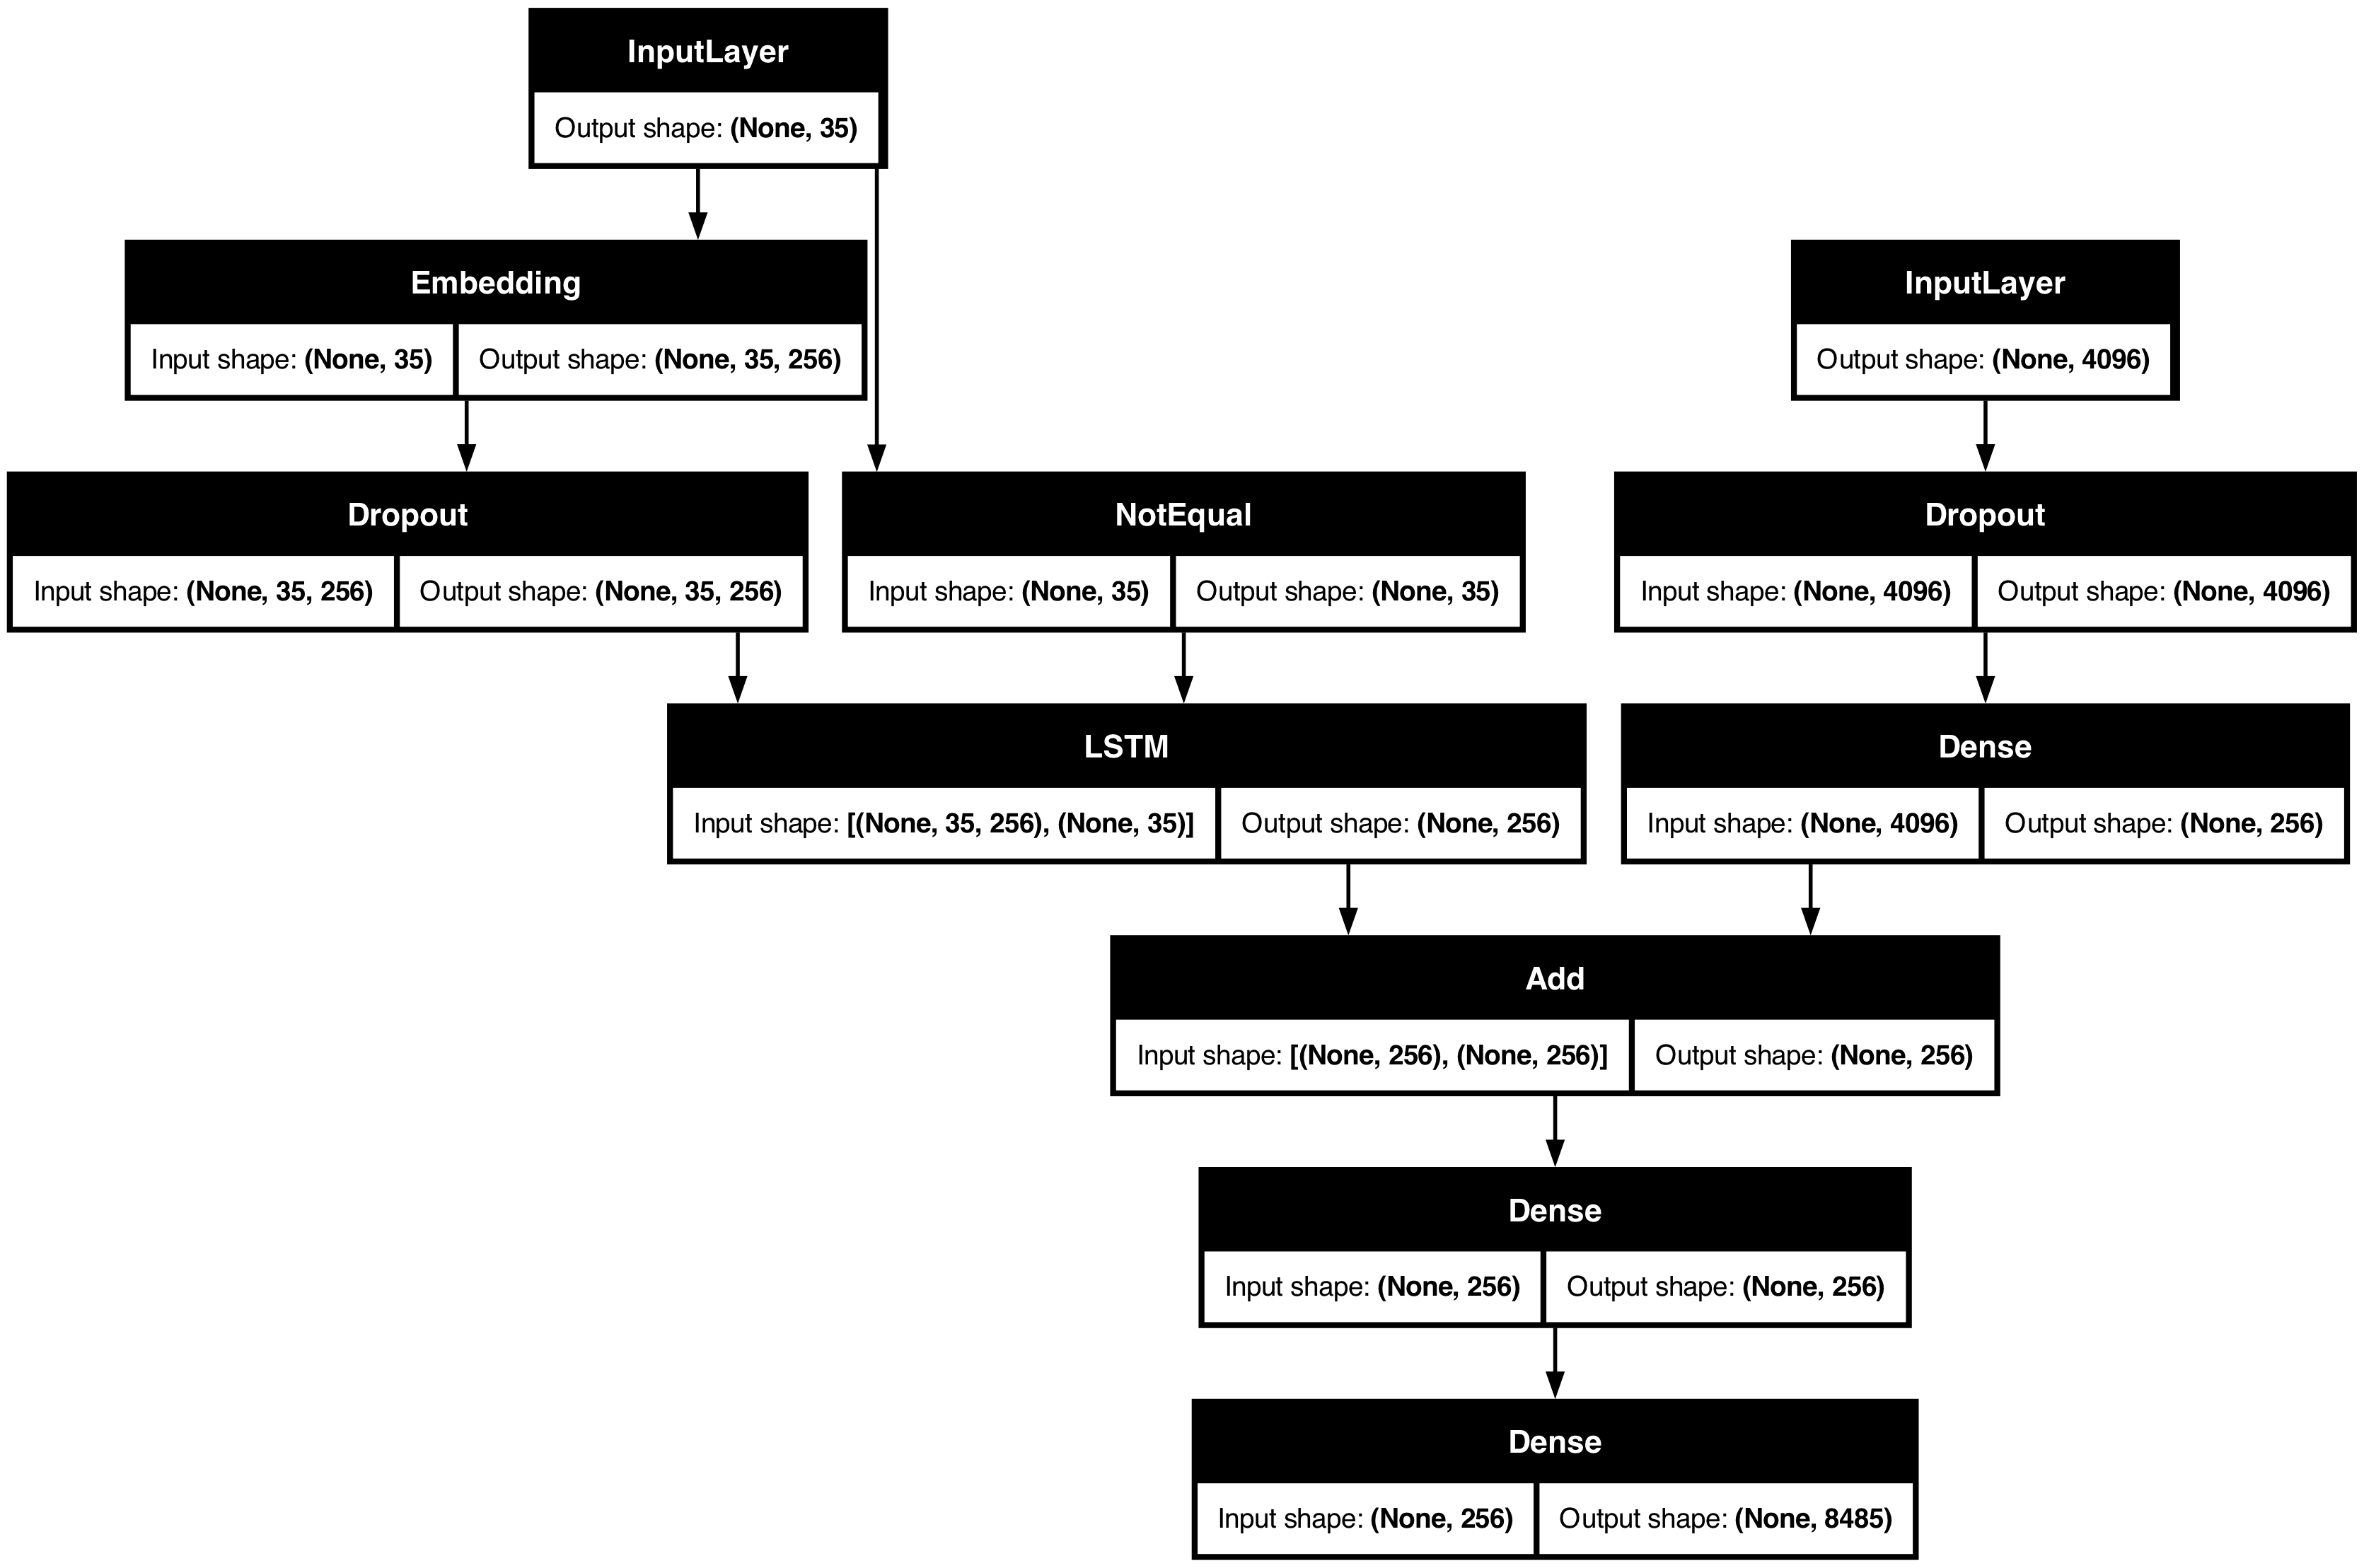

In [513]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,), name="image")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# fe2_expanded = Lambda(lambda x: tf.expand_dims(x, axis=1))(fe2) 
# sequence feature layers
inputs2 = Input(shape=(maxlen,), name="text")
se1 = Embedding(vocab, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
# stacked_features = Concatenate(axis=1)([fe2_expanded, se2])
# decoder=add([fe2,se2])
se3 = LSTM(256)(se2)

# # decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [570]:
model.load_weights('/Users/aryanjalisrivastava/Desktop/ImageCaption/best_model.h5')

In [572]:
epochs=20
batch_size=10
steps=len(train)//batch_size
loss=[]
for i in range(epochs):
    generator=data_generator(train,mapping,feature,tokenizer,maxlen,batch_size,vocab)
    model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)
    

323/728 ━━━━━━━━━━━━━━━━━━━━ 5:00 743ms/step - loss: 2.3230

KeyboardInterrupt: 

In [568]:
epochs=10
batch_size=10
steps=len(train)//batch_size
loss=[]
for i in range(epochs):
    generator=data_generator(train,mapping,feature,tokenizer,maxlen,batch_size,vocab)
    model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)
    

111/728 ━━━━━━━━━━━━━━━━━━━━ 8:26 821ms/step - loss: 4.0878

KeyboardInterrupt: 

In [ ]:
epochs=10
batch_size=10
steps=len(train)//batch_size
loss=[]
for i in range(epochs):
    generator=data_generator(train,mapping,feature,tokenizer,maxlen,batch_size,vocab)
    model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)

In [ ]:
WORKING_DIR='/Users/aryanjalisrivastava/Desktop/ImageCaption'
# save the model
model.save(WORKING_DIR+'/best_model.h5')

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'starto'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endo':
            break
      
    return in_text

In [ ]:
# from nltk.translate.bleu_score import corpus_bleu
# # validate with test data
# actual, predicted = list(), list()

# for key in tqdm(test):
#     # get actual caption
#     captions = mapping[key]
#     # predict the caption for image
#     y_pred = predict_caption(model, feature[key], tokenizer, maxlen) 
#     # split into words
#     actual_captions = [caption.split() for caption in captions]
#     y_pred = y_pred.split()
#     # append to the list
#     actual.append(actual_captions)
#     predicted.append(y_pred)
    
# # calcuate BLEU score
# print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
# print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

In [582]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(base_dir, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, feature[image_id], tokenizer, maxlen)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
starto kayaker kayaks through the water endo
starto person kayaking in the ocean endo
starto person kayaks in the middle of the ocean on grey day endo
starto person rows boat over large body of water endo
starto person in boat with paddle in hand endo
--------------------Predicted--------------------
starto man is drifting on the water with his feet in the water endo


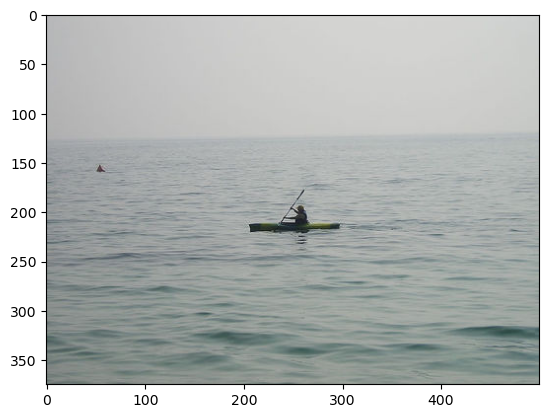

In [584]:
generate_caption("19212715_20476497a3.jpg")

In [ ]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

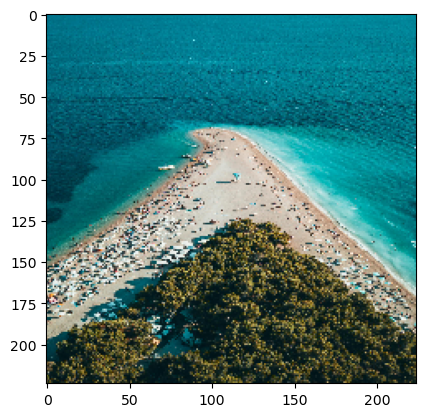

'starto man in yellow bathing suit is standing in the ocean endo'

In [588]:
image_path = 'sand.jpg'
# load image
image = load_img(image_path, target_size=(224, 224))
plt.imshow(image)
plt.show()
# convert image pixels to numpy array
image = img_to_array(image)
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# preprocess image for vgg
image = preprocess_input(image)
# extract features
features = vgg_model.predict(image, verbose=0)
# predict from the trained model
predict_caption(model, features, tokenizer, maxlen)